In [1]:
import networkx as nx
import osmnx as ox
import fiona
import math

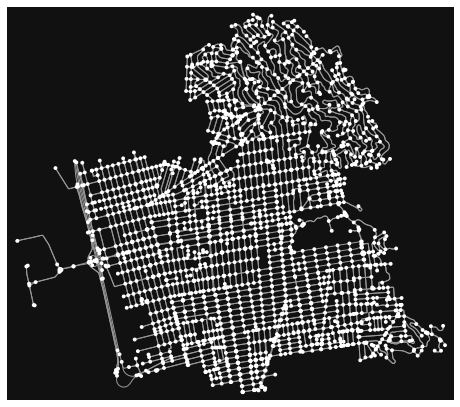

In [4]:
G = ox.graph_from_place("Berkeley, California, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

In [9]:
place = "Berkeley, California, USA"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(35567, 213)

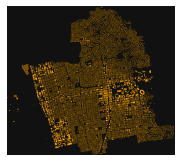

In [10]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [11]:
ox.save_graphml(G, filepath="./berkeley.graphml")

In [12]:
import json

In [13]:
cc = json.loads(gdf.to_json())
with open("sample_2.json", "w") as outfile:
     json_object = json.dump(cc, outfile, indent=4, sort_keys=True)
 

In [14]:
f = open("sample_2.json")

cx_try = json.load(f)

In [15]:
len(cx_try["features"])
# [5]['geometry']['coordinates'][0][0]

35567

In [16]:
new_json = []
for build_obj in cx_try["features"]:
    new_obj = {}
    if build_obj['geometry']['type'] == 'Point':
        new_obj['coordinates'] = build_obj['geometry']['coordinates']
    else:
        new_obj['coordinates'] = build_obj['geometry']['coordinates'][0][0]
    
    new_obj['building'] = build_obj['properties']['building']
    new_obj['name'] =build_obj['properties']['name']
    new_json.append(new_obj)

In [12]:
new_json

[{'coordinates': [-86.9161928, 40.4198167],
  'building': 'university',
  'name': 'Veterinary Pathobiology Research Building'},
 {'coordinates': [-86.9160409, 40.4192381],
  'building': 'university',
  'name': 'Veterinary Animal Isolation Building 1'},
 {'coordinates': [-86.9215549, 40.4263298],
  'building': 'dormitory',
  'name': 'Wood (Elizabeth G. and William R.) Residence Hall'},
 {'coordinates': [-86.9209039, 40.4270504],
  'building': 'dormitory',
  'name': 'Vawter (Everett B.) Residence Hall'},
 {'coordinates': [-86.9205502, 40.4265483],
  'building': 'dormitory',
  'name': 'Warren (Martha E. and Eugene K.) Residence Hall'},
 {'coordinates': [-86.9163514, 40.4337315],
  'building': 'yes',
  'name': 'Mackey Arena'},
 {'coordinates': [-86.9149266, 40.428271],
  'building': 'university',
  'name': 'Elliott Hall of Music (ELLT)'},
 {'coordinates': [-86.9132656, 40.4300359],
  'building': 'university',
  'name': 'Physics Building (PHYS)'},
 {'coordinates': [-86.9171681, 40.4327668],

In [18]:
edges = {}
with open('edge.txt') as file:
    edge = {}
    for line in file:
        if 'tid' in line:
            edge['tid'] = int(line.split(': ')[1].strip())
        elif 'source_coords' in line:
            edge['source_coords'] = tuple(map(float, line.split(': ')[1].strip().split(',')))
        elif 'target_coords' in line:
            edge['target_coords'] = tuple(map(float, line.split(': ')[1].strip().split(',')))
        elif '---next---' in line:
            edges[edge['tid']] = {'source_coords': edge['source_coords'], 'target_coords': edge['target_coords']}
            edge = {}

# print(edges)

In [19]:
with open('tid_offset.txt', 'r') as file:
    lines = file.readlines()

second_last_line = lines[-1].strip()  # Get the second last line and remove leading/trailing white space
last_tid = int(second_last_line.split()[0])  # Get the first number on the line as an integer

print(last_tid)

5152


In [20]:
def find_closest_edge(building, edges):
    min_distance = math.inf
    closest_edge = None
    for tid, edge in edges.items():
        source_coords = edge['source_coords']
        target_coords = edge['target_coords']
        distance_to_source = math.sqrt((building['coordinates'][0] - source_coords[0])**2 + (building['coordinates'][1] - source_coords[1])**2)
        distance_to_target = math.sqrt((building['coordinates'][0] - target_coords[0])**2 + (building['coordinates'][1] - target_coords[1])**2)
        if distance_to_source < min_distance:
            min_distance = distance_to_source
            closest_edge = tid
        if distance_to_target < min_distance:
            min_distance = distance_to_target
            closest_edge = tid
    return closest_edge

# Example usage
tid_building = last_tid + 1
for building in new_json:
    closest_edge = find_closest_edge(building, edges)
    building['closest_tid'] = closest_edge
    building['tid'] = tid_building
    tid_building = tid_building + 1
    print(building)

{'coordinates': [-122.2555244, 37.8738147], 'building': 'yes', 'name': 'East Gate', 'closest_tid': 4576, 'tid': 5153}
{'coordinates': [-122.2655224, 37.8736627], 'building': 'yes', 'name': 'Northwest Animal Facility', 'closest_tid': 1264, 'tid': 5154}
{'coordinates': [-122.2427464, 37.8521485], 'building': 'yes', 'name': 'Claremont Club', 'closest_tid': 1665, 'tid': 5155}
{'coordinates': [-122.2834436, 37.8551736], 'building': 'yes', 'name': 'San Pablo Center', 'closest_tid': 993, 'tid': 5156}
{'coordinates': [-122.2586111, 37.8969444], 'building': 'yes', 'name': 'Clark Hall', 'closest_tid': 3586, 'tid': 5157}
{'coordinates': [-122.298331, 37.8689285], 'building': 'yes', 'name': 'West Berkeley Senior Center', 'closest_tid': 510, 'tid': 5158}
{'coordinates': [-122.2667213, 37.8789132], 'building': 'apartments', 'name': None, 'closest_tid': 2149, 'tid': 5159}
{'coordinates': [-122.2736616, 37.872577], 'building': 'house', 'name': None, 'closest_tid': 919, 'tid': 5160}
{'coordinates': [-1

{'coordinates': [-122.2705702, 37.8681122], 'building': 'school', 'name': 'D Building', 'closest_tid': 3232, 'tid': 5272}
{'coordinates': [-122.2724045, 37.8679496], 'building': 'school', 'name': 'H Building', 'closest_tid': 3429, 'tid': 5273}
{'coordinates': [-122.2719548, 37.8677741], 'building': 'school', 'name': 'C Building', 'closest_tid': 1750, 'tid': 5274}
{'coordinates': [-122.2721547, 37.8657954], 'building': 'stands', 'name': None, 'closest_tid': 859, 'tid': 5275}
{'coordinates': [-122.2713113, 37.8666972], 'building': 'gymnasium', 'name': 'Donahue Gym', 'closest_tid': 1751, 'tid': 5276}
{'coordinates': [-122.2730117, 37.8700482], 'building': 'civic', 'name': 'Ronald Tsukamoto Public Safety Building', 'closest_tid': 3773, 'tid': 5277}
{'coordinates': [-122.2688636, 37.8679205], 'building': 'public', 'name': 'Central Branch Berkeley Public Library', 'closest_tid': 3228, 'tid': 5278}
{'coordinates': [-122.2888575, 37.876738], 'building': 'school', 'name': 'Ala Costa Center', 'c

{'coordinates': [-122.2787236, 37.8915213], 'building': 'retail', 'name': None, 'closest_tid': 1515, 'tid': 5364}
{'coordinates': [-122.2788025, 37.8915163], 'building': 'retail', 'name': None, 'closest_tid': 1508, 'tid': 5365}
{'coordinates': [-122.2789251, 37.8915086], 'building': 'retail', 'name': None, 'closest_tid': 1508, 'tid': 5366}
{'coordinates': [-122.2791796, 37.8914926], 'building': 'retail', 'name': None, 'closest_tid': 1508, 'tid': 5367}
{'coordinates': [-122.2793009, 37.8914849], 'building': 'retail', 'name': None, 'closest_tid': 1508, 'tid': 5368}
{'coordinates': [-122.2797998, 37.8916535], 'building': 'commercial', 'name': None, 'closest_tid': 1505, 'tid': 5369}
{'coordinates': [-122.2801732, 37.8916541], 'building': 'retail', 'name': None, 'closest_tid': 1367, 'tid': 5370}
{'coordinates': [-122.2801307, 37.8914414], 'building': 'retail', 'name': None, 'closest_tid': 1367, 'tid': 5371}
{'coordinates': [-122.2803665, 37.8914283], 'building': 'retail', 'name': None, 'clo

{'coordinates': [-122.2719885, 37.8640517], 'building': 'house', 'name': None, 'closest_tid': 252, 'tid': 5581}
{'coordinates': [-122.2719645, 37.8639289], 'building': 'yes', 'name': None, 'closest_tid': 252, 'tid': 5582}
{'coordinates': [-122.2716605, 37.8639908], 'building': 'yes', 'name': None, 'closest_tid': 252, 'tid': 5583}
{'coordinates': [-122.2715519, 37.8639479], 'building': 'yes', 'name': None, 'closest_tid': 252, 'tid': 5584}
{'coordinates': [-122.2720703, 37.8650742], 'building': 'house', 'name': None, 'closest_tid': 859, 'tid': 5585}
{'coordinates': [-122.271881, 37.8651018], 'building': 'garage', 'name': None, 'closest_tid': 859, 'tid': 5586}
{'coordinates': [-122.271775, 37.8651152], 'building': 'detached', 'name': None, 'closest_tid': 859, 'tid': 5587}
{'coordinates': [-122.2716391, 37.8650983], 'building': 'house', 'name': None, 'closest_tid': 859, 'tid': 5588}
{'coordinates': [-122.2714857, 37.8651564], 'building': 'apartments', 'name': None, 'closest_tid': 859, 'tid

{'coordinates': [-122.278041, 37.8661725], 'building': 'synagogue', 'name': None, 'closest_tid': 1734, 'tid': 5876}
{'coordinates': [-122.2782742, 37.8687169], 'building': 'school', 'name': None, 'closest_tid': 3276, 'tid': 5877}
{'coordinates': [-122.2781442, 37.8697528], 'building': 'church', 'name': 'Saint Joseph the Worker Church', 'closest_tid': 3272, 'tid': 5878}
{'coordinates': [-122.2966063, 37.8684816], 'building': 'yes', 'name': None, 'closest_tid': 2959, 'tid': 5879}
{'coordinates': [-122.2960429, 37.868658], 'building': 'yes', 'name': None, 'closest_tid': 1232, 'tid': 5880}
{'coordinates': [-122.2964315, 37.8678833], 'building': 'yes', 'name': 'La Quinta Inn by Wyndham Berkeley', 'closest_tid': 3401, 'tid': 5881}
{'coordinates': [-122.297526, 37.8684314], 'building': 'yes', 'name': None, 'closest_tid': 512, 'tid': 5882}
{'coordinates': [-122.2970841, 37.8685164], 'building': 'yes', 'name': None, 'closest_tid': 2959, 'tid': 5883}
{'coordinates': [-122.2973764, 37.8676558], '

{'coordinates': [-122.2846261, 37.8742835], 'building': 'industrial', 'name': None, 'closest_tid': 415, 'tid': 5983}
{'coordinates': [-122.2463004, 37.8724318], 'building': 'yes', 'name': 'Haas Clubhouse', 'closest_tid': 15, 'tid': 5984}
{'coordinates': [-122.2585893, 37.8622645], 'building': 'retail', 'name': 'CVS Pharmacy', 'closest_tid': 2283, 'tid': 5985}
{'coordinates': [-122.2587209, 37.8610111], 'building': 'public', 'name': None, 'closest_tid': 2018, 'tid': 5986}
{'coordinates': [-122.2715178, 37.8544723], 'building': 'yes', 'name': 'Ashby Super Market', 'closest_tid': 884, 'tid': 5987}
{'coordinates': [-122.2698083, 37.852143], 'building': 'public', 'name': 'Ed Roberts Campus', 'closest_tid': 2694, 'tid': 5988}
{'coordinates': [-122.2694584, 37.8530535], 'building': 'apartments', 'name': None, 'closest_tid': 1942, 'tid': 5989}
{'coordinates': [-122.2692481, 37.8536524], 'building': 'yes', 'name': None, 'closest_tid': 1942, 'tid': 5990}
{'coordinates': [-122.2689089, 37.8537895

{'coordinates': [-122.2916098, 37.868016], 'building': 'retail', 'name': None, 'closest_tid': 4188, 'tid': 6146}
{'coordinates': [-122.2915175, 37.8677004], 'building': 'yes', 'name': 'A Station', 'closest_tid': 4188, 'tid': 6147}
{'coordinates': [-122.29141, 37.8673519], 'building': 'yes', 'name': None, 'closest_tid': 3077, 'tid': 6148}
{'coordinates': [-122.2874489, 37.8508398], 'building': 'warehouse', 'name': 'Folger Murray Industrial Complex', 'closest_tid': 2939, 'tid': 6149}
{'coordinates': [-122.2878872, 37.8515288], 'building': 'warehouse', 'name': None, 'closest_tid': 1311, 'tid': 6150}
{'coordinates': [-122.2866617, 37.8514899], 'building': 'mixed_use', 'name': None, 'closest_tid': 1311, 'tid': 6151}
{'coordinates': [-122.266781, 37.8559002], 'building': 'retail', 'name': None, 'closest_tid': 2435, 'tid': 6152}
{'coordinates': [-122.2670217, 37.8557463], 'building': 'retail', 'name': None, 'closest_tid': 2435, 'tid': 6153}
{'coordinates': [-122.2667558, 37.8583468], 'buildin

{'coordinates': [-122.2943786, 37.85098], 'building': 'yes', 'name': None, 'closest_tid': 807, 'tid': 6220}
{'coordinates': [-122.2925595, 37.8499881], 'building': 'yes', 'name': None, 'closest_tid': 3071, 'tid': 6221}
{'coordinates': [-122.293041, 37.8491095], 'building': 'warehouse', 'name': 'Ashby Lumber', 'closest_tid': 3071, 'tid': 6222}
{'coordinates': [-122.2926619, 37.8499679], 'building': 'industrial', 'name': None, 'closest_tid': 3071, 'tid': 6223}
{'coordinates': [-122.2935795, 37.8498111], 'building': 'yes', 'name': None, 'closest_tid': 3071, 'tid': 6224}
{'coordinates': [-122.2951259, 37.8506206], 'building': 'yes', 'name': None, 'closest_tid': 807, 'tid': 6225}
{'coordinates': [-122.2927922, 37.8510445], 'building': 'yes', 'name': 'Berkeley Ironworks', 'closest_tid': 804, 'tid': 6226}
{'coordinates': [-122.2916269, 37.8530358], 'building': 'yes', 'name': None, 'closest_tid': 2845, 'tid': 6227}
{'coordinates': [-122.2902925, 37.8528798], 'building': 'yes', 'name': None, 'c

{'coordinates': [-122.2965407, 37.8833121], 'building': 'yes', 'name': None, 'closest_tid': 4149, 'tid': 6347}
{'coordinates': [-122.296403, 37.8829187], 'building': 'yes', 'name': None, 'closest_tid': 4149, 'tid': 6348}
{'coordinates': [-122.2729089, 37.8727843], 'building': 'residential', 'name': None, 'closest_tid': 918, 'tid': 6349}
{'coordinates': [-122.2728495, 37.872596], 'building': 'residential', 'name': None, 'closest_tid': 918, 'tid': 6350}
{'coordinates': [-122.2727254, 37.872788], 'building': 'residential', 'name': None, 'closest_tid': 918, 'tid': 6351}
{'coordinates': [-122.2725256, 37.8726425], 'building': 'residential', 'name': None, 'closest_tid': 918, 'tid': 6352}
{'coordinates': [-122.2723451, 37.8729816], 'building': 'residential', 'name': None, 'closest_tid': 922, 'tid': 6353}
{'coordinates': [-122.2724114, 37.8727692], 'building': 'yes', 'name': None, 'closest_tid': 918, 'tid': 6354}
{'coordinates': [-122.2730034, 37.8731634], 'building': 'residential', 'name': No

{'coordinates': [-122.2686253, 37.8793204], 'building': 'house', 'name': None, 'closest_tid': 2796, 'tid': 6569}
{'coordinates': [-122.2686904, 37.8800001], 'building': 'retail', 'name': None, 'closest_tid': 2391, 'tid': 6570}
{'coordinates': [-122.2687538, 37.87967], 'building': 'yes', 'name': None, 'closest_tid': 2914, 'tid': 6571}
{'coordinates': [-122.2685296, 37.8792137], 'building': 'apartments', 'name': None, 'closest_tid': 2796, 'tid': 6572}
{'coordinates': [-122.2687514, 37.8789343], 'building': 'office', 'name': None, 'closest_tid': 2912, 'tid': 6573}
{'coordinates': [-122.2685066, 37.8794207], 'building': 'apartments', 'name': None, 'closest_tid': 2391, 'tid': 6574}
{'coordinates': [-122.2684923, 37.8798515], 'building': 'house', 'name': None, 'closest_tid': 2391, 'tid': 6575}
{'coordinates': [-122.2685857, 37.879097], 'building': 'house', 'name': None, 'closest_tid': 2796, 'tid': 6576}
{'coordinates': [-122.2683854, 37.8790241], 'building': 'house', 'name': None, 'closest_t

{'coordinates': [-122.2464575, 37.8683651], 'building': 'house', 'name': None, 'closest_tid': 24, 'tid': 6692}
{'coordinates': [-122.2462674, 37.8683335], 'building': 'house', 'name': None, 'closest_tid': 24, 'tid': 6693}
{'coordinates': [-122.2467402, 37.8685006], 'building': 'house', 'name': None, 'closest_tid': 19, 'tid': 6694}
{'coordinates': [-122.2460824, 37.8683334], 'building': 'house', 'name': None, 'closest_tid': 24, 'tid': 6695}
{'coordinates': [-122.2458855, 37.8683175], 'building': 'house', 'name': None, 'closest_tid': 24, 'tid': 6696}
{'coordinates': [-122.247272, 37.8683655], 'building': 'house', 'name': None, 'closest_tid': 19, 'tid': 6697}
{'coordinates': [-122.2473968, 37.868222], 'building': 'house', 'name': None, 'closest_tid': 19, 'tid': 6698}
{'coordinates': [-122.2477921, 37.8676876], 'building': 'house', 'name': None, 'closest_tid': 3670, 'tid': 6699}
{'coordinates': [-122.247926, 37.8676869], 'building': 'house', 'name': None, 'closest_tid': 3670, 'tid': 6700}


{'coordinates': [-122.2601818, 37.8662644], 'building': 'yes', 'name': None, 'closest_tid': 869, 'tid': 6800}
{'coordinates': [-122.2548116, 37.8691209], 'building': 'retail', 'name': None, 'closest_tid': 2702, 'tid': 6801}
{'coordinates': [-122.2549316, 37.869159], 'building': 'roof', 'name': None, 'closest_tid': 2702, 'tid': 6802}
{'coordinates': [-122.2561269, 37.8659761], 'building': 'temple', 'name': 'Vedanta Society Berkeley', 'closest_tid': 270, 'tid': 6803}
{'coordinates': [-122.2633686, 37.9024484], 'building': 'yes', 'name': None, 'closest_tid': 2700, 'tid': 6804}
{'coordinates': [-122.2631915, 37.9021903], 'building': 'yes', 'name': None, 'closest_tid': 2700, 'tid': 6805}
{'coordinates': [-122.2630312, 37.9015178], 'building': 'yes', 'name': None, 'closest_tid': 1473, 'tid': 6806}
{'coordinates': [-122.2619426, 37.9005719], 'building': 'yes', 'name': None, 'closest_tid': 1470, 'tid': 6807}
{'coordinates': [-122.2602981, 37.8988541], 'building': 'yes', 'name': None, 'closest_

{'coordinates': [-122.2678879, 37.875205], 'building': 'apartments', 'name': None, 'closest_tid': 1261, 'tid': 6879}
{'coordinates': [-122.2679109, 37.8765286], 'building': 'residential', 'name': None, 'closest_tid': 2791, 'tid': 6880}
{'coordinates': [-122.2678852, 37.8762898], 'building': 'apartments', 'name': None, 'closest_tid': 2791, 'tid': 6881}
{'coordinates': [-122.2678456, 37.8752585], 'building': 'residential', 'name': None, 'closest_tid': 1261, 'tid': 6882}
{'coordinates': [-122.2682002, 37.8765981], 'building': 'apartments', 'name': None, 'closest_tid': 2791, 'tid': 6883}
{'coordinates': [-122.2679193, 37.8763983], 'building': 'apartments', 'name': None, 'closest_tid': 2791, 'tid': 6884}
{'coordinates': [-122.2681241, 37.8743009], 'building': 'apartments', 'name': None, 'closest_tid': 931, 'tid': 6885}
{'coordinates': [-122.2680776, 37.875603], 'building': 'apartments', 'name': None, 'closest_tid': 2045, 'tid': 6886}
{'coordinates': [-122.2682601, 37.8742353], 'building': '

{'coordinates': [-122.2663222, 37.8561512], 'building': 'yes', 'name': None, 'closest_tid': 1850, 'tid': 7005}
{'coordinates': [-122.2664695, 37.8562334], 'building': 'house', 'name': None, 'closest_tid': 1850, 'tid': 7006}
{'coordinates': [-122.266532, 37.8563465], 'building': 'commercial', 'name': None, 'closest_tid': 1850, 'tid': 7007}
{'coordinates': [-122.2665396, 37.8564532], 'building': 'commercial', 'name': None, 'closest_tid': 1850, 'tid': 7008}
{'coordinates': [-122.2665096, 37.8565544], 'building': 'house', 'name': None, 'closest_tid': 1850, 'tid': 7009}
{'coordinates': [-122.2665177, 37.8566631], 'building': 'house', 'name': None, 'closest_tid': 1850, 'tid': 7010}
{'coordinates': [-122.2671205, 37.8563892], 'building': 'industrial', 'name': None, 'closest_tid': 2430, 'tid': 7011}
{'coordinates': [-122.2670034, 37.8566071], 'building': 'commercial', 'name': None, 'closest_tid': 1850, 'tid': 7012}
{'coordinates': [-122.267197, 37.8565879], 'building': 'house', 'name': 'The Ch

{'coordinates': [-122.2973549, 37.8784291], 'building': 'retail', 'name': None, 'closest_tid': 381, 'tid': 7224}
{'coordinates': [-122.3014744, 37.8789444], 'building': 'yes', 'name': None, 'closest_tid': 375, 'tid': 7225}
{'coordinates': [-122.2952017, 37.8774113], 'building': 'yes', 'name': 'Fenton MacLaren Home Furnishings', 'closest_tid': 392, 'tid': 7226}
{'coordinates': [-122.2788841, 37.8712089], 'building': 'yes', 'name': 'Super 8 Berkeley', 'closest_tid': 2184, 'tid': 7227}
{'coordinates': [-122.2761453, 37.8707282], 'building': 'church', 'name': 'Lutheran Church of the Cross', 'closest_tid': 3394, 'tid': 7228}
{'coordinates': [-122.2787174, 37.870981], 'building': 'church', 'name': 'Covenant Presbyterian Church', 'closest_tid': 2184, 'tid': 7229}
{'coordinates': [-122.2762272, 37.8713548], 'building': 'hotel', 'name': 'Quality Inn University', 'closest_tid': 3290, 'tid': 7230}
{'coordinates': [-122.257544, 37.8984778], 'building': 'yes', 'name': 'Woods Reservoir', 'closest_ti

{'coordinates': [-122.2572334, 37.8683643], 'building': 'church', 'name': None, 'closest_tid': 1773, 'tid': 7447}
{'coordinates': [-122.2601596, 37.868087], 'building': 'yes', 'name': None, 'closest_tid': 2071, 'tid': 7448}
{'coordinates': [-122.2539757, 37.8687185], 'building': 'apartments', 'name': None, 'closest_tid': 1778, 'tid': 7449}
{'coordinates': [-122.2573162, 37.8679048], 'building': 'yes', 'name': None, 'closest_tid': 1773, 'tid': 7450}
{'coordinates': [-122.2607395, 37.8679247], 'building': 'yes', 'name': None, 'closest_tid': 72, 'tid': 7451}
{'coordinates': [-122.2602778, 37.8679653], 'building': 'yes', 'name': None, 'closest_tid': 72, 'tid': 7452}
{'coordinates': [-122.2605685, 37.8680436], 'building': 'yes', 'name': None, 'closest_tid': 72, 'tid': 7453}
{'coordinates': [-122.2597358, 37.8681842], 'building': 'yes', 'name': None, 'closest_tid': 2071, 'tid': 7454}
{'coordinates': [-122.2585007, 37.8677634], 'building': 'retail', 'name': None, 'closest_tid': 1769, 'tid': 7

{'coordinates': [-122.267183, 37.8783956], 'building': 'apartments', 'name': None, 'closest_tid': 2149, 'tid': 7543}
{'coordinates': [-122.2673679, 37.8783532], 'building': 'apartments', 'name': None, 'closest_tid': 2149, 'tid': 7544}
{'coordinates': [-122.2675564, 37.8783022], 'building': 'apartments', 'name': None, 'closest_tid': 2796, 'tid': 7545}
{'coordinates': [-122.2673819, 37.8782429], 'building': 'apartments', 'name': None, 'closest_tid': 2149, 'tid': 7546}
{'coordinates': [-122.2671083, 37.8782673], 'building': 'apartments', 'name': None, 'closest_tid': 2149, 'tid': 7547}
{'coordinates': [-122.2672773, 37.8781117], 'building': 'apartments', 'name': None, 'closest_tid': 2149, 'tid': 7548}
{'coordinates': [-122.2673189, 37.8779677], 'building': 'apartments', 'name': None, 'closest_tid': 2149, 'tid': 7549}
{'coordinates': [-122.2672505, 37.8778312], 'building': 'apartments', 'name': None, 'closest_tid': 2149, 'tid': 7550}
{'coordinates': [-122.2673095, 37.8776978], 'building': '

{'coordinates': [-122.2955213, 37.8667468], 'building': 'yes', 'name': None, 'closest_tid': 2960, 'tid': 7721}
{'coordinates': [-122.2954266, 37.8666982], 'building': 'yes', 'name': None, 'closest_tid': 2960, 'tid': 7722}
{'coordinates': [-122.2951474, 37.8667522], 'building': 'yes', 'name': None, 'closest_tid': 2960, 'tid': 7723}
{'coordinates': [-122.2952928, 37.8669348], 'building': 'apartments', 'name': None, 'closest_tid': 2960, 'tid': 7724}
{'coordinates': [-122.295409, 37.8669795], 'building': 'yes', 'name': None, 'closest_tid': 2960, 'tid': 7725}
{'coordinates': [-122.295531, 37.8669479], 'building': 'yes', 'name': None, 'closest_tid': 2960, 'tid': 7726}
{'coordinates': [-122.2956364, 37.8669379], 'building': 'yes', 'name': None, 'closest_tid': 2960, 'tid': 7727}
{'coordinates': [-122.2957555, 37.8668993], 'building': 'yes', 'name': None, 'closest_tid': 521, 'tid': 7728}
{'coordinates': [-122.2959098, 37.8668731], 'building': 'yes', 'name': None, 'closest_tid': 521, 'tid': 7729

{'coordinates': [-122.2560203, 37.878636], 'building': 'house', 'name': None, 'closest_tid': 1709, 'tid': 7879}
{'coordinates': [-122.2506473, 37.8831546], 'building': 'yes', 'name': None, 'closest_tid': 2327, 'tid': 7880}
{'coordinates': [-122.2561614, 37.8815075], 'building': 'detached', 'name': None, 'closest_tid': 2310, 'tid': 7881}
{'coordinates': [-122.2561278, 37.8793446], 'building': 'yes', 'name': None, 'closest_tid': 1708, 'tid': 7882}
{'coordinates': [-122.2527131, 37.882304], 'building': 'yes', 'name': None, 'closest_tid': 2527, 'tid': 7883}
{'coordinates': [-122.2505801, 37.8791698], 'building': 'yes', 'name': '71P', 'closest_tid': 2526, 'tid': 7884}
{'coordinates': [-122.2486244, 37.8820984], 'building': 'yes', 'name': None, 'closest_tid': 647, 'tid': 7885}
{'coordinates': [-122.2564523, 37.8799533], 'building': 'house', 'name': None, 'closest_tid': 302, 'tid': 7886}
{'coordinates': [-122.2493092, 37.8831659], 'building': 'yes', 'name': None, 'closest_tid': 644, 'tid': 78

{'coordinates': [-122.2527265, 37.8822066], 'building': 'yes', 'name': None, 'closest_tid': 2527, 'tid': 8130}
{'coordinates': [-122.2505003, 37.879002], 'building': 'yes', 'name': '71J', 'closest_tid': 2526, 'tid': 8131}
{'coordinates': [-122.248229, 37.882155], 'building': 'yes', 'name': None, 'closest_tid': 647, 'tid': 8132}
{'coordinates': [-122.2490581, 37.8832437], 'building': 'yes', 'name': None, 'closest_tid': 644, 'tid': 8133}
{'coordinates': [-122.2555071, 37.882311], 'building': 'house', 'name': None, 'closest_tid': 1352, 'tid': 8134}
{'coordinates': [-122.2501771, 37.8788131], 'building': 'yes', 'name': '71T', 'closest_tid': 2526, 'tid': 8135}
{'coordinates': [-122.252175, 37.8816358], 'building': 'house', 'name': None, 'closest_tid': 2522, 'tid': 8136}
{'coordinates': [-122.2488522, 37.8819244], 'building': 'yes', 'name': None, 'closest_tid': 3556, 'tid': 8137}
{'coordinates': [-122.2469362, 37.8820513], 'building': 'yes', 'name': None, 'closest_tid': 653, 'tid': 8138}
{'c

{'coordinates': [-122.2559471, 37.8913259], 'building': 'house', 'name': None, 'closest_tid': 334, 'tid': 8229}
{'coordinates': [-122.255808, 37.8911574], 'building': 'yes', 'name': None, 'closest_tid': 334, 'tid': 8230}
{'coordinates': [-122.2554696, 37.8914949], 'building': 'garage', 'name': None, 'closest_tid': 332, 'tid': 8231}
{'coordinates': [-122.2559383, 37.8914982], 'building': 'house', 'name': None, 'closest_tid': 334, 'tid': 8232}
{'coordinates': [-122.2556417, 37.891967], 'building': 'house', 'name': None, 'closest_tid': 332, 'tid': 8233}
{'coordinates': [-122.255716, 37.8917301], 'building': 'house', 'name': None, 'closest_tid': 332, 'tid': 8234}
{'coordinates': [-122.2559053, 37.8919887], 'building': 'house', 'name': None, 'closest_tid': 332, 'tid': 8235}
{'coordinates': [-122.255749, 37.891991], 'building': 'garage', 'name': None, 'closest_tid': 332, 'tid': 8236}
{'coordinates': [-122.2552578, 37.8923967], 'building': 'yes', 'name': None, 'closest_tid': 332, 'tid': 8237}

{'coordinates': [-122.2501308, 37.8920368], 'building': 'yes', 'name': None, 'closest_tid': 784, 'tid': 8321}
{'coordinates': [-122.2510513, 37.8917405], 'building': 'house', 'name': None, 'closest_tid': 784, 'tid': 8322}
{'coordinates': [-122.2545094, 37.8905602], 'building': 'yes', 'name': None, 'closest_tid': 332, 'tid': 8323}
{'coordinates': [-122.2543203, 37.8904691], 'building': 'house', 'name': None, 'closest_tid': 332, 'tid': 8324}
{'coordinates': [-122.2512833, 37.8916727], 'building': 'house', 'name': None, 'closest_tid': 784, 'tid': 8325}
{'coordinates': [-122.2546213, 37.8907231], 'building': 'house', 'name': None, 'closest_tid': 332, 'tid': 8326}
{'coordinates': [-122.2502583, 37.8916674], 'building': 'yes', 'name': None, 'closest_tid': 784, 'tid': 8327}
{'coordinates': [-122.2507559, 37.8917796], 'building': 'yes', 'name': None, 'closest_tid': 784, 'tid': 8328}
{'coordinates': [-122.2544953, 37.8906094], 'building': 'yes', 'name': None, 'closest_tid': 332, 'tid': 8329}
{'

{'coordinates': [-122.248383, 37.8853593], 'building': 'yes', 'name': None, 'closest_tid': 642, 'tid': 8413}
{'coordinates': [-122.2487118, 37.8856081], 'building': 'yes', 'name': None, 'closest_tid': 639, 'tid': 8414}
{'coordinates': [-122.2525912, 37.8868425], 'building': 'house', 'name': None, 'closest_tid': 638, 'tid': 8415}
{'coordinates': [-122.2487313, 37.8855658], 'building': 'yes', 'name': None, 'closest_tid': 642, 'tid': 8416}
{'coordinates': [-122.2525847, 37.8868137], 'building': 'house', 'name': None, 'closest_tid': 638, 'tid': 8417}
{'coordinates': [-122.2529794, 37.8866634], 'building': 'house', 'name': None, 'closest_tid': 1581, 'tid': 8418}
{'coordinates': [-122.249019, 37.8858717], 'building': 'yes', 'name': None, 'closest_tid': 639, 'tid': 8419}
{'coordinates': [-122.248913, 37.8857764], 'building': 'yes', 'name': None, 'closest_tid': 639, 'tid': 8420}
{'coordinates': [-122.2529586, 37.8865633], 'building': 'house', 'name': None, 'closest_tid': 1581, 'tid': 8421}
{'c

{'coordinates': [-122.2537925, 37.8874607], 'building': 'yes', 'name': None, 'closest_tid': 682, 'tid': 8723}
{'coordinates': [-122.2536846, 37.8876334], 'building': 'yes', 'name': None, 'closest_tid': 1216, 'tid': 8724}
{'coordinates': [-122.2538395, 37.8876115], 'building': 'yes', 'name': None, 'closest_tid': 682, 'tid': 8725}
{'coordinates': [-122.2536401, 37.8879033], 'building': 'yes', 'name': None, 'closest_tid': 1216, 'tid': 8726}
{'coordinates': [-122.2538536, 37.8877403], 'building': 'yes', 'name': None, 'closest_tid': 1216, 'tid': 8727}
{'coordinates': [-122.253701, 37.8881753], 'building': 'yes', 'name': None, 'closest_tid': 1216, 'tid': 8728}
{'coordinates': [-122.2537811, 37.8880205], 'building': 'yes', 'name': None, 'closest_tid': 1216, 'tid': 8729}
{'coordinates': [-122.2539053, 37.8884224], 'building': 'yes', 'name': None, 'closest_tid': 1216, 'tid': 8730}
{'coordinates': [-122.253728, 37.8883113], 'building': 'yes', 'name': None, 'closest_tid': 1216, 'tid': 8731}
{'coo

{'coordinates': [-122.2536253, 37.8835121], 'building': 'yes', 'name': None, 'closest_tid': 1358, 'tid': 8837}
{'coordinates': [-122.2548809, 37.8843774], 'building': 'yes', 'name': None, 'closest_tid': 296, 'tid': 8838}
{'coordinates': [-122.2547133, 37.8844462], 'building': 'house', 'name': None, 'closest_tid': 296, 'tid': 8839}
{'coordinates': [-122.2550586, 37.8843832], 'building': 'yes', 'name': None, 'closest_tid': 296, 'tid': 8840}
{'coordinates': [-122.2552357, 37.8843636], 'building': 'yes', 'name': None, 'closest_tid': 296, 'tid': 8841}
{'coordinates': [-122.2540154, 37.8849485], 'building': 'house', 'name': None, 'closest_tid': 1584, 'tid': 8842}
{'coordinates': [-122.2551472, 37.884353], 'building': 'yes', 'name': None, 'closest_tid': 296, 'tid': 8843}
{'coordinates': [-122.2542445, 37.8851966], 'building': 'house', 'name': None, 'closest_tid': 1584, 'tid': 8844}
{'coordinates': [-122.2542295, 37.8851511], 'building': 'house', 'name': None, 'closest_tid': 1584, 'tid': 8845}

{'coordinates': [-122.2546977, 37.864037], 'building': 'yes', 'name': None, 'closest_tid': 272, 'tid': 8950}
{'coordinates': [-122.2550517, 37.8606517], 'building': 'house', 'name': None, 'closest_tid': 767, 'tid': 8951}
{'coordinates': [-122.2548915, 37.8641545], 'building': 'yes', 'name': None, 'closest_tid': 272, 'tid': 8952}
{'coordinates': [-122.2552105, 37.8605003], 'building': 'yes', 'name': None, 'closest_tid': 767, 'tid': 8953}
{'coordinates': [-122.2549665, 37.8603832], 'building': 'yes', 'name': None, 'closest_tid': 767, 'tid': 8954}
{'coordinates': [-122.2549007, 37.8640217], 'building': 'yes', 'name': None, 'closest_tid': 272, 'tid': 8955}
{'coordinates': [-122.2546657, 37.8638729], 'building': 'yes', 'name': None, 'closest_tid': 272, 'tid': 8956}
{'coordinates': [-122.2549457, 37.8602545], 'building': 'house', 'name': None, 'closest_tid': 767, 'tid': 8957}
{'coordinates': [-122.254893, 37.8638878], 'building': 'yes', 'name': None, 'closest_tid': 272, 'tid': 8958}
{'coordi

{'coordinates': [-122.2530158, 37.8647109], 'building': 'yes', 'name': None, 'closest_tid': 278, 'tid': 9037}
{'coordinates': [-122.2553319, 37.8618069], 'building': 'yes', 'name': None, 'closest_tid': 767, 'tid': 9038}
{'coordinates': [-122.2530047, 37.8646026], 'building': 'yes', 'name': None, 'closest_tid': 278, 'tid': 9039}
{'coordinates': [-122.2551093, 37.861835], 'building': 'house', 'name': None, 'closest_tid': 767, 'tid': 9040}
{'coordinates': [-122.2530486, 37.8644901], 'building': 'yes', 'name': None, 'closest_tid': 278, 'tid': 9041}
{'coordinates': [-122.2551495, 37.8620589], 'building': 'house', 'name': None, 'closest_tid': 767, 'tid': 9042}
{'coordinates': [-122.2529662, 37.864482], 'building': 'yes', 'name': None, 'closest_tid': 278, 'tid': 9043}
{'coordinates': [-122.2551495, 37.8621563], 'building': 'house', 'name': None, 'closest_tid': 767, 'tid': 9044}
{'coordinates': [-122.2529827, 37.8643816], 'building': 'yes', 'name': None, 'closest_tid': 278, 'tid': 9045}
{'coor

{'coordinates': [-122.2528822, 37.8634472], 'building': 'yes', 'name': None, 'closest_tid': 278, 'tid': 9196}
{'coordinates': [-122.252869, 37.8632328], 'building': 'yes', 'name': None, 'closest_tid': 278, 'tid': 9197}
{'coordinates': [-122.2528472, 37.8630981], 'building': 'yes', 'name': None, 'closest_tid': 278, 'tid': 9198}
{'coordinates': [-122.2529101, 37.8625719], 'building': 'yes', 'name': None, 'closest_tid': 1537, 'tid': 9199}
{'coordinates': [-122.252788, 37.8626539], 'building': 'yes', 'name': None, 'closest_tid': 1537, 'tid': 9200}
{'coordinates': [-122.253039, 37.8627466], 'building': 'yes', 'name': None, 'closest_tid': 2611, 'tid': 9201}
{'coordinates': [-122.2528013, 37.8627911], 'building': 'yes', 'name': None, 'closest_tid': 1537, 'tid': 9202}
{'coordinates': [-122.2529206, 37.8628212], 'building': 'yes', 'name': None, 'closest_tid': 1537, 'tid': 9203}
{'coordinates': [-122.2529156, 37.8628903], 'building': 'yes', 'name': None, 'closest_tid': 1537, 'tid': 9204}
{'coord

{'coordinates': [-122.2511201, 37.8624508], 'building': 'yes', 'name': None, 'closest_tid': 32, 'tid': 9275}
{'coordinates': [-122.2511498, 37.862564], 'building': 'yes', 'name': None, 'closest_tid': 1538, 'tid': 9276}
{'coordinates': [-122.2511544, 37.8626734], 'building': 'yes', 'name': None, 'closest_tid': 1538, 'tid': 9277}
{'coordinates': [-122.2511705, 37.8627814], 'building': 'yes', 'name': None, 'closest_tid': 1538, 'tid': 9278}
{'coordinates': [-122.2511477, 37.8628211], 'building': 'yes', 'name': None, 'closest_tid': 1538, 'tid': 9279}
{'coordinates': [-122.2511752, 37.8631885], 'building': 'yes', 'name': None, 'closest_tid': 1538, 'tid': 9280}
{'coordinates': [-122.2509538, 37.8632131], 'building': 'yes', 'name': None, 'closest_tid': 1538, 'tid': 9281}
{'coordinates': [-122.2511838, 37.863248], 'building': 'yes', 'name': None, 'closest_tid': 1535, 'tid': 9282}
{'coordinates': [-122.2509931, 37.8634939], 'building': 'yes', 'name': None, 'closest_tid': 1535, 'tid': 9283}
{'coo

{'coordinates': [-122.2514406, 37.861936], 'building': 'yes', 'name': None, 'closest_tid': 32, 'tid': 9368}
{'coordinates': [-122.2514408, 37.8621195], 'building': 'yes', 'name': None, 'closest_tid': 32, 'tid': 9369}
{'coordinates': [-122.2515672, 37.8619731], 'building': 'yes', 'name': None, 'closest_tid': 32, 'tid': 9370}
{'coordinates': [-122.2516112, 37.8619649], 'building': 'yes', 'name': None, 'closest_tid': 32, 'tid': 9371}
{'coordinates': [-122.2517258, 37.8620936], 'building': 'yes', 'name': None, 'closest_tid': 1537, 'tid': 9372}
{'coordinates': [-122.2517519, 37.862051], 'building': 'yes', 'name': None, 'closest_tid': 1537, 'tid': 9373}
{'coordinates': [-122.2519971, 37.8620739], 'building': 'house', 'name': None, 'closest_tid': 1537, 'tid': 9374}
{'coordinates': [-122.2519159, 37.8618497], 'building': 'yes', 'name': None, 'closest_tid': 1537, 'tid': 9375}
{'coordinates': [-122.2520614, 37.8618949], 'building': 'yes', 'name': None, 'closest_tid': 1537, 'tid': 9376}
{'coordin

{'coordinates': [-122.2476378, 37.8613935], 'building': 'yes', 'name': None, 'closest_tid': 33, 'tid': 9451}
{'coordinates': [-122.2474648, 37.8615279], 'building': 'house', 'name': None, 'closest_tid': 33, 'tid': 9452}
{'coordinates': [-122.2473944, 37.8614909], 'building': 'house', 'name': None, 'closest_tid': 33, 'tid': 9453}
{'coordinates': [-122.2473776, 37.86135], 'building': 'house', 'name': None, 'closest_tid': 37, 'tid': 9454}
{'coordinates': [-122.2473407, 37.8611997], 'building': 'house', 'name': None, 'closest_tid': 37, 'tid': 9455}
{'coordinates': [-122.2467208, 37.8609969], 'building': 'house', 'name': None, 'closest_tid': 37, 'tid': 9456}
{'coordinates': [-122.2467203, 37.8611391], 'building': 'house', 'name': None, 'closest_tid': 37, 'tid': 9457}
{'coordinates': [-122.2467398, 37.8612741], 'building': 'house', 'name': None, 'closest_tid': 37, 'tid': 9458}
{'coordinates': [-122.2467659, 37.8615446], 'building': 'house', 'name': None, 'closest_tid': 33, 'tid': 9459}
{'coo

{'coordinates': [-122.2532515, 37.8603078], 'building': 'yes', 'name': None, 'closest_tid': 768, 'tid': 9548}
{'coordinates': [-122.2532807, 37.8605873], 'building': 'yes', 'name': None, 'closest_tid': 30, 'tid': 9549}
{'coordinates': [-122.2530215, 37.860496], 'building': 'yes', 'name': None, 'closest_tid': 30, 'tid': 9550}
{'coordinates': [-122.2529322, 37.8605725], 'building': 'yes', 'name': None, 'closest_tid': 30, 'tid': 9551}
{'coordinates': [-122.2527783, 37.8604327], 'building': 'yes', 'name': None, 'closest_tid': 30, 'tid': 9552}
{'coordinates': [-122.2526281, 37.860577], 'building': 'house', 'name': None, 'closest_tid': 772, 'tid': 9553}
{'coordinates': [-122.2523746, 37.8605947], 'building': 'yes', 'name': None, 'closest_tid': 772, 'tid': 9554}
{'coordinates': [-122.2522288, 37.8606135], 'building': 'yes', 'name': None, 'closest_tid': 772, 'tid': 9555}
{'coordinates': [-122.251902, 37.8606119], 'building': 'yes', 'name': None, 'closest_tid': 772, 'tid': 9556}
{'coordinates':

{'coordinates': [-122.2455515, 37.8624496], 'building': 'yes', 'name': None, 'closest_tid': 38, 'tid': 9648}
{'coordinates': [-122.2456913, 37.8618763], 'building': 'yes', 'name': None, 'closest_tid': 2339, 'tid': 9649}
{'coordinates': [-122.2456966, 37.8621685], 'building': 'yes', 'name': None, 'closest_tid': 33, 'tid': 9650}
{'coordinates': [-122.2454603, 37.8622389], 'building': 'yes', 'name': None, 'closest_tid': 2339, 'tid': 9651}
{'coordinates': [-122.2453545, 37.8619668], 'building': 'yes', 'name': None, 'closest_tid': 2339, 'tid': 9652}
{'coordinates': [-122.245364, 37.8617053], 'building': 'yes', 'name': None, 'closest_tid': 2339, 'tid': 9653}
{'coordinates': [-122.245305, 37.8615263], 'building': 'yes', 'name': None, 'closest_tid': 2339, 'tid': 9654}
{'coordinates': [-122.2452581, 37.8616079], 'building': 'yes', 'name': None, 'closest_tid': 2339, 'tid': 9655}
{'coordinates': [-122.2451733, 37.8615601], 'building': 'yes', 'name': None, 'closest_tid': 2339, 'tid': 9656}
{'coord

{'coordinates': [-122.2491431, 37.8589919], 'building': 'house', 'name': None, 'closest_tid': 2463, 'tid': 9722}
{'coordinates': [-122.2491451, 37.8590126], 'building': 'yes', 'name': None, 'closest_tid': 2463, 'tid': 9723}
{'coordinates': [-122.2493047, 37.8590009], 'building': 'house', 'name': None, 'closest_tid': 2463, 'tid': 9724}
{'coordinates': [-122.2494791, 37.8590184], 'building': 'house', 'name': None, 'closest_tid': 1348, 'tid': 9725}
{'coordinates': [-122.24994, 37.8589729], 'building': 'house', 'name': None, 'closest_tid': 1348, 'tid': 9726}
{'coordinates': [-122.2508211, 37.8597405], 'building': 'yes', 'name': None, 'closest_tid': 778, 'tid': 9727}
{'coordinates': [-122.2510977, 37.8598867], 'building': 'yes', 'name': None, 'closest_tid': 778, 'tid': 9728}
{'coordinates': [-122.2507262, 37.8599151], 'building': 'yes', 'name': None, 'closest_tid': 778, 'tid': 9729}
{'coordinates': [-122.2505985, 37.8599213], 'building': 'yes', 'name': None, 'closest_tid': 778, 'tid': 9730}

{'coordinates': [-122.2543192, 37.8594391], 'building': 'house', 'name': None, 'closest_tid': 767, 'tid': 9821}
{'coordinates': [-122.2543353, 37.8593099], 'building': 'house', 'name': None, 'closest_tid': 767, 'tid': 9822}
{'coordinates': [-122.2543252, 37.8591628], 'building': 'house', 'name': None, 'closest_tid': 767, 'tid': 9823}
{'coordinates': [-122.2538776, 37.8591948], 'building': 'yes', 'name': None, 'closest_tid': 2453, 'tid': 9824}
{'coordinates': [-122.2536934, 37.8593592], 'building': 'yes', 'name': None, 'closest_tid': 770, 'tid': 9825}
{'coordinates': [-122.2536382, 37.8593398], 'building': 'house', 'name': None, 'closest_tid': 770, 'tid': 9826}
{'coordinates': [-122.2536335, 37.8592043], 'building': 'house', 'name': None, 'closest_tid': 770, 'tid': 9827}
{'coordinates': [-122.253881, 37.8591493], 'building': 'yes', 'name': None, 'closest_tid': 2453, 'tid': 9828}
{'coordinates': [-122.2536141, 37.8590698], 'building': 'house', 'name': None, 'closest_tid': 2457, 'tid': 98

{'coordinates': [-122.2500208, 37.858535], 'building': 'house', 'name': None, 'closest_tid': 1348, 'tid': 9919}
{'coordinates': [-122.2501485, 37.8580577], 'building': 'yes', 'name': None, 'closest_tid': 1349, 'tid': 9920}
{'coordinates': [-122.2499843, 37.8580501], 'building': 'yes', 'name': None, 'closest_tid': 1349, 'tid': 9921}
{'coordinates': [-122.2498254, 37.858121], 'building': 'yes', 'name': None, 'closest_tid': 1349, 'tid': 9922}
{'coordinates': [-122.2496343, 37.8579553], 'building': 'yes', 'name': None, 'closest_tid': 1349, 'tid': 9923}
{'coordinates': [-122.2494633, 37.8579638], 'building': 'yes', 'name': None, 'closest_tid': 1349, 'tid': 9924}
{'coordinates': [-122.2492896, 37.8581443], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 9925}
{'coordinates': [-122.2491302, 37.858161], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 9926}
{'coordinates': [-122.248828, 37.858087], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 9927}
{'co

{'coordinates': [-122.2552727, 37.8583613], 'building': 'garage', 'name': None, 'closest_tid': 764, 'tid': 10046}
{'coordinates': [-122.2526658, 37.8661857], 'building': 'yes', 'name': None, 'closest_tid': 274, 'tid': 10047}
{'coordinates': [-122.255432, 37.8584031], 'building': 'house', 'name': None, 'closest_tid': 764, 'tid': 10048}
{'coordinates': [-122.2527761, 37.8660856], 'building': 'yes', 'name': None, 'closest_tid': 274, 'tid': 10049}
{'coordinates': [-122.2553076, 37.8584526], 'building': 'yes', 'name': None, 'closest_tid': 764, 'tid': 10050}
{'coordinates': [-122.2552325, 37.8585548], 'building': 'yes', 'name': None, 'closest_tid': 764, 'tid': 10051}
{'coordinates': [-122.2531731, 37.8661592], 'building': 'yes', 'name': None, 'closest_tid': 274, 'tid': 10052}
{'coordinates': [-122.2535268, 37.8658669], 'building': 'yes', 'name': None, 'closest_tid': 273, 'tid': 10053}
{'coordinates': [-122.2551832, 37.8583536], 'building': 'house', 'name': None, 'closest_tid': 764, 'tid': 10

{'coordinates': [-122.2818954, 37.850117], 'building': 'yes', 'name': None, 'closest_tid': 948, 'tid': 10131}
{'coordinates': [-122.2850937, 37.8544149], 'building': 'yes', 'name': None, 'closest_tid': 2414, 'tid': 10132}
{'coordinates': [-122.2832975, 37.8502381], 'building': 'yes', 'name': None, 'closest_tid': 892, 'tid': 10133}
{'coordinates': [-122.2833677, 37.8541283], 'building': 'yes', 'name': None, 'closest_tid': 2416, 'tid': 10134}
{'coordinates': [-122.2800581, 37.8568922], 'building': 'yes', 'name': None, 'closest_tid': 730, 'tid': 10135}
{'coordinates': [-122.2819338, 37.8509426], 'building': 'yes', 'name': None, 'closest_tid': 895, 'tid': 10136}
{'coordinates': [-122.2791992, 37.8493334], 'building': 'yes', 'name': None, 'closest_tid': 327, 'tid': 10137}
{'coordinates': [-122.2881074, 37.8560136], 'building': 'yes', 'name': None, 'closest_tid': 562, 'tid': 10138}
{'coordinates': [-122.2778494, 37.849675], 'building': 'detached', 'name': None, 'closest_tid': 4140, 'tid': 10

{'coordinates': [-122.2862293, 37.8527573], 'building': 'yes', 'name': None, 'closest_tid': 4160, 'tid': 10248}
{'coordinates': [-122.2800933, 37.8501426], 'building': 'yes', 'name': None, 'closest_tid': 1191, 'tid': 10249}
{'coordinates': [-122.2863073, 37.85584], 'building': 'yes', 'name': None, 'closest_tid': 1868, 'tid': 10250}
{'coordinates': [-122.283281, 37.850644], 'building': 'yes', 'name': None, 'closest_tid': 892, 'tid': 10251}
{'coordinates': [-122.2821786, 37.8533617], 'building': 'yes', 'name': None, 'closest_tid': 997, 'tid': 10252}
{'coordinates': [-122.2820616, 37.8559989], 'building': 'yes', 'name': None, 'closest_tid': 991, 'tid': 10253}
{'coordinates': [-122.2872972, 37.8553822], 'building': 'yes', 'name': None, 'closest_tid': 1870, 'tid': 10254}
{'coordinates': [-122.2869069, 37.8548678], 'building': 'yes', 'name': None, 'closest_tid': 1868, 'tid': 10255}
{'coordinates': [-122.2785373, 37.8530689], 'building': 'yes', 'name': None, 'closest_tid': 791, 'tid': 10256}


{'coordinates': [-122.2781175, 37.8516909], 'building': 'yes', 'name': None, 'closest_tid': 4136, 'tid': 10323}
{'coordinates': [-122.2829465, 37.8567773], 'building': 'yes', 'name': None, 'closest_tid': 992, 'tid': 10324}
{'coordinates': [-122.2793412, 37.8505613], 'building': 'yes', 'name': None, 'closest_tid': 1189, 'tid': 10325}
{'coordinates': [-122.286829, 37.8567404], 'building': 'yes', 'name': None, 'closest_tid': 1869, 'tid': 10326}
{'coordinates': [-122.2861138, 37.8511803], 'building': 'yes', 'name': None, 'closest_tid': 3131, 'tid': 10327}
{'coordinates': [-122.2820827, 37.8524611], 'building': 'yes', 'name': None, 'closest_tid': 896, 'tid': 10328}
{'coordinates': [-122.2784731, 37.8572282], 'building': 'yes', 'name': None, 'closest_tid': 731, 'tid': 10329}
{'coordinates': [-122.2831317, 37.8514863], 'building': 'yes', 'name': None, 'closest_tid': 890, 'tid': 10330}
{'coordinates': [-122.2790148, 37.8497655], 'building': 'yes', 'name': None, 'closest_tid': 1192, 'tid': 1033

{'coordinates': [-122.2859196, 37.85526], 'building': 'yes', 'name': None, 'closest_tid': 1868, 'tid': 10419}
{'coordinates': [-122.2808168, 37.8495416], 'building': 'yes', 'name': None, 'closest_tid': 1013, 'tid': 10420}
{'coordinates': [-122.2802795, 37.8538513], 'building': 'yes', 'name': None, 'closest_tid': 3062, 'tid': 10421}
{'coordinates': [-122.2786581, 37.8541466], 'building': 'yes', 'name': None, 'closest_tid': 3457, 'tid': 10422}
{'coordinates': [-122.2792277, 37.8508429], 'building': 'yes', 'name': None, 'closest_tid': 1009, 'tid': 10423}
{'coordinates': [-122.2824289, 37.854825], 'building': 'yes', 'name': None, 'closest_tid': 991, 'tid': 10424}
{'coordinates': [-122.2853294, 37.8514463], 'building': 'yes', 'name': None, 'closest_tid': 3131, 'tid': 10425}
{'coordinates': [-122.2837829, 37.8534525], 'building': 'yes', 'name': None, 'closest_tid': 2415, 'tid': 10426}
{'coordinates': [-122.2793115, 37.8556113], 'building': 'yes', 'name': None, 'closest_tid': 4122, 'tid': 104

{'coordinates': [-122.2816841, 37.8549393], 'building': 'yes', 'name': None, 'closest_tid': 995, 'tid': 10521}
{'coordinates': [-122.2840613, 37.8524669], 'building': 'yes', 'name': None, 'closest_tid': 1002, 'tid': 10522}
{'coordinates': [-122.2810349, 37.8499539], 'building': 'yes', 'name': None, 'closest_tid': 1013, 'tid': 10523}
{'coordinates': [-122.285158, 37.856212], 'building': 'yes', 'name': None, 'closest_tid': 3487, 'tid': 10524}
{'coordinates': [-122.283784, 37.850887], 'building': 'yes', 'name': None, 'closest_tid': 890, 'tid': 10525}
{'coordinates': [-122.2831456, 37.8532883], 'building': 'yes', 'name': None, 'closest_tid': 2943, 'tid': 10526}
{'coordinates': [-122.2822451, 37.8567769], 'building': 'yes', 'name': None, 'closest_tid': 991, 'tid': 10527}
{'coordinates': [-122.2871552, 37.8552647], 'building': 'yes', 'name': None, 'closest_tid': 1870, 'tid': 10528}
{'coordinates': [-122.279374, 37.8490144], 'building': 'yes', 'name': None, 'closest_tid': 326, 'tid': 10529}
{

{'coordinates': [-122.2785933, 37.8534472], 'building': 'yes', 'name': None, 'closest_tid': 791, 'tid': 10699}
{'coordinates': [-122.2798973, 37.8506917], 'building': 'yes', 'name': None, 'closest_tid': 1006, 'tid': 10700}
{'coordinates': [-122.2853352, 37.8555788], 'building': 'yes', 'name': None, 'closest_tid': 3901, 'tid': 10701}
{'coordinates': [-122.2854374, 37.8516655], 'building': 'yes', 'name': None, 'closest_tid': 3131, 'tid': 10702}
{'coordinates': [-122.2791258, 37.8550742], 'building': 'yes', 'name': None, 'closest_tid': 1182, 'tid': 10703}
{'coordinates': [-122.2811182, 37.8527128], 'building': 'yes', 'name': None, 'closest_tid': 896, 'tid': 10704}
{'coordinates': [-122.2814329, 37.8547956], 'building': 'yes', 'name': None, 'closest_tid': 3060, 'tid': 10705}
{'coordinates': [-122.2876811, 37.8567532], 'building': 'yes', 'name': None, 'closest_tid': 3203, 'tid': 10706}
{'coordinates': [-122.2785073, 37.8523174], 'building': 'yes', 'name': None, 'closest_tid': 790, 'tid': 10

{'coordinates': [-122.2879737, 37.8517955], 'building': 'warehouse', 'name': None, 'closest_tid': 1309, 'tid': 10820}
{'coordinates': [-122.278013, 37.851215], 'building': 'yes', 'name': None, 'closest_tid': 1009, 'tid': 10821}
{'coordinates': [-122.2824213, 37.8511496], 'building': 'yes', 'name': None, 'closest_tid': 890, 'tid': 10822}
{'coordinates': [-122.2825925, 37.8551384], 'building': 'yes', 'name': None, 'closest_tid': 993, 'tid': 10823}
{'coordinates': [-122.2846945, 37.8526674], 'building': 'yes', 'name': None, 'closest_tid': 1002, 'tid': 10824}
{'coordinates': [-122.2849512, 37.8528782], 'building': 'yes', 'name': None, 'closest_tid': 2414, 'tid': 10825}
{'coordinates': [-122.285965, 37.8556987], 'building': 'yes', 'name': None, 'closest_tid': 3483, 'tid': 10826}
{'coordinates': [-122.2822142, 37.8526654], 'building': 'yes', 'name': None, 'closest_tid': 997, 'tid': 10827}
{'coordinates': [-122.2812835, 37.8573677], 'building': 'yes', 'name': None, 'closest_tid': 1178, 'tid':

{'coordinates': [-122.2865687, 37.8539591], 'building': 'yes', 'name': None, 'closest_tid': 1871, 'tid': 10898}
{'coordinates': [-122.2792607, 37.8528256], 'building': 'yes', 'name': None, 'closest_tid': 1112, 'tid': 10899}
{'coordinates': [-122.2798786, 37.8527224], 'building': 'yes', 'name': None, 'closest_tid': 1113, 'tid': 10900}
{'coordinates': [-122.2818004, 37.8555728], 'building': 'yes', 'name': None, 'closest_tid': 991, 'tid': 10901}
{'coordinates': [-122.2861919, 37.8530437], 'building': 'yes', 'name': None, 'closest_tid': 4160, 'tid': 10902}
{'coordinates': [-122.2808372, 37.8503015], 'building': 'yes', 'name': None, 'closest_tid': 1007, 'tid': 10903}
{'coordinates': [-122.2863769, 37.8560288], 'building': 'yes', 'name': None, 'closest_tid': 1868, 'tid': 10904}
{'coordinates': [-122.2834535, 37.850743], 'building': 'yes', 'name': None, 'closest_tid': 890, 'tid': 10905}
{'coordinates': [-122.2820636, 37.8533781], 'building': 'yes', 'name': None, 'closest_tid': 997, 'tid': 109

{'coordinates': [-122.2809105, 37.8531343], 'building': 'yes', 'name': None, 'closest_tid': 1001, 'tid': 10975}
{'coordinates': [-122.2817433, 37.856283], 'building': 'yes', 'name': None, 'closest_tid': 1833, 'tid': 10976}
{'coordinates': [-122.28735, 37.8564414], 'building': 'yes', 'name': None, 'closest_tid': 4165, 'tid': 10977}
{'coordinates': [-122.2779051, 37.8518866], 'building': 'yes', 'name': None, 'closest_tid': 4136, 'tid': 10978}
{'coordinates': [-122.2830528, 37.8562741], 'building': 'yes', 'name': None, 'closest_tid': 993, 'tid': 10979}
{'coordinates': [-122.2792146, 37.8504925], 'building': 'yes', 'name': None, 'closest_tid': 1189, 'tid': 10980}
{'coordinates': [-122.2865788, 37.856894], 'building': 'yes', 'name': None, 'closest_tid': 3172, 'tid': 10981}
{'coordinates': [-122.2853856, 37.8511538], 'building': 'yes', 'name': None, 'closest_tid': 3131, 'tid': 10982}
{'coordinates': [-122.2818296, 37.8523916], 'building': 'yes', 'name': None, 'closest_tid': 896, 'tid': 10983

{'coordinates': [-122.2846482, 37.8522345], 'building': 'yes', 'name': None, 'closest_tid': 1002, 'tid': 11071}
{'coordinates': [-122.285026, 37.8537263], 'building': 'yes', 'name': None, 'closest_tid': 2414, 'tid': 11072}
{'coordinates': [-122.2850712, 37.8558228], 'building': 'yes', 'name': None, 'closest_tid': 3487, 'tid': 11073}
{'coordinates': [-122.2831511, 37.8529733], 'building': 'yes', 'name': None, 'closest_tid': 1002, 'tid': 11074}
{'coordinates': [-122.2816525, 37.8569507], 'building': 'yes', 'name': None, 'closest_tid': 984, 'tid': 11075}
{'coordinates': [-122.2861488, 37.8556137], 'building': 'yes', 'name': None, 'closest_tid': 3483, 'tid': 11076}
{'coordinates': [-122.2808617, 37.8496709], 'building': 'yes', 'name': None, 'closest_tid': 1013, 'tid': 11077}
{'coordinates': [-122.281135, 37.8541932], 'building': 'yes', 'name': None, 'closest_tid': 3060, 'tid': 11078}
{'coordinates': [-122.2786825, 37.8538905], 'building': 'mixed_use', 'name': None, 'closest_tid': 3457, 'ti

{'coordinates': [-122.2833037, 37.8527322], 'building': 'yes', 'name': None, 'closest_tid': 1002, 'tid': 11153}
{'coordinates': [-122.2821461, 37.8563856], 'building': 'yes', 'name': None, 'closest_tid': 991, 'tid': 11154}
{'coordinates': [-122.2872169, 37.8555762], 'building': 'yes', 'name': None, 'closest_tid': 1870, 'tid': 11155}
{'coordinates': [-122.2865991, 37.854448], 'building': 'yes', 'name': None, 'closest_tid': 1868, 'tid': 11156}
{'coordinates': [-122.2787039, 37.8547748], 'building': 'yes', 'name': None, 'closest_tid': 1182, 'tid': 11157}
{'coordinates': [-122.2795278, 37.8509922], 'building': 'yes', 'name': None, 'closest_tid': 1006, 'tid': 11158}
{'coordinates': [-122.2827487, 37.8561185], 'building': 'yes', 'name': None, 'closest_tid': 993, 'tid': 11159}
{'coordinates': [-122.2846, 37.8509693], 'building': 'yes', 'name': None, 'closest_tid': 890, 'tid': 11160}
{'coordinates': [-122.2854931, 37.8536551], 'building': 'yes', 'name': None, 'closest_tid': 2414, 'tid': 11161}

{'coordinates': [-122.2779336, 37.8495254], 'building': 'yes', 'name': None, 'closest_tid': 4140, 'tid': 11312}
{'coordinates': [-122.2799047, 37.8524552], 'building': 'yes', 'name': None, 'closest_tid': 1113, 'tid': 11313}
{'coordinates': [-122.282541, 37.8568366], 'building': 'yes', 'name': None, 'closest_tid': 992, 'tid': 11314}
{'coordinates': [-122.2860707, 37.852537], 'building': 'yes', 'name': None, 'closest_tid': 3332, 'tid': 11315}
{'coordinates': [-122.2858444, 37.8533398], 'building': 'yes', 'name': None, 'closest_tid': 1871, 'tid': 11316}
{'coordinates': [-122.2852519, 37.8567517], 'building': 'yes', 'name': None, 'closest_tid': 3485, 'tid': 11317}
{'coordinates': [-122.282738, 37.8532013], 'building': 'yes', 'name': None, 'closest_tid': 2943, 'tid': 11318}
{'coordinates': [-122.2820632, 37.8574086], 'building': 'yes', 'name': None, 'closest_tid': 984, 'tid': 11319}
{'coordinates': [-122.2784359, 37.8491711], 'building': 'yes', 'name': None, 'closest_tid': 328, 'tid': 11320

{'coordinates': [-122.2861199, 37.8532861], 'building': 'yes', 'name': None, 'closest_tid': 4160, 'tid': 11539}
{'coordinates': [-122.2786341, 37.8562681], 'building': 'yes', 'name': None, 'closest_tid': 4122, 'tid': 11540}
{'coordinates': [-122.2817817, 37.8517139], 'building': 'yes', 'name': None, 'closest_tid': 890, 'tid': 11541}
{'coordinates': [-122.2809853, 37.8560629], 'building': 'yes', 'name': None, 'closest_tid': 1833, 'tid': 11542}
{'coordinates': [-122.2842765, 37.8574821], 'building': 'yes', 'name': None, 'closest_tid': 983, 'tid': 11543}
{'coordinates': [-122.279799, 37.8499811], 'building': 'yes', 'name': None, 'closest_tid': 1191, 'tid': 11544}
{'coordinates': [-122.2796732, 37.853482], 'building': 'yes', 'name': None, 'closest_tid': 1111, 'tid': 11545}
{'coordinates': [-122.2792864, 37.8511598], 'building': 'yes', 'name': None, 'closest_tid': 1185, 'tid': 11546}
{'coordinates': [-122.2852193, 37.854295], 'building': 'yes', 'name': None, 'closest_tid': 2414, 'tid': 1154

{'coordinates': [-122.282795, 37.8563551], 'building': 'yes', 'name': None, 'closest_tid': 993, 'tid': 11636}
{'coordinates': [-122.2787176, 37.8504377], 'building': 'yes', 'name': None, 'closest_tid': 1190, 'tid': 11637}
{'coordinates': [-122.2862519, 37.8569227], 'building': 'yes', 'name': None, 'closest_tid': 3172, 'tid': 11638}
{'coordinates': [-122.2857936, 37.85136], 'building': 'yes', 'name': None, 'closest_tid': 3131, 'tid': 11639}
{'coordinates': [-122.2835589, 37.8525985], 'building': 'yes', 'name': None, 'closest_tid': 1002, 'tid': 11640}
{'coordinates': [-122.2781003, 37.8572685], 'building': 'yes', 'name': None, 'closest_tid': 731, 'tid': 11641}
{'coordinates': [-122.2829275, 37.8517667], 'building': 'yes', 'name': None, 'closest_tid': 893, 'tid': 11642}
{'coordinates': [-122.2877811, 37.8576136], 'building': 'yes', 'name': None, 'closest_tid': 3171, 'tid': 11643}
{'coordinates': [-122.2782983, 37.8544], 'building': 'yes', 'name': None, 'closest_tid': 3457, 'tid': 11644}
{

{'coordinates': [-122.2809489, 37.8471902], 'building': 'yes', 'name': None, 'closest_tid': 325, 'tid': 11799}
{'coordinates': [-122.2795994, 37.8487395], 'building': 'yes', 'name': None, 'closest_tid': 326, 'tid': 11800}
{'coordinates': [-122.2805182, 37.8482026], 'building': 'yes', 'name': None, 'closest_tid': 326, 'tid': 11801}
{'coordinates': [-122.279301, 37.8475791], 'building': 'yes', 'name': None, 'closest_tid': 326, 'tid': 11802}
{'coordinates': [-122.281049, 37.8476018], 'building': 'yes', 'name': None, 'closest_tid': 325, 'tid': 11803}
{'coordinates': [-122.281943, 37.8477371], 'building': 'yes', 'name': None, 'closest_tid': 325, 'tid': 11804}
{'coordinates': [-122.2787739, 37.8482351], 'building': 'yes', 'name': None, 'closest_tid': 328, 'tid': 11805}
{'coordinates': [-122.2817981, 37.8477109], 'building': 'yes', 'name': None, 'closest_tid': 325, 'tid': 11806}
{'coordinates': [-122.2787806, 37.8482161], 'building': 'yes', 'name': None, 'closest_tid': 328, 'tid': 11807}
{'co

{'coordinates': [-122.2494046, 37.8669095], 'building': 'yes', 'name': None, 'closest_tid': 3, 'tid': 11938}
{'coordinates': [-122.2486821, 37.8686841], 'building': 'yes', 'name': None, 'closest_tid': 12, 'tid': 11939}
{'coordinates': [-122.251662, 37.8691312], 'building': 'yes', 'name': None, 'closest_tid': 1340, 'tid': 11940}
{'coordinates': [-122.2536652, 37.8674504], 'building': 'yes', 'name': None, 'closest_tid': 877, 'tid': 11941}
{'coordinates': [-122.2477202, 37.8709819], 'building': 'yes', 'name': None, 'closest_tid': 15, 'tid': 11942}
{'coordinates': [-122.2535882, 37.8683143], 'building': 'yes', 'name': None, 'closest_tid': 1778, 'tid': 11943}
{'coordinates': [-122.2455082, 37.8696878], 'building': 'yes', 'name': None, 'closest_tid': 24, 'tid': 11944}
{'coordinates': [-122.2506236, 37.8685754], 'building': 'dormitory', 'name': None, 'closest_tid': 1219, 'tid': 11945}
{'coordinates': [-122.2497741, 37.8679876], 'building': 'yes', 'name': None, 'closest_tid': 9, 'tid': 11946}


{'coordinates': [-122.2537225, 37.8673295], 'building': 'yes', 'name': None, 'closest_tid': 877, 'tid': 12012}
{'coordinates': [-122.2482362, 37.8706575], 'building': 'yes', 'name': None, 'closest_tid': 15, 'tid': 12013}
{'coordinates': [-122.2481818, 37.8670106], 'building': 'yes', 'name': None, 'closest_tid': 3670, 'tid': 12014}
{'coordinates': [-122.2534495, 37.8683328], 'building': 'yes', 'name': None, 'closest_tid': 1778, 'tid': 12015}
{'coordinates': [-122.2454155, 37.8695793], 'building': 'yes', 'name': None, 'closest_tid': 24, 'tid': 12016}
{'coordinates': [-122.2506089, 37.8688644], 'building': 'dormitory', 'name': None, 'closest_tid': 1219, 'tid': 12017}
{'coordinates': [-122.2493563, 37.8680437], 'building': 'yes', 'name': None, 'closest_tid': 5, 'tid': 12018}
{'coordinates': [-122.253378, 37.866481], 'building': 'yes', 'name': None, 'closest_tid': 276, 'tid': 12019}
{'coordinates': [-122.2490395, 37.8669617], 'building': 'yes', 'name': None, 'closest_tid': 3, 'tid': 12020}


{'coordinates': [-122.2488421, 37.8680547], 'building': 'yes', 'name': None, 'closest_tid': 12, 'tid': 12100}
{'coordinates': [-122.2525594, 37.8671931], 'building': 'yes', 'name': None, 'closest_tid': 4352, 'tid': 12101}
{'coordinates': [-122.2504682, 37.8666235], 'building': 'yes', 'name': None, 'closest_tid': 281, 'tid': 12102}
{'coordinates': [-122.2459058, 37.8697915], 'building': 'yes', 'name': None, 'closest_tid': 24, 'tid': 12103}
{'coordinates': [-122.2537164, 37.867859], 'building': 'yes', 'name': None, 'closest_tid': 877, 'tid': 12104}
{'coordinates': [-122.2488639, 37.8696861], 'building': 'yes', 'name': None, 'closest_tid': 19, 'tid': 12105}
{'coordinates': [-122.2503267, 37.8678894], 'building': 'yes', 'name': None, 'closest_tid': 1219, 'tid': 12106}
{'coordinates': [-122.249697, 37.8693563], 'building': 'yes', 'name': None, 'closest_tid': 11, 'tid': 12107}
{'coordinates': [-122.2525705, 37.8665929], 'building': 'yes', 'name': None, 'closest_tid': 4352, 'tid': 12108}
{'co

{'coordinates': [-122.2897939, 37.8556273], 'building': 'yes', 'name': None, 'closest_tid': 1294, 'tid': 12196}
{'coordinates': [-122.2950442, 37.8567634], 'building': 'yes', 'name': None, 'closest_tid': 2289, 'tid': 12197}
{'coordinates': [-122.2941881, 37.85407], 'building': 'yes', 'name': None, 'closest_tid': 2843, 'tid': 12198}
{'coordinates': [-122.2916549, 37.8540944], 'building': 'yes', 'name': None, 'closest_tid': 2845, 'tid': 12199}
{'coordinates': [-122.2918953, 37.8567612], 'building': 'terrace', 'name': None, 'closest_tid': 1290, 'tid': 12200}
{'coordinates': [-122.2892426, 37.8555917], 'building': 'yes', 'name': None, 'closest_tid': 560, 'tid': 12201}
{'coordinates': [-122.2932742, 37.8506843], 'building': 'yes', 'name': None, 'closest_tid': 804, 'tid': 12202}
{'coordinates': [-122.28991, 37.8504724], 'building': 'yes', 'name': None, 'closest_tid': 1308, 'tid': 12203}
{'coordinates': [-122.2912988, 37.8569572], 'building': 'industrial', 'name': None, 'closest_tid': 1290, '

{'coordinates': [-122.292496, 37.8527117], 'building': 'commercial', 'name': 'Pivot bio', 'closest_tid': 2845, 'tid': 12276}
{'coordinates': [-122.2891408, 37.8568952], 'building': 'yes', 'name': None, 'closest_tid': 556, 'tid': 12277}
{'coordinates': [-122.2929706, 37.8564521], 'building': 'yes', 'name': None, 'closest_tid': 2291, 'tid': 12278}
{'coordinates': [-122.2891816, 37.8551486], 'building': 'yes', 'name': None, 'closest_tid': 560, 'tid': 12279}
{'coordinates': [-122.2938229, 37.8522165], 'building': 'yes', 'name': None, 'closest_tid': 2247, 'tid': 12280}
{'coordinates': [-122.2904512, 37.8567324], 'building': 'industrial', 'name': None, 'closest_tid': 559, 'tid': 12281}
{'coordinates': [-122.2945671, 37.8564557], 'building': 'yes', 'name': None, 'closest_tid': 2289, 'tid': 12282}
{'coordinates': [-122.2922833, 37.8550082], 'building': 'yes', 'name': None, 'closest_tid': 2843, 'tid': 12283}
{'coordinates': [-122.2955206, 37.8575025], 'building': 'yes', 'name': None, 'closest_t

{'coordinates': [-122.2938584, 37.8562284], 'building': 'yes', 'name': None, 'closest_tid': 2289, 'tid': 12386}
{'coordinates': [-122.2904838, 37.8552199], 'building': 'detached', 'name': None, 'closest_tid': 1294, 'tid': 12387}
{'coordinates': [-122.2937687, 37.8571888], 'building': 'yes', 'name': None, 'closest_tid': 2289, 'tid': 12388}
{'coordinates': [-122.2943601, 37.853217], 'building': 'yes', 'name': None, 'closest_tid': 2247, 'tid': 12389}
{'coordinates': [-122.2901788, 37.8540585], 'building': 'industrial', 'name': None, 'closest_tid': 565, 'tid': 12390}
{'coordinates': [-122.2929665, 37.8551159], 'building': 'yes', 'name': None, 'closest_tid': 2843, 'tid': 12391}
{'coordinates': [-122.2896958, 37.8557694], 'building': 'yes', 'name': None, 'closest_tid': 560, 'tid': 12392}
{'coordinates': [-122.2944932, 37.8574746], 'building': 'yes', 'name': None, 'closest_tid': 2289, 'tid': 12393}
{'coordinates': [-122.2910959, 37.8570196], 'building': 'yes', 'name': None, 'closest_tid': 555

{'coordinates': [-122.2512947, 37.8529371], 'building': 'yes', 'name': None, 'closest_tid': 886, 'tid': 12502}
{'coordinates': [-122.2511616, 37.8572102], 'building': 'yes', 'name': None, 'closest_tid': 405, 'tid': 12503}
{'coordinates': [-122.2504168, 37.8538109], 'building': 'yes', 'name': None, 'closest_tid': 340, 'tid': 12504}
{'coordinates': [-122.2482201, 37.8568413], 'building': 'yes', 'name': None, 'closest_tid': 3312, 'tid': 12505}
{'coordinates': [-122.2510467, 37.8545943], 'building': 'yes', 'name': None, 'closest_tid': 4694, 'tid': 12506}
{'coordinates': [-122.2543398, 37.8548874], 'building': 'yes', 'name': None, 'closest_tid': 4374, 'tid': 12507}
{'coordinates': [-122.2519387, 37.8538423], 'building': 'yes', 'name': None, 'closest_tid': 2718, 'tid': 12508}
{'coordinates': [-122.2487865, 37.8575408], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 12509}
{'coordinates': [-122.2491504, 37.851766], 'building': 'yes', 'name': None, 'closest_tid': 885, 'tid': 1251

{'coordinates': [-122.2554432, 37.8546727], 'building': 'yes', 'name': None, 'closest_tid': 1986, 'tid': 12619}
{'coordinates': [-122.2454114, 37.8566872], 'building': 'yes', 'name': None, 'closest_tid': 358, 'tid': 12620}
{'coordinates': [-122.2495571, 37.8554997], 'building': 'yes', 'name': None, 'closest_tid': 2728, 'tid': 12621}
{'coordinates': [-122.2471962, 37.8549165], 'building': 'yes', 'name': None, 'closest_tid': 3907, 'tid': 12622}
{'coordinates': [-122.2557248, 37.8565903], 'building': 'yes', 'name': None, 'closest_tid': 2006, 'tid': 12623}
{'coordinates': [-122.2503024, 37.8537773], 'building': 'yes', 'name': None, 'closest_tid': 340, 'tid': 12624}
{'coordinates': [-122.2457167, 37.8545874], 'building': 'yes', 'name': None, 'closest_tid': 1201, 'tid': 12625}
{'coordinates': [-122.2510583, 37.8548764], 'building': 'yes', 'name': None, 'closest_tid': 4694, 'tid': 12626}
{'coordinates': [-122.2546113, 37.8567013], 'building': 'yes', 'name': None, 'closest_tid': 2455, 'tid': 1

{'coordinates': [-122.2481195, 37.8541791], 'building': 'yes', 'name': None, 'closest_tid': 2220, 'tid': 12752}
{'coordinates': [-122.2544246, 37.8550639], 'building': 'yes', 'name': None, 'closest_tid': 4374, 'tid': 12753}
{'coordinates': [-122.2519293, 37.8524899], 'building': 'yes', 'name': None, 'closest_tid': 2989, 'tid': 12754}
{'coordinates': [-122.2491928, 37.8561973], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 12755}
{'coordinates': [-122.2505937, 37.8513111], 'building': 'yes', 'name': None, 'closest_tid': 887, 'tid': 12756}
{'coordinates': [-122.245118, 37.8554119], 'building': 'yes', 'name': None, 'closest_tid': 1201, 'tid': 12757}
{'coordinates': [-122.2535834, 37.8559007], 'building': 'detached', 'name': None, 'closest_tid': 4374, 'tid': 12758}
{'coordinates': [-122.2514761, 37.8532082], 'building': 'yes', 'name': None, 'closest_tid': 886, 'tid': 12759}
{'coordinates': [-122.2552874, 37.8550366], 'building': 'yes', 'name': None, 'closest_tid': 2987, 'tid

{'coordinates': [-122.2470953, 37.853577], 'building': 'yes', 'name': None, 'closest_tid': 3013, 'tid': 12851}
{'coordinates': [-122.2535253, 37.8563614], 'building': 'yes', 'name': None, 'closest_tid': 2714, 'tid': 12852}
{'coordinates': [-122.2525377, 37.8534702], 'building': 'yes', 'name': None, 'closest_tid': 1968, 'tid': 12853}
{'coordinates': [-122.2499755, 37.8573151], 'building': 'yes', 'name': None, 'closest_tid': 1349, 'tid': 12854}
{'coordinates': [-122.2455322, 37.8553054], 'building': 'yes', 'name': None, 'closest_tid': 1201, 'tid': 12855}
{'coordinates': [-122.2526271, 37.8551322], 'building': 'yes', 'name': None, 'closest_tid': 3906, 'tid': 12856}
{'coordinates': [-122.2542589, 37.8553658], 'building': 'yes', 'name': None, 'closest_tid': 4374, 'tid': 12857}
{'coordinates': [-122.2529726, 37.8513201], 'building': 'yes', 'name': None, 'closest_tid': 2720, 'tid': 12858}
{'coordinates': [-122.2487685, 37.857301], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 1

{'coordinates': [-122.2492032, 37.8553678], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 13040}
{'coordinates': [-122.2476877, 37.8547339], 'building': 'yes', 'name': None, 'closest_tid': 3907, 'tid': 13041}
{'coordinates': [-122.2534391, 37.8547741], 'building': 'yes', 'name': None, 'closest_tid': 1968, 'tid': 13042}
{'coordinates': [-122.2528859, 37.8519921], 'building': 'yes', 'name': None, 'closest_tid': 2720, 'tid': 13043}
{'coordinates': [-122.2551939, 37.8572484], 'building': 'yes', 'name': None, 'closest_tid': 2006, 'tid': 13044}
{'coordinates': [-122.2498227, 37.855578], 'building': 'yes', 'name': None, 'closest_tid': 2728, 'tid': 13045}
{'coordinates': [-122.2501324, 37.8537846], 'building': 'yes', 'name': None, 'closest_tid': 340, 'tid': 13046}
{'coordinates': [-122.2456307, 37.8545071], 'building': 'yes', 'name': None, 'closest_tid': 1201, 'tid': 13047}
{'coordinates': [-122.2517392, 37.854633], 'building': 'yes', 'name': None, 'closest_tid': 2718, 'tid': 13

{'coordinates': [-122.248907, 37.8516224], 'building': 'yes', 'name': None, 'closest_tid': 3557, 'tid': 13194}
{'coordinates': [-122.245435, 37.8530305], 'building': 'yes', 'name': None, 'closest_tid': 1664, 'tid': 13195}
{'coordinates': [-122.2524049, 37.8542809], 'building': 'yes', 'name': None, 'closest_tid': 1968, 'tid': 13196}
{'coordinates': [-122.2506957, 37.8525684], 'building': 'yes', 'name': None, 'closest_tid': 885, 'tid': 13197}
{'coordinates': [-122.2555262, 37.8556427], 'building': 'yes', 'name': None, 'closest_tid': 4463, 'tid': 13198}
{'coordinates': [-122.251252, 37.8515484], 'building': 'yes', 'name': None, 'closest_tid': 2989, 'tid': 13199}
{'coordinates': [-122.2451529, 37.8568137], 'building': 'yes', 'name': None, 'closest_tid': 358, 'tid': 13200}
{'coordinates': [-122.2490637, 37.8554446], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 13201}
{'coordinates': [-122.2482517, 37.8521978], 'building': 'yes', 'name': None, 'closest_tid': 3557, 'tid': 1320

{'coordinates': [-122.2548094, 37.8552051], 'building': 'yes', 'name': None, 'closest_tid': 2987, 'tid': 13280}
{'coordinates': [-122.2531042, 37.8516009], 'building': 'yes', 'name': None, 'closest_tid': 2720, 'tid': 13281}
{'coordinates': [-122.2487494, 37.8571581], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 13282}
{'coordinates': [-122.2500614, 37.8529252], 'building': 'yes', 'name': None, 'closest_tid': 342, 'tid': 13283}
{'coordinates': [-122.2451496, 37.8530954], 'building': 'yes', 'name': None, 'closest_tid': 1664, 'tid': 13284}
{'coordinates': [-122.2504156, 37.8544924], 'building': 'yes', 'name': None, 'closest_tid': 340, 'tid': 13285}
{'coordinates': [-122.2505301, 37.8523365], 'building': 'yes', 'name': None, 'closest_tid': 887, 'tid': 13286}
{'coordinates': [-122.2557039, 37.855449], 'building': 'yes', 'name': None, 'closest_tid': 4463, 'tid': 13287}
{'coordinates': [-122.2457152, 37.8567558], 'building': 'yes', 'name': None, 'closest_tid': 358, 'tid': 1328

{'coordinates': [-122.2454082, 37.8542712], 'building': 'yes', 'name': None, 'closest_tid': 70, 'tid': 13363}
{'coordinates': [-122.2527612, 37.8555682], 'building': 'yes', 'name': None, 'closest_tid': 4375, 'tid': 13364}
{'coordinates': [-122.2548426, 37.8557364], 'building': 'yes', 'name': None, 'closest_tid': 4454, 'tid': 13365}
{'coordinates': [-122.2488468, 37.8562907], 'building': 'yes', 'name': None, 'closest_tid': 2528, 'tid': 13366}
{'coordinates': [-122.2479469, 37.855407], 'building': 'yes', 'name': None, 'closest_tid': 3907, 'tid': 13367}
{'coordinates': [-122.2499672, 37.8527884], 'building': 'yes', 'name': None, 'closest_tid': 885, 'tid': 13368}
{'coordinates': [-122.2460102, 37.8529096], 'building': 'yes', 'name': None, 'closest_tid': 1664, 'tid': 13369}
{'coordinates': [-122.2495888, 37.8546403], 'building': 'yes', 'name': None, 'closest_tid': 338, 'tid': 13370}
{'coordinates': [-122.2521533, 37.8531711], 'building': 'yes', 'name': None, 'closest_tid': 2718, 'tid': 1337

{'coordinates': [-122.2472519, 37.8551192], 'building': 'yes', 'name': None, 'closest_tid': 357, 'tid': 13463}
{'coordinates': [-122.2533932, 37.8547237], 'building': 'yes', 'name': None, 'closest_tid': 1968, 'tid': 13464}
{'coordinates': [-122.2529199, 37.8522698], 'building': 'yes', 'name': None, 'closest_tid': 2720, 'tid': 13465}
{'coordinates': [-122.2554593, 37.8570983], 'building': 'yes', 'name': None, 'closest_tid': 2006, 'tid': 13466}
{'coordinates': [-122.2501977, 37.8554772], 'building': 'yes', 'name': None, 'closest_tid': 813, 'tid': 13467}
{'coordinates': [-122.2500636, 37.8532065], 'building': 'yes', 'name': None, 'closest_tid': 338, 'tid': 13468}
{'coordinates': [-122.2460659, 37.8547213], 'building': 'yes', 'name': None, 'closest_tid': 1201, 'tid': 13469}
{'coordinates': [-122.2516048, 37.8546092], 'building': 'yes', 'name': None, 'closest_tid': 2718, 'tid': 13470}
{'coordinates': [-122.2476897, 37.8520646], 'building': 'yes', 'name': None, 'closest_tid': 345, 'tid': 134

{'coordinates': [-122.2444197, 37.8563699], 'building': 'yes', 'name': None, 'closest_tid': 356, 'tid': 13573}
{'coordinates': [-122.238054, 37.8562412], 'building': 'yes', 'name': None, 'closest_tid': 1119, 'tid': 13574}
{'coordinates': [-122.2416915, 37.8525257], 'building': 'yes', 'name': None, 'closest_tid': 1665, 'tid': 13575}
{'coordinates': [-122.2437094, 37.8519343], 'building': 'yes', 'name': None, 'closest_tid': 1665, 'tid': 13576}
{'coordinates': [-122.2447514, 37.8545227], 'building': 'yes', 'name': None, 'closest_tid': 70, 'tid': 13577}
{'coordinates': [-122.2404674, 37.8554633], 'building': 'yes', 'name': None, 'closest_tid': 656, 'tid': 13578}
{'coordinates': [-122.2362435, 37.8526253], 'building': 'yes', 'name': None, 'closest_tid': 2067, 'tid': 13579}
{'coordinates': [-122.2382725, 37.8544311], 'building': 'yes', 'name': None, 'closest_tid': 2642, 'tid': 13580}
{'coordinates': [-122.2416521, 37.8549954], 'building': 'yes', 'name': None, 'closest_tid': 787, 'tid': 13581

{'coordinates': [-122.2357614, 37.8568651], 'building': 'yes', 'name': None, 'closest_tid': 1119, 'tid': 13826}
{'coordinates': [-122.2392839, 37.8536905], 'building': 'yes', 'name': None, 'closest_tid': 1630, 'tid': 13827}
{'coordinates': [-122.2424357, 37.853532], 'building': 'yes', 'name': None, 'closest_tid': 2079, 'tid': 13828}
{'coordinates': [-122.2444914, 37.8568009], 'building': 'yes', 'name': None, 'closest_tid': 1632, 'tid': 13829}
{'coordinates': [-122.2347047, 37.8536408], 'building': 'yes', 'name': None, 'closest_tid': 3844, 'tid': 13830}
{'coordinates': [-122.2435059, 37.854547], 'building': 'yes', 'name': None, 'closest_tid': 787, 'tid': 13831}
{'coordinates': [-122.239274, 37.8557526], 'building': 'yes', 'name': None, 'closest_tid': 3846, 'tid': 13832}
{'coordinates': [-122.2442784, 37.8524874], 'building': 'yes', 'name': None, 'closest_tid': 70, 'tid': 13833}
{'coordinates': [-122.2439382, 37.8558844], 'building': 'yes', 'name': None, 'closest_tid': 359, 'tid': 13834}

{'coordinates': [-122.2405547, 37.8545235], 'building': 'yes', 'name': None, 'closest_tid': 656, 'tid': 14075}
{'coordinates': [-122.2398973, 37.8559086], 'building': 'yes', 'name': None, 'closest_tid': 658, 'tid': 14076}
{'coordinates': [-122.2396129, 37.8530361], 'building': 'yes', 'name': None, 'closest_tid': 1630, 'tid': 14077}
{'coordinates': [-122.2413997, 37.853385], 'building': 'yes', 'name': None, 'closest_tid': 2079, 'tid': 14078}
{'coordinates': [-122.2431725, 37.8569356], 'building': 'yes', 'name': None, 'closest_tid': 1627, 'tid': 14079}
{'coordinates': [-122.2374474, 37.857201], 'building': 'yes', 'name': None, 'closest_tid': 1119, 'tid': 14080}
{'coordinates': [-122.2393217, 37.8522634], 'building': 'yes', 'name': None, 'closest_tid': 2078, 'tid': 14081}
{'coordinates': [-122.2428025, 37.8545134], 'building': 'yes', 'name': None, 'closest_tid': 71, 'tid': 14082}
{'coordinates': [-122.2398945, 37.857105], 'building': 'yes', 'name': None, 'closest_tid': 658, 'tid': 14083}


{'coordinates': [-122.2588996, 37.8540935], 'building': 'yes', 'name': None, 'closest_tid': 437, 'tid': 14240}
{'coordinates': [-122.265916, 37.8560685], 'building': 'yes', 'name': None, 'closest_tid': 4450, 'tid': 14241}
{'coordinates': [-122.2667094, 37.8529032], 'building': 'yes', 'name': None, 'closest_tid': 1976, 'tid': 14242}
{'coordinates': [-122.2640411, 37.8524552], 'building': 'yes', 'name': None, 'closest_tid': 1977, 'tid': 14243}
{'coordinates': [-122.2589638, 37.8534176], 'building': 'yes', 'name': None, 'closest_tid': 1982, 'tid': 14244}
{'coordinates': [-122.2605772, 37.8574233], 'building': 'yes', 'name': None, 'closest_tid': 2443, 'tid': 14245}
{'coordinates': [-122.2648239, 37.8551067], 'building': 'detached', 'name': None, 'closest_tid': 3122, 'tid': 14246}
{'coordinates': [-122.2653505, 37.8535217], 'building': 'yes', 'name': None, 'closest_tid': 1976, 'tid': 14247}
{'coordinates': [-122.2582061, 37.8537554], 'building': 'yes', 'name': None, 'closest_tid': 1982, 'ti

{'coordinates': [-122.2623941, 37.8538889], 'building': 'yes', 'name': None, 'closest_tid': 3344, 'tid': 14453}
{'coordinates': [-122.2639921, 37.8574482], 'building': 'yes', 'name': None, 'closest_tid': 1854, 'tid': 14454}
{'coordinates': [-122.2574118, 37.8574764], 'building': 'yes', 'name': None, 'closest_tid': 4557, 'tid': 14455}
{'coordinates': [-122.2616566, 37.856255], 'building': 'yes', 'name': None, 'closest_tid': 2538, 'tid': 14456}
{'coordinates': [-122.2648974, 37.8557785], 'building': 'yes', 'name': None, 'closest_tid': 4440, 'tid': 14457}
{'coordinates': [-122.2647917, 37.8529571], 'building': 'yes', 'name': None, 'closest_tid': 3903, 'tid': 14458}
{'coordinates': [-122.2589477, 37.8542007], 'building': 'yes', 'name': None, 'closest_tid': 434, 'tid': 14459}
{'coordinates': [-122.2624581, 37.8549212], 'building': 'yes', 'name': None, 'closest_tid': 3307, 'tid': 14460}
{'coordinates': [-122.2618023, 37.8532128], 'building': 'yes', 'name': None, 'closest_tid': 5076, 'tid': 1

{'coordinates': [-122.2593948, 37.8569502], 'building': 'yes', 'name': None, 'closest_tid': 2445, 'tid': 14561}
{'coordinates': [-122.2655612, 37.8570015], 'building': 'yes', 'name': None, 'closest_tid': 2436, 'tid': 14562}
{'coordinates': [-122.2578685, 37.8543707], 'building': 'yes', 'name': None, 'closest_tid': 968, 'tid': 14563}
{'coordinates': [-122.263054, 37.8561144], 'building': 'yes', 'name': None, 'closest_tid': 4441, 'tid': 14564}
{'coordinates': [-122.258727, 37.8544939], 'building': 'yes', 'name': None, 'closest_tid': 434, 'tid': 14565}
{'coordinates': [-122.2658066, 37.8563333], 'building': 'yes', 'name': None, 'closest_tid': 2436, 'tid': 14566}
{'coordinates': [-122.2664967, 37.8539338], 'building': 'detached', 'name': None, 'closest_tid': 1944, 'tid': 14567}
{'coordinates': [-122.2644623, 37.8524507], 'building': 'yes', 'name': None, 'closest_tid': 3903, 'tid': 14568}
{'coordinates': [-122.2589715, 37.8537221], 'building': 'yes', 'name': None, 'closest_tid': 1982, 'tid'

{'coordinates': [-122.2565337, 37.857002], 'building': 'yes', 'name': None, 'closest_tid': 2000, 'tid': 14648}
{'coordinates': [-122.2617672, 37.8565721], 'building': 'yes', 'name': None, 'closest_tid': 2538, 'tid': 14649}
{'coordinates': [-122.2669441, 37.8540247], 'building': 'yes', 'name': None, 'closest_tid': 1944, 'tid': 14650}
{'coordinates': [-122.264204, 37.85617], 'building': 'yes', 'name': None, 'closest_tid': 4440, 'tid': 14651}
{'coordinates': [-122.2666377, 37.8521979], 'building': 'yes', 'name': None, 'closest_tid': 4958, 'tid': 14652}
{'coordinates': [-122.2562887, 37.8571853], 'building': 'yes', 'name': None, 'closest_tid': 2000, 'tid': 14653}
{'coordinates': [-122.2659509, 37.851903], 'building': 'yes', 'name': None, 'closest_tid': 3903, 'tid': 14654}
{'coordinates': [-122.2598049, 37.8529246], 'building': 'yes', 'name': None, 'closest_tid': 2980, 'tid': 14655}
{'coordinates': [-122.2626908, 37.8548677], 'building': 'yes', 'name': None, 'closest_tid': 3307, 'tid': 1465

{'coordinates': [-122.2656883, 37.8535327], 'building': 'yes', 'name': None, 'closest_tid': 1976, 'tid': 14782}
{'coordinates': [-122.2559212, 37.8551611], 'building': 'yes', 'name': None, 'closest_tid': 1987, 'tid': 14783}
{'coordinates': [-122.2638359, 37.8558346], 'building': 'yes', 'name': None, 'closest_tid': 4441, 'tid': 14784}
{'coordinates': [-122.2619451, 37.8539734], 'building': 'yes', 'name': None, 'closest_tid': 5076, 'tid': 14785}
{'coordinates': [-122.2628916, 37.8536447], 'building': 'yes', 'name': None, 'closest_tid': 1975, 'tid': 14786}
{'coordinates': [-122.264721, 37.8573793], 'building': 'yes', 'name': None, 'closest_tid': 4445, 'tid': 14787}
{'coordinates': [-122.25787, 37.8567163], 'building': 'yes', 'name': None, 'closest_tid': 966, 'tid': 14788}
{'coordinates': [-122.2605666, 37.8562333], 'building': 'yes', 'name': None, 'closest_tid': 3003, 'tid': 14789}
{'coordinates': [-122.2668415, 37.8531373], 'building': 'yes', 'name': None, 'closest_tid': 1976, 'tid': 147

{'coordinates': [-122.2635736, 37.8542128], 'building': 'yes', 'name': None, 'closest_tid': 1944, 'tid': 14923}
{'coordinates': [-122.2647855, 37.8539034], 'building': 'yes', 'name': None, 'closest_tid': 1944, 'tid': 14924}
{'coordinates': [-122.2646077, 37.8566195], 'building': 'yes', 'name': None, 'closest_tid': 4445, 'tid': 14925}
{'coordinates': [-122.2616005, 37.8544076], 'building': 'yes', 'name': None, 'closest_tid': 3346, 'tid': 14926}
{'coordinates': [-122.2627957, 37.8539793], 'building': 'yes', 'name': None, 'closest_tid': 1975, 'tid': 14927}
{'coordinates': [-122.2635134, 37.8533307], 'building': 'detached', 'name': 'Whosabird', 'closest_tid': 1975, 'tid': 14928}
{'coordinates': [-122.2580322, 37.8565326], 'building': 'yes', 'name': None, 'closest_tid': 966, 'tid': 14929}
{'coordinates': [-122.2611879, 37.8565528], 'building': 'yes', 'name': None, 'closest_tid': 2538, 'tid': 14930}
{'coordinates': [-122.2653071, 37.8564609], 'building': 'yes', 'name': None, 'closest_tid': 2

{'coordinates': [-122.2716711, 37.8465781], 'building': 'yes', 'name': None, 'closest_tid': 3852, 'tid': 15089}
{'coordinates': [-122.2774134, 37.8485575], 'building': 'yes', 'name': None, 'closest_tid': 4114, 'tid': 15090}
{'coordinates': [-122.2752375, 37.8478416], 'building': 'yes', 'name': None, 'closest_tid': 1956, 'tid': 15091}
{'coordinates': [-122.277137, 37.8478709], 'building': 'yes', 'name': None, 'closest_tid': 3473, 'tid': 15092}
{'coordinates': [-122.2700771, 37.8474133], 'building': 'yes', 'name': None, 'closest_tid': 2655, 'tid': 15093}
{'coordinates': [-122.2743308, 37.8470316], 'building': 'yes', 'name': None, 'closest_tid': 1953, 'tid': 15094}
{'coordinates': [-122.2773187, 37.8483276], 'building': 'yes', 'name': None, 'closest_tid': 3473, 'tid': 15095}
{'coordinates': [-122.2704322, 37.8478442], 'building': 'yes', 'name': None, 'closest_tid': 2655, 'tid': 15096}
{'coordinates': [-122.2762818, 37.847749], 'building': 'yes', 'name': None, 'closest_tid': 3090, 'tid': 1

{'coordinates': [-122.277549, 37.8478108], 'building': 'detached', 'name': None, 'closest_tid': 3473, 'tid': 15197}
{'coordinates': [-122.2703477, 37.8473526], 'building': 'yes', 'name': None, 'closest_tid': 2655, 'tid': 15198}
{'coordinates': [-122.2774877, 37.8481701], 'building': 'yes', 'name': None, 'closest_tid': 3473, 'tid': 15199}
{'coordinates': [-122.2762492, 37.8483525], 'building': 'yes', 'name': None, 'closest_tid': 4601, 'tid': 15200}
{'coordinates': [-122.269861, 37.8484917], 'building': 'yes', 'name': None, 'closest_tid': 2698, 'tid': 15201}
{'coordinates': [-122.2698476, 37.8467418], 'building': 'yes', 'name': None, 'closest_tid': 2655, 'tid': 15202}
{'coordinates': [-122.2754943, 37.8484647], 'building': 'yes', 'name': None, 'closest_tid': 4601, 'tid': 15203}
{'coordinates': [-122.2738502, 37.847393], 'building': 'yes', 'name': None, 'closest_tid': 1953, 'tid': 15204}
{'coordinates': [-122.2700648, 37.8488355], 'building': 'yes', 'name': None, 'closest_tid': 2698, 'tid

{'coordinates': [-122.2753565, 37.8543684], 'building': 'yes', 'name': None, 'closest_tid': 1947, 'tid': 15518}
{'coordinates': [-122.267783, 37.8533036], 'building': 'yes', 'name': None, 'closest_tid': 1942, 'tid': 15519}
{'coordinates': [-122.2775313, 37.8519286], 'building': 'yes', 'name': None, 'closest_tid': 4137, 'tid': 15520}
{'coordinates': [-122.268191, 37.8519417], 'building': 'yes', 'name': None, 'closest_tid': 2694, 'tid': 15521}
{'coordinates': [-122.2696491, 37.8560758], 'building': 'yes', 'name': None, 'closest_tid': 880, 'tid': 15522}
{'coordinates': [-122.2704405, 37.8546581], 'building': 'yes', 'name': None, 'closest_tid': 880, 'tid': 15523}
{'coordinates': [-122.271996, 37.853592], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 15524}
{'coordinates': [-122.2676738, 37.8535336], 'building': 'yes', 'name': None, 'closest_tid': 1942, 'tid': 15525}
{'coordinates': [-122.2740399, 37.8573047], 'building': 'yes', 'name': None, 'closest_tid': 735, 'tid': 15526}

{'coordinates': [-122.2715594, 37.8544684], 'building': 'yes', 'name': None, 'closest_tid': 884, 'tid': 15634}
{'coordinates': [-122.2719867, 37.8538212], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 15635}
{'coordinates': [-122.267523, 37.8528059], 'building': 'yes', 'name': None, 'closest_tid': 4957, 'tid': 15636}
{'coordinates': [-122.2736974, 37.8570606], 'building': 'yes', 'name': None, 'closest_tid': 741, 'tid': 15637}
{'coordinates': [-122.2740003, 37.8551954], 'building': 'yes', 'name': None, 'closest_tid': 1947, 'tid': 15638}
{'coordinates': [-122.2747608, 37.8490121], 'building': 'yes', 'name': None, 'closest_tid': 4585, 'tid': 15639}
{'coordinates': [-122.2705785, 37.8561437], 'building': 'yes', 'name': None, 'closest_tid': 880, 'tid': 15640}
{'coordinates': [-122.2721173, 37.8492332], 'building': 'yes', 'name': None, 'closest_tid': 4417, 'tid': 15641}
{'coordinates': [-122.2746712, 37.8506246], 'building': 'yes', 'name': None, 'closest_tid': 4626, 'tid': 156

{'coordinates': [-122.2701001, 37.8570852], 'building': 'yes', 'name': None, 'closest_tid': 880, 'tid': 15717}
{'coordinates': [-122.2760209, 37.8540938], 'building': 'yes', 'name': None, 'closest_tid': 1952, 'tid': 15718}
{'coordinates': [-122.2727889, 37.8519838], 'building': 'yes', 'name': None, 'closest_tid': 1931, 'tid': 15719}
{'coordinates': [-122.2750237, 37.8561365], 'building': 'yes', 'name': None, 'closest_tid': 737, 'tid': 15720}
{'coordinates': [-122.2722336, 37.8498235], 'building': 'yes', 'name': None, 'closest_tid': 4417, 'tid': 15721}
{'coordinates': [-122.2760318, 37.8563507], 'building': 'yes', 'name': None, 'closest_tid': 737, 'tid': 15722}
{'coordinates': [-122.2685306, 37.8539091], 'building': 'yes', 'name': None, 'closest_tid': 2692, 'tid': 15723}
{'coordinates': [-122.2695262, 37.8493516], 'building': 'yes', 'name': None, 'closest_tid': 2698, 'tid': 15724}
{'coordinates': [-122.2712381, 37.8522756], 'building': 'yes', 'name': None, 'closest_tid': 1973, 'tid': 15

{'coordinates': [-122.2773875, 37.8529809], 'building': 'yes', 'name': None, 'closest_tid': 790, 'tid': 15795}
{'coordinates': [-122.273327, 37.8518393], 'building': 'yes', 'name': None, 'closest_tid': 1931, 'tid': 15796}
{'coordinates': [-122.2695564, 37.8557621], 'building': 'yes', 'name': None, 'closest_tid': 880, 'tid': 15797}
{'coordinates': [-122.2716885, 37.8549075], 'building': 'yes', 'name': None, 'closest_tid': 884, 'tid': 15798}
{'coordinates': [-122.27275, 37.8534407], 'building': 'yes', 'name': None, 'closest_tid': 1928, 'tid': 15799}
{'coordinates': [-122.276691, 37.8505473], 'building': 'yes', 'name': None, 'closest_tid': 4138, 'tid': 15800}
{'coordinates': [-122.2754438, 37.8518029], 'building': 'yes', 'name': None, 'closest_tid': 4669, 'tid': 15801}
{'coordinates': [-122.2775588, 37.8574351], 'building': 'yes', 'name': None, 'closest_tid': 731, 'tid': 15802}
{'coordinates': [-122.2761432, 37.8531906], 'building': 'yes', 'name': None, 'closest_tid': 794, 'tid': 15803}
{

{'coordinates': [-122.271319, 37.8546159], 'building': 'yes', 'name': None, 'closest_tid': 884, 'tid': 15870}
{'coordinates': [-122.271596, 37.8529291], 'building': 'yes', 'name': None, 'closest_tid': 1937, 'tid': 15871}
{'coordinates': [-122.2673736, 37.852825], 'building': 'yes', 'name': None, 'closest_tid': 4958, 'tid': 15872}
{'coordinates': [-122.2737963, 37.8568661], 'building': 'yes', 'name': None, 'closest_tid': 741, 'tid': 15873}
{'coordinates': [-122.2738971, 37.8554058], 'building': 'yes', 'name': None, 'closest_tid': 1930, 'tid': 15874}
{'coordinates': [-122.2737027, 37.8501744], 'building': 'yes', 'name': None, 'closest_tid': 4631, 'tid': 15875}
{'coordinates': [-122.271092, 37.8558247], 'building': 'yes', 'name': None, 'closest_tid': 881, 'tid': 15876}
{'coordinates': [-122.2721875, 37.8492213], 'building': 'yes', 'name': None, 'closest_tid': 4417, 'tid': 15877}
{'coordinates': [-122.2748966, 37.8502875], 'building': 'yes', 'name': None, 'closest_tid': 4626, 'tid': 15878}

{'coordinates': [-122.2745907, 37.8528407], 'building': 'yes', 'name': None, 'closest_tid': 792, 'tid': 15954}
{'coordinates': [-122.2702188, 37.8570439], 'building': 'yes', 'name': None, 'closest_tid': 880, 'tid': 15955}
{'coordinates': [-122.2753551, 37.8542138], 'building': 'yes', 'name': None, 'closest_tid': 793, 'tid': 15956}
{'coordinates': [-122.2728291, 37.8517972], 'building': 'yes', 'name': None, 'closest_tid': 1938, 'tid': 15957}
{'coordinates': [-122.2747672, 37.8558625], 'building': 'yes', 'name': None, 'closest_tid': 1930, 'tid': 15958}
{'coordinates': [-122.2722053, 37.8512978], 'building': 'yes', 'name': None, 'closest_tid': 2660, 'tid': 15959}
{'coordinates': [-122.2763442, 37.8562789], 'building': 'yes', 'name': None, 'closest_tid': 1838, 'tid': 15960}
{'coordinates': [-122.2686777, 37.8537919], 'building': 'yes', 'name': None, 'closest_tid': 1942, 'tid': 15961}
{'coordinates': [-122.2696425, 37.8493436], 'building': 'yes', 'name': None, 'closest_tid': 2698, 'tid': 15

{'coordinates': [-122.2690681, 37.8558635], 'building': 'yes', 'name': None, 'closest_tid': 2691, 'tid': 16034}
{'coordinates': [-122.2718941, 37.8550925], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 16035}
{'coordinates': [-122.2728793, 37.8533144], 'building': 'yes', 'name': None, 'closest_tid': 1928, 'tid': 16036}
{'coordinates': [-122.27672, 37.8500373], 'building': 'yes', 'name': None, 'closest_tid': 4140, 'tid': 16037}
{'coordinates': [-122.2748292, 37.8515429], 'building': 'yes', 'name': None, 'closest_tid': 4650, 'tid': 16038}
{'coordinates': [-122.2757925, 37.8535661], 'building': 'yes', 'name': None, 'closest_tid': 1952, 'tid': 16039}
{'coordinates': [-122.2757556, 37.8496892], 'building': 'yes', 'name': None, 'closest_tid': 4623, 'tid': 16040}
{'coordinates': [-122.2776003, 37.8546285], 'building': 'yes', 'name': None, 'closest_tid': 1948, 'tid': 16041}
{'coordinates': [-122.2763384, 37.8513255], 'building': 'yes', 'name': None, 'closest_tid': 4651, 'tid': 1

{'coordinates': [-122.2721888, 37.8492989], 'building': 'yes', 'name': None, 'closest_tid': 4417, 'tid': 16111}
{'coordinates': [-122.2745277, 37.8504346], 'building': 'yes', 'name': None, 'closest_tid': 4626, 'tid': 16112}
{'coordinates': [-122.2758416, 37.8541473], 'building': 'yes', 'name': None, 'closest_tid': 1952, 'tid': 16113}
{'coordinates': [-122.267956, 37.8534156], 'building': 'yes', 'name': None, 'closest_tid': 1942, 'tid': 16114}
{'coordinates': [-122.2772417, 37.8519673], 'building': 'yes', 'name': None, 'closest_tid': 4137, 'tid': 16115}
{'coordinates': [-122.2695096, 37.8512566], 'building': 'yes', 'name': None, 'closest_tid': 2694, 'tid': 16116}
{'coordinates': [-122.2693388, 37.8560798], 'building': 'yes', 'name': None, 'closest_tid': 1845, 'tid': 16117}
{'coordinates': [-122.2708554, 37.8546613], 'building': 'yes', 'name': None, 'closest_tid': 884, 'tid': 16118}
{'coordinates': [-122.2716111, 37.8538286], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 1

{'coordinates': [-122.272629, 37.8551859], 'building': 'yes', 'name': None, 'closest_tid': 1929, 'tid': 16186}
{'coordinates': [-122.2723579, 37.8532772], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 16187}
{'coordinates': [-122.2765893, 37.8511158], 'building': 'yes', 'name': None, 'closest_tid': 4651, 'tid': 16188}
{'coordinates': [-122.2744887, 37.8522602], 'building': 'yes', 'name': None, 'closest_tid': 4672, 'tid': 16189}
{'coordinates': [-122.2699214, 37.8569039], 'building': 'yes', 'name': None, 'closest_tid': 880, 'tid': 16190}
{'coordinates': [-122.2753323, 37.8541476], 'building': 'yes', 'name': None, 'closest_tid': 793, 'tid': 16191}
{'coordinates': [-122.2716797, 37.8539822], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 16192}
{'coordinates': [-122.2735701, 37.8560457], 'building': 'yes', 'name': None, 'closest_tid': 1928, 'tid': 16193}
{'coordinates': [-122.2720715, 37.8513254], 'building': 'yes', 'name': None, 'closest_tid': 2660, 'tid': 16

{'coordinates': [-122.2675782, 37.8539023], 'building': 'yes', 'name': None, 'closest_tid': 1942, 'tid': 16267}
{'coordinates': [-122.2773424, 37.8526916], 'building': 'yes', 'name': None, 'closest_tid': 790, 'tid': 16268}
{'coordinates': [-122.2732648, 37.8517884], 'building': 'yes', 'name': None, 'closest_tid': 1931, 'tid': 16269}
{'coordinates': [-122.2706605, 37.8574871], 'building': 'yes', 'name': None, 'closest_tid': 745, 'tid': 16270}
{'coordinates': [-122.2718777, 37.8550451], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 16271}
{'coordinates': [-122.2730457, 37.85381], 'building': 'yes', 'name': None, 'closest_tid': 1928, 'tid': 16272}
{'coordinates': [-122.2768818, 37.8501323], 'building': 'yes', 'name': None, 'closest_tid': 4140, 'tid': 16273}
{'coordinates': [-122.2748715, 37.8518698], 'building': 'yes', 'name': None, 'closest_tid': 4672, 'tid': 16274}
{'coordinates': [-122.2761016, 37.8533603], 'building': 'yes', 'name': None, 'closest_tid': 1952, 'tid': 162

{'coordinates': [-122.2676415, 37.8527887], 'building': 'yes', 'name': None, 'closest_tid': 4957, 'tid': 16344}
{'coordinates': [-122.2732022, 37.8572968], 'building': 'yes', 'name': None, 'closest_tid': 735, 'tid': 16345}
{'coordinates': [-122.274047, 37.85498], 'building': 'yes', 'name': None, 'closest_tid': 1947, 'tid': 16346}
{'coordinates': [-122.2722515, 37.8503068], 'building': 'yes', 'name': None, 'closest_tid': 2663, 'tid': 16347}
{'coordinates': [-122.2711176, 37.8560651], 'building': 'yes', 'name': None, 'closest_tid': 881, 'tid': 16348}
{'coordinates': [-122.2702232, 37.8494419], 'building': 'yes', 'name': None, 'closest_tid': 331, 'tid': 16349}
{'coordinates': [-122.2760287, 37.8503625], 'building': 'yes', 'name': None, 'closest_tid': 4627, 'tid': 16350}
{'coordinates': [-122.2759037, 37.8543234], 'building': 'yes', 'name': None, 'closest_tid': 1948, 'tid': 16351}
{'coordinates': [-122.2681215, 37.8533623], 'building': 'yes', 'name': None, 'closest_tid': 1942, 'tid': 16352

{'coordinates': [-122.2725835, 37.8530723], 'building': 'yes', 'name': None, 'closest_tid': 1937, 'tid': 16425}
{'coordinates': [-122.276522, 37.8510214], 'building': 'yes', 'name': None, 'closest_tid': 4651, 'tid': 16426}
{'coordinates': [-122.2746229, 37.8523081], 'building': 'yes', 'name': None, 'closest_tid': 4672, 'tid': 16427}
{'coordinates': [-122.2699401, 37.8569563], 'building': 'yes', 'name': None, 'closest_tid': 880, 'tid': 16428}
{'coordinates': [-122.275568, 37.8540001], 'building': 'yes', 'name': None, 'closest_tid': 793, 'tid': 16429}
{'coordinates': [-122.2727788, 37.8521442], 'building': 'yes', 'name': None, 'closest_tid': 1931, 'tid': 16430}
{'coordinates': [-122.2748678, 37.8557283], 'building': 'yes', 'name': None, 'closest_tid': 1835, 'tid': 16431}
{'coordinates': [-122.2724549, 37.8507184], 'building': 'yes', 'name': None, 'closest_tid': 2663, 'tid': 16432}
{'coordinates': [-122.2757218, 37.8560789], 'building': 'yes', 'name': None, 'closest_tid': 737, 'tid': 1643

{'coordinates': [-122.2734506, 37.8517632], 'building': 'yes', 'name': None, 'closest_tid': 1931, 'tid': 16506}
{'coordinates': [-122.2708101, 37.8575652], 'building': 'yes', 'name': None, 'closest_tid': 745, 'tid': 16507}
{'coordinates': [-122.272063, 37.8546325], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 16508}
{'coordinates': [-122.2717539, 37.852787], 'building': 'yes', 'name': None, 'closest_tid': 1937, 'tid': 16509}
{'coordinates': [-122.2764905, 37.8500795], 'building': 'yes', 'name': None, 'closest_tid': 4140, 'tid': 16510}
{'coordinates': [-122.2750448, 37.8518566], 'building': 'yes', 'name': None, 'closest_tid': 4672, 'tid': 16511}
{'coordinates': [-122.275783, 37.8567664], 'building': 'yes', 'name': None, 'closest_tid': 737, 'tid': 16512}
{'coordinates': [-122.2762612, 37.8533253], 'building': 'yes', 'name': None, 'closest_tid': 1952, 'tid': 16513}
{'coordinates': [-122.2756279, 37.8492491], 'building': 'yes', 'name': None, 'closest_tid': 4585, 'tid': 1651

{'coordinates': [-122.2670024, 37.8527449], 'building': 'yes', 'name': None, 'closest_tid': 4958, 'tid': 16581}
{'coordinates': [-122.273259, 37.8570622], 'building': 'yes', 'name': None, 'closest_tid': 741, 'tid': 16582}
{'coordinates': [-122.2739097, 37.8551297], 'building': 'yes', 'name': None, 'closest_tid': 1947, 'tid': 16583}
{'coordinates': [-122.2726171, 37.849922], 'building': 'yes', 'name': None, 'closest_tid': 4619, 'tid': 16584}
{'coordinates': [-122.2711072, 37.8559483], 'building': 'yes', 'name': None, 'closest_tid': 881, 'tid': 16585}
{'coordinates': [-122.2704053, 37.8493709], 'building': 'yes', 'name': None, 'closest_tid': 331, 'tid': 16586}
{'coordinates': [-122.2761002, 37.8503451], 'building': 'yes', 'name': None, 'closest_tid': 4627, 'tid': 16587}
{'coordinates': [-122.2759144, 37.8542116], 'building': 'yes', 'name': None, 'closest_tid': 1952, 'tid': 16588}
{'coordinates': [-122.2680388, 37.8539939], 'building': 'yes', 'name': None, 'closest_tid': 2692, 'tid': 1658

{'coordinates': [-122.2723978, 37.8547709], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 16661}
{'coordinates': [-122.2725925, 37.8530572], 'building': 'yes', 'name': None, 'closest_tid': 1937, 'tid': 16662}
{'coordinates': [-122.2766114, 37.8512061], 'building': 'yes', 'name': None, 'closest_tid': 4651, 'tid': 16663}
{'coordinates': [-122.2742577, 37.8524598], 'building': 'yes', 'name': None, 'closest_tid': 792, 'tid': 16664}
{'coordinates': [-122.2770411, 37.8573946], 'building': 'yes', 'name': None, 'closest_tid': 731, 'tid': 16665}
{'coordinates': [-122.2754221, 37.854012], 'building': 'yes', 'name': None, 'closest_tid': 793, 'tid': 16666}
{'coordinates': [-122.2724372, 37.8516498], 'building': 'yes', 'name': None, 'closest_tid': 2660, 'tid': 16667}
{'coordinates': [-122.2748826, 37.8558448], 'building': 'yes', 'name': None, 'closest_tid': 1835, 'tid': 16668}
{'coordinates': [-122.2723196, 37.8512822], 'building': 'yes', 'name': None, 'closest_tid': 2660, 'tid': 166

{'coordinates': [-122.2677124, 37.8539211], 'building': 'yes', 'name': None, 'closest_tid': 1942, 'tid': 16740}
{'coordinates': [-122.2771293, 37.8529759], 'building': 'yes', 'name': None, 'closest_tid': 790, 'tid': 16741}
{'coordinates': [-122.2693072, 37.8515082], 'building': 'yes', 'name': None, 'closest_tid': 2694, 'tid': 16742}
{'coordinates': [-122.2709166, 37.8573873], 'building': 'yes', 'name': None, 'closest_tid': 745, 'tid': 16743}
{'coordinates': [-122.2720274, 37.8545103], 'building': 'yes', 'name': None, 'closest_tid': 1933, 'tid': 16744}
{'coordinates': [-122.2730194, 37.8536858], 'building': 'yes', 'name': None, 'closest_tid': 1928, 'tid': 16745}
{'coordinates': [-122.2766554, 37.8501817], 'building': 'yes', 'name': None, 'closest_tid': 4140, 'tid': 16746}
{'coordinates': [-122.2749254, 37.8515066], 'building': 'yes', 'name': None, 'closest_tid': 4650, 'tid': 16747}
{'coordinates': [-122.2756375, 37.8568574], 'building': 'yes', 'name': None, 'closest_tid': 737, 'tid': 16

{'coordinates': [-122.2670099, 37.8528774], 'building': 'yes', 'name': None, 'closest_tid': 4958, 'tid': 16815}
{'coordinates': [-122.2732191, 37.8571332], 'building': 'yes', 'name': None, 'closest_tid': 741, 'tid': 16816}
{'coordinates': [-122.2742388, 37.8551266], 'building': 'yes', 'name': None, 'closest_tid': 1947, 'tid': 16817}
{'coordinates': [-122.2723161, 37.8501304], 'building': 'yes', 'name': None, 'closest_tid': 2663, 'tid': 16818}
{'coordinates': [-122.2710375, 37.8554066], 'building': 'yes', 'name': None, 'closest_tid': 881, 'tid': 16819}
{'coordinates': [-122.2704643, 37.8496102], 'building': 'yes', 'name': None, 'closest_tid': 331, 'tid': 16820}
{'coordinates': [-122.2760093, 37.8506548], 'building': 'yes', 'name': None, 'closest_tid': 4647, 'tid': 16821}
{'coordinates': [-122.2755093, 37.854528], 'building': 'yes', 'name': None, 'closest_tid': 1835, 'tid': 16822}
{'coordinates': [-122.2679468, 37.85348], 'building': 'yes', 'name': None, 'closest_tid': 1942, 'tid': 16823

{'coordinates': [-122.299307, 37.8807814], 'building': 'yes', 'name': None, 'closest_tid': 1318, 'tid': 16893}
{'coordinates': [-122.2976113, 37.8796847], 'building': 'retail', 'name': None, 'closest_tid': 387, 'tid': 16894}
{'coordinates': [-122.2994373, 37.8796402], 'building': 'retail', 'name': None, 'closest_tid': 383, 'tid': 16895}
{'coordinates': [-122.299638, 37.8795994], 'building': 'yes', 'name': None, 'closest_tid': 383, 'tid': 16896}
{'coordinates': [-122.3001637, 37.879492], 'building': 'yes', 'name': None, 'closest_tid': 377, 'tid': 16897}
{'coordinates': [-122.2981089, 37.8793296], 'building': 'industrial', 'name': None, 'closest_tid': 387, 'tid': 16898}
{'coordinates': [-122.2989349, 37.8793198], 'building': 'industrial', 'name': None, 'closest_tid': 383, 'tid': 16899}
{'coordinates': [-122.2984618, 37.8797526], 'building': 'office', 'name': None, 'closest_tid': 387, 'tid': 16900}
{'coordinates': [-122.2989903, 37.8797301], 'building': 'industrial', 'name': None, 'closes

{'coordinates': [-122.2949415, 37.8799298], 'building': 'yes', 'name': None, 'closest_tid': 396, 'tid': 16976}
{'coordinates': [-122.2950797, 37.880032], 'building': 'yes', 'name': None, 'closest_tid': 396, 'tid': 16977}
{'coordinates': [-122.2950589, 37.8801236], 'building': 'yes', 'name': None, 'closest_tid': 396, 'tid': 16978}
{'coordinates': [-122.2951729, 37.8805144], 'building': 'house', 'name': None, 'closest_tid': 396, 'tid': 16979}
{'coordinates': [-122.2954926, 37.880042], 'building': 'retail', 'name': 'Uchi Furniture', 'closest_tid': 1900, 'tid': 16980}
{'coordinates': [-122.2955691, 37.880284], 'building': 'yes', 'name': None, 'closest_tid': 1900, 'tid': 16981}
{'coordinates': [-122.2956187, 37.8804422], 'building': 'yes', 'name': None, 'closest_tid': 1900, 'tid': 16982}
{'coordinates': [-122.295268, 37.8807974], 'building': 'house', 'name': None, 'closest_tid': 396, 'tid': 16983}
{'coordinates': [-122.2953619, 37.8807508], 'building': 'garage', 'name': None, 'closest_tid':

{'coordinates': [-122.2857679, 37.8969975], 'building': 'yes', 'name': None, 'closest_tid': 1478, 'tid': 17060}
{'coordinates': [-122.2837352, 37.8994313], 'building': 'yes', 'name': None, 'closest_tid': 897, 'tid': 17061}
{'coordinates': [-122.2835959, 37.8978107], 'building': 'yes', 'name': None, 'closest_tid': 2160, 'tid': 17062}
{'coordinates': [-122.2845927, 37.8982168], 'building': 'yes', 'name': None, 'closest_tid': 957, 'tid': 17063}
{'coordinates': [-122.2846715, 37.8986862], 'building': 'yes', 'name': None, 'closest_tid': 957, 'tid': 17064}
{'coordinates': [-122.2861729, 37.8976871], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17065}
{'coordinates': [-122.2856479, 37.8987133], 'building': 'yes', 'name': None, 'closest_tid': 957, 'tid': 17066}
{'coordinates': [-122.2836189, 37.8967524], 'building': 'house', 'name': None, 'closest_tid': 2158, 'tid': 17067}
{'coordinates': [-122.2849464, 37.8972551], 'building': 'yes', 'name': None, 'closest_tid': 1478, 'tid': 17

{'coordinates': [-122.2838811, 37.8967275], 'building': 'yes', 'name': None, 'closest_tid': 2158, 'tid': 17140}
{'coordinates': [-122.2852036, 37.8976932], 'building': 'yes', 'name': None, 'closest_tid': 1478, 'tid': 17141}
{'coordinates': [-122.2858388, 37.8977279], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17142}
{'coordinates': [-122.2853107, 37.8979304], 'building': 'yes', 'name': None, 'closest_tid': 957, 'tid': 17143}
{'coordinates': [-122.2858852, 37.8979441], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17144}
{'coordinates': [-122.2835517, 37.8979602], 'building': 'yes', 'name': None, 'closest_tid': 2160, 'tid': 17145}
{'coordinates': [-122.2866359, 37.8976411], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17146}
{'coordinates': [-122.284553, 37.8971443], 'building': 'house', 'name': None, 'closest_tid': 1486, 'tid': 17147}
{'coordinates': [-122.2861279, 37.8968377], 'building': 'house', 'name': None, 'closest_tid': 956, 'tid': 1

{'coordinates': [-122.2851192, 37.8918128], 'building': 'house', 'name': None, 'closest_tid': 1120, 'tid': 17227}
{'coordinates': [-122.2840271, 37.8919213], 'building': 'house', 'name': None, 'closest_tid': 1120, 'tid': 17228}
{'coordinates': [-122.2860895, 37.891808], 'building': 'yes', 'name': None, 'closest_tid': 1125, 'tid': 17229}
{'coordinates': [-122.2844088, 37.8916642], 'building': 'yes', 'name': None, 'closest_tid': 1120, 'tid': 17230}
{'coordinates': [-122.2838597, 37.8913208], 'building': 'yes', 'name': None, 'closest_tid': 1120, 'tid': 17231}
{'coordinates': [-122.2860714, 37.8916302], 'building': 'yes', 'name': None, 'closest_tid': 1125, 'tid': 17232}
{'coordinates': [-122.285148, 37.8921988], 'building': 'house', 'name': None, 'closest_tid': 1120, 'tid': 17233}
{'coordinates': [-122.2848671, 37.891654], 'building': 'house', 'name': None, 'closest_tid': 1120, 'tid': 17234}
{'coordinates': [-122.2869418, 37.8918106], 'building': 'yes', 'name': None, 'closest_tid': 961, 't

{'coordinates': [-122.2833936, 37.8915633], 'building': 'house', 'name': None, 'closest_tid': 1362, 'tid': 17300}
{'coordinates': [-122.2838465, 37.891936], 'building': 'yes', 'name': None, 'closest_tid': 1120, 'tid': 17301}
{'coordinates': [-122.2863893, 37.891935], 'building': 'yes', 'name': None, 'closest_tid': 1125, 'tid': 17302}
{'coordinates': [-122.2844347, 37.8921957], 'building': 'yes', 'name': None, 'closest_tid': 1120, 'tid': 17303}
{'coordinates': [-122.2837297, 37.8918689], 'building': 'yes', 'name': None, 'closest_tid': 425, 'tid': 17304}
{'coordinates': [-122.2868512, 37.8921506], 'building': 'house', 'name': None, 'closest_tid': 961, 'tid': 17305}
{'coordinates': [-122.2852193, 37.8917207], 'building': 'yes', 'name': None, 'closest_tid': 1120, 'tid': 17306}
{'coordinates': [-122.283701, 37.892253], 'building': 'house', 'name': None, 'closest_tid': 425, 'tid': 17307}
{'coordinates': [-122.2849121, 37.8939857], 'building': 'house', 'name': None, 'closest_tid': 1993, 'tid'

{'coordinates': [-122.2854915, 37.893604], 'building': 'yes', 'name': None, 'closest_tid': 1990, 'tid': 17373}
{'coordinates': [-122.2852789, 37.8936542], 'building': 'yes', 'name': None, 'closest_tid': 1990, 'tid': 17374}
{'coordinates': [-122.2854874, 37.8937156], 'building': 'yes', 'name': None, 'closest_tid': 1990, 'tid': 17375}
{'coordinates': [-122.2854861, 37.8938146], 'building': 'yes', 'name': None, 'closest_tid': 1990, 'tid': 17376}
{'coordinates': [-122.285175, 37.8938183], 'building': 'yes', 'name': None, 'closest_tid': 1990, 'tid': 17377}
{'coordinates': [-122.2851066, 37.8938871], 'building': 'house', 'name': None, 'closest_tid': 1993, 'tid': 17378}
{'coordinates': [-122.2851803, 37.8938564], 'building': 'yes', 'name': None, 'closest_tid': 1990, 'tid': 17379}
{'coordinates': [-122.2854834, 37.8939093], 'building': 'yes', 'name': None, 'closest_tid': 1990, 'tid': 17380}
{'coordinates': [-122.285185, 37.8939357], 'building': 'yes', 'name': None, 'closest_tid': 1990, 'tid': 

{'coordinates': [-122.2862068, 37.8931325], 'building': 'yes', 'name': None, 'closest_tid': 961, 'tid': 17460}
{'coordinates': [-122.2862048, 37.8931585], 'building': 'yes', 'name': None, 'closest_tid': 961, 'tid': 17461}
{'coordinates': [-122.2864073, 37.8931728], 'building': 'yes', 'name': None, 'closest_tid': 961, 'tid': 17462}
{'coordinates': [-122.2864133, 37.8930786], 'building': 'yes', 'name': None, 'closest_tid': 961, 'tid': 17463}
{'coordinates': [-122.2861799, 37.8930352], 'building': 'yes', 'name': None, 'closest_tid': 961, 'tid': 17464}
{'coordinates': [-122.286308, 37.8930405], 'building': 'yes', 'name': None, 'closest_tid': 961, 'tid': 17465}
{'coordinates': [-122.2868071, 37.8930018], 'building': 'yes', 'name': None, 'closest_tid': 961, 'tid': 17466}
{'coordinates': [-122.2868632, 37.8931717], 'building': 'yes', 'name': None, 'closest_tid': 961, 'tid': 17467}
{'coordinates': [-122.2868237, 37.8932722], 'building': 'yes', 'name': None, 'closest_tid': 961, 'tid': 17468}
{'

{'coordinates': [-122.2836564, 37.893118], 'building': 'house', 'name': None, 'closest_tid': 1121, 'tid': 17538}
{'coordinates': [-122.2833227, 37.8937978], 'building': 'yes', 'name': None, 'closest_tid': 1121, 'tid': 17539}
{'coordinates': [-122.283366, 37.8936986], 'building': 'house', 'name': None, 'closest_tid': 1121, 'tid': 17540}
{'coordinates': [-122.2834169, 37.8937288], 'building': 'yes', 'name': None, 'closest_tid': 1121, 'tid': 17541}
{'coordinates': [-122.2835477, 37.8936632], 'building': 'yes', 'name': None, 'closest_tid': 1121, 'tid': 17542}
{'coordinates': [-122.2835147, 37.8936162], 'building': 'house', 'name': None, 'closest_tid': 1121, 'tid': 17543}
{'coordinates': [-122.2836328, 37.893542], 'building': 'house', 'name': None, 'closest_tid': 1121, 'tid': 17544}
{'coordinates': [-122.2839768, 37.8933049], 'building': 'house', 'name': None, 'closest_tid': 1121, 'tid': 17545}
{'coordinates': [-122.2837965, 37.8934928], 'building': 'house', 'name': None, 'closest_tid': 112

{'coordinates': [-122.2841291, 37.8948405], 'building': 'house', 'name': None, 'closest_tid': 3513, 'tid': 17616}
{'coordinates': [-122.2839221, 37.8947825], 'building': 'house', 'name': None, 'closest_tid': 3513, 'tid': 17617}
{'coordinates': [-122.2836657, 37.8948968], 'building': 'yes', 'name': None, 'closest_tid': 3513, 'tid': 17618}
{'coordinates': [-122.2836811, 37.8948587], 'building': 'house', 'name': None, 'closest_tid': 3513, 'tid': 17619}
{'coordinates': [-122.2833855, 37.8949483], 'building': 'house', 'name': None, 'closest_tid': 1492, 'tid': 17620}
{'coordinates': [-122.2834008, 37.894973], 'building': 'house', 'name': None, 'closest_tid': 1492, 'tid': 17621}
{'coordinates': [-122.2837475, 37.8950306], 'building': 'house', 'name': None, 'closest_tid': 3513, 'tid': 17622}
{'coordinates': [-122.2839621, 37.8951322], 'building': 'yes', 'name': None, 'closest_tid': 3513, 'tid': 17623}
{'coordinates': [-122.2837817, 37.8952047], 'building': 'house', 'name': None, 'closest_tid':

{'coordinates': [-122.2866827, 37.8963605], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17690}
{'coordinates': [-122.2867212, 37.8962576], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17691}
{'coordinates': [-122.2867271, 37.8961539], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17692}
{'coordinates': [-122.2867278, 37.8960486], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17693}
{'coordinates': [-122.2868297, 37.89601], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17694}
{'coordinates': [-122.2867157, 37.8959428], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17695}
{'coordinates': [-122.2867593, 37.8958142], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17696}
{'coordinates': [-122.2867278, 37.8957179], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 17697}
{'coordinates': [-122.2867298, 37.8956258], 'building': 'yes', 'name': None, 'closest_tid': 958, 'tid': 17698}
{'c

{'coordinates': [-122.2854951, 37.8800885], 'building': 'yes', 'name': None, 'closest_tid': 117, 'tid': 17768}
{'coordinates': [-122.2853549, 37.8801161], 'building': 'yes', 'name': None, 'closest_tid': 117, 'tid': 17769}
{'coordinates': [-122.2854493, 37.8800661], 'building': 'yes', 'name': None, 'closest_tid': 117, 'tid': 17770}
{'coordinates': [-122.2853514, 37.8802397], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17771}
{'coordinates': [-122.2853004, 37.8801699], 'building': 'yes', 'name': None, 'closest_tid': 117, 'tid': 17772}
{'coordinates': [-122.2855036, 37.880272], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17773}
{'coordinates': [-122.2848384, 37.8805134], 'building': 'yes', 'name': None, 'closest_tid': 120, 'tid': 17774}
{'coordinates': [-122.2847251, 37.8805546], 'building': 'yes', 'name': None, 'closest_tid': 120, 'tid': 17775}
{'coordinates': [-122.2844481, 37.8806224], 'building': 'yes', 'name': None, 'closest_tid': 121, 'tid': 17776}
{'

{'coordinates': [-122.2864736, 37.8795979], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17846}
{'coordinates': [-122.2865416, 37.8794757], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17847}
{'coordinates': [-122.2866356, 37.8795478], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17848}
{'coordinates': [-122.2866316, 37.8796341], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17849}
{'coordinates': [-122.2864029, 37.8795156], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17850}
{'coordinates': [-122.2863553, 37.8796119], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17851}
{'coordinates': [-122.2863158, 37.8797066], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17852}
{'coordinates': [-122.286474, 37.8798088], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17853}
{'coordinates': [-122.286181, 37.8798501], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 17854}
{'c

{'coordinates': [-122.2855748, 37.8822807], 'building': 'yes', 'name': None, 'closest_tid': 986, 'tid': 17930}
{'coordinates': [-122.2855896, 37.8822367], 'building': 'yes', 'name': None, 'closest_tid': 986, 'tid': 17931}
{'coordinates': [-122.2857518, 37.8823093], 'building': 'yes', 'name': None, 'closest_tid': 986, 'tid': 17932}
{'coordinates': [-122.2854327, 37.8822643], 'building': 'yes', 'name': None, 'closest_tid': 986, 'tid': 17933}
{'coordinates': [-122.2858095, 37.8823645], 'building': 'yes', 'name': None, 'closest_tid': 986, 'tid': 17934}
{'coordinates': [-122.2858618, 37.8824791], 'building': 'yes', 'name': None, 'closest_tid': 986, 'tid': 17935}
{'coordinates': [-122.2882255, 37.8793057], 'building': 'yes', 'name': None, 'closest_tid': 111, 'tid': 17936}
{'coordinates': [-122.2878171, 37.8792595], 'building': 'yes', 'name': None, 'closest_tid': 111, 'tid': 17937}
{'coordinates': [-122.2877943, 37.8793189], 'building': 'yes', 'name': None, 'closest_tid': 111, 'tid': 17938}
{

{'coordinates': [-122.2870134, 37.8810709], 'building': 'yes', 'name': None, 'closest_tid': 114, 'tid': 18012}
{'coordinates': [-122.2869599, 37.8810914], 'building': 'yes', 'name': None, 'closest_tid': 114, 'tid': 18013}
{'coordinates': [-122.2868959, 37.8811233], 'building': 'yes', 'name': None, 'closest_tid': 114, 'tid': 18014}
{'coordinates': [-122.2868639, 37.8811672], 'building': 'yes', 'name': None, 'closest_tid': 114, 'tid': 18015}
{'coordinates': [-122.2872206, 37.8811968], 'building': 'yes', 'name': None, 'closest_tid': 112, 'tid': 18016}
{'coordinates': [-122.2874536, 37.8813117], 'building': 'yes', 'name': None, 'closest_tid': 112, 'tid': 18017}
{'coordinates': [-122.2872769, 37.88177], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18018}
{'coordinates': [-122.2873594, 37.8815869], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18019}
{'coordinates': [-122.2874084, 37.8813942], 'building': 'yes', 'name': None, 'closest_tid': 112, 'tid': 18020}
{'c

{'coordinates': [-122.2875358, 37.8820308], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18088}
{'coordinates': [-122.2877841, 37.8819858], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18089}
{'coordinates': [-122.2877271, 37.8818767], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18090}
{'coordinates': [-122.2879928, 37.8817857], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18091}
{'coordinates': [-122.2877941, 37.8817926], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18092}
{'coordinates': [-122.2878974, 37.8817164], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18093}
{'coordinates': [-122.287949, 37.8814608], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18094}
{'coordinates': [-122.2879309, 37.8816278], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18095}
{'coordinates': [-122.2881013, 37.8814679], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18096}
{'

{'coordinates': [-122.2889411, 37.8815859], 'building': 'yes', 'name': None, 'closest_tid': 701, 'tid': 18167}
{'coordinates': [-122.2885275, 37.881524], 'building': 'yes', 'name': None, 'closest_tid': 953, 'tid': 18168}
{'coordinates': [-122.288667, 37.8815679], 'building': 'yes', 'name': None, 'closest_tid': 953, 'tid': 18169}
{'coordinates': [-122.288543, 37.8815007], 'building': 'yes', 'name': None, 'closest_tid': 953, 'tid': 18170}
{'coordinates': [-122.2885188, 37.8815891], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18171}
{'coordinates': [-122.2884991, 37.8817709], 'building': 'yes', 'name': None, 'closest_tid': 702, 'tid': 18172}
{'coordinates': [-122.2886228, 37.8816838], 'building': 'yes', 'name': None, 'closest_tid': 701, 'tid': 18173}
{'coordinates': [-122.288553, 37.8817886], 'building': 'yes', 'name': None, 'closest_tid': 701, 'tid': 18174}
{'coordinates': [-122.2888803, 37.8816743], 'building': 'yes', 'name': None, 'closest_tid': 701, 'tid': 18175}
{'coo

{'coordinates': [-122.2572803, 37.8582738], 'building': 'house', 'name': None, 'closest_tid': 1864, 'tid': 18253}
{'coordinates': [-122.2573095, 37.8585266], 'building': 'house', 'name': None, 'closest_tid': 760, 'tid': 18254}
{'coordinates': [-122.2574959, 37.8586872], 'building': 'house', 'name': None, 'closest_tid': 760, 'tid': 18255}
{'coordinates': [-122.2576256, 37.8586577], 'building': 'house', 'name': None, 'closest_tid': 760, 'tid': 18256}
{'coordinates': [-122.2577579, 37.8585195], 'building': 'house', 'name': None, 'closest_tid': 760, 'tid': 18257}
{'coordinates': [-122.2574787, 37.858342], 'building': 'house', 'name': None, 'closest_tid': 1864, 'tid': 18258}
{'coordinates': [-122.2562186, 37.8605762], 'building': 'yes', 'name': 'clubhouse', 'closest_tid': 762, 'tid': 18259}
{'coordinates': [-122.297512, 37.8576561], 'building': 'commercial', 'name': None, 'closest_tid': 168, 'tid': 18260}
{'coordinates': [-122.2976783, 37.8581898], 'building': 'commercial', 'name': None, 'c

{'coordinates': [-122.2908127, 37.8602861], 'building': 'commercial', 'name': None, 'closest_tid': 188, 'tid': 18333}
{'coordinates': [-122.2907993, 37.8603231], 'building': 'commercial', 'name': None, 'closest_tid': 188, 'tid': 18334}
{'coordinates': [-122.290932, 37.8602569], 'building': 'commercial', 'name': None, 'closest_tid': 188, 'tid': 18335}
{'coordinates': [-122.2915034, 37.8600027], 'building': 'commercial', 'name': None, 'closest_tid': 184, 'tid': 18336}
{'coordinates': [-122.2916901, 37.8605795], 'building': 'commercial', 'name': None, 'closest_tid': 184, 'tid': 18337}
{'coordinates': [-122.2915335, 37.8604439], 'building': 'commercial', 'name': None, 'closest_tid': 184, 'tid': 18338}
{'coordinates': [-122.2913681, 37.8604789], 'building': 'commercial', 'name': None, 'closest_tid': 184, 'tid': 18339}
{'coordinates': [-122.2909746, 37.8603662], 'building': 'commercial', 'name': None, 'closest_tid': 188, 'tid': 18340}
{'coordinates': [-122.2908282, 37.8603968], 'building': '

{'coordinates': [-122.2985051, 37.8626262], 'building': 'commercial', 'name': None, 'closest_tid': 1280, 'tid': 18409}
{'coordinates': [-122.2990127, 37.8620335], 'building': 'commercial', 'name': None, 'closest_tid': 1780, 'tid': 18410}
{'coordinates': [-122.2998099, 37.8612506], 'building': 'commercial', 'name': None, 'closest_tid': 1780, 'tid': 18411}
{'coordinates': [-122.3000113, 37.8622903], 'building': 'commercial', 'name': None, 'closest_tid': 1780, 'tid': 18412}
{'coordinates': [-122.2998572, 37.862235], 'building': 'commercial', 'name': None, 'closest_tid': 1780, 'tid': 18413}
{'coordinates': [-122.2983524, 37.8631705], 'building': 'commercial', 'name': 'The Lab - building 3', 'closest_tid': 1280, 'tid': 18414}
{'coordinates': [-122.2984341, 37.8634304], 'building': 'roof', 'name': 'Shade Lounge', 'closest_tid': 1280, 'tid': 18415}
{'coordinates': [-122.2984215, 37.8635806], 'building': 'commercial', 'name': 'The Lab - building 2', 'closest_tid': 1280, 'tid': 18416}
{'coordin

{'coordinates': [-122.2643446, 37.8646586], 'building': 'residential', 'name': None, 'closest_tid': 865, 'tid': 18482}
{'coordinates': [-122.2643056, 37.8651821], 'building': 'yes', 'name': None, 'closest_tid': 865, 'tid': 18483}
{'coordinates': [-122.264412, 37.8648903], 'building': 'yes', 'name': None, 'closest_tid': 865, 'tid': 18484}
{'coordinates': [-122.264558, 37.8647686], 'building': 'residential', 'name': None, 'closest_tid': 865, 'tid': 18485}
{'coordinates': [-122.2645698, 37.8647105], 'building': 'residential', 'name': None, 'closest_tid': 865, 'tid': 18486}
{'coordinates': [-122.2645415, 37.8646439], 'building': 'residential', 'name': None, 'closest_tid': 865, 'tid': 18487}
{'coordinates': [-122.2646937, 37.8646235], 'building': 'residential', 'name': None, 'closest_tid': 258, 'tid': 18488}
{'coordinates': [-122.2644159, 37.8651321], 'building': 'residential', 'name': None, 'closest_tid': 865, 'tid': 18489}
{'coordinates': [-122.2646021, 37.8651294], 'building': 'residenti

{'coordinates': [-122.2778407, 37.8923485], 'building': 'shed', 'name': None, 'closest_tid': 699, 'tid': 18559}
{'coordinates': [-122.2788067, 37.8920556], 'building': 'garage', 'name': None, 'closest_tid': 699, 'tid': 18560}
{'coordinates': [-122.2778926, 37.8919847], 'building': 'greenhouse', 'name': None, 'closest_tid': 1515, 'tid': 18561}
{'coordinates': [-122.2778144, 37.8923368], 'building': 'shed', 'name': None, 'closest_tid': 699, 'tid': 18562}
{'coordinates': [-122.2789993, 37.8920271], 'building': 'house', 'name': None, 'closest_tid': 699, 'tid': 18563}
{'coordinates': [-122.2776203, 37.8925087], 'building': 'house', 'name': None, 'closest_tid': 699, 'tid': 18564}
{'coordinates': [-122.2791472, 37.8920864], 'building': 'house', 'name': None, 'closest_tid': 699, 'tid': 18565}
{'coordinates': [-122.2786964, 37.8918973], 'building': 'house', 'name': None, 'closest_tid': 699, 'tid': 18566}
{'coordinates': [-122.2796377, 37.8920484], 'building': 'house', 'name': None, 'closest_tid

{'coordinates': [-122.2698714, 37.875926], 'building': 'yes', 'name': None, 'closest_tid': 2041, 'tid': 18634}
{'coordinates': [-122.2698761, 37.8758378], 'building': 'house', 'name': None, 'closest_tid': 2041, 'tid': 18635}
{'coordinates': [-122.2695538, 37.8757343], 'building': 'house', 'name': None, 'closest_tid': 2041, 'tid': 18636}
{'coordinates': [-122.2703147, 37.8760345], 'building': 'yes', 'name': None, 'closest_tid': 2044, 'tid': 18637}
{'coordinates': [-122.2706381, 37.8757636], 'building': 'house', 'name': None, 'closest_tid': 2037, 'tid': 18638}
{'coordinates': [-122.2699964, 37.8756473], 'building': 'apartments', 'name': None, 'closest_tid': 2041, 'tid': 18639}
{'coordinates': [-122.2709235, 37.8761617], 'building': 'residential', 'name': None, 'closest_tid': 2044, 'tid': 18640}
{'coordinates': [-122.2710695, 37.8762132], 'building': 'residential', 'name': None, 'closest_tid': 2044, 'tid': 18641}
{'coordinates': [-122.2709433, 37.8756829], 'building': 'residential', 'name

{'coordinates': [-122.2724851, 37.8741645], 'building': 'garage', 'name': None, 'closest_tid': 2827, 'tid': 18709}
{'coordinates': [-122.2724355, 37.8737983], 'building': 'apartments', 'name': None, 'closest_tid': 2831, 'tid': 18710}
{'coordinates': [-122.2727255, 37.8740413], 'building': 'house', 'name': None, 'closest_tid': 2827, 'tid': 18711}
{'coordinates': [-122.2726218, 37.8740818], 'building': 'house', 'name': None, 'closest_tid': 2827, 'tid': 18712}
{'coordinates': [-122.2729903, 37.8739982], 'building': 'retail', 'name': None, 'closest_tid': 1247, 'tid': 18713}
{'coordinates': [-122.2728635, 37.8740837], 'building': 'house', 'name': None, 'closest_tid': 1247, 'tid': 18714}
{'coordinates': [-122.2713775, 37.8748168], 'building': 'house', 'name': None, 'closest_tid': 1254, 'tid': 18715}
{'coordinates': [-122.2712, 37.8747116], 'building': 'house', 'name': None, 'closest_tid': 1254, 'tid': 18716}
{'coordinates': [-122.2727719, 37.8750652], 'building': 'house', 'name': None, 'clos

{'coordinates': [-122.2717903, 37.8755328], 'building': 'house', 'name': None, 'closest_tid': 2037, 'tid': 18786}
{'coordinates': [-122.2730664, 37.8755961], 'building': 'apartments', 'name': None, 'closest_tid': 2035, 'tid': 18787}
{'coordinates': [-122.2726489, 37.8753836], 'building': 'house', 'name': None, 'closest_tid': 2035, 'tid': 18788}
{'coordinates': [-122.2729751, 37.8758639], 'building': 'house', 'name': None, 'closest_tid': 2040, 'tid': 18789}
{'coordinates': [-122.2714258, 37.8757044], 'building': 'house', 'name': None, 'closest_tid': 2037, 'tid': 18790}
{'coordinates': [-122.2715748, 37.8755985], 'building': 'house', 'name': None, 'closest_tid': 2037, 'tid': 18791}
{'coordinates': [-122.2726966, 37.8758996], 'building': 'house', 'name': None, 'closest_tid': 2780, 'tid': 18792}
{'coordinates': [-122.2716885, 37.857873], 'building': 'yes', 'name': None, 'closest_tid': 739, 'tid': 18793}
{'coordinates': [-122.2721885, 37.8577711], 'building': 'yes', 'name': None, 'closest_t

{'coordinates': [-122.2823972, 37.8925321], 'building': 'house', 'name': None, 'closest_tid': 424, 'tid': 18869}
{'coordinates': [-122.2820236, 37.8929242], 'building': 'house', 'name': None, 'closest_tid': 424, 'tid': 18870}
{'coordinates': [-122.2812005, 37.8934267], 'building': 'house', 'name': None, 'closest_tid': 429, 'tid': 18871}
{'coordinates': [-122.2814539, 37.8928863], 'building': 'house', 'name': None, 'closest_tid': 429, 'tid': 18872}
{'coordinates': [-122.2832181, 37.8928469], 'building': 'house', 'name': None, 'closest_tid': 425, 'tid': 18873}
{'coordinates': [-122.2820783, 37.8927274], 'building': 'yes', 'name': None, 'closest_tid': 424, 'tid': 18874}
{'coordinates': [-122.2814497, 37.8930518], 'building': 'yes', 'name': None, 'closest_tid': 429, 'tid': 18875}
{'coordinates': [-122.2811838, 37.8932992], 'building': 'yes', 'name': None, 'closest_tid': 429, 'tid': 18876}
{'coordinates': [-122.2823449, 37.8926546], 'building': 'garage', 'name': None, 'closest_tid': 424, 't

{'coordinates': [-122.2812497, 37.890028], 'building': 'house', 'name': None, 'closest_tid': 1363, 'tid': 18952}
{'coordinates': [-122.2803868, 37.8904297], 'building': 'house', 'name': None, 'closest_tid': 1365, 'tid': 18953}
{'coordinates': [-122.2812842, 37.8903828], 'building': 'house', 'name': None, 'closest_tid': 1363, 'tid': 18954}
{'coordinates': [-122.280209, 37.8901006], 'building': 'house', 'name': None, 'closest_tid': 1365, 'tid': 18955}
{'coordinates': [-122.2817174, 37.8901596], 'building': 'house', 'name': None, 'closest_tid': 1361, 'tid': 18956}
{'coordinates': [-122.2804922, 37.8905531], 'building': 'house', 'name': None, 'closest_tid': 1367, 'tid': 18957}
{'coordinates': [-122.2813114, 37.890272], 'building': 'house', 'name': None, 'closest_tid': 1363, 'tid': 18958}
{'coordinates': [-122.2807271, 37.8901391], 'building': 'house', 'name': None, 'closest_tid': 1363, 'tid': 18959}
{'coordinates': [-122.2803927, 37.8900262], 'building': 'house', 'name': None, 'closest_tid

{'coordinates': [-122.2774246, 37.8897328], 'building': 'yes', 'name': None, 'closest_tid': 1375, 'tid': 19037}
{'coordinates': [-122.2785851, 37.8899106], 'building': 'yes', 'name': None, 'closest_tid': 1370, 'tid': 19038}
{'coordinates': [-122.2769669, 37.8892329], 'building': 'house', 'name': None, 'closest_tid': 1376, 'tid': 19039}
{'coordinates': [-122.276902, 37.8893275], 'building': 'yes', 'name': None, 'closest_tid': 1378, 'tid': 19040}
{'coordinates': [-122.2773693, 37.8895935], 'building': 'garage', 'name': None, 'closest_tid': 1375, 'tid': 19041}
{'coordinates': [-122.2784302, 37.8904728], 'building': 'yes', 'name': None, 'closest_tid': 4542, 'tid': 19042}
{'coordinates': [-122.2784587, 37.8901051], 'building': 'yes', 'name': None, 'closest_tid': 1370, 'tid': 19043}
{'coordinates': [-122.2777055, 37.8909613], 'building': 'house', 'name': None, 'closest_tid': 1688, 'tid': 19044}
{'coordinates': [-122.2774404, 37.8899822], 'building': 'yes', 'name': None, 'closest_tid': 703, '

{'coordinates': [-122.2717322, 37.8779522], 'building': 'house', 'name': None, 'closest_tid': 1577, 'tid': 19114}
{'coordinates': [-122.2716085, 37.8773462], 'building': 'house', 'name': None, 'closest_tid': 2788, 'tid': 19115}
{'coordinates': [-122.271598, 37.8768196], 'building': 'house', 'name': None, 'closest_tid': 2788, 'tid': 19116}
{'coordinates': [-122.2716176, 37.8778525], 'building': 'house', 'name': None, 'closest_tid': 1577, 'tid': 19117}
{'coordinates': [-122.2730204, 37.8762348], 'building': 'house', 'name': None, 'closest_tid': 2040, 'tid': 19118}
{'coordinates': [-122.2717428, 37.876999], 'building': 'apartments', 'name': None, 'closest_tid': 2788, 'tid': 19119}
{'coordinates': [-122.2718994, 37.8764286], 'building': 'house', 'name': None, 'closest_tid': 2780, 'tid': 19120}
{'coordinates': [-122.2720577, 37.8763034], 'building': 'house', 'name': None, 'closest_tid': 2780, 'tid': 19121}
{'coordinates': [-122.2717736, 37.8774], 'building': 'apartments', 'name': None, 'clo

{'coordinates': [-122.2824451, 37.8951668], 'building': 'house', 'name': None, 'closest_tid': 1484, 'tid': 19193}
{'coordinates': [-122.282661, 37.89513], 'building': 'garage', 'name': None, 'closest_tid': 1484, 'tid': 19194}
{'coordinates': [-122.28254, 37.8951451], 'building': 'garage', 'name': None, 'closest_tid': 1484, 'tid': 19195}
{'coordinates': [-122.2825899, 37.8947911], 'building': 'house', 'name': None, 'closest_tid': 1484, 'tid': 19196}
{'coordinates': [-122.2825435, 37.894916], 'building': 'house', 'name': None, 'closest_tid': 1484, 'tid': 19197}
{'coordinates': [-122.2827941, 37.8950292], 'building': 'house', 'name': None, 'closest_tid': 1492, 'tid': 19198}
{'coordinates': [-122.2829279, 37.8951901], 'building': 'garage', 'name': None, 'closest_tid': 1492, 'tid': 19199}
{'coordinates': [-122.2830024, 37.8951758], 'building': 'house', 'name': None, 'closest_tid': 1492, 'tid': 19200}
{'coordinates': [-122.2832279, 37.8952374], 'building': 'house', 'name': None, 'closest_tid

{'coordinates': [-122.2628523, 37.8653002], 'building': 'residential', 'name': None, 'closest_tid': 262, 'tid': 19273}
{'coordinates': [-122.262569, 37.8653998], 'building': 'residential', 'name': None, 'closest_tid': 262, 'tid': 19274}
{'coordinates': [-122.2566869, 37.8803215], 'building': 'house', 'name': None, 'closest_tid': 302, 'tid': 19275}
{'coordinates': [-122.256837, 37.8802712], 'building': 'shed', 'name': 'Coop', 'closest_tid': 302, 'tid': 19276}
{'coordinates': [-122.2565443, 37.8803185], 'building': 'house', 'name': None, 'closest_tid': 302, 'tid': 19277}
{'coordinates': [-122.2565641, 37.8805059], 'building': 'house', 'name': None, 'closest_tid': 302, 'tid': 19278}
{'coordinates': [-122.2569021, 37.8805429], 'building': 'house', 'name': None, 'closest_tid': 302, 'tid': 19279}
{'coordinates': [-122.2574103, 37.8804776], 'building': 'house', 'name': None, 'closest_tid': 303, 'tid': 19280}
{'coordinates': [-122.2572008, 37.8802395], 'building': 'house', 'name': None, 'close

{'coordinates': [-122.2702216, 37.8836266], 'building': 'house', 'name': None, 'closest_tid': 1566, 'tid': 19344}
{'coordinates': [-122.2701693, 37.8837084], 'building': 'garage', 'name': None, 'closest_tid': 1566, 'tid': 19345}
{'coordinates': [-122.2698897, 37.8835255], 'building': 'residential', 'name': None, 'closest_tid': 1566, 'tid': 19346}
{'coordinates': [-122.2699096, 37.8834645], 'building': 'residential', 'name': None, 'closest_tid': 1566, 'tid': 19347}
{'coordinates': [-122.2699219, 37.8833115], 'building': 'house', 'name': None, 'closest_tid': 1566, 'tid': 19348}
{'coordinates': [-122.271309, 37.8842236], 'building': 'yes', 'name': None, 'closest_tid': 3412, 'tid': 19349}
{'coordinates': [-122.2701495, 37.8831458], 'building': 'residential', 'name': None, 'closest_tid': 1566, 'tid': 19350}
{'coordinates': [-122.2702373, 37.8829783], 'building': 'apartments', 'name': None, 'closest_tid': 1566, 'tid': 19351}
{'coordinates': [-122.2701874, 37.8828526], 'building': 'yes', 'nam

{'coordinates': [-122.3034723, 37.8734116], 'building': 'industrial', 'name': None, 'closest_tid': 1598, 'tid': 19420}
{'coordinates': [-122.3038126, 37.873342], 'building': 'industrial', 'name': None, 'closest_tid': 1598, 'tid': 19421}
{'coordinates': [-122.3040922, 37.8723063], 'building': 'warehouse', 'name': None, 'closest_tid': 1598, 'tid': 19422}
{'coordinates': [-122.3049512, 37.8728574], 'building': 'warehouse', 'name': None, 'closest_tid': 1595, 'tid': 19423}
{'coordinates': [-122.3043021, 37.8729204], 'building': 'warehouse', 'name': None, 'closest_tid': 1598, 'tid': 19424}
{'coordinates': [-122.3048271, 37.8725445], 'building': 'warehouse', 'name': None, 'closest_tid': 1595, 'tid': 19425}
{'coordinates': [-122.304174, 37.8725207], 'building': 'warehouse', 'name': None, 'closest_tid': 1598, 'tid': 19426}
{'coordinates': [-122.3047567, 37.8723318], 'building': 'warehouse', 'name': None, 'closest_tid': 1595, 'tid': 19427}
{'coordinates': [-122.3048083, 37.8720967], 'building': 

{'coordinates': [-122.2749897, 37.870626], 'building': 'garage', 'name': None, 'closest_tid': 4063, 'tid': 19498}
{'coordinates': [-122.2736991, 37.8708925], 'building': 'residential', 'name': None, 'closest_tid': 3082, 'tid': 19499}
{'coordinates': [-122.2750534, 37.8705709], 'building': 'house', 'name': None, 'closest_tid': 4063, 'tid': 19500}
{'coordinates': [-122.2750791, 37.8707406], 'building': 'house', 'name': None, 'closest_tid': 4063, 'tid': 19501}
{'coordinates': [-122.2750821, 37.8707784], 'building': 'garage', 'name': None, 'closest_tid': 4063, 'tid': 19502}
{'coordinates': [-122.2750439, 37.8704889], 'building': 'house', 'name': None, 'closest_tid': 3084, 'tid': 19503}
{'coordinates': [-122.2747803, 37.8705606], 'building': 'apartments', 'name': None, 'closest_tid': 3084, 'tid': 19504}
{'coordinates': [-122.274667, 37.8707211], 'building': 'apartments', 'name': None, 'closest_tid': 3084, 'tid': 19505}
{'coordinates': [-122.2734533, 37.8707545], 'building': 'residential', '

{'coordinates': [-122.2818393, 37.8853503], 'building': 'yes', 'name': None, 'closest_tid': 3800, 'tid': 19578}
{'coordinates': [-122.2820208, 37.8852275], 'building': 'yes', 'name': None, 'closest_tid': 3800, 'tid': 19579}
{'coordinates': [-122.2821576, 37.8853641], 'building': 'yes', 'name': None, 'closest_tid': 3800, 'tid': 19580}
{'coordinates': [-122.2823215, 37.8852271], 'building': 'yes', 'name': None, 'closest_tid': 3800, 'tid': 19581}
{'coordinates': [-122.2825001, 37.8854194], 'building': 'yes', 'name': None, 'closest_tid': 3800, 'tid': 19582}
{'coordinates': [-122.2824157, 37.8853107], 'building': 'yes', 'name': None, 'closest_tid': 3800, 'tid': 19583}
{'coordinates': [-122.2825705, 37.8852384], 'building': 'yes', 'name': None, 'closest_tid': 3800, 'tid': 19584}
{'coordinates': [-122.2811113, 37.8853423], 'building': 'yes', 'name': None, 'closest_tid': 2053, 'tid': 19585}
{'coordinates': [-122.2811567, 37.8853612], 'building': 'yes', 'name': None, 'closest_tid': 2053, 'tid':

{'coordinates': [-122.2806449, 37.8697249], 'building': 'residential', 'name': None, 'closest_tid': 2880, 'tid': 19664}
{'coordinates': [-122.2794979, 37.8695128], 'building': 'apartments', 'name': None, 'closest_tid': 4218, 'tid': 19665}
{'coordinates': [-122.2514556, 37.8774884], 'building': 'yes', 'name': 'Joint Genome Institute', 'closest_tid': 1278, 'tid': 19666}
{'coordinates': [-122.2506859, 37.8778671], 'building': 'yes', 'name': '91U', 'closest_tid': 2526, 'tid': 19667}
{'coordinates': [-122.2490696, 37.8752922], 'building': 'yes', 'name': 'ALS User Support Building', 'closest_tid': 1278, 'tid': 19668}
{'coordinates': [-122.2491407, 37.8758078], 'building': 'yes', 'name': '80', 'closest_tid': 1278, 'tid': 19669}
{'coordinates': [-122.2509667, 37.8916651], 'building': 'house', 'name': None, 'closest_tid': 784, 'tid': 19670}
{'coordinates': [-122.2786838, 37.8537231], 'building': 'yes', 'name': None, 'closest_tid': 791, 'tid': 19671}
{'coordinates': [-122.2789232, 37.8536624], '

{'coordinates': [-122.3006522, 37.862495], 'building': 'yes', 'name': 'Street Level Cycles - Public Shop', 'closest_tid': 1280, 'tid': 19745}
{'coordinates': [-122.2554383, 37.867765], 'building': 'yes', 'name': None, 'closest_tid': 1778, 'tid': 19746}
{'coordinates': [-122.2893492, 37.8792384], 'building': 'yes', 'name': None, 'closest_tid': 1912, 'tid': 19747}
{'coordinates': [-122.2891307, 37.8791249], 'building': 'yes', 'name': None, 'closest_tid': 1912, 'tid': 19748}
{'coordinates': [-122.2894154, 37.8790664], 'building': 'yes', 'name': None, 'closest_tid': 1912, 'tid': 19749}
{'coordinates': [-122.289454, 37.8789007], 'building': 'yes', 'name': None, 'closest_tid': 109, 'tid': 19750}
{'coordinates': [-122.2891301, 37.8789026], 'building': 'yes', 'name': None, 'closest_tid': 109, 'tid': 19751}
{'coordinates': [-122.2894853, 37.8788781], 'building': 'yes', 'name': None, 'closest_tid': 109, 'tid': 19752}
{'coordinates': [-122.2895198, 37.8787921], 'building': 'yes', 'name': None, 'c

{'coordinates': [-122.2836148, 37.8699005], 'building': 'greenhouse', 'name': None, 'closest_tid': 1047, 'tid': 19824}
{'coordinates': [-122.2834999, 37.8697449], 'building': 'greenhouse', 'name': None, 'closest_tid': 1047, 'tid': 19825}
{'coordinates': [-122.2837112, 37.8698642], 'building': 'greenhouse', 'name': None, 'closest_tid': 1047, 'tid': 19826}
{'coordinates': [-122.2837491, 37.8700512], 'building': 'retail', 'name': None, 'closest_tid': 1047, 'tid': 19827}
{'coordinates': [-122.2837939, 37.8707536], 'building': 'residential', 'name': None, 'closest_tid': 901, 'tid': 19828}
{'coordinates': [-122.2842445, 37.8708226], 'building': 'apartments', 'name': None, 'closest_tid': 901, 'tid': 19829}
{'coordinates': [-122.2837208, 37.870667], 'building': 'house', 'name': None, 'closest_tid': 901, 'tid': 19830}
{'coordinates': [-122.2838764, 37.8708552], 'building': 'apartments', 'name': None, 'closest_tid': 901, 'tid': 19831}
{'coordinates': [-122.282214, 37.8708007], 'building': 'hotel

{'coordinates': [-122.2800198, 37.8938554], 'building': 'garage', 'name': None, 'closest_tid': 426, 'tid': 19905}
{'coordinates': [-122.279642, 37.8941459], 'building': 'garage', 'name': None, 'closest_tid': 1496, 'tid': 19906}
{'coordinates': [-122.2689482, 37.8660609], 'building': 'apartments', 'name': 'Varsity Berkeley', 'closest_tid': 1751, 'tid': 19907}
{'coordinates': [-122.2858015, 37.8912633], 'building': 'residential', 'name': None, 'closest_tid': 1125, 'tid': 19908}
{'coordinates': [-122.2864761, 37.898596], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 19909}
{'coordinates': [-122.2865321, 37.8986071], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 19910}
{'coordinates': [-122.2862874, 37.8985073], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 19911}
{'coordinates': [-122.2867195, 37.8984152], 'building': 'yes', 'name': None, 'closest_tid': 956, 'tid': 19912}
{'coordinates': [-122.286616, 37.8985293], 'building': 'yes', 'name': None, 

{'coordinates': [-122.2910588, 37.8807768], 'building': 'house', 'name': None, 'closest_tid': 320, 'tid': 19986}
{'coordinates': [-122.2907915, 37.8808758], 'building': 'house', 'name': None, 'closest_tid': 320, 'tid': 19987}
{'coordinates': [-122.2906949, 37.8808576], 'building': 'yes', 'name': None, 'closest_tid': 320, 'tid': 19988}
{'coordinates': [-122.2908386, 37.880904], 'building': 'house', 'name': None, 'closest_tid': 320, 'tid': 19989}
{'coordinates': [-122.2907127, 37.8812114], 'building': 'house', 'name': None, 'closest_tid': 816, 'tid': 19990}
{'coordinates': [-122.2902861, 37.8811678], 'building': 'yes', 'name': None, 'closest_tid': 105, 'tid': 19991}
{'coordinates': [-122.2905216, 37.8812992], 'building': 'roof', 'name': None, 'closest_tid': 444, 'tid': 19992}
{'coordinates': [-122.2837503, 37.874164], 'building': 'roof', 'name': None, 'closest_tid': 1072, 'tid': 19993}
{'coordinates': [-122.2939993, 37.882874], 'building': 'house', 'name': None, 'closest_tid': 1906, 'tid

{'coordinates': [-122.2760697, 37.8850697], 'building': 'house', 'name': None, 'closest_tid': 2090, 'tid': 20063}
{'coordinates': [-122.2764708, 37.8852161], 'building': 'house', 'name': None, 'closest_tid': 1523, 'tid': 20064}
{'coordinates': [-122.2765602, 37.885117], 'building': 'house', 'name': None, 'closest_tid': 1523, 'tid': 20065}
{'coordinates': [-122.2768547, 37.8851831], 'building': 'house', 'name': None, 'closest_tid': 1523, 'tid': 20066}
{'coordinates': [-122.277485, 37.8854469], 'building': 'house', 'name': None, 'closest_tid': 1523, 'tid': 20067}
{'coordinates': [-122.2758297, 37.8851111], 'building': 'house', 'name': None, 'closest_tid': 2090, 'tid': 20068}
{'coordinates': [-122.2762354, 37.8851837], 'building': 'house', 'name': None, 'closest_tid': 2090, 'tid': 20069}
{'coordinates': [-122.2769914, 37.8853273], 'building': 'house', 'name': None, 'closest_tid': 1523, 'tid': 20070}
{'coordinates': [-122.2771491, 37.8852481], 'building': 'house', 'name': None, 'closest_ti

{'coordinates': [-122.282189, 37.886049], 'building': 'yes', 'name': None, 'closest_tid': 1671, 'tid': 20147}
{'coordinates': [-122.2820385, 37.8860165], 'building': 'yes', 'name': None, 'closest_tid': 1671, 'tid': 20148}
{'coordinates': [-122.281761, 37.886087], 'building': 'yes', 'name': None, 'closest_tid': 1675, 'tid': 20149}
{'coordinates': [-122.281775, 37.8859451], 'building': 'yes', 'name': None, 'closest_tid': 1675, 'tid': 20150}
{'coordinates': [-122.2815877, 37.8860508], 'building': 'yes', 'name': None, 'closest_tid': 1675, 'tid': 20151}
{'coordinates': [-122.2813904, 37.8858451], 'building': 'yes', 'name': None, 'closest_tid': 1675, 'tid': 20152}
{'coordinates': [-122.2813666, 37.8858462], 'building': 'yes', 'name': None, 'closest_tid': 1675, 'tid': 20153}
{'coordinates': [-122.281065, 37.8859429], 'building': 'yes', 'name': None, 'closest_tid': 1675, 'tid': 20154}
{'coordinates': [-122.2809313, 37.8858813], 'building': 'yes', 'name': None, 'closest_tid': 1526, 'tid': 20155

{'coordinates': [-122.2697095, 37.9024275], 'building': 'house', 'name': None, 'closest_tid': 593, 'tid': 20226}
{'coordinates': [-122.2695147, 37.9023116], 'building': 'house', 'name': None, 'closest_tid': 593, 'tid': 20227}
{'coordinates': [-122.2691376, 37.9021582], 'building': 'house', 'name': None, 'closest_tid': 593, 'tid': 20228}
{'coordinates': [-122.2693788, 37.9022315], 'building': 'house', 'name': None, 'closest_tid': 593, 'tid': 20229}
{'coordinates': [-122.2521115, 37.860608], 'building': 'house', 'name': None, 'closest_tid': 772, 'tid': 20230}
{'coordinates': [-122.2520307, 37.8606135], 'building': 'house', 'name': None, 'closest_tid': 772, 'tid': 20231}
{'coordinates': [-122.3033433, 37.8821514], 'building': 'warehouse', 'name': None, 'closest_tid': 2226, 'tid': 20232}
{'coordinates': [-122.3033014, 37.8819927], 'building': 'warehouse', 'name': None, 'closest_tid': 2226, 'tid': 20233}
{'coordinates': [-122.3028287, 37.8820678], 'building': 'warehouse', 'name': None, 'clo

{'coordinates': [-122.264123, 37.8608957], 'building': 'yes', 'name': None, 'closest_tid': 697, 'tid': 20310}
{'coordinates': [-122.2657567, 37.8610542], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 20311}
{'coordinates': [-122.2657239, 37.8609208], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 20312}
{'coordinates': [-122.2656105, 37.8609309], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 20313}
{'coordinates': [-122.265697, 37.8610765], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 20314}
{'coordinates': [-122.2655743, 37.8610918], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 20315}
{'coordinates': [-122.2654577, 37.8611072], 'building': 'yes', 'name': None, 'closest_tid': 2276, 'tid': 20316}
{'coordinates': [-122.2652766, 37.8611628], 'building': 'yes', 'name': None, 'closest_tid': 2276, 'tid': 20317}
{'coordinates': [-122.2651975, 37.8609801], 'building': 'yes', 'name': None, 'closest_tid': 697, 'tid': 20318}
{

{'coordinates': [-122.2619033, 37.8598221], 'building': 'yes', 'name': None, 'closest_tid': 4726, 'tid': 20395}
{'coordinates': [-122.2561737, 37.857763], 'building': 'yes', 'name': None, 'closest_tid': 764, 'tid': 20396}
{'coordinates': [-122.2610207, 37.8595824], 'building': 'yes', 'name': None, 'closest_tid': 758, 'tid': 20397}
{'coordinates': [-122.2608212, 37.8612855], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 20398}
{'coordinates': [-122.2646349, 37.8603807], 'building': 'yes', 'name': None, 'closest_tid': 697, 'tid': 20399}
{'coordinates': [-122.2564388, 37.8627087], 'building': 'yes', 'name': None, 'closest_tid': 268, 'tid': 20400}
{'coordinates': [-122.2616037, 37.8602693], 'building': 'yes', 'name': None, 'closest_tid': 3506, 'tid': 20401}
{'coordinates': [-122.2611072, 37.8614188], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 20402}
{'coordinates': [-122.2647871, 37.8601951], 'building': 'yes', 'name': None, 'closest_tid': 697, 'tid': 20403

{'coordinates': [-122.2620762, 37.8616484], 'building': 'yes', 'name': None, 'closest_tid': 2284, 'tid': 20477}
{'coordinates': [-122.2595522, 37.864623], 'building': 'yes', 'name': None, 'closest_tid': 2501, 'tid': 20478}
{'coordinates': [-122.2581477, 37.8595448], 'building': 'yes', 'name': None, 'closest_tid': 756, 'tid': 20479}
{'coordinates': [-122.2603364, 37.8637543], 'building': 'yes', 'name': None, 'closest_tid': 2497, 'tid': 20480}
{'coordinates': [-122.256708, 37.8635306], 'building': 'yes', 'name': None, 'closest_tid': 268, 'tid': 20481}
{'coordinates': [-122.2611573, 37.8582545], 'building': 'yes', 'name': None, 'closest_tid': 1852, 'tid': 20482}
{'coordinates': [-122.2638073, 37.8599649], 'building': 'yes', 'name': None, 'closest_tid': 4729, 'tid': 20483}
{'coordinates': [-122.261593, 37.862393], 'building': 'yes', 'name': None, 'closest_tid': 2284, 'tid': 20484}
{'coordinates': [-122.2613469, 37.8600573], 'building': 'yes', 'name': None, 'closest_tid': 3506, 'tid': 20485

{'coordinates': [-122.2563722, 37.8621217], 'building': 'yes', 'name': None, 'closest_tid': 2017, 'tid': 20557}
{'coordinates': [-122.2624666, 37.8606833], 'building': 'yes', 'name': None, 'closest_tid': 2534, 'tid': 20558}
{'coordinates': [-122.2606523, 37.8599952], 'building': 'yes', 'name': None, 'closest_tid': 2998, 'tid': 20559}
{'coordinates': [-122.2615882, 37.86094], 'building': 'yes', 'name': None, 'closest_tid': 2534, 'tid': 20560}
{'coordinates': [-122.264815, 37.8635055], 'building': 'yes', 'name': None, 'closest_tid': 259, 'tid': 20561}
{'coordinates': [-122.2571582, 37.8590858], 'building': 'yes', 'name': None, 'closest_tid': 760, 'tid': 20562}
{'coordinates': [-122.2631041, 37.8600727], 'building': 'yes', 'name': None, 'closest_tid': 4732, 'tid': 20563}
{'coordinates': [-122.2602967, 37.8644134], 'building': 'yes', 'name': None, 'closest_tid': 4451, 'tid': 20564}
{'coordinates': [-122.2652041, 37.8590218], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 20565

{'coordinates': [-122.2626617, 37.8617188], 'building': 'yes', 'name': None, 'closest_tid': 2279, 'tid': 20639}
{'coordinates': [-122.2647102, 37.8609111], 'building': 'yes', 'name': None, 'closest_tid': 697, 'tid': 20640}
{'coordinates': [-122.2621015, 37.8636007], 'building': 'yes', 'name': None, 'closest_tid': 2497, 'tid': 20641}
{'coordinates': [-122.2614586, 37.8575207], 'building': 'yes', 'name': None, 'closest_tid': 2443, 'tid': 20642}
{'coordinates': [-122.2626438, 37.8634937], 'building': 'yes', 'name': None, 'closest_tid': 2497, 'tid': 20643}
{'coordinates': [-122.2567123, 37.8618805], 'building': 'yes', 'name': None, 'closest_tid': 2017, 'tid': 20644}
{'coordinates': [-122.2574684, 37.8631244], 'building': 'yes', 'name': None, 'closest_tid': 266, 'tid': 20645}
{'coordinates': [-122.265738, 37.8594777], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 20646}
{'coordinates': [-122.2607565, 37.8597455], 'building': 'yes', 'name': None, 'closest_tid': 2998, 'tid': 206

{'coordinates': [-122.2632257, 37.8592553], 'building': 'yes', 'name': None, 'closest_tid': 4713, 'tid': 20722}
{'coordinates': [-122.2633201, 37.8581996], 'building': 'yes', 'name': None, 'closest_tid': 1849, 'tid': 20723}
{'coordinates': [-122.2650196, 37.8603525], 'building': 'yes', 'name': None, 'closest_tid': 697, 'tid': 20724}
{'coordinates': [-122.2622475, 37.8583508], 'building': 'yes', 'name': None, 'closest_tid': 1852, 'tid': 20725}
{'coordinates': [-122.2578461, 37.8606148], 'building': 'roof', 'name': None, 'closest_tid': 761, 'tid': 20726}
{'coordinates': [-122.2601628, 37.8595433], 'building': 'yes', 'name': None, 'closest_tid': 2998, 'tid': 20727}
{'coordinates': [-122.261819, 37.862376], 'building': 'yes', 'name': None, 'closest_tid': 2284, 'tid': 20728}
{'coordinates': [-122.2566699, 37.8575806], 'building': 'yes', 'name': None, 'closest_tid': 1864, 'tid': 20729}
{'coordinates': [-122.2637164, 37.8613787], 'building': 'yes', 'name': None, 'closest_tid': 2276, 'tid': 20

{'coordinates': [-122.265833, 37.8587863], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 20804}
{'coordinates': [-122.2652809, 37.8631898], 'building': 'yes', 'name': None, 'closest_tid': 2278, 'tid': 20805}
{'coordinates': [-122.2566852, 37.8638232], 'building': 'yes', 'name': None, 'closest_tid': 268, 'tid': 20806}
{'coordinates': [-122.2606911, 37.8619649], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 20807}
{'coordinates': [-122.257868, 37.862488], 'building': 'yes', 'name': None, 'closest_tid': 2285, 'tid': 20808}
{'coordinates': [-122.2616376, 37.8631596], 'building': 'yes', 'name': None, 'closest_tid': 2597, 'tid': 20809}
{'coordinates': [-122.2629578, 37.8587589], 'building': 'yes', 'name': None, 'closest_tid': 4716, 'tid': 20810}
{'coordinates': [-122.2635016, 37.8639293], 'building': 'yes', 'name': None, 'closest_tid': 2500, 'tid': 20811}
{'coordinates': [-122.2644514, 37.8611376], 'building': 'yes', 'name': None, 'closest_tid': 697, 'tid': 20812

{'coordinates': [-122.2641, 37.8635771], 'building': 'yes', 'name': None, 'closest_tid': 259, 'tid': 20886}
{'coordinates': [-122.2569653, 37.863171], 'building': 'yes', 'name': None, 'closest_tid': 266, 'tid': 20887}
{'coordinates': [-122.2608263, 37.8644644], 'building': 'yes', 'name': None, 'closest_tid': 4451, 'tid': 20888}
{'coordinates': [-122.2596261, 37.8619955], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 20889}
{'coordinates': [-122.2627496, 37.8584382], 'building': 'yes', 'name': None, 'closest_tid': 1852, 'tid': 20890}
{'coordinates': [-122.258195, 37.862971], 'building': 'yes', 'name': None, 'closest_tid': 2285, 'tid': 20891}
{'coordinates': [-122.2626892, 37.8606246], 'building': 'yes', 'name': None, 'closest_tid': 2534, 'tid': 20892}
{'coordinates': [-122.26065, 37.862902], 'building': 'yes', 'name': None, 'closest_tid': 2282, 'tid': 20893}
{'coordinates': [-122.2645443, 37.8576559], 'building': 'yes', 'name': None, 'closest_tid': 4445, 'tid': 20894}
{'c

{'coordinates': [-122.260503, 37.8610267], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 20969}
{'coordinates': [-122.2564608, 37.8601843], 'building': 'yes', 'name': None, 'closest_tid': 761, 'tid': 20970}
{'coordinates': [-122.257885, 37.861627], 'building': 'yes', 'name': None, 'closest_tid': 2012, 'tid': 20971}
{'coordinates': [-122.26527, 37.8629226], 'building': 'yes', 'name': None, 'closest_tid': 2278, 'tid': 20972}
{'coordinates': [-122.26112, 37.8630619], 'building': 'yes', 'name': None, 'closest_tid': 2282, 'tid': 20973}
{'coordinates': [-122.2633871, 37.8616221], 'building': 'yes', 'name': None, 'closest_tid': 2279, 'tid': 20974}
{'coordinates': [-122.265934, 37.8583256], 'building': 'yes', 'name': None, 'closest_tid': 751, 'tid': 20975}
{'coordinates': [-122.2565513, 37.8583944], 'building': 'yes', 'name': None, 'closest_tid': 1864, 'tid': 20976}
{'coordinates': [-122.2657522, 37.8593104], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 20977}
{'c

{'coordinates': [-122.2646277, 37.8583792], 'building': 'yes', 'name': None, 'closest_tid': 754, 'tid': 21052}
{'coordinates': [-122.2625306, 37.8630111], 'building': 'yes', 'name': None, 'closest_tid': 2499, 'tid': 21053}
{'coordinates': [-122.2660242, 37.8610987], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 21054}
{'coordinates': [-122.2610407, 37.8608364], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 21055}
{'coordinates': [-122.257377, 37.8624701], 'building': 'yes', 'name': None, 'closest_tid': 2285, 'tid': 21056}
{'coordinates': [-122.2615712, 37.8584857], 'building': 'yes', 'name': None, 'closest_tid': 1852, 'tid': 21057}
{'coordinates': [-122.2594348, 37.8619346], 'building': 'yes', 'name': None, 'closest_tid': 2018, 'tid': 21058}
{'coordinates': [-122.2603221, 37.8615457], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 21059}
{'coordinates': [-122.2645408, 37.8601156], 'building': 'yes', 'name': None, 'closest_tid': 3186, 'tid': 21

{'coordinates': [-122.2612343, 37.8639779], 'building': 'yes', 'name': None, 'closest_tid': 2497, 'tid': 21134}
{'coordinates': [-122.2602449, 37.8617275], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 21135}
{'coordinates': [-122.2597969, 37.8643422], 'building': 'yes', 'name': None, 'closest_tid': 2501, 'tid': 21136}
{'coordinates': [-122.2575349, 37.8637655], 'building': 'yes', 'name': None, 'closest_tid': 266, 'tid': 21137}
{'coordinates': [-122.2607765, 37.8642187], 'building': 'yes', 'name': None, 'closest_tid': 2497, 'tid': 21138}
{'coordinates': [-122.2655011, 37.8593883], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 21139}
{'coordinates': [-122.256659, 37.859322], 'building': 'yes', 'name': None, 'closest_tid': 760, 'tid': 21140}
{'coordinates': [-122.2634682, 37.8612752], 'building': 'yes', 'name': None, 'closest_tid': 2279, 'tid': 21141}
{'coordinates': [-122.2657833, 37.859888], 'building': 'yes', 'name': None, 'closest_tid': 696, 'tid': 21142}

{'coordinates': [-122.2639538, 37.8587047], 'building': 'yes', 'name': None, 'closest_tid': 1855, 'tid': 21209}
{'coordinates': [-122.2655656, 37.8625825], 'building': 'yes', 'name': None, 'closest_tid': 2278, 'tid': 21210}
{'coordinates': [-122.2614937, 37.8617268], 'building': 'yes', 'name': None, 'closest_tid': 2284, 'tid': 21211}
{'coordinates': [-122.2647885, 37.8595801], 'building': 'yes', 'name': None, 'closest_tid': 4411, 'tid': 21212}
{'coordinates': [-122.2571388, 37.8591113], 'building': 'yes', 'name': None, 'closest_tid': 760, 'tid': 21213}
{'coordinates': [-122.2644308, 37.8623309], 'building': 'yes', 'name': 'Empty Gate Zen Center', 'closest_tid': 2278, 'tid': 21214}
{'coordinates': [-122.260911, 37.862388], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 21215}
{'coordinates': [-122.2598973, 37.8596732], 'building': 'yes', 'name': None, 'closest_tid': 756, 'tid': 21216}
{'coordinates': [-122.2631168, 37.8609817], 'building': 'yes', 'name': None, 'closest_tid

{'coordinates': [-122.3019484, 37.8760074], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 21287}
{'coordinates': [-122.2971426, 37.8782719], 'building': 'yes', 'name': None, 'closest_tid': 381, 'tid': 21288}
{'coordinates': [-122.3017392, 37.8760496], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 21289}
{'coordinates': [-122.2967471, 37.8780276], 'building': 'yes', 'name': None, 'closest_tid': 576, 'tid': 21290}
{'coordinates': [-122.2928083, 37.8803089], 'building': 'yes', 'name': None, 'closest_tid': 404, 'tid': 21291}
{'coordinates': [-122.3016394, 37.8759339], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 21292}
{'coordinates': [-122.2967776, 37.8779747], 'building': 'yes', 'name': None, 'closest_tid': 576, 'tid': 21293}
{'coordinates': [-122.2925543, 37.8803481], 'building': 'yes', 'name': None, 'closest_tid': 317, 'tid': 21294}
{'coordinates': [-122.3015016, 37.8755289], 'building': 'yes', 'name': None, 'closest_tid': 499, 'tid': 21295}
{

{'coordinates': [-122.2925866, 37.8808628], 'building': 'yes', 'name': None, 'closest_tid': 317, 'tid': 21364}
{'coordinates': [-122.2924582, 37.8810603], 'building': 'house', 'name': None, 'closest_tid': 317, 'tid': 21365}
{'coordinates': [-122.298446, 37.8792501], 'building': 'office', 'name': None, 'closest_tid': 387, 'tid': 21366}
{'coordinates': [-122.2979185, 37.8790687], 'building': 'industrial', 'name': None, 'closest_tid': 381, 'tid': 21367}
{'coordinates': [-122.2926067, 37.8810276], 'building': 'house', 'name': None, 'closest_tid': 317, 'tid': 21368}
{'coordinates': [-122.2978065, 37.878691], 'building': 'industrial', 'name': None, 'closest_tid': 381, 'tid': 21369}
{'coordinates': [-122.2920293, 37.8814487], 'building': 'house', 'name': None, 'closest_tid': 317, 'tid': 21370}
{'coordinates': [-122.2983157, 37.8784949], 'building': 'yes', 'name': None, 'closest_tid': 378, 'tid': 21371}
{'coordinates': [-122.2922582, 37.8814249], 'building': 'house', 'name': None, 'closest_tid

{'coordinates': [-122.301211, 37.8807617], 'building': 'yes', 'name': None, 'closest_tid': 488, 'tid': 21440}
{'coordinates': [-122.3013402, 37.8809903], 'building': 'yes', 'name': None, 'closest_tid': 487, 'tid': 21441}
{'coordinates': [-122.301153, 37.8810095], 'building': 'yes', 'name': None, 'closest_tid': 488, 'tid': 21442}
{'coordinates': [-122.3015602, 37.880971], 'building': 'yes', 'name': None, 'closest_tid': 487, 'tid': 21443}
{'coordinates': [-122.3016225, 37.8811315], 'building': 'yes', 'name': None, 'closest_tid': 487, 'tid': 21444}
{'coordinates': [-122.3015224, 37.8794493], 'building': 'yes', 'name': None, 'closest_tid': 375, 'tid': 21445}
{'coordinates': [-122.3020106, 37.879477], 'building': 'yes', 'name': None, 'closest_tid': 371, 'tid': 21446}
{'coordinates': [-122.3021385, 37.8798664], 'building': 'yes', 'name': None, 'closest_tid': 371, 'tid': 21447}
{'coordinates': [-122.3018937, 37.8799164], 'building': 'yes', 'name': None, 'closest_tid': 375, 'tid': 21448}
{'coo

{'coordinates': [-122.2975326, 37.8777109], 'building': 'apartments', 'name': None, 'closest_tid': 381, 'tid': 21520}
{'coordinates': [-122.2914089, 37.8817456], 'building': 'house', 'name': None, 'closest_tid': 317, 'tid': 21521}
{'coordinates': [-122.2977289, 37.8776604], 'building': 'apartments', 'name': None, 'closest_tid': 381, 'tid': 21522}
{'coordinates': [-122.2980775, 37.8777806], 'building': 'apartments', 'name': None, 'closest_tid': 378, 'tid': 21523}
{'coordinates': [-122.2927209, 37.8805939], 'building': 'yes', 'name': None, 'closest_tid': 404, 'tid': 21524}
{'coordinates': [-122.3039922, 37.8810677], 'building': 'yes', 'name': None, 'closest_tid': 1638, 'tid': 21525}
{'coordinates': [-122.2915187, 37.8818548], 'building': 'house', 'name': None, 'closest_tid': 317, 'tid': 21526}
{'coordinates': [-122.2914706, 37.8819532], 'building': 'yes', 'name': None, 'closest_tid': 317, 'tid': 21527}
{'coordinates': [-122.2983297, 37.8776093], 'building': 'house', 'name': None, 'closes

{'coordinates': [-122.2943224, 37.8805633], 'building': 'yes', 'name': None, 'closest_tid': 400, 'tid': 21599}
{'coordinates': [-122.2925341, 37.8824268], 'building': 'house', 'name': None, 'closest_tid': 317, 'tid': 21600}
{'coordinates': [-122.29428, 37.8802913], 'building': 'yes', 'name': None, 'closest_tid': 400, 'tid': 21601}
{'coordinates': [-122.2926526, 37.8825145], 'building': 'house', 'name': None, 'closest_tid': 317, 'tid': 21602}
{'coordinates': [-122.2941966, 37.8802637], 'building': 'yes', 'name': None, 'closest_tid': 400, 'tid': 21603}
{'coordinates': [-122.294192, 37.880003], 'building': 'yes', 'name': None, 'closest_tid': 400, 'tid': 21604}
{'coordinates': [-122.2927492, 37.8827827], 'building': 'house', 'name': None, 'closest_tid': 317, 'tid': 21605}
{'coordinates': [-122.2925593, 37.8829257], 'building': 'house', 'name': None, 'closest_tid': 317, 'tid': 21606}
{'coordinates': [-122.2941338, 37.8799246], 'building': 'yes', 'name': None, 'closest_tid': 400, 'tid': 2160

{'coordinates': [-122.2935597, 37.882726], 'building': 'house', 'name': None, 'closest_tid': 1906, 'tid': 21682}
{'coordinates': [-122.2991956, 37.8772678], 'building': 'yes', 'name': None, 'closest_tid': 376, 'tid': 21683}
{'coordinates': [-122.2933187, 37.879332], 'building': 'yes', 'name': None, 'closest_tid': 393, 'tid': 21684}
{'coordinates': [-122.2990273, 37.8773056], 'building': 'yes', 'name': None, 'closest_tid': 376, 'tid': 21685}
{'coordinates': [-122.2933657, 37.8793366], 'building': 'yes', 'name': None, 'closest_tid': 393, 'tid': 21686}
{'coordinates': [-122.2935782, 37.8828416], 'building': 'house', 'name': None, 'closest_tid': 1906, 'tid': 21687}
{'coordinates': [-122.2936657, 37.8829905], 'building': 'house', 'name': None, 'closest_tid': 1906, 'tid': 21688}
{'coordinates': [-122.2989699, 37.8771707], 'building': 'yes', 'name': None, 'closest_tid': 376, 'tid': 21689}
{'coordinates': [-122.293245, 37.8794326], 'building': 'yes', 'name': None, 'closest_tid': 393, 'tid': 21

{'coordinates': [-122.2995623, 37.8769167], 'building': 'yes', 'name': None, 'closest_tid': 376, 'tid': 21765}
{'coordinates': [-122.2998024, 37.8769228], 'building': 'yes', 'name': None, 'closest_tid': 376, 'tid': 21766}
{'coordinates': [-122.2996639, 37.8768645], 'building': 'yes', 'name': None, 'closest_tid': 376, 'tid': 21767}
{'coordinates': [-122.299834, 37.8767814], 'building': 'yes', 'name': None, 'closest_tid': 376, 'tid': 21768}
{'coordinates': [-122.2998668, 37.8767714], 'building': 'yes', 'name': None, 'closest_tid': 376, 'tid': 21769}
{'coordinates': [-122.2999997, 37.8769278], 'building': 'yes', 'name': None, 'closest_tid': 374, 'tid': 21770}
{'coordinates': [-122.2999865, 37.8768786], 'building': 'yes', 'name': None, 'closest_tid': 374, 'tid': 21771}
{'coordinates': [-122.3005715, 37.8775446], 'building': 'yes', 'name': None, 'closest_tid': 368, 'tid': 21772}
{'coordinates': [-122.3004038, 37.8775865], 'building': 'yes', 'name': None, 'closest_tid': 368, 'tid': 21773}
{'

{'coordinates': [-122.2924394, 37.8790979], 'building': 'yes', 'name': None, 'closest_tid': 321, 'tid': 21849}
{'coordinates': [-122.2954013, 37.8780814], 'building': 'yes', 'name': None, 'closest_tid': 389, 'tid': 21850}
{'coordinates': [-122.2905971, 37.8795582], 'building': 'yes', 'name': None, 'closest_tid': 318, 'tid': 21851}
{'coordinates': [-122.2955377, 37.8781121], 'building': 'yes', 'name': None, 'closest_tid': 389, 'tid': 21852}
{'coordinates': [-122.2903449, 37.8797056], 'building': 'yes', 'name': None, 'closest_tid': 1912, 'tid': 21853}
{'coordinates': [-122.2952407, 37.8781369], 'building': 'yes', 'name': None, 'closest_tid': 389, 'tid': 21854}
{'coordinates': [-122.2952712, 37.8782159], 'building': 'yes', 'name': None, 'closest_tid': 389, 'tid': 21855}
{'coordinates': [-122.2919585, 37.879164], 'building': 'yes', 'name': None, 'closest_tid': 318, 'tid': 21856}
{'coordinates': [-122.2905468, 37.8796941], 'building': 'yes', 'name': None, 'closest_tid': 320, 'tid': 21857}
{

{'coordinates': [-122.2968088, 37.876649], 'building': 'detached', 'name': None, 'closest_tid': 384, 'tid': 21931}
{'coordinates': [-122.2909278, 37.87741], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 21932}
{'coordinates': [-122.2909367, 37.8771479], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 21933}
{'coordinates': [-122.2906731, 37.8774607], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 21934}
{'coordinates': [-122.2903889, 37.8773966], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 21935}
{'coordinates': [-122.2904548, 37.8791322], 'building': 'yes', 'name': None, 'closest_tid': 318, 'tid': 21936}
{'coordinates': [-122.2947563, 37.8765062], 'building': 'yes', 'name': None, 'closest_tid': 577, 'tid': 21937}
{'coordinates': [-122.294922, 37.8766671], 'building': 'yes', 'name': None, 'closest_tid': 577, 'tid': 21938}
{'coordinates': [-122.2948745, 37.876576], 'building': 'yes', 'name': None, 'closest_tid': 577, 'tid': 21939}
{

{'coordinates': [-122.2963542, 37.8764829], 'building': 'yes', 'name': None, 'closest_tid': 578, 'tid': 22012}
{'coordinates': [-122.2909328, 37.8772122], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 22013}
{'coordinates': [-122.2964559, 37.8771058], 'building': 'yes', 'name': None, 'closest_tid': 573, 'tid': 22014}
{'coordinates': [-122.2964546, 37.8769827], 'building': 'yes', 'name': None, 'closest_tid': 573, 'tid': 22015}
{'coordinates': [-122.2904204, 37.8800423], 'building': 'yes', 'name': None, 'closest_tid': 320, 'tid': 22016}
{'coordinates': [-122.2908152, 37.8772129], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 22017}
{'coordinates': [-122.296489, 37.8769241], 'building': 'yes', 'name': None, 'closest_tid': 573, 'tid': 22018}
{'coordinates': [-122.2965928, 37.8770883], 'building': 'yes', 'name': None, 'closest_tid': 384, 'tid': 22019}
{'coordinates': [-122.2908023, 37.87725], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 22020}
{'co

{'coordinates': [-122.292438, 37.8774747], 'building': 'yes', 'name': None, 'closest_tid': 101, 'tid': 22092}
{'coordinates': [-122.2910024, 37.8772716], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 22093}
{'coordinates': [-122.2910324, 37.8773745], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 22094}
{'coordinates': [-122.291393, 37.8771274], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 22095}
{'coordinates': [-122.2902457, 37.8782469], 'building': 'yes', 'name': None, 'closest_tid': 106, 'tid': 22096}
{'coordinates': [-122.2900774, 37.8782071], 'building': 'yes', 'name': None, 'closest_tid': 106, 'tid': 22097}
{'coordinates': [-122.2910345, 37.8771118], 'building': 'yes', 'name': None, 'closest_tid': 102, 'tid': 22098}
{'coordinates': [-122.2915913, 37.8783194], 'building': 'yes', 'name': None, 'closest_tid': 319, 'tid': 22099}
{'coordinates': [-122.2917639, 37.8782675], 'building': 'yes', 'name': None, 'closest_tid': 319, 'tid': 22100}
{'c

{'coordinates': [-122.2928032, 37.8783133], 'building': 'yes', 'name': None, 'closest_tid': 403, 'tid': 22177}
{'coordinates': [-122.2927538, 37.8783614], 'building': 'yes', 'name': None, 'closest_tid': 403, 'tid': 22178}
{'coordinates': [-122.3011974, 37.8761878], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 22179}
{'coordinates': [-122.2932514, 37.8769534], 'building': 'yes', 'name': None, 'closest_tid': 94, 'tid': 22180}
{'coordinates': [-122.2927817, 37.8782198], 'building': 'yes', 'name': None, 'closest_tid': 403, 'tid': 22181}
{'coordinates': [-122.2932101, 37.8768441], 'building': 'yes', 'name': None, 'closest_tid': 94, 'tid': 22182}
{'coordinates': [-122.2924564, 37.8782517], 'building': 'yes', 'name': None, 'closest_tid': 403, 'tid': 22183}
{'coordinates': [-122.2925066, 37.8783223], 'building': 'yes', 'name': None, 'closest_tid': 403, 'tid': 22184}
{'coordinates': [-122.2926596, 37.878385], 'building': 'yes', 'name': None, 'closest_tid': 403, 'tid': 22185}
{'co

{'coordinates': [-122.2944564, 37.8778542], 'building': 'yes', 'name': None, 'closest_tid': 3117, 'tid': 22258}
{'coordinates': [-122.2999564, 37.8757107], 'building': 'yes', 'name': None, 'closest_tid': 496, 'tid': 22259}
{'coordinates': [-122.2994443, 37.8757485], 'building': 'yes', 'name': None, 'closest_tid': 498, 'tid': 22260}
{'coordinates': [-122.2900039, 37.878596], 'building': 'yes', 'name': None, 'closest_tid': 106, 'tid': 22261}
{'coordinates': [-122.2935137, 37.8787088], 'building': 'yes', 'name': None, 'closest_tid': 393, 'tid': 22262}
{'coordinates': [-122.2941513, 37.8779071], 'building': 'yes', 'name': None, 'closest_tid': 395, 'tid': 22263}
{'coordinates': [-122.2995221, 37.8755383], 'building': 'yes', 'name': None, 'closest_tid': 498, 'tid': 22264}
{'coordinates': [-122.2995921, 37.8756486], 'building': 'yes', 'name': None, 'closest_tid': 496, 'tid': 22265}
{'coordinates': [-122.2898101, 37.8787794], 'building': 'yes', 'name': None, 'closest_tid': 109, 'tid': 22266}
{

{'coordinates': [-122.2883006, 37.8788988], 'building': 'yes', 'name': None, 'closest_tid': 111, 'tid': 22340}
{'coordinates': [-122.300905, 37.8754233], 'building': 'yes', 'name': None, 'closest_tid': 499, 'tid': 22341}
{'coordinates': [-122.2897445, 37.8794047], 'building': 'yes', 'name': None, 'closest_tid': 1912, 'tid': 22342}
{'coordinates': [-122.2935519, 37.8775228], 'building': 'yes', 'name': None, 'closest_tid': 395, 'tid': 22343}
{'coordinates': [-122.2935361, 37.877603], 'building': 'yes', 'name': None, 'closest_tid': 395, 'tid': 22344}
{'coordinates': [-122.2916746, 37.8768302], 'building': 'yes', 'name': None, 'closest_tid': 103, 'tid': 22345}
{'coordinates': [-122.2936344, 37.8777106], 'building': 'yes', 'name': None, 'closest_tid': 395, 'tid': 22346}
{'coordinates': [-122.2935579, 37.8777156], 'building': 'yes', 'name': None, 'closest_tid': 395, 'tid': 22347}
{'coordinates': [-122.2901024, 37.8800066], 'building': 'yes', 'name': None, 'closest_tid': 1912, 'tid': 22348}
{

{'coordinates': [-122.2923566, 37.8779901], 'building': 'yes', 'name': None, 'closest_tid': 3119, 'tid': 22422}
{'coordinates': [-122.2925723, 37.8778708], 'building': 'yes', 'name': None, 'closest_tid': 3119, 'tid': 22423}
{'coordinates': [-122.2917589, 37.8789123], 'building': 'yes', 'name': None, 'closest_tid': 318, 'tid': 22424}
{'coordinates': [-122.2926108, 37.8779271], 'building': 'yes', 'name': None, 'closest_tid': 3119, 'tid': 22425}
{'coordinates': [-122.2928178, 37.8778716], 'building': 'yes', 'name': None, 'closest_tid': 399, 'tid': 22426}
{'coordinates': [-122.2929135, 37.8777322], 'building': 'yes', 'name': None, 'closest_tid': 399, 'tid': 22427}
{'coordinates': [-122.2915266, 37.8788473], 'building': 'yes', 'name': None, 'closest_tid': 318, 'tid': 22428}
{'coordinates': [-122.2926772, 37.8775547], 'building': 'yes', 'name': None, 'closest_tid': 399, 'tid': 22429}
{'coordinates': [-122.2915023, 37.878723], 'building': 'yes', 'name': None, 'closest_tid': 318, 'tid': 22430}

{'coordinates': [-122.2926095, 37.8756181], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 22505}
{'coordinates': [-122.3004409, 37.8744708], 'building': 'yes', 'name': None, 'closest_tid': 504, 'tid': 22506}
{'coordinates': [-122.2976555, 37.8756122], 'building': 'house', 'name': None, 'closest_tid': 1328, 'tid': 22507}
{'coordinates': [-122.292485, 37.8756712], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 22508}
{'coordinates': [-122.3008178, 37.8744561], 'building': 'yes', 'name': None, 'closest_tid': 504, 'tid': 22509}
{'coordinates': [-122.2940352, 37.8755893], 'building': 'yes', 'name': None, 'closest_tid': 91, 'tid': 22510}
{'coordinates': [-122.3006467, 37.8744183], 'building': 'yes', 'name': None, 'closest_tid': 504, 'tid': 22511}
{'coordinates': [-122.2927373, 37.8757604], 'building': 'yes', 'name': None, 'closest_tid': 92, 'tid': 22512}
{'coordinates': [-122.2925384, 37.8758411], 'building': 'yes', 'name': None, 'closest_tid': 92, 'tid': 22513}
{'co

{'coordinates': [-122.2984374, 37.8754735], 'building': 'yes', 'name': None, 'closest_tid': 498, 'tid': 22579}
{'coordinates': [-122.2985629, 37.8753154], 'building': 'yes', 'name': None, 'closest_tid': 498, 'tid': 22580}
{'coordinates': [-122.2985793, 37.8754499], 'building': 'yes', 'name': None, 'closest_tid': 498, 'tid': 22581}
{'coordinates': [-122.2987011, 37.8752521], 'building': 'yes', 'name': None, 'closest_tid': 498, 'tid': 22582}
{'coordinates': [-122.2986012, 37.875224], 'building': 'yes', 'name': None, 'closest_tid': 1609, 'tid': 22583}
{'coordinates': [-122.2986462, 37.8752215], 'building': 'yes', 'name': None, 'closest_tid': 1609, 'tid': 22584}
{'coordinates': [-122.2939624, 37.8763302], 'building': 'yes', 'name': None, 'closest_tid': 94, 'tid': 22585}
{'coordinates': [-122.2986636, 37.8752948], 'building': 'yes', 'name': None, 'closest_tid': 498, 'tid': 22586}
{'coordinates': [-122.2987082, 37.875422], 'building': 'yes', 'name': None, 'closest_tid': 498, 'tid': 22587}
{'

{'coordinates': [-122.2958684, 37.8750946], 'building': 'yes', 'name': None, 'closest_tid': 584, 'tid': 22659}
{'coordinates': [-122.2956782, 37.8751783], 'building': 'detached', 'name': None, 'closest_tid': 87, 'tid': 22660}
{'coordinates': [-122.2955566, 37.8751866], 'building': 'detached', 'name': None, 'closest_tid': 87, 'tid': 22661}
{'coordinates': [-122.2939654, 37.8761866], 'building': 'yes', 'name': None, 'closest_tid': 1619, 'tid': 22662}
{'coordinates': [-122.2957636, 37.8751503], 'building': 'detached', 'name': None, 'closest_tid': 584, 'tid': 22663}
{'coordinates': [-122.2935565, 37.8757197], 'building': 'semidetached_house', 'name': None, 'closest_tid': 89, 'tid': 22664}
{'coordinates': [-122.3014997, 37.8745893], 'building': 'yes', 'name': None, 'closest_tid': 499, 'tid': 22665}
{'coordinates': [-122.2969043, 37.8754298], 'building': 'house', 'name': None, 'closest_tid': 578, 'tid': 22666}
{'coordinates': [-122.3016861, 37.8739123], 'building': 'yes', 'name': None, 'clos

{'coordinates': [-122.2978459, 37.8728067], 'building': 'yes', 'name': None, 'closest_tid': 2753, 'tid': 22739}
{'coordinates': [-122.2997375, 37.873707], 'building': 'yes', 'name': None, 'closest_tid': 500, 'tid': 22740}
{'coordinates': [-122.2960908, 37.8732981], 'building': 'apartments', 'name': None, 'closest_tid': 588, 'tid': 22741}
{'coordinates': [-122.2995808, 37.8733204], 'building': 'yes', 'name': None, 'closest_tid': 500, 'tid': 22742}
{'coordinates': [-122.2997865, 37.8735216], 'building': 'yes', 'name': None, 'closest_tid': 500, 'tid': 22743}
{'coordinates': [-122.297793, 37.8739065], 'building': 'yes', 'name': None, 'closest_tid': 2757, 'tid': 22744}
{'coordinates': [-122.2977154, 37.8728767], 'building': 'yes', 'name': None, 'closest_tid': 2753, 'tid': 22745}
{'coordinates': [-122.2998223, 37.8734122], 'building': 'yes', 'name': None, 'closest_tid': 500, 'tid': 22746}
{'coordinates': [-122.2944624, 37.8734528], 'building': 'yes', 'name': None, 'closest_tid': 582, 'tid': 

{'coordinates': [-122.2949769, 37.8745257], 'building': 'detached', 'name': None, 'closest_tid': 87, 'tid': 22816}
{'coordinates': [-122.2947368, 37.8744972], 'building': 'detached', 'name': None, 'closest_tid': 87, 'tid': 22817}
{'coordinates': [-122.2949082, 37.8743176], 'building': 'detached', 'name': None, 'closest_tid': 87, 'tid': 22818}
{'coordinates': [-122.2945684, 37.8742808], 'building': 'yes', 'name': None, 'closest_tid': 87, 'tid': 22819}
{'coordinates': [-122.2948732, 37.8742106], 'building': 'detached', 'name': None, 'closest_tid': 87, 'tid': 22820}
{'coordinates': [-122.2945125, 37.8741636], 'building': 'yes', 'name': None, 'closest_tid': 582, 'tid': 22821}
{'coordinates': [-122.2948433, 37.8741066], 'building': 'detached', 'name': None, 'closest_tid': 582, 'tid': 22822}
{'coordinates': [-122.2945395, 37.8740321], 'building': 'yes', 'name': None, 'closest_tid': 582, 'tid': 22823}
{'coordinates': [-122.2944412, 37.874006], 'building': 'yes', 'name': None, 'closest_tid': 5

{'coordinates': [-122.2954597, 37.8733742], 'building': 'yes', 'name': None, 'closest_tid': 588, 'tid': 22895}
{'coordinates': [-122.2952553, 37.8719589], 'building': 'detached', 'name': None, 'closest_tid': 4066, 'tid': 22896}
{'coordinates': [-122.2955207, 37.8731971], 'building': 'yes', 'name': None, 'closest_tid': 588, 'tid': 22897}
{'coordinates': [-122.2941633, 37.8731977], 'building': 'yes', 'name': None, 'closest_tid': 582, 'tid': 22898}
{'coordinates': [-122.2956002, 37.8732056], 'building': 'detached', 'name': None, 'closest_tid': 588, 'tid': 22899}
{'coordinates': [-122.2952421, 37.8717944], 'building': 'detached', 'name': None, 'closest_tid': 4066, 'tid': 22900}
{'coordinates': [-122.2956322, 37.8733121], 'building': 'detached', 'name': None, 'closest_tid': 588, 'tid': 22901}
{'coordinates': [-122.2941406, 37.8729422], 'building': 'yes', 'name': None, 'closest_tid': 582, 'tid': 22902}
{'coordinates': [-122.2942601, 37.8732092], 'building': 'yes', 'name': None, 'closest_tid'

{'coordinates': [-122.2940124, 37.8718794], 'building': 'yes', 'name': None, 'closest_tid': 585, 'tid': 22979}
{'coordinates': [-122.2986241, 37.8735089], 'building': 'yes', 'name': None, 'closest_tid': 503, 'tid': 22980}
{'coordinates': [-122.2939957, 37.8723497], 'building': 'yes', 'name': None, 'closest_tid': 2046, 'tid': 22981}
{'coordinates': [-122.2985954, 37.8734579], 'building': 'yes', 'name': None, 'closest_tid': 503, 'tid': 22982}
{'coordinates': [-122.2954409, 37.8729001], 'building': 'yes', 'name': None, 'closest_tid': 588, 'tid': 22983}
{'coordinates': [-122.2984465, 37.8733561], 'building': 'yes', 'name': None, 'closest_tid': 2753, 'tid': 22984}
{'coordinates': [-122.2934597, 37.8722988], 'building': 'yes', 'name': None, 'closest_tid': 2046, 'tid': 22985}
{'coordinates': [-122.2986025, 37.8732656], 'building': 'yes', 'name': None, 'closest_tid': 2753, 'tid': 22986}
{'coordinates': [-122.2978081, 37.8741042], 'building': 'yes', 'name': None, 'closest_tid': 2757, 'tid': 229

{'coordinates': [-122.2963844, 37.8734749], 'building': 'house', 'name': None, 'closest_tid': 588, 'tid': 23059}
{'coordinates': [-122.2961483, 37.8734103], 'building': 'house', 'name': None, 'closest_tid': 588, 'tid': 23060}
{'coordinates': [-122.2960492, 37.8731595], 'building': 'house', 'name': None, 'closest_tid': 588, 'tid': 23061}
{'coordinates': [-122.2980284, 37.8742934], 'building': 'yes', 'name': None, 'closest_tid': 2757, 'tid': 23062}
{'coordinates': [-122.2962334, 37.8731701], 'building': 'yes', 'name': None, 'closest_tid': 588, 'tid': 23063}
{'coordinates': [-122.2964007, 37.8731124], 'building': 'yes', 'name': None, 'closest_tid': 588, 'tid': 23064}
{'coordinates': [-122.2964798, 37.8730692], 'building': 'yes', 'name': None, 'closest_tid': 1334, 'tid': 23065}
{'coordinates': [-122.2966538, 37.8730492], 'building': 'yes', 'name': None, 'closest_tid': 1334, 'tid': 23066}
{'coordinates': [-122.2968709, 37.8730312], 'building': 'house', 'name': None, 'closest_tid': 1334, 'ti

{'coordinates': [-122.295775, 37.8696867], 'building': 'yes', 'name': 'Orthodox Catholic Church', 'closest_tid': 1230, 'tid': 23140}
{'coordinates': [-122.2953179, 37.8695646], 'building': 'yes', 'name': None, 'closest_tid': 1230, 'tid': 23141}
{'coordinates': [-122.2961699, 37.8699742], 'building': 'house', 'name': None, 'closest_tid': 1230, 'tid': 23142}
{'coordinates': [-122.2960999, 37.8719189], 'building': 'yes', 'name': None, 'closest_tid': 1233, 'tid': 23143}
{'coordinates': [-122.2962162, 37.8701061], 'building': 'yes', 'name': None, 'closest_tid': 1230, 'tid': 23144}
{'coordinates': [-122.2952103, 37.869771], 'building': 'yes', 'name': None, 'closest_tid': 1230, 'tid': 23145}
{'coordinates': [-122.2955321, 37.8693654], 'building': 'yes', 'name': None, 'closest_tid': 1230, 'tid': 23146}
{'coordinates': [-122.2965264, 37.8701448], 'building': 'house', 'name': None, 'closest_tid': 1230, 'tid': 23147}
{'coordinates': [-122.2965274, 37.8701957], 'building': 'yes', 'name': None, 'cl

{'coordinates': [-122.2965717, 37.8688637], 'building': 'yes', 'name': None, 'closest_tid': 2959, 'tid': 23222}
{'coordinates': [-122.2980949, 37.8704327], 'building': 'yes', 'name': None, 'closest_tid': 507, 'tid': 23223}
{'coordinates': [-122.297767, 37.8703626], 'building': 'yes', 'name': None, 'closest_tid': 509, 'tid': 23224}
{'coordinates': [-122.2930902, 37.8699588], 'building': 'yes', 'name': None, 'closest_tid': 591, 'tid': 23225}
{'coordinates': [-122.2967296, 37.8689007], 'building': 'yes', 'name': None, 'closest_tid': 2959, 'tid': 23226}
{'coordinates': [-122.2930931, 37.8698482], 'building': 'yes', 'name': None, 'closest_tid': 591, 'tid': 23227}
{'coordinates': [-122.2965958, 37.8690688], 'building': 'yes', 'name': None, 'closest_tid': 3283, 'tid': 23228}
{'coordinates': [-122.2978338, 37.8705984], 'building': 'yes', 'name': None, 'closest_tid': 509, 'tid': 23229}
{'coordinates': [-122.2976633, 37.8706306], 'building': 'yes', 'name': None, 'closest_tid': 509, 'tid': 23230}

{'coordinates': [-122.293963, 37.870423], 'building': 'detached', 'name': None, 'closest_tid': 536, 'tid': 23298}
{'coordinates': [-122.2986948, 37.8717496], 'building': 'yes', 'name': None, 'closest_tid': 505, 'tid': 23299}
{'coordinates': [-122.2983868, 37.8716285], 'building': 'yes', 'name': None, 'closest_tid': 2753, 'tid': 23300}
{'coordinates': [-122.294242, 37.8702716], 'building': 'yes', 'name': None, 'closest_tid': 536, 'tid': 23301}
{'coordinates': [-122.2943454, 37.8703714], 'building': 'yes', 'name': None, 'closest_tid': 592, 'tid': 23302}
{'coordinates': [-122.2983089, 37.8717098], 'building': 'yes', 'name': None, 'closest_tid': 2753, 'tid': 23303}
{'coordinates': [-122.294576, 37.8703145], 'building': 'house', 'name': None, 'closest_tid': 592, 'tid': 23304}
{'coordinates': [-122.2982817, 37.8716526], 'building': 'yes', 'name': None, 'closest_tid': 2753, 'tid': 23305}
{'coordinates': [-122.294721, 37.8701569], 'building': 'church', 'name': 'Church of the Good Shepherd', 'c

{'coordinates': [-122.2989222, 37.8703508], 'building': 'yes', 'name': None, 'closest_tid': 507, 'tid': 23380}
{'coordinates': [-122.2988512, 37.870396], 'building': 'yes', 'name': None, 'closest_tid': 507, 'tid': 23381}
{'coordinates': [-122.298746, 37.8704022], 'building': 'yes', 'name': None, 'closest_tid': 507, 'tid': 23382}
{'coordinates': [-122.2994764, 37.8706464], 'building': 'yes', 'name': None, 'closest_tid': 507, 'tid': 23383}
{'coordinates': [-122.2986193, 37.8704368], 'building': 'yes', 'name': None, 'closest_tid': 507, 'tid': 23384}
{'coordinates': [-122.2994063, 37.8706424], 'building': 'yes', 'name': None, 'closest_tid': 507, 'tid': 23385}
{'coordinates': [-122.299325, 37.8706742], 'building': 'yes', 'name': None, 'closest_tid': 507, 'tid': 23386}
{'coordinates': [-122.2980292, 37.8698129], 'building': 'yes', 'name': None, 'closest_tid': 510, 'tid': 23387}
{'coordinates': [-122.2986092, 37.8693756], 'building': 'yes', 'name': None, 'closest_tid': 510, 'tid': 23388}
{'co

{'coordinates': [-122.297722, 37.8693027], 'building': 'yes', 'name': None, 'closest_tid': 510, 'tid': 23456}
{'coordinates': [-122.296005, 37.8718915], 'building': 'yes', 'name': None, 'closest_tid': 1233, 'tid': 23457}
{'coordinates': [-122.2977601, 37.8690898], 'building': 'yes', 'name': None, 'closest_tid': 510, 'tid': 23458}
{'coordinates': [-122.2977893, 37.8689521], 'building': 'yes', 'name': None, 'closest_tid': 510, 'tid': 23459}
{'coordinates': [-122.2986149, 37.8691095], 'building': 'yes', 'name': None, 'closest_tid': 510, 'tid': 23460}
{'coordinates': [-122.2961583, 37.8713856], 'building': 'yes', 'name': None, 'closest_tid': 1233, 'tid': 23461}
{'coordinates': [-122.299012, 37.8690367], 'building': 'yes', 'name': None, 'closest_tid': 515, 'tid': 23462}
{'coordinates': [-122.2962036, 37.8714384], 'building': 'yes', 'name': None, 'closest_tid': 1233, 'tid': 23463}
{'coordinates': [-122.2963279, 37.8714874], 'building': 'yes', 'name': None, 'closest_tid': 1233, 'tid': 23464}


{'coordinates': [-122.2777724, 37.8862207], 'building': 'yes', 'name': None, 'closest_tid': 1517, 'tid': 23534}
{'coordinates': [-122.2784727, 37.8860517], 'building': 'yes', 'name': None, 'closest_tid': 1517, 'tid': 23535}
{'coordinates': [-122.2785904, 37.8864623], 'building': 'yes', 'name': None, 'closest_tid': 1520, 'tid': 23536}
{'coordinates': [-122.2786291, 37.8866972], 'building': 'yes', 'name': None, 'closest_tid': 1520, 'tid': 23537}
{'coordinates': [-122.2786144, 37.8861064], 'building': 'yes', 'name': None, 'closest_tid': 1517, 'tid': 23538}
{'coordinates': [-122.278927, 37.8854729], 'building': 'yes', 'name': None, 'closest_tid': 143, 'tid': 23539}
{'coordinates': [-122.2784657, 37.8867752], 'building': 'yes', 'name': None, 'closest_tid': 1517, 'tid': 23540}
{'coordinates': [-122.2790372, 37.8867184], 'building': 'yes', 'name': None, 'closest_tid': 1520, 'tid': 23541}
{'coordinates': [-122.2785585, 37.8855252], 'building': 'yes', 'name': None, 'closest_tid': 1517, 'tid': 2

{'coordinates': [-122.2802996, 37.8869237], 'building': 'yes', 'name': None, 'closest_tid': 1678, 'tid': 23616}
{'coordinates': [-122.2810176, 37.8892139], 'building': 'yes', 'name': None, 'closest_tid': 1363, 'tid': 23617}
{'coordinates': [-122.2812115, 37.889092], 'building': 'yes', 'name': None, 'closest_tid': 1361, 'tid': 23618}
{'coordinates': [-122.2813791, 37.889088], 'building': 'yes', 'name': None, 'closest_tid': 1361, 'tid': 23619}
{'coordinates': [-122.2811482, 37.8893802], 'building': 'yes', 'name': None, 'closest_tid': 1363, 'tid': 23620}
{'coordinates': [-122.2809185, 37.8895885], 'building': 'yes', 'name': None, 'closest_tid': 1363, 'tid': 23621}
{'coordinates': [-122.2807899, 37.8896262], 'building': 'yes', 'name': None, 'closest_tid': 1363, 'tid': 23622}
{'coordinates': [-122.281068, 37.8895583], 'building': 'yes', 'name': None, 'closest_tid': 1363, 'tid': 23623}
{'coordinates': [-122.28147, 37.8893742], 'building': 'yes', 'name': None, 'closest_tid': 1361, 'tid': 2362

{'coordinates': [-122.2795667, 37.8875808], 'building': 'yes', 'name': None, 'closest_tid': 1520, 'tid': 23690}
{'coordinates': [-122.2795986, 37.8874511], 'building': 'yes', 'name': None, 'closest_tid': 1520, 'tid': 23691}
{'coordinates': [-122.28019, 37.8873796], 'building': 'yes', 'name': None, 'closest_tid': 1678, 'tid': 23692}
{'coordinates': [-122.2802033, 37.8875294], 'building': 'yes', 'name': None, 'closest_tid': 1678, 'tid': 23693}
{'coordinates': [-122.2801299, 37.8876407], 'building': 'yes', 'name': None, 'closest_tid': 1520, 'tid': 23694}
{'coordinates': [-122.2802711, 37.8886743], 'building': 'yes', 'name': None, 'closest_tid': 1670, 'tid': 23695}
{'coordinates': [-122.2800761, 37.8878342], 'building': 'yes', 'name': None, 'closest_tid': 1670, 'tid': 23696}
{'coordinates': [-122.2780037, 37.8886526], 'building': 'yes', 'name': None, 'closest_tid': 1374, 'tid': 23697}
{'coordinates': [-122.2800587, 37.8877565], 'building': 'yes', 'name': None, 'closest_tid': 1670, 'tid': 2

{'coordinates': [-122.2781975, 37.8838739], 'building': 'yes', 'name': None, 'closest_tid': 140, 'tid': 23770}
{'coordinates': [-122.2784529, 37.8838581], 'building': 'yes', 'name': None, 'closest_tid': 140, 'tid': 23771}
{'coordinates': [-122.2784004, 37.8837749], 'building': 'yes', 'name': None, 'closest_tid': 140, 'tid': 23772}
{'coordinates': [-122.278443, 37.8837543], 'building': 'yes', 'name': None, 'closest_tid': 140, 'tid': 23773}
{'coordinates': [-122.2792521, 37.8838255], 'building': 'yes', 'name': None, 'closest_tid': 140, 'tid': 23774}
{'coordinates': [-122.2785899, 37.8838012], 'building': 'yes', 'name': None, 'closest_tid': 140, 'tid': 23775}
{'coordinates': [-122.2798391, 37.8851135], 'building': 'yes', 'name': None, 'closest_tid': 1511, 'tid': 23776}
{'coordinates': [-122.2785843, 37.8837257], 'building': 'yes', 'name': None, 'closest_tid': 140, 'tid': 23777}
{'coordinates': [-122.2786839, 37.8836373], 'building': 'yes', 'name': None, 'closest_tid': 140, 'tid': 23778}
{

{'coordinates': [-122.2807145, 37.8839406], 'building': 'yes', 'name': None, 'closest_tid': 2052, 'tid': 23852}
{'coordinates': [-122.2807766, 37.8838193], 'building': 'yes', 'name': None, 'closest_tid': 134, 'tid': 23853}
{'coordinates': [-122.2807954, 37.8837297], 'building': 'yes', 'name': None, 'closest_tid': 134, 'tid': 23854}
{'coordinates': [-122.2808307, 37.8836682], 'building': 'yes', 'name': None, 'closest_tid': 134, 'tid': 23855}
{'coordinates': [-122.2808689, 37.8835588], 'building': 'yes', 'name': None, 'closest_tid': 134, 'tid': 23856}
{'coordinates': [-122.28091, 37.8834484], 'building': 'yes', 'name': None, 'closest_tid': 139, 'tid': 23857}
{'coordinates': [-122.2809558, 37.8833351], 'building': 'yes', 'name': None, 'closest_tid': 139, 'tid': 23858}
{'coordinates': [-122.2809849, 37.8832228], 'building': 'yes', 'name': None, 'closest_tid': 139, 'tid': 23859}
{'coordinates': [-122.2810517, 37.8830746], 'building': 'yes', 'name': None, 'closest_tid': 139, 'tid': 23860}
{'

{'coordinates': [-122.2770311, 37.8882517], 'building': 'yes', 'name': None, 'closest_tid': 2063, 'tid': 23935}
{'coordinates': [-122.2783368, 37.8887346], 'building': 'yes', 'name': None, 'closest_tid': 1516, 'tid': 23936}
{'coordinates': [-122.2769576, 37.8883569], 'building': 'yes', 'name': None, 'closest_tid': 2063, 'tid': 23937}
{'coordinates': [-122.279265, 37.8874667], 'building': 'yes', 'name': None, 'closest_tid': 1520, 'tid': 23938}
{'coordinates': [-122.2770423, 37.888299], 'building': 'yes', 'name': None, 'closest_tid': 2063, 'tid': 23939}
{'coordinates': [-122.2786812, 37.8891692], 'building': 'yes', 'name': None, 'closest_tid': 1373, 'tid': 23940}
{'coordinates': [-122.2807073, 37.8892898], 'building': 'yes', 'name': None, 'closest_tid': 1670, 'tid': 23941}
{'coordinates': [-122.2771921, 37.8883532], 'building': 'yes', 'name': None, 'closest_tid': 1374, 'tid': 23942}
{'coordinates': [-122.2769358, 37.8881602], 'building': 'yes', 'name': None, 'closest_tid': 2063, 'tid': 2

{'coordinates': [-122.2895985, 37.8766747], 'building': 'yes', 'name': None, 'closest_tid': 447, 'tid': 24016}
{'coordinates': [-122.2896442, 37.876311], 'building': 'yes', 'name': None, 'closest_tid': 451, 'tid': 24017}
{'coordinates': [-122.2897259, 37.8761664], 'building': 'yes', 'name': None, 'closest_tid': 451, 'tid': 24018}
{'coordinates': [-122.2871527, 37.8787691], 'building': 'yes', 'name': None, 'closest_tid': 111, 'tid': 24019}
{'coordinates': [-122.2895515, 37.8760402], 'building': 'yes', 'name': None, 'closest_tid': 451, 'tid': 24020}
{'coordinates': [-122.2897029, 37.876006], 'building': 'yes', 'name': None, 'closest_tid': 451, 'tid': 24021}
{'coordinates': [-122.2898645, 37.8765973], 'building': 'yes', 'name': None, 'closest_tid': 447, 'tid': 24022}
{'coordinates': [-122.2892614, 37.8761899], 'building': 'yes', 'name': None, 'closest_tid': 943, 'tid': 24023}
{'coordinates': [-122.2894392, 37.8760736], 'building': 'yes', 'name': None, 'closest_tid': 451, 'tid': 24024}
{'c

{'coordinates': [-122.2894857, 37.8766979], 'building': 'yes', 'name': None, 'closest_tid': 2345, 'tid': 24095}
{'coordinates': [-122.2889648, 37.8761031], 'building': 'yes', 'name': None, 'closest_tid': 943, 'tid': 24096}
{'coordinates': [-122.2895163, 37.8761565], 'building': 'yes', 'name': None, 'closest_tid': 451, 'tid': 24097}
{'coordinates': [-122.282918, 37.8806144], 'building': 'yes', 'name': None, 'closest_tid': 127, 'tid': 24098}
{'coordinates': [-122.2783344, 37.8809624], 'building': 'yes', 'name': None, 'closest_tid': 137, 'tid': 24099}
{'coordinates': [-122.2783725, 37.8809109], 'building': 'yes', 'name': None, 'closest_tid': 137, 'tid': 24100}
{'coordinates': [-122.2913246, 37.8761739], 'building': 'yes', 'name': None, 'closest_tid': 103, 'tid': 24101}
{'coordinates': [-122.2785749, 37.8807728], 'building': 'yes', 'name': None, 'closest_tid': 137, 'tid': 24102}
{'coordinates': [-122.2783808, 37.881092], 'building': 'yes', 'name': None, 'closest_tid': 137, 'tid': 24103}
{'

{'coordinates': [-122.2836389, 37.8768018], 'building': 'yes', 'name': None, 'closest_tid': 1026, 'tid': 24173}
{'coordinates': [-122.2904617, 37.8759578], 'building': 'yes', 'name': None, 'closest_tid': 446, 'tid': 24174}
{'coordinates': [-122.2836965, 37.8768522], 'building': 'yes', 'name': None, 'closest_tid': 1026, 'tid': 24175}
{'coordinates': [-122.2839982, 37.8767862], 'building': 'yes', 'name': None, 'closest_tid': 1026, 'tid': 24176}
{'coordinates': [-122.2835805, 37.8770642], 'building': 'yes', 'name': None, 'closest_tid': 1026, 'tid': 24177}
{'coordinates': [-122.2842545, 37.8767251], 'building': 'yes', 'name': None, 'closest_tid': 1026, 'tid': 24178}
{'coordinates': [-122.2844053, 37.8767047], 'building': 'yes', 'name': None, 'closest_tid': 1026, 'tid': 24179}
{'coordinates': [-122.2791265, 37.8818798], 'building': 'yes', 'name': None, 'closest_tid': 138, 'tid': 24180}
{'coordinates': [-122.284718, 37.8765864], 'building': 'yes', 'name': None, 'closest_tid': 409, 'tid': 241

{'coordinates': [-122.2873002, 37.8787036], 'building': 'yes', 'name': None, 'closest_tid': 111, 'tid': 24255}
{'coordinates': [-122.2864016, 37.8789426], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 24256}
{'coordinates': [-122.2915781, 37.8763707], 'building': 'yes', 'name': None, 'closest_tid': 95, 'tid': 24257}
{'coordinates': [-122.2858562, 37.8791437], 'building': 'yes', 'name': None, 'closest_tid': 116, 'tid': 24258}
{'coordinates': [-122.2857695, 37.8790814], 'building': 'yes', 'name': None, 'closest_tid': 118, 'tid': 24259}
{'coordinates': [-122.2868008, 37.8786204], 'building': 'yes', 'name': None, 'closest_tid': 113, 'tid': 24260}
{'coordinates': [-122.2870032, 37.8785514], 'building': 'yes', 'name': None, 'closest_tid': 113, 'tid': 24261}
{'coordinates': [-122.2871353, 37.8785146], 'building': 'yes', 'name': None, 'closest_tid': 113, 'tid': 24262}
{'coordinates': [-122.2860825, 37.8776642], 'building': 'yes', 'name': None, 'closest_tid': 1022, 'tid': 24263}
{

{'coordinates': [-122.2792834, 37.881236], 'building': 'yes', 'name': None, 'closest_tid': 2170, 'tid': 24337}
{'coordinates': [-122.2856498, 37.8766156], 'building': 'yes', 'name': None, 'closest_tid': 408, 'tid': 24338}
{'coordinates': [-122.2795304, 37.8811316], 'building': 'yes', 'name': None, 'closest_tid': 131, 'tid': 24339}
{'coordinates': [-122.2853543, 37.8767664], 'building': 'yes', 'name': None, 'closest_tid': 1025, 'tid': 24340}
{'coordinates': [-122.2792166, 37.8811657], 'building': 'yes', 'name': None, 'closest_tid': 2170, 'tid': 24341}
{'coordinates': [-122.2856192, 37.8766089], 'building': 'yes', 'name': None, 'closest_tid': 409, 'tid': 24342}
{'coordinates': [-122.2791136, 37.8810648], 'building': 'yes', 'name': None, 'closest_tid': 2170, 'tid': 24343}
{'coordinates': [-122.285378, 37.8766491], 'building': 'yes', 'name': None, 'closest_tid': 409, 'tid': 24344}
{'coordinates': [-122.2790377, 37.8809752], 'building': 'yes', 'name': None, 'closest_tid': 2170, 'tid': 24345

{'coordinates': [-122.2808132, 37.8802663], 'building': 'yes', 'name': None, 'closest_tid': 2023, 'tid': 24420}
{'coordinates': [-122.2808766, 37.8800009], 'building': 'yes', 'name': None, 'closest_tid': 2023, 'tid': 24421}
{'coordinates': [-122.2807614, 37.8800609], 'building': 'yes', 'name': None, 'closest_tid': 2023, 'tid': 24422}
{'coordinates': [-122.280562, 37.8801426], 'building': 'yes', 'name': None, 'closest_tid': 2023, 'tid': 24423}
{'coordinates': [-122.2806934, 37.8801691], 'building': 'yes', 'name': None, 'closest_tid': 2023, 'tid': 24424}
{'coordinates': [-122.2805177, 37.8801803], 'building': 'yes', 'name': None, 'closest_tid': 2023, 'tid': 24425}
{'coordinates': [-122.28032, 37.8802317], 'building': 'yes', 'name': None, 'closest_tid': 2167, 'tid': 24426}
{'coordinates': [-122.2801177, 37.8802543], 'building': 'yes', 'name': None, 'closest_tid': 2167, 'tid': 24427}
{'coordinates': [-122.2800922, 37.8803343], 'building': 'yes', 'name': None, 'closest_tid': 2167, 'tid': 24

{'coordinates': [-122.292496, 37.8748256], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24502}
{'coordinates': [-122.2875457, 37.8754062], 'building': 'yes', 'name': None, 'closest_tid': 3390, 'tid': 24503}
{'coordinates': [-122.2924823, 37.874892], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24504}
{'coordinates': [-122.2878473, 37.8754593], 'building': 'yes', 'name': None, 'closest_tid': 3390, 'tid': 24505}
{'coordinates': [-122.2924801, 37.8749556], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24506}
{'coordinates': [-122.2869837, 37.8747279], 'building': 'yes', 'name': None, 'closest_tid': 2770, 'tid': 24507}
{'coordinates': [-122.2881238, 37.8757955], 'building': 'yes', 'name': None, 'closest_tid': 943, 'tid': 24508}
{'coordinates': [-122.2925029, 37.8750383], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24509}
{'coordinates': [-122.2925327, 37.8751376], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24510}
{'coo

{'coordinates': [-122.2890432, 37.8757325], 'building': 'yes', 'name': None, 'closest_tid': 943, 'tid': 24584}
{'coordinates': [-122.2887964, 37.8750912], 'building': 'yes', 'name': None, 'closest_tid': 2769, 'tid': 24585}
{'coordinates': [-122.2932811, 37.8744018], 'building': 'yes', 'name': None, 'closest_tid': 90, 'tid': 24586}
{'coordinates': [-122.288828, 37.8750128], 'building': 'yes', 'name': None, 'closest_tid': 2769, 'tid': 24587}
{'coordinates': [-122.2933875, 37.8748633], 'building': 'yes', 'name': None, 'closest_tid': 3739, 'tid': 24588}
{'coordinates': [-122.2889886, 37.8749466], 'building': 'yes', 'name': None, 'closest_tid': 2769, 'tid': 24589}
{'coordinates': [-122.2935947, 37.8748257], 'building': 'yes', 'name': None, 'closest_tid': 3739, 'tid': 24590}
{'coordinates': [-122.2889036, 37.8747677], 'building': 'yes', 'name': None, 'closest_tid': 2769, 'tid': 24591}
{'coordinates': [-122.2936063, 37.874914], 'building': 'yes', 'name': None, 'closest_tid': 3739, 'tid': 2459

{'coordinates': [-122.2902627, 37.875569], 'building': 'yes', 'name': None, 'closest_tid': 446, 'tid': 24661}
{'coordinates': [-122.2924984, 37.8753086], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24662}
{'coordinates': [-122.2904319, 37.8755549], 'building': 'yes', 'name': None, 'closest_tid': 446, 'tid': 24663}
{'coordinates': [-122.2857445, 37.8747095], 'building': 'yes', 'name': None, 'closest_tid': 408, 'tid': 24664}
{'coordinates': [-122.285802, 37.8747707], 'building': 'yes', 'name': None, 'closest_tid': 408, 'tid': 24665}
{'coordinates': [-122.2917588, 37.874367], 'building': 'yes', 'name': None, 'closest_tid': 1805, 'tid': 24666}
{'coordinates': [-122.2852355, 37.8759804], 'building': 'yes', 'name': None, 'closest_tid': 409, 'tid': 24667}
{'coordinates': [-122.2907898, 37.8753524], 'building': 'yes', 'name': None, 'closest_tid': 446, 'tid': 24668}
{'coordinates': [-122.2909159, 37.8754715], 'building': 'yes', 'name': None, 'closest_tid': 446, 'tid': 24669}
{'co

{'coordinates': [-122.2910212, 37.8749901], 'building': 'yes', 'name': None, 'closest_tid': 100, 'tid': 24742}
{'coordinates': [-122.2911534, 37.8750746], 'building': 'yes', 'name': None, 'closest_tid': 100, 'tid': 24743}
{'coordinates': [-122.2909754, 37.8752175], 'building': 'yes', 'name': None, 'closest_tid': 446, 'tid': 24744}
{'coordinates': [-122.2911101, 37.875298], 'building': 'yes', 'name': None, 'closest_tid': 100, 'tid': 24745}
{'coordinates': [-122.2932771, 37.8742593], 'building': 'yes', 'name': None, 'closest_tid': 2764, 'tid': 24746}
{'coordinates': [-122.2911394, 37.8754011], 'building': 'yes', 'name': None, 'closest_tid': 100, 'tid': 24747}
{'coordinates': [-122.2909986, 37.8755193], 'building': 'yes', 'name': None, 'closest_tid': 446, 'tid': 24748}
{'coordinates': [-122.2933845, 37.8740963], 'building': 'yes', 'name': None, 'closest_tid': 2764, 'tid': 24749}
{'coordinates': [-122.2935268, 37.8750323], 'building': 'retail', 'name': None, 'closest_tid': 3739, 'tid': 247

{'coordinates': [-122.2918073, 37.8748384], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24824}
{'coordinates': [-122.2895274, 37.8743243], 'building': 'yes', 'name': None, 'closest_tid': 455, 'tid': 24825}
{'coordinates': [-122.2868005, 37.8757254], 'building': 'yes', 'name': None, 'closest_tid': 2772, 'tid': 24826}
{'coordinates': [-122.2919818, 37.8748564], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24827}
{'coordinates': [-122.2866465, 37.8756597], 'building': 'yes', 'name': None, 'closest_tid': 2772, 'tid': 24828}
{'coordinates': [-122.2918383, 37.8750303], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24829}
{'coordinates': [-122.2920348, 37.8750478], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24830}
{'coordinates': [-122.2863558, 37.8756167], 'building': 'yes', 'name': None, 'closest_tid': 2772, 'tid': 24831}
{'coordinates': [-122.2921127, 37.8751434], 'building': 'yes', 'name': None, 'closest_tid': 97, 'tid': 24832}
{'c

{'coordinates': [-122.2918244, 37.8716746], 'building': 'yes', 'name': None, 'closest_tid': 463, 'tid': 24904}
{'coordinates': [-122.2919557, 37.8716761], 'building': 'yes', 'name': None, 'closest_tid': 463, 'tid': 24905}
{'coordinates': [-122.2921834, 37.8716446], 'building': 'yes', 'name': None, 'closest_tid': 463, 'tid': 24906}
{'coordinates': [-122.2922434, 37.8712737], 'building': 'yes', 'name': None, 'closest_tid': 463, 'tid': 24907}
{'coordinates': [-122.292198, 37.8716415], 'building': 'yes', 'name': None, 'closest_tid': 463, 'tid': 24908}
{'coordinates': [-122.2921401, 37.8713135], 'building': 'yes', 'name': None, 'closest_tid': 463, 'tid': 24909}
{'coordinates': [-122.2923529, 37.8713879], 'building': 'yes', 'name': None, 'closest_tid': 463, 'tid': 24910}
{'coordinates': [-122.2894245, 37.8736016], 'building': 'yes', 'name': None, 'closest_tid': 455, 'tid': 24911}
{'coordinates': [-122.2890846, 37.8706104], 'building': 'yes', 'name': None, 'closest_tid': 465, 'tid': 24912}
{'

{'coordinates': [-122.286236, 37.8737154], 'building': 'yes', 'name': None, 'closest_tid': 410, 'tid': 24988}
{'coordinates': [-122.2861076, 37.8741367], 'building': 'yes', 'name': None, 'closest_tid': 408, 'tid': 24989}
{'coordinates': [-122.2863521, 37.873818], 'building': 'yes', 'name': None, 'closest_tid': 410, 'tid': 24990}
{'coordinates': [-122.286223, 37.8738129], 'building': 'yes', 'name': None, 'closest_tid': 410, 'tid': 24991}
{'coordinates': [-122.2867866, 37.8740171], 'building': 'yes', 'name': None, 'closest_tid': 2770, 'tid': 24992}
{'coordinates': [-122.2863896, 37.8739673], 'building': 'yes', 'name': None, 'closest_tid': 2770, 'tid': 24993}
{'coordinates': [-122.2867601, 37.8737031], 'building': 'yes', 'name': None, 'closest_tid': 2770, 'tid': 24994}
{'coordinates': [-122.2880222, 37.8736904], 'building': 'yes', 'name': None, 'closest_tid': 416, 'tid': 24995}
{'coordinates': [-122.2871438, 37.8736466], 'building': 'yes', 'name': None, 'closest_tid': 2770, 'tid': 24996}


{'coordinates': [-122.2897251, 37.8738461], 'building': 'yes', 'name': None, 'closest_tid': 449, 'tid': 25068}
{'coordinates': [-122.2891371, 37.8699413], 'building': 'yes', 'name': None, 'closest_tid': 465, 'tid': 25069}
{'coordinates': [-122.2886581, 37.873853], 'building': 'yes', 'name': None, 'closest_tid': 946, 'tid': 25070}
{'coordinates': [-122.2886503, 37.8737091], 'building': 'yes', 'name': None, 'closest_tid': 946, 'tid': 25071}
{'coordinates': [-122.2893902, 37.8705757], 'building': 'yes', 'name': None, 'closest_tid': 465, 'tid': 25072}
{'coordinates': [-122.2886253, 37.8734278], 'building': 'yes', 'name': None, 'closest_tid': 416, 'tid': 25073}
{'coordinates': [-122.2891257, 37.8734298], 'building': 'yes', 'name': None, 'closest_tid': 455, 'tid': 25074}
{'coordinates': [-122.2892053, 37.8704809], 'building': 'yes', 'name': None, 'closest_tid': 465, 'tid': 25075}
{'coordinates': [-122.2893699, 37.8733552], 'building': 'yes', 'name': None, 'closest_tid': 453, 'tid': 25076}
{'

{'coordinates': [-122.2900966, 37.8727259], 'building': 'yes', 'name': None, 'closest_tid': 453, 'tid': 25147}
{'coordinates': [-122.2830012, 37.8755457], 'building': 'yes', 'name': None, 'closest_tid': 1073, 'tid': 25148}
{'coordinates': [-122.2574176, 37.8592201], 'building': 'yes', 'name': None, 'closest_tid': 760, 'tid': 25149}
{'coordinates': [-122.2829884, 37.8755945], 'building': 'yes', 'name': None, 'closest_tid': 1073, 'tid': 25150}
{'coordinates': [-122.2901782, 37.8725474], 'building': 'yes', 'name': None, 'closest_tid': 453, 'tid': 25151}
{'coordinates': [-122.2564372, 37.8591736], 'building': 'yes', 'name': None, 'closest_tid': 760, 'tid': 25152}
{'coordinates': [-122.2902183, 37.8723151], 'building': 'yes', 'name': None, 'closest_tid': 457, 'tid': 25153}
{'coordinates': [-122.2828705, 37.8757712], 'building': 'yes', 'name': None, 'closest_tid': 1073, 'tid': 25154}
{'coordinates': [-122.2582942, 37.85928], 'building': 'yes', 'name': None, 'closest_tid': 756, 'tid': 25155}


{'coordinates': [-122.292315, 37.8721907], 'building': 'yes', 'name': None, 'closest_tid': 463, 'tid': 25228}
{'coordinates': [-122.2602875, 37.8606522], 'building': 'yes', 'name': None, 'closest_tid': 2998, 'tid': 25229}
{'coordinates': [-122.2923553, 37.8726058], 'building': 'yes', 'name': None, 'closest_tid': 460, 'tid': 25230}
{'coordinates': [-122.2828549, 37.8760776], 'building': 'yes', 'name': None, 'closest_tid': 1073, 'tid': 25231}
{'coordinates': [-122.2872669, 37.8707483], 'building': 'yes', 'name': None, 'closest_tid': 901, 'tid': 25232}
{'coordinates': [-122.2633426, 37.8604251], 'building': 'yes', 'name': None, 'closest_tid': 4729, 'tid': 25233}
{'coordinates': [-122.2926591, 37.8725775], 'building': 'yes', 'name': None, 'closest_tid': 460, 'tid': 25234}
{'coordinates': [-122.2830221, 37.8761409], 'building': 'yes', 'name': None, 'closest_tid': 1073, 'tid': 25235}
{'coordinates': [-122.2868659, 37.8707713], 'building': 'yes', 'name': None, 'closest_tid': 4847, 'tid': 2523

{'coordinates': [-122.2869642, 37.8714697], 'building': 'yes', 'name': None, 'closest_tid': 4847, 'tid': 25309}
{'coordinates': [-122.2834024, 37.8764927], 'building': 'yes', 'name': None, 'closest_tid': 1029, 'tid': 25310}
{'coordinates': [-122.2638002, 37.8610672], 'building': 'yes', 'name': None, 'closest_tid': 697, 'tid': 25311}
{'coordinates': [-122.2871964, 37.8714245], 'building': 'yes', 'name': None, 'closest_tid': 4847, 'tid': 25312}
{'coordinates': [-122.2585965, 37.8628933], 'building': 'mixed_use', 'name': None, 'closest_tid': 2015, 'tid': 25313}
{'coordinates': [-122.2874863, 37.8715484], 'building': 'yes', 'name': None, 'closest_tid': 4847, 'tid': 25314}
{'coordinates': [-122.2598641, 37.8625324], 'building': 'yes', 'name': None, 'closest_tid': 2281, 'tid': 25315}
{'coordinates': [-122.284971, 37.8742164], 'building': 'yes', 'name': None, 'closest_tid': 415, 'tid': 25316}
{'coordinates': [-122.2870025, 37.8717308], 'building': 'yes', 'name': None, 'closest_tid': 4847, 'ti

{'coordinates': [-122.2879704, 37.8720049], 'building': 'yes', 'name': None, 'closest_tid': 462, 'tid': 25388}
{'coordinates': [-122.2875224, 37.8737578], 'building': 'yes', 'name': None, 'closest_tid': 2770, 'tid': 25389}
{'coordinates': [-122.2851003, 37.87338], 'building': 'yes', 'name': None, 'closest_tid': 415, 'tid': 25390}
{'coordinates': [-122.2851937, 37.8735141], 'building': 'yes', 'name': None, 'closest_tid': 415, 'tid': 25391}
{'coordinates': [-122.2884378, 37.8718142], 'building': 'yes', 'name': None, 'closest_tid': 462, 'tid': 25392}
{'coordinates': [-122.2853336, 37.8734956], 'building': 'yes', 'name': None, 'closest_tid': 415, 'tid': 25393}
{'coordinates': [-122.288185, 37.8720474], 'building': 'yes', 'name': None, 'closest_tid': 462, 'tid': 25394}
{'coordinates': [-122.2854554, 37.8734846], 'building': 'yes', 'name': None, 'closest_tid': 410, 'tid': 25395}
{'coordinates': [-122.2876034, 37.871989], 'building': 'yes', 'name': None, 'closest_tid': 462, 'tid': 25396}
{'co

{'coordinates': [-122.2886247, 37.8721311], 'building': 'yes', 'name': None, 'closest_tid': 462, 'tid': 25470}
{'coordinates': [-122.2888254, 37.872071], 'building': 'yes', 'name': None, 'closest_tid': 462, 'tid': 25471}
{'coordinates': [-122.2889937, 37.8720257], 'building': 'yes', 'name': None, 'closest_tid': 462, 'tid': 25472}
{'coordinates': [-122.2891843, 37.8719786], 'building': 'yes', 'name': None, 'closest_tid': 457, 'tid': 25473}
{'coordinates': [-122.2892236, 37.8718386], 'building': 'yes', 'name': None, 'closest_tid': 457, 'tid': 25474}
{'coordinates': [-122.2893136, 37.872008], 'building': 'yes', 'name': None, 'closest_tid': 457, 'tid': 25475}
{'coordinates': [-122.2894854, 37.8720196], 'building': 'yes', 'name': None, 'closest_tid': 457, 'tid': 25476}
{'coordinates': [-122.2894731, 37.8717903], 'building': 'yes', 'name': None, 'closest_tid': 457, 'tid': 25477}
{'coordinates': [-122.2896707, 37.8717458], 'building': 'yes', 'name': None, 'closest_tid': 457, 'tid': 25478}
{'c

{'coordinates': [-122.2853019, 37.872], 'building': 'yes', 'name': None, 'closest_tid': 417, 'tid': 25549}
{'coordinates': [-122.2853826, 37.8722651], 'building': 'yes', 'name': None, 'closest_tid': 413, 'tid': 25550}
{'coordinates': [-122.2852361, 37.8721671], 'building': 'yes', 'name': None, 'closest_tid': 413, 'tid': 25551}
{'coordinates': [-122.2854616, 37.8717419], 'building': 'yes', 'name': None, 'closest_tid': 417, 'tid': 25552}
{'coordinates': [-122.2853477, 37.8717474], 'building': 'yes', 'name': None, 'closest_tid': 417, 'tid': 25553}
{'coordinates': [-122.2853501, 37.8718885], 'building': 'yes', 'name': None, 'closest_tid': 417, 'tid': 25554}
{'coordinates': [-122.2828582, 37.8722778], 'building': 'yes', 'name': None, 'closest_tid': 1153, 'tid': 25555}
{'coordinates': [-122.2850116, 37.8717876], 'building': 'yes', 'name': None, 'closest_tid': 422, 'tid': 25556}
{'coordinates': [-122.2849292, 37.8717859], 'building': 'yes', 'name': None, 'closest_tid': 422, 'tid': 25557}
{'co

{'coordinates': [-122.2832623, 37.8719448], 'building': 'yes', 'name': None, 'closest_tid': 1038, 'tid': 25625}
{'coordinates': [-122.2841877, 37.8715078], 'building': 'yes', 'name': None, 'closest_tid': 422, 'tid': 25626}
{'coordinates': [-122.2826895, 37.8725514], 'building': 'yes', 'name': None, 'closest_tid': 1037, 'tid': 25627}
{'coordinates': [-122.2839529, 37.8715521], 'building': 'yes', 'name': None, 'closest_tid': 422, 'tid': 25628}
{'coordinates': [-122.2836511, 37.8713311], 'building': 'yes', 'name': None, 'closest_tid': 1038, 'tid': 25629}
{'coordinates': [-122.2827794, 37.8726753], 'building': 'yes', 'name': None, 'closest_tid': 1037, 'tid': 25630}
{'coordinates': [-122.2842939, 37.8715133], 'building': 'yes', 'name': None, 'closest_tid': 422, 'tid': 25631}
{'coordinates': [-122.283334, 37.8714859], 'building': 'yes', 'name': None, 'closest_tid': 1038, 'tid': 25632}
{'coordinates': [-122.2833112, 37.8714385], 'building': 'yes', 'name': None, 'closest_tid': 1038, 'tid': 256

{'coordinates': [-122.2781575, 37.8720636], 'building': 'yes', 'name': None, 'closest_tid': 910, 'tid': 25707}
{'coordinates': [-122.2860138, 37.8711156], 'building': 'yes', 'name': None, 'closest_tid': 417, 'tid': 25708}
{'coordinates': [-122.2866032, 37.8710045], 'building': 'yes', 'name': None, 'closest_tid': 4847, 'tid': 25709}
{'coordinates': [-122.286182, 37.8710784], 'building': 'yes', 'name': None, 'closest_tid': 417, 'tid': 25710}
{'coordinates': [-122.2793981, 37.872119], 'building': 'yes', 'name': None, 'closest_tid': 913, 'tid': 25711}
{'coordinates': [-122.2857155, 37.8710609], 'building': 'yes', 'name': None, 'closest_tid': 417, 'tid': 25712}
{'coordinates': [-122.2865566, 37.871005], 'building': 'yes', 'name': None, 'closest_tid': 4847, 'tid': 25713}
{'coordinates': [-122.2858364, 37.871046], 'building': 'yes', 'name': None, 'closest_tid': 417, 'tid': 25714}
{'coordinates': [-122.2788258, 37.871984], 'building': 'yes', 'name': None, 'closest_tid': 2184, 'tid': 25715}
{'c

{'coordinates': [-122.277092, 37.8724549], 'building': 'yes', 'name': None, 'closest_tid': 917, 'tid': 25791}
{'coordinates': [-122.2810633, 37.8721883], 'building': 'yes', 'name': None, 'closest_tid': 1236, 'tid': 25792}
{'coordinates': [-122.2807505, 37.872205], 'building': 'yes', 'name': None, 'closest_tid': 913, 'tid': 25793}
{'coordinates': [-122.2809378, 37.8720011], 'building': 'yes', 'name': None, 'closest_tid': 913, 'tid': 25794}
{'coordinates': [-122.281385, 37.8719321], 'building': 'yes', 'name': None, 'closest_tid': 4010, 'tid': 25795}
{'coordinates': [-122.2841392, 37.8724821], 'building': 'yes', 'name': None, 'closest_tid': 419, 'tid': 25796}
{'coordinates': [-122.281616, 37.8719676], 'building': 'yes', 'name': None, 'closest_tid': 4010, 'tid': 25797}
{'coordinates': [-122.2811425, 37.8719645], 'building': 'yes', 'name': None, 'closest_tid': 4010, 'tid': 25798}
{'coordinates': [-122.2840534, 37.8723984], 'building': 'yes', 'name': None, 'closest_tid': 419, 'tid': 25799}
{

{'coordinates': [-122.2719921, 37.8778048], 'building': 'yes', 'name': None, 'closest_tid': 2784, 'tid': 25875}
{'coordinates': [-122.2718844, 37.8777573], 'building': 'yes', 'name': None, 'closest_tid': 1577, 'tid': 25876}
{'coordinates': [-122.2722871, 37.8776405], 'building': 'apartments', 'name': None, 'closest_tid': 2784, 'tid': 25877}
{'coordinates': [-122.2726105, 37.8839966], 'building': 'yes', 'name': None, 'closest_tid': 2379, 'tid': 25878}
{'coordinates': [-122.2723509, 37.877909], 'building': 'yes', 'name': None, 'closest_tid': 2784, 'tid': 25879}
{'coordinates': [-122.2725849, 37.8847682], 'building': 'yes', 'name': None, 'closest_tid': 2877, 'tid': 25880}
{'coordinates': [-122.2722233, 37.8777795], 'building': 'yes', 'name': None, 'closest_tid': 2784, 'tid': 25881}
{'coordinates': [-122.2754268, 37.8842958], 'building': 'yes', 'name': None, 'closest_tid': 2671, 'tid': 25882}
{'coordinates': [-122.2718652, 37.8779766], 'building': 'yes', 'name': None, 'closest_tid': 1577, 

{'coordinates': [-122.2741022, 37.8836561], 'building': 'yes', 'name': None, 'closest_tid': 2370, 'tid': 25957}
{'coordinates': [-122.2732279, 37.885057], 'building': 'yes', 'name': None, 'closest_tid': 150, 'tid': 25958}
{'coordinates': [-122.2756846, 37.8840367], 'building': 'yes', 'name': None, 'closest_tid': 2671, 'tid': 25959}
{'coordinates': [-122.274683, 37.8837775], 'building': 'yes', 'name': None, 'closest_tid': 2370, 'tid': 25960}
{'coordinates': [-122.2735955, 37.8840378], 'building': 'yes', 'name': None, 'closest_tid': 2375, 'tid': 25961}
{'coordinates': [-122.2758245, 37.8836787], 'building': 'yes', 'name': None, 'closest_tid': 2674, 'tid': 25962}
{'coordinates': [-122.275685, 37.8839212], 'building': 'yes', 'name': None, 'closest_tid': 2671, 'tid': 25963}
{'coordinates': [-122.2756289, 37.8835556], 'building': 'yes', 'name': None, 'closest_tid': 2367, 'tid': 25964}
{'coordinates': [-122.2740328, 37.8839862], 'building': 'yes', 'name': None, 'closest_tid': 2370, 'tid': 259

{'coordinates': [-122.272081, 37.8772823], 'building': 'yes', 'name': None, 'closest_tid': 2788, 'tid': 26041}
{'coordinates': [-122.2721021, 37.885685], 'building': 'yes', 'name': None, 'closest_tid': 2877, 'tid': 26042}
{'coordinates': [-122.2729134, 37.8781372], 'building': 'yes', 'name': None, 'closest_tid': 2784, 'tid': 26043}
{'coordinates': [-122.2729827, 37.8783787], 'building': 'yes', 'name': None, 'closest_tid': 2784, 'tid': 26044}
{'coordinates': [-122.271588, 37.8833057], 'building': 'yes', 'name': None, 'closest_tid': 2379, 'tid': 26045}
{'coordinates': [-122.2710088, 37.8810033], 'building': 'yes', 'name': None, 'closest_tid': 1568, 'tid': 26046}
{'coordinates': [-122.2716804, 37.8831704], 'building': 'yes', 'name': None, 'closest_tid': 2379, 'tid': 26047}
{'coordinates': [-122.2746211, 37.8816819], 'building': 'yes', 'name': None, 'closest_tid': 2368, 'tid': 26048}
{'coordinates': [-122.272202, 37.879365], 'building': 'yes', 'name': None, 'closest_tid': 2374, 'tid': 2604

{'coordinates': [-122.2720239, 37.8803451], 'building': 'yes', 'name': None, 'closest_tid': 1574, 'tid': 26123}
{'coordinates': [-122.2719323, 37.8804781], 'building': 'yes', 'name': None, 'closest_tid': 1574, 'tid': 26124}
{'coordinates': [-122.2716504, 37.8827377], 'building': 'yes', 'name': None, 'closest_tid': 2379, 'tid': 26125}
{'coordinates': [-122.2716917, 37.883263], 'building': 'yes', 'name': None, 'closest_tid': 2379, 'tid': 26126}
{'coordinates': [-122.2719915, 37.8808688], 'building': 'yes', 'name': None, 'closest_tid': 1569, 'tid': 26127}
{'coordinates': [-122.2719237, 37.8810672], 'building': 'yes', 'name': None, 'closest_tid': 1569, 'tid': 26128}
{'coordinates': [-122.2718355, 37.8833553], 'building': 'yes', 'name': None, 'closest_tid': 2379, 'tid': 26129}
{'coordinates': [-122.2720156, 37.8807264], 'building': 'yes', 'name': None, 'closest_tid': 1574, 'tid': 26130}
{'coordinates': [-122.2718186, 37.882985], 'building': 'yes', 'name': None, 'closest_tid': 2379, 'tid': 2

{'coordinates': [-122.2723461, 37.8830551], 'building': 'yes', 'name': None, 'closest_tid': 2379, 'tid': 26197}
{'coordinates': [-122.2733879, 37.8801122], 'building': 'detached', 'name': None, 'closest_tid': 2372, 'tid': 26198}
{'coordinates': [-122.2734197, 37.8814435], 'building': 'yes', 'name': None, 'closest_tid': 2371, 'tid': 26199}
{'coordinates': [-122.2721047, 37.8826772], 'building': 'yes', 'name': None, 'closest_tid': 2379, 'tid': 26200}
{'coordinates': [-122.2720782, 37.882551], 'building': 'yes', 'name': None, 'closest_tid': 1569, 'tid': 26201}
{'coordinates': [-122.2735759, 37.881414], 'building': 'yes', 'name': None, 'closest_tid': 2368, 'tid': 26202}
{'coordinates': [-122.2725855, 37.8831696], 'building': 'yes', 'name': None, 'closest_tid': 2375, 'tid': 26203}
{'coordinates': [-122.2732153, 37.8813607], 'building': 'semidetached_house', 'name': None, 'closest_tid': 2371, 'tid': 26204}
{'coordinates': [-122.2723114, 37.8827136], 'building': 'yes', 'name': None, 'closest_

{'coordinates': [-122.2713908, 37.8791109], 'building': 'yes', 'name': None, 'closest_tid': 3418, 'tid': 26277}
{'coordinates': [-122.2718614, 37.8797881], 'building': 'yes', 'name': None, 'closest_tid': 1574, 'tid': 26278}
{'coordinates': [-122.2737848, 37.882783], 'building': 'yes', 'name': None, 'closest_tid': 2370, 'tid': 26279}
{'coordinates': [-122.2736892, 37.8823527], 'building': 'yes', 'name': None, 'closest_tid': 2368, 'tid': 26280}
{'coordinates': [-122.2707509, 37.8791541], 'building': 'yes', 'name': None, 'closest_tid': 1568, 'tid': 26281}
{'coordinates': [-122.2710484, 37.8791866], 'building': 'yes', 'name': None, 'closest_tid': 3418, 'tid': 26282}
{'coordinates': [-122.2738355, 37.8826278], 'building': 'yes', 'name': None, 'closest_tid': 2370, 'tid': 26283}
{'coordinates': [-122.2722693, 37.8797205], 'building': 'yes', 'name': None, 'closest_tid': 2374, 'tid': 26284}
{'coordinates': [-122.2740305, 37.882458], 'building': 'yes', 'name': None, 'closest_tid': 2370, 'tid': 2

{'coordinates': [-122.2716872, 37.878322], 'building': 'yes', 'name': None, 'closest_tid': 3418, 'tid': 26354}
{'coordinates': [-122.2745398, 37.8826945], 'building': 'yes', 'name': None, 'closest_tid': 2370, 'tid': 26355}
{'coordinates': [-122.2722363, 37.8782615], 'building': 'yes', 'name': None, 'closest_tid': 2784, 'tid': 26356}
{'coordinates': [-122.2747001, 37.882342], 'building': 'yes', 'name': None, 'closest_tid': 2370, 'tid': 26357}
{'coordinates': [-122.2749332, 37.8821981], 'building': 'yes', 'name': None, 'closest_tid': 2364, 'tid': 26358}
{'coordinates': [-122.272475, 37.8782139], 'building': 'yes', 'name': None, 'closest_tid': 2784, 'tid': 26359}
{'coordinates': [-122.2721015, 37.8782706], 'building': 'yes', 'name': None, 'closest_tid': 2784, 'tid': 26360}
{'coordinates': [-122.2744168, 37.882484], 'building': 'house', 'name': None, 'closest_tid': 2370, 'tid': 26361}
{'coordinates': [-122.2746761, 37.8824529], 'building': 'garage', 'name': None, 'closest_tid': 2370, 'tid'

{'coordinates': [-122.2772371, 37.8766086], 'building': 'yes', 'name': None, 'closest_tid': 849, 'tid': 26435}
{'coordinates': [-122.2772091, 37.8766355], 'building': 'yes', 'name': None, 'closest_tid': 849, 'tid': 26436}
{'coordinates': [-122.2775164, 37.8766206], 'building': 'yes', 'name': None, 'closest_tid': 849, 'tid': 26437}
{'coordinates': [-122.2773678, 37.8766207], 'building': 'yes', 'name': None, 'closest_tid': 849, 'tid': 26438}
{'coordinates': [-122.2772088, 37.8769768], 'building': 'yes', 'name': None, 'closest_tid': 846, 'tid': 26439}
{'coordinates': [-122.2772735, 37.8770737], 'building': 'yes', 'name': None, 'closest_tid': 846, 'tid': 26440}
{'coordinates': [-122.2771759, 37.8768869], 'building': 'yes', 'name': None, 'closest_tid': 849, 'tid': 26441}
{'coordinates': [-122.2773687, 37.8769071], 'building': 'yes', 'name': None, 'closest_tid': 849, 'tid': 26442}
{'coordinates': [-122.2774381, 37.8772364], 'building': 'yes', 'name': None, 'closest_tid': 846, 'tid': 26443}
{

{'coordinates': [-122.2789319, 37.8786311], 'building': 'yes', 'name': None, 'closest_tid': 845, 'tid': 26517}
{'coordinates': [-122.2785503, 37.8800508], 'building': 'yes', 'name': None, 'closest_tid': 2170, 'tid': 26518}
{'coordinates': [-122.2800227, 37.8781821], 'building': 'yes', 'name': None, 'closest_tid': 1075, 'tid': 26519}
{'coordinates': [-122.2802232, 37.8782832], 'building': 'yes', 'name': None, 'closest_tid': 1077, 'tid': 26520}
{'coordinates': [-122.2778361, 37.8771902], 'building': 'yes', 'name': None, 'closest_tid': 852, 'tid': 26521}
{'coordinates': [-122.2776711, 37.8771982], 'building': 'yes', 'name': None, 'closest_tid': 846, 'tid': 26522}
{'coordinates': [-122.2786467, 37.8797584], 'building': 'yes', 'name': None, 'closest_tid': 2170, 'tid': 26523}
{'coordinates': [-122.2799851, 37.8782645], 'building': 'yes', 'name': None, 'closest_tid': 1075, 'tid': 26524}
{'coordinates': [-122.2783254, 37.8784656], 'building': 'yes', 'name': None, 'closest_tid': 848, 'tid': 265

{'coordinates': [-122.2791773, 37.8776457], 'building': 'yes', 'name': None, 'closest_tid': 1078, 'tid': 26600}
{'coordinates': [-122.2792302, 37.8779111], 'building': 'yes', 'name': None, 'closest_tid': 1078, 'tid': 26601}
{'coordinates': [-122.2803597, 37.8782966], 'building': 'yes', 'name': None, 'closest_tid': 2171, 'tid': 26602}
{'coordinates': [-122.2803165, 37.8781742], 'building': 'yes', 'name': None, 'closest_tid': 1077, 'tid': 26603}
{'coordinates': [-122.2802464, 37.8780602], 'building': 'yes', 'name': None, 'closest_tid': 1077, 'tid': 26604}
{'coordinates': [-122.2801561, 37.8780283], 'building': 'yes', 'name': None, 'closest_tid': 1075, 'tid': 26605}
{'coordinates': [-122.2803572, 37.877865], 'building': 'yes', 'name': None, 'closest_tid': 1075, 'tid': 26606}
{'coordinates': [-122.2799597, 37.8780744], 'building': 'yes', 'name': None, 'closest_tid': 1075, 'tid': 26607}
{'coordinates': [-122.2793108, 37.878652], 'building': 'yes', 'name': None, 'closest_tid': 845, 'tid': 26

{'coordinates': [-122.2809258, 37.8785904], 'building': 'yes', 'name': None, 'closest_tid': 2171, 'tid': 26686}
{'coordinates': [-122.2809061, 37.8792585], 'building': 'yes', 'name': None, 'closest_tid': 1457, 'tid': 26687}
{'coordinates': [-122.2809466, 37.8790475], 'building': 'yes', 'name': None, 'closest_tid': 1457, 'tid': 26688}
{'coordinates': [-122.2811161, 37.8787022], 'building': 'yes', 'name': None, 'closest_tid': 1460, 'tid': 26689}
{'coordinates': [-122.2811912, 37.8785784], 'building': 'yes', 'name': None, 'closest_tid': 1460, 'tid': 26690}
{'coordinates': [-122.2810295, 37.8783969], 'building': 'yes', 'name': None, 'closest_tid': 1460, 'tid': 26691}
{'coordinates': [-122.2811419, 37.8785105], 'building': 'yes', 'name': None, 'closest_tid': 1460, 'tid': 26692}
{'coordinates': [-122.2813147, 37.878362], 'building': 'yes', 'name': None, 'closest_tid': 1460, 'tid': 26693}
{'coordinates': [-122.2813171, 37.878399], 'building': 'yes', 'name': None, 'closest_tid': 1460, 'tid': 2

{'coordinates': [-122.2807903, 37.8764892], 'building': 'yes', 'name': None, 'closest_tid': 1076, 'tid': 26769}
{'coordinates': [-122.2806134, 37.876434], 'building': 'yes', 'name': None, 'closest_tid': 2180, 'tid': 26770}
{'coordinates': [-122.2808073, 37.876614], 'building': 'yes', 'name': None, 'closest_tid': 1076, 'tid': 26771}
{'coordinates': [-122.2808632, 37.8765746], 'building': 'yes', 'name': None, 'closest_tid': 1076, 'tid': 26772}
{'coordinates': [-122.2806014, 37.8763308], 'building': 'yes', 'name': None, 'closest_tid': 2180, 'tid': 26773}
{'coordinates': [-122.2807449, 37.8761988], 'building': 'yes', 'name': None, 'closest_tid': 2180, 'tid': 26774}
{'coordinates': [-122.2807905, 37.8763537], 'building': 'yes', 'name': None, 'closest_tid': 2180, 'tid': 26775}
{'coordinates': [-122.2801676, 37.8763884], 'building': 'yes', 'name': None, 'closest_tid': 2180, 'tid': 26776}
{'coordinates': [-122.2792295, 37.8767758], 'building': 'yes', 'name': None, 'closest_tid': 2177, 'tid': 2

{'coordinates': [-122.2755304, 37.880345], 'building': 'yes', 'name': None, 'closest_tid': 2366, 'tid': 26847}
{'coordinates': [-122.2756863, 37.880775], 'building': 'yes', 'name': None, 'closest_tid': 2364, 'tid': 26848}
{'coordinates': [-122.2756963, 37.8803082], 'building': 'yes', 'name': None, 'closest_tid': 2366, 'tid': 26849}
{'coordinates': [-122.2755528, 37.8805596], 'building': 'yes', 'name': None, 'closest_tid': 2364, 'tid': 26850}
{'coordinates': [-122.2755374, 37.8804559], 'building': 'yes', 'name': None, 'closest_tid': 2364, 'tid': 26851}
{'coordinates': [-122.2755783, 37.8802076], 'building': 'yes', 'name': None, 'closest_tid': 2366, 'tid': 26852}
{'coordinates': [-122.2746275, 37.8802917], 'building': 'yes', 'name': None, 'closest_tid': 2366, 'tid': 26853}
{'coordinates': [-122.2747001, 37.8802166], 'building': 'yes', 'name': None, 'closest_tid': 2366, 'tid': 26854}
{'coordinates': [-122.2768497, 37.8796583], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 26

{'coordinates': [-122.2770584, 37.8796572], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 26931}
{'coordinates': [-122.2769175, 37.8800182], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 26932}
{'coordinates': [-122.274981, 37.8806853], 'building': 'yes', 'name': None, 'closest_tid': 2364, 'tid': 26933}
{'coordinates': [-122.2747371, 37.880602], 'building': 'yes', 'name': None, 'closest_tid': 2364, 'tid': 26934}
{'coordinates': [-122.2770319, 37.8798852], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 26935}
{'coordinates': [-122.2746538, 37.8800043], 'building': 'yes', 'name': None, 'closest_tid': 2366, 'tid': 26936}
{'coordinates': [-122.2778971, 37.8797578], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 26937}
{'coordinates': [-122.2770831, 37.879419], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 26938}
{'coordinates': [-122.2763138, 37.879686], 'building': 'yes', 'name': None, 'closest_tid': 844, 'tid': 26939}
{'

{'coordinates': [-122.2780705, 37.879549], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 27016}
{'coordinates': [-122.2778607, 37.8793693], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 27017}
{'coordinates': [-122.2775811, 37.879383], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 27018}
{'coordinates': [-122.2776826, 37.8795036], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 27019}
{'coordinates': [-122.2779606, 37.8793127], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 27020}
{'coordinates': [-122.2775436, 37.8797161], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 27021}
{'coordinates': [-122.2775179, 37.8798218], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 27022}
{'coordinates': [-122.2775616, 37.8794922], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 27023}
{'coordinates': [-122.2775724, 37.87958], 'building': 'yes', 'name': None, 'closest_tid': 839, 'tid': 27024}
{'coo

{'coordinates': [-122.2765719, 37.8791731], 'building': 'yes', 'name': None, 'closest_tid': 844, 'tid': 27100}
{'coordinates': [-122.2765324, 37.8784435], 'building': 'yes', 'name': None, 'closest_tid': 842, 'tid': 27101}
{'coordinates': [-122.2766079, 37.8785499], 'building': 'yes', 'name': None, 'closest_tid': 842, 'tid': 27102}
{'coordinates': [-122.276377, 37.8789977], 'building': 'yes', 'name': None, 'closest_tid': 844, 'tid': 27103}
{'coordinates': [-122.2763761, 37.8787824], 'building': 'yes', 'name': None, 'closest_tid': 844, 'tid': 27104}
{'coordinates': [-122.2762997, 37.8792445], 'building': 'yes', 'name': None, 'closest_tid': 844, 'tid': 27105}
{'coordinates': [-122.2763568, 37.8791069], 'building': 'yes', 'name': None, 'closest_tid': 844, 'tid': 27106}
{'coordinates': [-122.276221, 37.8784674], 'building': 'yes', 'name': None, 'closest_tid': 844, 'tid': 27107}
{'coordinates': [-122.2798155, 37.8757352], 'building': 'yes', 'name': None, 'closest_tid': 2180, 'tid': 27108}
{'

{'coordinates': [-122.2754493, 37.875094], 'building': 'house', 'name': None, 'closest_tid': 2035, 'tid': 27174}
{'coordinates': [-122.2735479, 37.875292], 'building': 'apartments', 'name': None, 'closest_tid': 2035, 'tid': 27175}
{'coordinates': [-122.2746588, 37.8757037], 'building': 'detached', 'name': None, 'closest_tid': 2681, 'tid': 27176}
{'coordinates': [-122.2754229, 37.875676], 'building': 'detached', 'name': None, 'closest_tid': 2036, 'tid': 27177}
{'coordinates': [-122.2756695, 37.8756609], 'building': 'yes', 'name': None, 'closest_tid': 2036, 'tid': 27178}
{'coordinates': [-122.2755073, 37.8752543], 'building': 'detached', 'name': None, 'closest_tid': 2035, 'tid': 27179}
{'coordinates': [-122.2755061, 37.8754323], 'building': 'detached', 'name': None, 'closest_tid': 2036, 'tid': 27180}
{'coordinates': [-122.2749376, 37.8756173], 'building': 'yes', 'name': None, 'closest_tid': 2681, 'tid': 27181}
{'coordinates': [-122.2747085, 37.8756492], 'building': 'yes', 'name': None, '

{'coordinates': [-122.2807134, 37.8740519], 'building': 'yes', 'name': None, 'closest_tid': 2028, 'tid': 27248}
{'coordinates': [-122.2802963, 37.8738719], 'building': 'detached', 'name': None, 'closest_tid': 2028, 'tid': 27249}
{'coordinates': [-122.2806633, 37.8737276], 'building': 'yes', 'name': None, 'closest_tid': 2028, 'tid': 27250}
{'coordinates': [-122.280479, 37.8740363], 'building': 'shed', 'name': None, 'closest_tid': 2028, 'tid': 27251}
{'coordinates': [-122.2804795, 37.8739581], 'building': 'house', 'name': None, 'closest_tid': 2028, 'tid': 27252}
{'coordinates': [-122.2810383, 37.8746968], 'building': 'yes', 'name': None, 'closest_tid': 2732, 'tid': 27253}
{'coordinates': [-122.2810489, 37.8745489], 'building': 'yes', 'name': None, 'closest_tid': 2028, 'tid': 27254}
{'coordinates': [-122.280968, 37.8746627], 'building': 'yes', 'name': None, 'closest_tid': 2732, 'tid': 27255}
{'coordinates': [-122.280923, 37.874499], 'building': 'yes', 'name': None, 'closest_tid': 2028, 't

{'coordinates': [-122.2818369, 37.8752102], 'building': 'yes', 'name': None, 'closest_tid': 2732, 'tid': 27325}
{'coordinates': [-122.2816982, 37.8752283], 'building': 'yes', 'name': None, 'closest_tid': 2732, 'tid': 27326}
{'coordinates': [-122.281548, 37.8754238], 'building': 'yes', 'name': None, 'closest_tid': 2732, 'tid': 27327}
{'coordinates': [-122.2821606, 37.8752484], 'building': 'yes', 'name': None, 'closest_tid': 1150, 'tid': 27328}
{'coordinates': [-122.282221, 37.8751635], 'building': 'yes', 'name': None, 'closest_tid': 1150, 'tid': 27329}
{'coordinates': [-122.2820622, 37.8752113], 'building': 'yes', 'name': None, 'closest_tid': 1150, 'tid': 27330}
{'coordinates': [-122.2822114, 37.8752515], 'building': 'yes', 'name': None, 'closest_tid': 1150, 'tid': 27331}
{'coordinates': [-122.2822086, 37.8757265], 'building': 'yes', 'name': None, 'closest_tid': 3578, 'tid': 27332}
{'coordinates': [-122.2821799, 37.8754783], 'building': 'yes', 'name': None, 'closest_tid': 3578, 'tid': 2

{'coordinates': [-122.2784588, 37.8743049], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27403}
{'coordinates': [-122.276503, 37.8750872], 'building': 'yes', 'name': None, 'closest_tid': 853, 'tid': 27404}
{'coordinates': [-122.2785935, 37.874322], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27405}
{'coordinates': [-122.2783251, 37.8741733], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27406}
{'coordinates': [-122.2781596, 37.8748744], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27407}
{'coordinates': [-122.2781534, 37.8748412], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27408}
{'coordinates': [-122.2782306, 37.8744154], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27409}
{'coordinates': [-122.2781329, 37.8749693], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27410}
{'coordinates': [-122.2788866, 37.8748411], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27

{'coordinates': [-122.2776578, 37.875717], 'building': 'yes', 'name': None, 'closest_tid': 853, 'tid': 27481}
{'coordinates': [-122.277439, 37.8763167], 'building': 'yes', 'name': None, 'closest_tid': 849, 'tid': 27482}
{'coordinates': [-122.2773179, 37.8763426], 'building': 'yes', 'name': None, 'closest_tid': 849, 'tid': 27483}
{'coordinates': [-122.277785, 37.8762964], 'building': 'yes', 'name': None, 'closest_tid': 857, 'tid': 27484}
{'coordinates': [-122.2775808, 37.876304], 'building': 'yes', 'name': None, 'closest_tid': 857, 'tid': 27485}
{'coordinates': [-122.2778171, 37.8757347], 'building': 'yes', 'name': None, 'closest_tid': 857, 'tid': 27486}
{'coordinates': [-122.2775651, 37.8758108], 'building': 'yes', 'name': None, 'closest_tid': 853, 'tid': 27487}
{'coordinates': [-122.2772522, 37.8760418], 'building': 'yes', 'name': None, 'closest_tid': 849, 'tid': 27488}
{'coordinates': [-122.2770476, 37.8759261], 'building': 'yes', 'name': None, 'closest_tid': 853, 'tid': 27489}
{'coo

{'coordinates': [-122.2762357, 37.8755336], 'building': 'yes', 'name': None, 'closest_tid': 2036, 'tid': 27558}
{'coordinates': [-122.2744638, 37.8787493], 'building': 'yes', 'name': None, 'closest_tid': 2366, 'tid': 27559}
{'coordinates': [-122.2742868, 37.8787205], 'building': 'yes', 'name': None, 'closest_tid': 2372, 'tid': 27560}
{'coordinates': [-122.2760235, 37.875193], 'building': 'yes', 'name': None, 'closest_tid': 2035, 'tid': 27561}
{'coordinates': [-122.2789331, 37.8731024], 'building': 'yes', 'name': None, 'closest_tid': 2182, 'tid': 27562}
{'coordinates': [-122.2758632, 37.8751613], 'building': 'yes', 'name': None, 'closest_tid': 2035, 'tid': 27563}
{'coordinates': [-122.2745908, 37.878577], 'building': 'yes', 'name': None, 'closest_tid': 2679, 'tid': 27564}
{'coordinates': [-122.2760221, 37.8753145], 'building': 'yes', 'name': None, 'closest_tid': 2036, 'tid': 27565}
{'coordinates': [-122.2745601, 37.8786826], 'building': 'yes', 'name': None, 'closest_tid': 2366, 'tid': 2

{'coordinates': [-122.27659, 37.8740649], 'building': 'yes', 'name': None, 'closest_tid': 2181, 'tid': 27633}
{'coordinates': [-122.2738564, 37.8775447], 'building': 'yes', 'name': None, 'closest_tid': 2683, 'tid': 27634}
{'coordinates': [-122.2739327, 37.8777271], 'building': 'yes', 'name': None, 'closest_tid': 2683, 'tid': 27635}
{'coordinates': [-122.2762997, 37.8742755], 'building': 'yes', 'name': None, 'closest_tid': 2181, 'tid': 27636}
{'coordinates': [-122.2738709, 37.877633], 'building': 'yes', 'name': None, 'closest_tid': 2683, 'tid': 27637}
{'coordinates': [-122.2763276, 37.8740698], 'building': 'yes', 'name': None, 'closest_tid': 2181, 'tid': 27638}
{'coordinates': [-122.2739071, 37.8772415], 'building': 'yes', 'name': None, 'closest_tid': 2683, 'tid': 27639}
{'coordinates': [-122.2767044, 37.8742135], 'building': 'yes', 'name': None, 'closest_tid': 2181, 'tid': 27640}
{'coordinates': [-122.2738409, 37.8771359], 'building': 'yes', 'name': None, 'closest_tid': 2683, 'tid': 27

{'coordinates': [-122.2749544, 37.877468], 'building': 'yes', 'name': None, 'closest_tid': 2679, 'tid': 27719}
{'coordinates': [-122.2749395, 37.8769849], 'building': 'yes', 'name': None, 'closest_tid': 2679, 'tid': 27720}
{'coordinates': [-122.2749049, 37.8768837], 'building': 'yes', 'name': None, 'closest_tid': 2679, 'tid': 27721}
{'coordinates': [-122.2759848, 37.8763108], 'building': 'yes', 'name': None, 'closest_tid': 855, 'tid': 27722}
{'coordinates': [-122.274945, 37.8772228], 'building': 'yes', 'name': None, 'closest_tid': 2679, 'tid': 27723}
{'coordinates': [-122.274953, 37.8771029], 'building': 'yes', 'name': None, 'closest_tid': 2679, 'tid': 27724}
{'coordinates': [-122.2749096, 37.8766507], 'building': 'yes', 'name': None, 'closest_tid': 2681, 'tid': 27725}
{'coordinates': [-122.2748688, 37.8765491], 'building': 'yes', 'name': None, 'closest_tid': 2681, 'tid': 27726}
{'coordinates': [-122.2755989, 37.876792], 'building': 'yes', 'name': None, 'closest_tid': 855, 'tid': 27727

{'coordinates': [-122.2754449, 37.8786717], 'building': 'yes', 'name': None, 'closest_tid': 2366, 'tid': 27799}
{'coordinates': [-122.2757104, 37.8787685], 'building': 'yes', 'name': None, 'closest_tid': 844, 'tid': 27800}
{'coordinates': [-122.2755401, 37.8783822], 'building': 'yes', 'name': None, 'closest_tid': 851, 'tid': 27801}
{'coordinates': [-122.2785039, 37.8741203], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27802}
{'coordinates': [-122.2791269, 37.8740176], 'building': 'yes', 'name': None, 'closest_tid': 2028, 'tid': 27803}
{'coordinates': [-122.2785569, 37.8741182], 'building': 'yes', 'name': None, 'closest_tid': 2030, 'tid': 27804}
{'coordinates': [-122.2755703, 37.8782848], 'building': 'yes', 'name': None, 'closest_tid': 851, 'tid': 27805}
{'coordinates': [-122.2791698, 37.8740896], 'building': 'yes', 'name': None, 'closest_tid': 2028, 'tid': 27806}
{'coordinates': [-122.2757062, 37.8738131], 'building': 'yes', 'name': None, 'closest_tid': 2181, 'tid': 27

{'coordinates': [-122.2517807, 37.8589799], 'building': 'yes', 'name': None, 'closest_tid': 776, 'tid': 27880}
{'coordinates': [-122.2537958, 37.8565667], 'building': 'yes', 'name': None, 'closest_tid': 2455, 'tid': 27881}
{'coordinates': [-122.2456005, 37.8588169], 'building': 'yes', 'name': None, 'closest_tid': 2466, 'tid': 27882}
{'coordinates': [-122.2458477, 37.8587639], 'building': 'yes', 'name': None, 'closest_tid': 2466, 'tid': 27883}
{'coordinates': [-122.2513396, 37.8581432], 'building': 'yes', 'name': None, 'closest_tid': 405, 'tid': 27884}
{'coordinates': [-122.2455445, 37.8587817], 'building': 'yes', 'name': None, 'closest_tid': 2466, 'tid': 27885}
{'coordinates': [-122.2462868, 37.8587098], 'building': 'yes', 'name': None, 'closest_tid': 2466, 'tid': 27886}
{'coordinates': [-122.246346, 37.85877], 'building': 'yes', 'name': None, 'closest_tid': 2466, 'tid': 27887}
{'coordinates': [-122.2459022, 37.8587986], 'building': 'yes', 'name': None, 'closest_tid': 2466, 'tid': 2788

{'coordinates': [-122.2701602, 37.8583232], 'building': 'yes', 'name': None, 'closest_tid': 743, 'tid': 27960}
{'coordinates': [-122.2699615, 37.8585319], 'building': 'yes', 'name': None, 'closest_tid': 743, 'tid': 27961}
{'coordinates': [-122.2791611, 37.8499342], 'building': 'yes', 'name': None, 'closest_tid': 1190, 'tid': 27962}
{'coordinates': [-122.2693964, 37.8585909], 'building': 'yes', 'name': None, 'closest_tid': 743, 'tid': 27963}
{'coordinates': [-122.2812536, 37.8486827], 'building': 'yes', 'name': None, 'closest_tid': 325, 'tid': 27964}
{'coordinates': [-122.2698313, 37.8586932], 'building': 'yes', 'name': None, 'closest_tid': 3182, 'tid': 27965}
{'coordinates': [-122.2695017, 37.8583333], 'building': 'yes', 'name': None, 'closest_tid': 743, 'tid': 27966}
{'coordinates': [-122.2812279, 37.8487853], 'building': 'yes', 'name': None, 'closest_tid': 948, 'tid': 27967}
{'coordinates': [-122.2810132, 37.8487434], 'building': 'yes', 'name': None, 'closest_tid': 325, 'tid': 27968}

{'coordinates': [-122.2683876, 37.861855], 'building': 'yes', 'name': None, 'closest_tid': 2584, 'tid': 28041}
{'coordinates': [-122.2686981, 37.8618198], 'building': 'yes', 'name': None, 'closest_tid': 2272, 'tid': 28042}
{'coordinates': [-122.2681629, 37.8616751], 'building': 'yes', 'name': None, 'closest_tid': 2584, 'tid': 28043}
{'coordinates': [-122.2680478, 37.861703], 'building': 'yes', 'name': None, 'closest_tid': 2584, 'tid': 28044}
{'coordinates': [-122.2683267, 37.8618313], 'building': 'yes', 'name': None, 'closest_tid': 2584, 'tid': 28045}
{'coordinates': [-122.2680868, 37.8618891], 'building': 'yes', 'name': None, 'closest_tid': 2584, 'tid': 28046}
{'coordinates': [-122.2691541, 37.862155], 'building': 'yes', 'name': None, 'closest_tid': 2272, 'tid': 28047}
{'coordinates': [-122.2683491, 37.8613628], 'building': 'yes', 'name': None, 'closest_tid': 2273, 'tid': 28048}
{'coordinates': [-122.2679865, 37.8614098], 'building': 'yes', 'name': None, 'closest_tid': 2273, 'tid': 28

{'coordinates': [-122.2705955, 37.8613923], 'building': 'yes', 'name': None, 'closest_tid': 2272, 'tid': 28128}
{'coordinates': [-122.271051, 37.8624322], 'building': 'yes', 'name': 'Deliverance Temple Church', 'closest_tid': 253, 'tid': 28129}
{'coordinates': [-122.2702432, 37.8611266], 'building': 'yes', 'name': None, 'closest_tid': 2269, 'tid': 28130}
{'coordinates': [-122.2710716, 37.86152], 'building': 'yes', 'name': None, 'closest_tid': 2268, 'tid': 28131}
{'coordinates': [-122.2707823, 37.8624804], 'building': 'yes', 'name': None, 'closest_tid': 2587, 'tid': 28132}
{'coordinates': [-122.2709811, 37.8610418], 'building': 'yes', 'name': None, 'closest_tid': 2265, 'tid': 28133}
{'coordinates': [-122.2703997, 37.8614053], 'building': 'yes', 'name': None, 'closest_tid': 2272, 'tid': 28134}
{'coordinates': [-122.2713448, 37.8609065], 'building': 'yes', 'name': None, 'closest_tid': 2265, 'tid': 28135}
{'coordinates': [-122.2714861, 37.8619497], 'building': 'yes', 'name': None, 'closest

{'coordinates': [-122.2973969, 37.8646159], 'building': 'yes', 'name': None, 'closest_tid': 525, 'tid': 28209}
{'coordinates': [-122.2934358, 37.8662087], 'building': 'detached', 'name': None, 'closest_tid': 4809, 'tid': 28210}
{'coordinates': [-122.297293, 37.8647761], 'building': 'yes', 'name': None, 'closest_tid': 520, 'tid': 28211}
{'coordinates': [-122.2973001, 37.865061], 'building': 'yes', 'name': None, 'closest_tid': 520, 'tid': 28212}
{'coordinates': [-122.2928519, 37.8680905], 'building': 'yes', 'name': None, 'closest_tid': 538, 'tid': 28213}
{'coordinates': [-122.2971171, 37.8650066], 'building': 'yes', 'name': None, 'closest_tid': 520, 'tid': 28214}
{'coordinates': [-122.2927803, 37.8679812], 'building': 'yes', 'name': None, 'closest_tid': 538, 'tid': 28215}
{'coordinates': [-122.2975438, 37.8650149], 'building': 'yes', 'name': None, 'closest_tid': 525, 'tid': 28216}
{'coordinates': [-122.2937027, 37.8680714], 'building': 'yes', 'name': None, 'closest_tid': 4045, 'tid': 282

{'coordinates': [-122.2960495, 37.8674699], 'building': 'yes', 'name': None, 'closest_tid': 521, 'tid': 28286}
{'coordinates': [-122.2961471, 37.8675675], 'building': 'yes', 'name': None, 'closest_tid': 521, 'tid': 28287}
{'coordinates': [-122.2960878, 37.861044], 'building': 'yes', 'name': None, 'closest_tid': 526, 'tid': 28288}
{'coordinates': [-122.2958602, 37.8615437], 'building': 'yes', 'name': None, 'closest_tid': 526, 'tid': 28289}
{'coordinates': [-122.2961306, 37.8615063], 'building': 'yes', 'name': None, 'closest_tid': 526, 'tid': 28290}
{'coordinates': [-122.2957369, 37.8613677], 'building': 'yes', 'name': None, 'closest_tid': 526, 'tid': 28291}
{'coordinates': [-122.2974506, 37.8612788], 'building': 'yes', 'name': None, 'closest_tid': 171, 'tid': 28292}
{'coordinates': [-122.2958271, 37.8614572], 'building': 'yes', 'name': None, 'closest_tid': 526, 'tid': 28293}
{'coordinates': [-122.2957219, 37.8612928], 'building': 'yes', 'name': None, 'closest_tid': 526, 'tid': 28294}
{'

{'coordinates': [-122.2962264, 37.8647299], 'building': 'yes', 'name': None, 'closest_tid': 520, 'tid': 28367}
{'coordinates': [-122.2964491, 37.8647958], 'building': 'yes', 'name': None, 'closest_tid': 520, 'tid': 28368}
{'coordinates': [-122.2956895, 37.8647931], 'building': 'yes', 'name': None, 'closest_tid': 2967, 'tid': 28369}
{'coordinates': [-122.2959238, 37.8650384], 'building': 'yes', 'name': None, 'closest_tid': 2967, 'tid': 28370}
{'coordinates': [-122.29593, 37.8651285], 'building': 'yes', 'name': None, 'closest_tid': 2967, 'tid': 28371}
{'coordinates': [-122.2957367, 37.864954], 'building': 'yes', 'name': None, 'closest_tid': 2967, 'tid': 28372}
{'coordinates': [-122.2959622, 37.8649856], 'building': 'yes', 'name': None, 'closest_tid': 2967, 'tid': 28373}
{'coordinates': [-122.2958989, 37.8653269], 'building': 'yes', 'name': None, 'closest_tid': 524, 'tid': 28374}
{'coordinates': [-122.296299, 37.8607388], 'building': 'yes', 'name': None, 'closest_tid': 174, 'tid': 28375}


{'coordinates': [-122.2987543, 37.8657812], 'building': 'yes', 'name': None, 'closest_tid': 519, 'tid': 28447}
{'coordinates': [-122.2980445, 37.8659918], 'building': 'yes', 'name': None, 'closest_tid': 519, 'tid': 28448}
{'coordinates': [-122.2979765, 37.8658934], 'building': 'yes', 'name': None, 'closest_tid': 519, 'tid': 28449}
{'coordinates': [-122.2979794, 37.8661454], 'building': 'yes', 'name': None, 'closest_tid': 519, 'tid': 28450}
{'coordinates': [-122.2946084, 37.8510407], 'building': 'yes', 'name': None, 'closest_tid': 807, 'tid': 28451}
{'coordinates': [-122.2978617, 37.8656404], 'building': 'yes', 'name': None, 'closest_tid': 525, 'tid': 28452}
{'coordinates': [-122.2969525, 37.8666756], 'building': 'yes', 'name': None, 'closest_tid': 518, 'tid': 28453}
{'coordinates': [-122.2953394, 37.8596036], 'building': 'yes', 'name': None, 'closest_tid': 172, 'tid': 28454}
{'coordinates': [-122.2979635, 37.8657974], 'building': 'yes', 'name': None, 'closest_tid': 525, 'tid': 28455}
{

{'coordinates': [-122.2922362, 37.8635694], 'building': 'yes', 'name': None, 'closest_tid': 548, 'tid': 28521}
{'coordinates': [-122.2944379, 37.8608597], 'building': 'yes', 'name': None, 'closest_tid': 178, 'tid': 28522}
{'coordinates': [-122.2946377, 37.8608896], 'building': 'yes', 'name': None, 'closest_tid': 4283, 'tid': 28523}
{'coordinates': [-122.2943551, 37.8606214], 'building': 'yes', 'name': None, 'closest_tid': 178, 'tid': 28524}
{'coordinates': [-122.2945558, 37.860693], 'building': 'yes', 'name': None, 'closest_tid': 178, 'tid': 28525}
{'coordinates': [-122.2951438, 37.8610588], 'building': 'yes', 'name': None, 'closest_tid': 532, 'tid': 28526}
{'coordinates': [-122.295314, 37.8612258], 'building': 'yes', 'name': None, 'closest_tid': 532, 'tid': 28527}
{'coordinates': [-122.2949804, 37.8607726], 'building': 'yes', 'name': None, 'closest_tid': 4283, 'tid': 28528}
{'coordinates': [-122.2949707, 37.8609223], 'building': 'yes', 'name': None, 'closest_tid': 4283, 'tid': 28529}


{'coordinates': [-122.2937001, 37.8617682], 'building': 'house', 'name': None, 'closest_tid': 183, 'tid': 28605}
{'coordinates': [-122.2934634, 37.8611444], 'building': 'apartments', 'name': None, 'closest_tid': 180, 'tid': 28606}
{'coordinates': [-122.2935011, 37.8612086], 'building': 'apartments', 'name': None, 'closest_tid': 180, 'tid': 28607}
{'coordinates': [-122.2934464, 37.8613622], 'building': 'house', 'name': None, 'closest_tid': 183, 'tid': 28608}
{'coordinates': [-122.2934851, 37.8615003], 'building': 'apartments', 'name': None, 'closest_tid': 183, 'tid': 28609}
{'coordinates': [-122.2935454, 37.8617208], 'building': 'house', 'name': None, 'closest_tid': 183, 'tid': 28610}
{'coordinates': [-122.2935108, 37.8616276], 'building': 'house', 'name': None, 'closest_tid': 183, 'tid': 28611}
{'coordinates': [-122.2940715, 37.8612923], 'building': 'yes', 'name': None, 'closest_tid': 178, 'tid': 28612}
{'coordinates': [-122.2941348, 37.8614431], 'building': 'yes', 'name': None, 'close

{'coordinates': [-122.2944435, 37.8629582], 'building': 'yes', 'name': None, 'closest_tid': 528, 'tid': 28680}
{'coordinates': [-122.2945314, 37.8637342], 'building': 'yes', 'name': None, 'closest_tid': 1794, 'tid': 28681}
{'coordinates': [-122.2948255, 37.8634032], 'building': 'yes', 'name': None, 'closest_tid': 1794, 'tid': 28682}
{'coordinates': [-122.2940574, 37.862509], 'building': 'yes', 'name': None, 'closest_tid': 183, 'tid': 28683}
{'coordinates': [-122.294732, 37.8632743], 'building': 'yes', 'name': None, 'closest_tid': 1794, 'tid': 28684}
{'coordinates': [-122.294947, 37.8636893], 'building': 'yes', 'name': None, 'closest_tid': 1794, 'tid': 28685}
{'coordinates': [-122.2943872, 37.8630932], 'building': 'yes', 'name': None, 'closest_tid': 1794, 'tid': 28686}
{'coordinates': [-122.2946671, 37.863161], 'building': 'yes', 'name': None, 'closest_tid': 1794, 'tid': 28687}
{'coordinates': [-122.2946307, 37.8630456], 'building': 'yes', 'name': None, 'closest_tid': 1794, 'tid': 28688

{'coordinates': [-122.293559, 37.8639688], 'building': 'yes', 'name': None, 'closest_tid': 1794, 'tid': 28756}
{'coordinates': [-122.2936255, 37.8639246], 'building': 'apartments', 'name': None, 'closest_tid': 1794, 'tid': 28757}
{'coordinates': [-122.2933398, 37.8639732], 'building': 'house', 'name': None, 'closest_tid': 2966, 'tid': 28758}
{'coordinates': [-122.2934485, 37.8639744], 'building': 'house', 'name': None, 'closest_tid': 2966, 'tid': 28759}
{'coordinates': [-122.293676, 37.8649181], 'building': 'yes', 'name': None, 'closest_tid': 2965, 'tid': 28760}
{'coordinates': [-122.2950772, 37.8641111], 'building': 'yes', 'name': None, 'closest_tid': 1794, 'tid': 28761}
{'coordinates': [-122.2939361, 37.8638443], 'building': 'apartments', 'name': None, 'closest_tid': 1794, 'tid': 28762}
{'coordinates': [-122.2935805, 37.8649056], 'building': 'house', 'name': None, 'closest_tid': 2965, 'tid': 28763}
{'coordinates': [-122.2946906, 37.8642269], 'building': 'yes', 'name': None, 'closest_

{'coordinates': [-122.290609, 37.8622356], 'building': 'yes', 'name': None, 'closest_tid': 549, 'tid': 28837}
{'coordinates': [-122.2906279, 37.8610607], 'building': 'yes', 'name': None, 'closest_tid': 188, 'tid': 28838}
{'coordinates': [-122.2908787, 37.8620575], 'building': 'yes', 'name': None, 'closest_tid': 191, 'tid': 28839}
{'coordinates': [-122.2907635, 37.8619758], 'building': 'house', 'name': None, 'closest_tid': 191, 'tid': 28840}
{'coordinates': [-122.2910514, 37.8622744], 'building': 'terrace', 'name': None, 'closest_tid': 191, 'tid': 28841}
{'coordinates': [-122.2909356, 37.8621479], 'building': 'yes', 'name': None, 'closest_tid': 191, 'tid': 28842}
{'coordinates': [-122.2905697, 37.8618239], 'building': 'yes', 'name': None, 'closest_tid': 188, 'tid': 28843}
{'coordinates': [-122.2907229, 37.8617685], 'building': 'house', 'name': None, 'closest_tid': 188, 'tid': 28844}
{'coordinates': [-122.2908194, 37.861862], 'building': 'house', 'name': None, 'closest_tid': 191, 'tid': 

{'coordinates': [-122.2911229, 37.8635348], 'building': 'apartments', 'name': None, 'closest_tid': 3522, 'tid': 28920}
{'coordinates': [-122.2912209, 37.8636312], 'building': 'apartments', 'name': None, 'closest_tid': 3522, 'tid': 28921}
{'coordinates': [-122.2911733, 37.8632885], 'building': 'house', 'name': None, 'closest_tid': 191, 'tid': 28922}
{'coordinates': [-122.2912862, 37.8634018], 'building': 'house', 'name': None, 'closest_tid': 191, 'tid': 28923}
{'coordinates': [-122.2914017, 37.8639157], 'building': 'yes', 'name': None, 'closest_tid': 548, 'tid': 28924}
{'coordinates': [-122.2912537, 37.8636574], 'building': 'apartments', 'name': None, 'closest_tid': 3522, 'tid': 28925}
{'coordinates': [-122.2910328, 37.863976], 'building': 'yes', 'name': None, 'closest_tid': 3522, 'tid': 28926}
{'coordinates': [-122.2915884, 37.8641475], 'building': 'yes', 'name': None, 'closest_tid': 548, 'tid': 28927}
{'coordinates': [-122.2913072, 37.8642322], 'building': 'yes', 'name': None, 'closes

{'coordinates': [-122.2914696, 37.8648964], 'building': 'yes', 'name': None, 'closest_tid': 3524, 'tid': 28999}
{'coordinates': [-122.2916853, 37.8649023], 'building': 'house', 'name': None, 'closest_tid': 542, 'tid': 29000}
{'coordinates': [-122.2925645, 37.8657522], 'building': 'detached', 'name': None, 'closest_tid': 538, 'tid': 29001}
{'coordinates': [-122.2925323, 37.8659407], 'building': 'detached', 'name': None, 'closest_tid': 538, 'tid': 29002}
{'coordinates': [-122.2924885, 37.8658581], 'building': 'detached', 'name': None, 'closest_tid': 538, 'tid': 29003}
{'coordinates': [-122.2915462, 37.8647547], 'building': 'yes', 'name': None, 'closest_tid': 3524, 'tid': 29004}
{'coordinates': [-122.2925632, 37.8654116], 'building': 'detached', 'name': None, 'closest_tid': 538, 'tid': 29005}
{'coordinates': [-122.2923856, 37.8653323], 'building': 'detached', 'name': None, 'closest_tid': 538, 'tid': 29006}
{'coordinates': [-122.2925893, 37.86551], 'building': 'detached', 'name': None, 'cl

{'coordinates': [-122.2746463, 37.8578362], 'building': 'yes', 'name': None, 'closest_tid': 731, 'tid': 29074}
{'coordinates': [-122.2753179, 37.8577394], 'building': 'yes', 'name': None, 'closest_tid': 731, 'tid': 29075}
{'coordinates': [-122.2745963, 37.8581873], 'building': 'yes', 'name': None, 'closest_tid': 738, 'tid': 29076}
{'coordinates': [-122.2750533, 37.8578451], 'building': 'yes', 'name': None, 'closest_tid': 731, 'tid': 29077}
{'coordinates': [-122.275176, 37.8577776], 'building': 'yes', 'name': None, 'closest_tid': 731, 'tid': 29078}
{'coordinates': [-122.2752766, 37.8580476], 'building': 'yes', 'name': None, 'closest_tid': 738, 'tid': 29079}
{'coordinates': [-122.2820631, 37.8583548], 'building': 'yes', 'name': None, 'closest_tid': 982, 'tid': 29080}
{'coordinates': [-122.2734372, 37.8581858], 'building': 'yes', 'name': None, 'closest_tid': 742, 'tid': 29081}
{'coordinates': [-122.2819397, 37.8583694], 'building': 'yes', 'name': None, 'closest_tid': 982, 'tid': 29082}
{'

{'coordinates': [-122.2754172, 37.8591903], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 29159}
{'coordinates': [-122.2748317, 37.8592654], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 29160}
{'coordinates': [-122.275024, 37.8592416], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 29161}
{'coordinates': [-122.2755294, 37.8591757], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 29162}
{'coordinates': [-122.2752406, 37.8591212], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 29163}
{'coordinates': [-122.2733918, 37.8580845], 'building': 'yes', 'name': None, 'closest_tid': 735, 'tid': 29164}
{'coordinates': [-122.2822728, 37.8583373], 'building': 'yes', 'name': None, 'closest_tid': 982, 'tid': 29165}
{'coordinates': [-122.2742218, 37.8589756], 'building': 'yes', 'name': None, 'closest_tid': 2206, 'tid': 29166}
{'coordinates': [-122.2752605, 37.8588621], 'building': 'yes', 'name': None, 'closest_tid': 738, 'tid': 291

{'coordinates': [-122.285325, 37.8579249], 'building': 'yes', 'name': None, 'closest_tid': 3485, 'tid': 29241}
{'coordinates': [-122.2859632, 37.857502], 'building': 'yes', 'name': None, 'closest_tid': 3172, 'tid': 29242}
{'coordinates': [-122.2833066, 37.857854], 'building': 'yes', 'name': None, 'closest_tid': 992, 'tid': 29243}
{'coordinates': [-122.2838487, 37.8576908], 'building': 'yes', 'name': None, 'closest_tid': 992, 'tid': 29244}
{'coordinates': [-122.2745564, 37.8580451], 'building': 'yes', 'name': None, 'closest_tid': 731, 'tid': 29245}
{'coordinates': [-122.2858856, 37.8575551], 'building': 'yes', 'name': None, 'closest_tid': 3172, 'tid': 29246}
{'coordinates': [-122.2742171, 37.8584109], 'building': 'yes', 'name': None, 'closest_tid': 742, 'tid': 29247}
{'coordinates': [-122.2855022, 37.8576597], 'building': 'yes', 'name': None, 'closest_tid': 3485, 'tid': 29248}
{'coordinates': [-122.2832688, 37.8579298], 'building': 'yes', 'name': None, 'closest_tid': 992, 'tid': 29249}


{'coordinates': [-122.2770387, 37.8585006], 'building': 'yes', 'name': None, 'closest_tid': 734, 'tid': 29319}
{'coordinates': [-122.28324, 37.8579741], 'building': 'yes', 'name': None, 'closest_tid': 992, 'tid': 29320}
{'coordinates': [-122.2768457, 37.8585948], 'building': 'yes', 'name': None, 'closest_tid': 734, 'tid': 29321}
{'coordinates': [-122.2833795, 37.8579365], 'building': 'yes', 'name': None, 'closest_tid': 992, 'tid': 29322}
{'coordinates': [-122.2767309, 37.8587478], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 29323}
{'coordinates': [-122.2834674, 37.8579942], 'building': 'yes', 'name': None, 'closest_tid': 992, 'tid': 29324}
{'coordinates': [-122.276699, 37.8586795], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 29325}
{'coordinates': [-122.2844269, 37.8580758], 'building': 'yes', 'name': None, 'closest_tid': 983, 'tid': 29326}
{'coordinates': [-122.2795102, 37.8575862], 'building': 'yes', 'name': None, 'closest_tid': 3492, 'tid': 29327}
{

{'coordinates': [-122.2854821, 37.8583239], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29398}
{'coordinates': [-122.2792389, 37.8619195], 'building': 'yes', 'name': None, 'closest_tid': 5117, 'tid': 29399}
{'coordinates': [-122.2791704, 37.862232], 'building': 'yes', 'name': None, 'closest_tid': 5117, 'tid': 29400}
{'coordinates': [-122.2793281, 37.8621337], 'building': 'yes', 'name': None, 'closest_tid': 5117, 'tid': 29401}
{'coordinates': [-122.2795255, 37.8622529], 'building': 'yes', 'name': None, 'closest_tid': 5117, 'tid': 29402}
{'coordinates': [-122.2790199, 37.8622557], 'building': 'yes', 'name': None, 'closest_tid': 5117, 'tid': 29403}
{'coordinates': [-122.2788376, 37.8622635], 'building': 'yes', 'name': None, 'closest_tid': 233, 'tid': 29404}
{'coordinates': [-122.2787696, 37.862026], 'building': 'yes', 'name': None, 'closest_tid': 233, 'tid': 29405}
{'coordinates': [-122.2787549, 37.8619511], 'building': 'yes', 'name': None, 'closest_tid': 233, 'tid': 2940

{'coordinates': [-122.2816551, 37.8606322], 'building': 'yes', 'name': None, 'closest_tid': 229, 'tid': 29482}
{'coordinates': [-122.2840183, 37.8594139], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29483}
{'coordinates': [-122.2833436, 37.8594983], 'building': 'yes', 'name': None, 'closest_tid': 2257, 'tid': 29484}
{'coordinates': [-122.2834974, 37.8594801], 'building': 'yes', 'name': None, 'closest_tid': 2257, 'tid': 29485}
{'coordinates': [-122.2834065, 37.8595505], 'building': 'yes', 'name': None, 'closest_tid': 2257, 'tid': 29486}
{'coordinates': [-122.2843401, 37.8594531], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29487}
{'coordinates': [-122.2841655, 37.8595587], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29488}
{'coordinates': [-122.2839998, 37.8596283], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29489}
{'coordinates': [-122.2830086, 37.8598877], 'building': 'yes', 'name': None, 'closest_tid': 978, 'tid': 2

{'coordinates': [-122.2834296, 37.8589134], 'building': 'yes', 'name': None, 'closest_tid': 2257, 'tid': 29562}
{'coordinates': [-122.2832917, 37.8590989], 'building': 'yes', 'name': None, 'closest_tid': 2257, 'tid': 29563}
{'coordinates': [-122.2843694, 37.8586595], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29564}
{'coordinates': [-122.2843716, 37.8585962], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29565}
{'coordinates': [-122.2845747, 37.858592], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29566}
{'coordinates': [-122.2844702, 37.8587366], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29567}
{'coordinates': [-122.2840868, 37.8586559], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29568}
{'coordinates': [-122.2839451, 37.8586646], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 29569}
{'coordinates': [-122.2844246, 37.8586818], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 

{'coordinates': [-122.2827146, 37.8614152], 'building': 'yes', 'name': None, 'closest_tid': 1170, 'tid': 29643}
{'coordinates': [-122.2828855, 37.8613317], 'building': 'yes', 'name': None, 'closest_tid': 1170, 'tid': 29644}
{'coordinates': [-122.2827772, 37.8616997], 'building': 'yes', 'name': None, 'closest_tid': 221, 'tid': 29645}
{'coordinates': [-122.2829515, 37.8616672], 'building': 'yes', 'name': None, 'closest_tid': 221, 'tid': 29646}
{'coordinates': [-122.2828083, 37.8616565], 'building': 'yes', 'name': None, 'closest_tid': 221, 'tid': 29647}
{'coordinates': [-122.2829138, 37.8616996], 'building': 'yes', 'name': None, 'closest_tid': 221, 'tid': 29648}
{'coordinates': [-122.2830912, 37.8589528], 'building': 'yes', 'name': None, 'closest_tid': 2257, 'tid': 29649}
{'coordinates': [-122.2824555, 37.8617576], 'building': 'yes', 'name': None, 'closest_tid': 224, 'tid': 29650}
{'coordinates': [-122.2822105, 37.8619209], 'building': 'yes', 'name': None, 'closest_tid': 224, 'tid': 29651

{'coordinates': [-122.2833751, 37.8606809], 'building': 'yes', 'name': None, 'closest_tid': 2478, 'tid': 29717}
{'coordinates': [-122.2832237, 37.8605179], 'building': 'yes', 'name': None, 'closest_tid': 978, 'tid': 29718}
{'coordinates': [-122.2834554, 37.8603509], 'building': 'yes', 'name': None, 'closest_tid': 978, 'tid': 29719}
{'coordinates': [-122.2838914, 37.8603451], 'building': 'yes', 'name': None, 'closest_tid': 978, 'tid': 29720}
{'coordinates': [-122.2849598, 37.8605347], 'building': 'yes', 'name': None, 'closest_tid': 211, 'tid': 29721}
{'coordinates': [-122.2850339, 37.860479], 'building': 'yes', 'name': None, 'closest_tid': 211, 'tid': 29722}
{'coordinates': [-122.2836621, 37.8605222], 'building': 'yes', 'name': None, 'closest_tid': 2478, 'tid': 29723}
{'coordinates': [-122.2835552, 37.8604622], 'building': 'yes', 'name': None, 'closest_tid': 2478, 'tid': 29724}
{'coordinates': [-122.2838035, 37.8608343], 'building': 'yes', 'name': None, 'closest_tid': 2478, 'tid': 29725

{'coordinates': [-122.286092, 37.8612599], 'building': 'yes', 'name': None, 'closest_tid': 206, 'tid': 29795}
{'coordinates': [-122.2859508, 37.8612711], 'building': 'yes', 'name': None, 'closest_tid': 206, 'tid': 29796}
{'coordinates': [-122.2866446, 37.8611712], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 29797}
{'coordinates': [-122.2867136, 37.8610014], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 29798}
{'coordinates': [-122.2866012, 37.8609569], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 29799}
{'coordinates': [-122.2865813, 37.8608595], 'building': 'yes', 'name': None, 'closest_tid': 2479, 'tid': 29800}
{'coordinates': [-122.286279, 37.8609097], 'building': 'yes', 'name': None, 'closest_tid': 206, 'tid': 29801}
{'coordinates': [-122.2864124, 37.8609275], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 29802}
{'coordinates': [-122.2864317, 37.8610214], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 29803}
{'

{'coordinates': [-122.2873071, 37.860697], 'building': 'yes', 'name': None, 'closest_tid': 202, 'tid': 29870}
{'coordinates': [-122.2874961, 37.8607671], 'building': 'yes', 'name': None, 'closest_tid': 4175, 'tid': 29871}
{'coordinates': [-122.287379, 37.8609341], 'building': 'yes', 'name': None, 'closest_tid': 202, 'tid': 29872}
{'coordinates': [-122.2874039, 37.8610405], 'building': 'yes', 'name': None, 'closest_tid': 200, 'tid': 29873}
{'coordinates': [-122.2873444, 37.8598509], 'building': 'yes', 'name': None, 'closest_tid': 2573, 'tid': 29874}
{'coordinates': [-122.2873381, 37.8599318], 'building': 'yes', 'name': None, 'closest_tid': 2573, 'tid': 29875}
{'coordinates': [-122.2874596, 37.8601089], 'building': 'yes', 'name': None, 'closest_tid': 4175, 'tid': 29876}
{'coordinates': [-122.2874293, 37.8601582], 'building': 'yes', 'name': None, 'closest_tid': 4175, 'tid': 29877}
{'coordinates': [-122.2877268, 37.8597895], 'building': 'yes', 'name': None, 'closest_tid': 4175, 'tid': 2987

{'coordinates': [-122.2876603, 37.8584934], 'building': 'yes', 'name': None, 'closest_tid': 4173, 'tid': 29947}
{'coordinates': [-122.2875244, 37.8583448], 'building': 'yes', 'name': None, 'closest_tid': 4173, 'tid': 29948}
{'coordinates': [-122.2874306, 37.8585666], 'building': 'yes', 'name': None, 'closest_tid': 4173, 'tid': 29949}
{'coordinates': [-122.2876175, 37.8581257], 'building': 'yes', 'name': None, 'closest_tid': 3171, 'tid': 29950}
{'coordinates': [-122.2880336, 37.8584852], 'building': 'yes', 'name': None, 'closest_tid': 4172, 'tid': 29951}
{'coordinates': [-122.2878945, 37.858503], 'building': 'yes', 'name': None, 'closest_tid': 4171, 'tid': 29952}
{'coordinates': [-122.2877556, 37.8583993], 'building': 'yes', 'name': None, 'closest_tid': 4171, 'tid': 29953}
{'coordinates': [-122.2883546, 37.8584391], 'building': 'yes', 'name': None, 'closest_tid': 4172, 'tid': 29954}
{'coordinates': [-122.2881841, 37.8584831], 'building': 'yes', 'name': None, 'closest_tid': 4172, 'tid': 

{'coordinates': [-122.2862298, 37.8596284], 'building': 'yes', 'name': None, 'closest_tid': 2258, 'tid': 30024}
{'coordinates': [-122.2865839, 37.859504], 'building': 'yes', 'name': None, 'closest_tid': 4151, 'tid': 30025}
{'coordinates': [-122.28664, 37.8595939], 'building': 'yes', 'name': None, 'closest_tid': 4151, 'tid': 30026}
{'coordinates': [-122.2865166, 37.8596247], 'building': 'yes', 'name': None, 'closest_tid': 4151, 'tid': 30027}
{'coordinates': [-122.2863153, 37.8596017], 'building': 'yes', 'name': None, 'closest_tid': 2258, 'tid': 30028}
{'coordinates': [-122.2866664, 37.8590559], 'building': 'yes', 'name': None, 'closest_tid': 4151, 'tid': 30029}
{'coordinates': [-122.2867265, 37.8591217], 'building': 'yes', 'name': None, 'closest_tid': 4151, 'tid': 30030}
{'coordinates': [-122.2867475, 37.8592318], 'building': 'yes', 'name': None, 'closest_tid': 4151, 'tid': 30031}
{'coordinates': [-122.2865657, 37.8593996], 'building': 'yes', 'name': None, 'closest_tid': 4151, 'tid': 30

{'coordinates': [-122.2847079, 37.8603136], 'building': 'yes', 'name': None, 'closest_tid': 979, 'tid': 30101}
{'coordinates': [-122.2864413, 37.8610733], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30102}
{'coordinates': [-122.2868713, 37.8602844], 'building': 'yes', 'name': None, 'closest_tid': 2573, 'tid': 30103}
{'coordinates': [-122.2861248, 37.8603406], 'building': 'yes', 'name': None, 'closest_tid': 211, 'tid': 30104}
{'coordinates': [-122.2859705, 37.8603009], 'building': 'yes', 'name': None, 'closest_tid': 211, 'tid': 30105}
{'coordinates': [-122.2872761, 37.8591457], 'building': 'yes', 'name': None, 'closest_tid': 4151, 'tid': 30106}
{'coordinates': [-122.2859216, 37.8608462], 'building': 'yes', 'name': None, 'closest_tid': 211, 'tid': 30107}
{'coordinates': [-122.2861636, 37.8612909], 'building': 'yes', 'name': None, 'closest_tid': 206, 'tid': 30108}
{'coordinates': [-122.28622, 37.8611951], 'building': 'yes', 'name': None, 'closest_tid': 206, 'tid': 30109}
{

{'coordinates': [-122.2787968, 37.8621186], 'building': 'yes', 'name': None, 'closest_tid': 233, 'tid': 30176}
{'coordinates': [-122.2824886, 37.8618978], 'building': 'yes', 'name': None, 'closest_tid': 224, 'tid': 30177}
{'coordinates': [-122.2836414, 37.8617429], 'building': 'yes', 'name': None, 'closest_tid': 215, 'tid': 30178}
{'coordinates': [-122.2821302, 37.8618748], 'building': 'yes', 'name': None, 'closest_tid': 224, 'tid': 30179}
{'coordinates': [-122.2840342, 37.8616992], 'building': 'yes', 'name': None, 'closest_tid': 215, 'tid': 30180}
{'coordinates': [-122.2808331, 37.8618495], 'building': 'yes', 'name': None, 'closest_tid': 232, 'tid': 30181}
{'coordinates': [-122.2833664, 37.8617892], 'building': 'yes', 'name': None, 'closest_tid': 218, 'tid': 30182}
{'coordinates': [-122.2827889, 37.8618825], 'building': 'yes', 'name': None, 'closest_tid': 221, 'tid': 30183}
{'coordinates': [-122.2826881, 37.8618234], 'building': 'yes', 'name': None, 'closest_tid': 221, 'tid': 30184}
{

{'coordinates': [-122.2789369, 37.8601639], 'building': 'yes', 'name': None, 'closest_tid': 4116, 'tid': 30258}
{'coordinates': [-122.2793255, 37.8596145], 'building': 'yes', 'name': None, 'closest_tid': 2262, 'tid': 30259}
{'coordinates': [-122.2796415, 37.8593968], 'building': 'yes', 'name': None, 'closest_tid': 2262, 'tid': 30260}
{'coordinates': [-122.2796581, 37.859536], 'building': 'yes', 'name': None, 'closest_tid': 2262, 'tid': 30261}
{'coordinates': [-122.2784403, 37.8597582], 'building': 'yes', 'name': None, 'closest_tid': 2204, 'tid': 30262}
{'coordinates': [-122.2789724, 37.8595539], 'building': 'yes', 'name': None, 'closest_tid': 2204, 'tid': 30263}
{'coordinates': [-122.2791552, 37.8596337], 'building': 'yes', 'name': None, 'closest_tid': 2204, 'tid': 30264}
{'coordinates': [-122.2787465, 37.8591894], 'building': 'yes', 'name': None, 'closest_tid': 4130, 'tid': 30265}
{'coordinates': [-122.2789621, 37.8592808], 'building': 'yes', 'name': None, 'closest_tid': 4130, 'tid': 

{'coordinates': [-122.2752817, 37.8598013], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 30340}
{'coordinates': [-122.2754118, 37.8597468], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 30341}
{'coordinates': [-122.2752607, 37.8595917], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 30342}
{'coordinates': [-122.2753584, 37.8595918], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 30343}
{'coordinates': [-122.2740113, 37.8598577], 'building': 'yes', 'name': None, 'closest_tid': 2206, 'tid': 30344}
{'coordinates': [-122.2748211, 37.8596605], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 30345}
{'coordinates': [-122.2750125, 37.8596302], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 30346}
{'coordinates': [-122.2751412, 37.8596593], 'building': 'yes', 'name': None, 'closest_tid': 2201, 'tid': 30347}
{'coordinates': [-122.2741841, 37.8597844], 'building': 'yes', 'name': None, 'closest_tid': 2206, 'tid':

{'coordinates': [-122.2743779, 37.8607376], 'building': 'yes', 'name': None, 'closest_tid': 2199, 'tid': 30426}
{'coordinates': [-122.2751116, 37.8610403], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30427}
{'coordinates': [-122.2750221, 37.8610597], 'building': 'yes', 'name': None, 'closest_tid': 2199, 'tid': 30428}
{'coordinates': [-122.2749141, 37.8608328], 'building': 'yes', 'name': None, 'closest_tid': 2199, 'tid': 30429}
{'coordinates': [-122.2757084, 37.8608289], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30430}
{'coordinates': [-122.2755923, 37.8609558], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30431}
{'coordinates': [-122.275429, 37.8609977], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30432}
{'coordinates': [-122.2752841, 37.8610173], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30433}
{'coordinates': [-122.275733, 37.8607604], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 3

{'coordinates': [-122.2768242, 37.8605783], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30511}
{'coordinates': [-122.2737934, 37.8624733], 'building': 'yes', 'name': None, 'closest_tid': 244, 'tid': 30512}
{'coordinates': [-122.2725842, 37.8617523], 'building': 'yes', 'name': None, 'closest_tid': 2268, 'tid': 30513}
{'coordinates': [-122.2724129, 37.8617119], 'building': 'yes', 'name': None, 'closest_tid': 2268, 'tid': 30514}
{'coordinates': [-122.2776117, 37.8610813], 'building': 'yes', 'name': None, 'closest_tid': 2200, 'tid': 30515}
{'coordinates': [-122.2728474, 37.8617234], 'building': 'yes', 'name': None, 'closest_tid': 2268, 'tid': 30516}
{'coordinates': [-122.2728036, 37.8617337], 'building': 'yes', 'name': None, 'closest_tid': 2268, 'tid': 30517}
{'coordinates': [-122.273278, 37.8615973], 'building': 'yes', 'name': None, 'closest_tid': 2199, 'tid': 30518}
{'coordinates': [-122.2777733, 37.8616173], 'building': 'yes', 'name': None, 'closest_tid': 233, 'tid': 30

{'coordinates': [-122.2767446, 37.8608583], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30589}
{'coordinates': [-122.2735035, 37.8611377], 'building': 'yes', 'name': None, 'closest_tid': 2199, 'tid': 30590}
{'coordinates': [-122.272494, 37.860838], 'building': 'yes', 'name': None, 'closest_tid': 2265, 'tid': 30591}
{'coordinates': [-122.2765402, 37.8608327], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30592}
{'coordinates': [-122.2731544, 37.8612758], 'building': 'yes', 'name': None, 'closest_tid': 2199, 'tid': 30593}
{'coordinates': [-122.2768922, 37.8602821], 'building': 'yes', 'name': None, 'closest_tid': 2197, 'tid': 30594}
{'coordinates': [-122.2722141, 37.8607891], 'building': 'yes', 'name': None, 'closest_tid': 2265, 'tid': 30595}
{'coordinates': [-122.2733795, 37.8608697], 'building': 'yes', 'name': None, 'closest_tid': 2203, 'tid': 30596}
{'coordinates': [-122.2771875, 37.8607909], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 3

{'coordinates': [-122.2744745, 37.8625108], 'building': 'yes', 'name': None, 'closest_tid': 244, 'tid': 30670}
{'coordinates': [-122.2744785, 37.8626389], 'building': 'yes', 'name': None, 'closest_tid': 242, 'tid': 30671}
{'coordinates': [-122.2767229, 37.8617616], 'building': 'yes', 'name': None, 'closest_tid': 237, 'tid': 30672}
{'coordinates': [-122.2771141, 37.8617106], 'building': 'yes', 'name': None, 'closest_tid': 237, 'tid': 30673}
{'coordinates': [-122.2746031, 37.8627369], 'building': 'yes', 'name': None, 'closest_tid': 242, 'tid': 30674}
{'coordinates': [-122.2768561, 37.861734], 'building': 'yes', 'name': None, 'closest_tid': 237, 'tid': 30675}
{'coordinates': [-122.2746334, 37.8629366], 'building': 'house', 'name': None, 'closest_tid': 242, 'tid': 30676}
{'coordinates': [-122.2756573, 37.8606987], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30677}
{'coordinates': [-122.2769113, 37.8612096], 'building': 'yes', 'name': None, 'closest_tid': 2195, 'tid': 30678

{'coordinates': [-122.2749374, 37.8619788], 'building': 'yes', 'name': None, 'closest_tid': 244, 'tid': 30747}
{'coordinates': [-122.273102, 37.860807], 'building': 'yes', 'name': None, 'closest_tid': 2203, 'tid': 30748}
{'coordinates': [-122.2764933, 37.8603578], 'building': 'yes', 'name': None, 'closest_tid': 2197, 'tid': 30749}
{'coordinates': [-122.2741879, 37.8619892], 'building': 'yes', 'name': None, 'closest_tid': 244, 'tid': 30750}
{'coordinates': [-122.2743109, 37.8620345], 'building': 'yes', 'name': None, 'closest_tid': 244, 'tid': 30751}
{'coordinates': [-122.2767121, 37.8603592], 'building': 'yes', 'name': None, 'closest_tid': 2197, 'tid': 30752}
{'coordinates': [-122.2752939, 37.8616995], 'building': 'yes', 'name': None, 'closest_tid': 237, 'tid': 30753}
{'coordinates': [-122.2780143, 37.8603268], 'building': 'yes', 'name': None, 'closest_tid': 2204, 'tid': 30754}
{'coordinates': [-122.2776671, 37.8602248], 'building': 'yes', 'name': None, 'closest_tid': 2204, 'tid': 30755

{'coordinates': [-122.2867157, 37.8622764], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30821}
{'coordinates': [-122.2868966, 37.8623203], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30822}
{'coordinates': [-122.2866936, 37.8617394], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30823}
{'coordinates': [-122.2866119, 37.8619777], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30824}
{'coordinates': [-122.2868385, 37.8620349], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30825}
{'coordinates': [-122.2866637, 37.8621781], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30826}
{'coordinates': [-122.2864896, 37.8617554], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30827}
{'coordinates': [-122.2865228, 37.8618398], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30828}
{'coordinates': [-122.2866301, 37.8617424], 'building': 'yes', 'name': None, 'closest_tid': 203, 'tid': 30829}
{

{'coordinates': [-122.2883271, 37.8621655], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 30900}
{'coordinates': [-122.2876897, 37.8619345], 'building': 'yes', 'name': None, 'closest_tid': 200, 'tid': 30901}
{'coordinates': [-122.2876615, 37.8623047], 'building': 'yes', 'name': None, 'closest_tid': 200, 'tid': 30902}
{'coordinates': [-122.2877796, 37.8622288], 'building': 'yes', 'name': None, 'closest_tid': 197, 'tid': 30903}
{'coordinates': [-122.2876284, 37.8622089], 'building': 'yes', 'name': None, 'closest_tid': 200, 'tid': 30904}
{'coordinates': [-122.2876194, 37.8621097], 'building': 'yes', 'name': None, 'closest_tid': 200, 'tid': 30905}
{'coordinates': [-122.2880331, 37.8626295], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 30906}
{'coordinates': [-122.2883371, 37.8627321], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 30907}
{'coordinates': [-122.2879417, 37.8623914], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 30908}
{

{'coordinates': [-122.2864537, 37.8629047], 'building': 'yes', 'name': None, 'closest_tid': 208, 'tid': 30983}
{'coordinates': [-122.2847182, 37.8633845], 'building': 'yes', 'name': None, 'closest_tid': 1728, 'tid': 30984}
{'coordinates': [-122.2882613, 37.8624855], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 30985}
{'coordinates': [-122.2884968, 37.862413], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 30986}
{'coordinates': [-122.2845539, 37.8632478], 'building': 'yes', 'name': None, 'closest_tid': 1728, 'tid': 30987}
{'coordinates': [-122.2842593, 37.8631986], 'building': 'yes', 'name': None, 'closest_tid': 217, 'tid': 30988}
{'coordinates': [-122.2886049, 37.8623821], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 30989}
{'coordinates': [-122.2842187, 37.8625123], 'building': 'yes', 'name': None, 'closest_tid': 215, 'tid': 30990}
{'coordinates': [-122.2882989, 37.8625508], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 30991}


{'coordinates': [-122.2890191, 37.8617714], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31057}
{'coordinates': [-122.2890431, 37.8618597], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31058}
{'coordinates': [-122.2892828, 37.8619712], 'building': 'yes', 'name': None, 'closest_tid': 198, 'tid': 31059}
{'coordinates': [-122.2890727, 37.8614297], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31060}
{'coordinates': [-122.2889989, 37.8615327], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31061}
{'coordinates': [-122.2890826, 37.8615688], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31062}
{'coordinates': [-122.2889975, 37.8616736], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31063}
{'coordinates': [-122.2892719, 37.8620493], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31064}
{'coordinates': [-122.2895393, 37.8621961], 'building': 'yes', 'name': None, 'closest_tid': 1716, 'tid': 31065}


{'coordinates': [-122.2832912, 37.8624425], 'building': 'yes', 'name': None, 'closest_tid': 218, 'tid': 31144}
{'coordinates': [-122.2834371, 37.8622027], 'building': 'yes', 'name': None, 'closest_tid': 218, 'tid': 31145}
{'coordinates': [-122.2894453, 37.8619022], 'building': 'yes', 'name': None, 'closest_tid': 198, 'tid': 31146}
{'coordinates': [-122.2744647, 37.8656505], 'building': 'yes', 'name': None, 'closest_tid': 241, 'tid': 31147}
{'coordinates': [-122.2743389, 37.8659258], 'building': 'yes', 'name': None, 'closest_tid': 1740, 'tid': 31148}
{'coordinates': [-122.2833023, 37.8626541], 'building': 'yes', 'name': None, 'closest_tid': 218, 'tid': 31149}
{'coordinates': [-122.2743465, 37.8662343], 'building': 'yes', 'name': None, 'closest_tid': 1740, 'tid': 31150}
{'coordinates': [-122.2833857, 37.8622756], 'building': 'yes', 'name': None, 'closest_tid': 218, 'tid': 31151}
{'coordinates': [-122.2832698, 37.8625543], 'building': 'yes', 'name': None, 'closest_tid': 218, 'tid': 31152}

{'coordinates': [-122.2740279, 37.8641456], 'building': 'yes', 'name': None, 'closest_tid': 241, 'tid': 31222}
{'coordinates': [-122.2830532, 37.8631261], 'building': 'yes', 'name': None, 'closest_tid': 223, 'tid': 31223}
{'coordinates': [-122.2736128, 37.8648108], 'building': 'yes', 'name': None, 'closest_tid': 248, 'tid': 31224}
{'coordinates': [-122.2737387, 37.864675], 'building': 'yes', 'name': None, 'closest_tid': 248, 'tid': 31225}
{'coordinates': [-122.2827737, 37.8631271], 'building': 'yes', 'name': None, 'closest_tid': 223, 'tid': 31226}
{'coordinates': [-122.2827708, 37.8632226], 'building': 'yes', 'name': None, 'closest_tid': 223, 'tid': 31227}
{'coordinates': [-122.2737733, 37.8645603], 'building': 'yes', 'name': None, 'closest_tid': 248, 'tid': 31228}
{'coordinates': [-122.2740365, 37.8648614], 'building': 'yes', 'name': None, 'closest_tid': 241, 'tid': 31229}
{'coordinates': [-122.2824037, 37.8634993], 'building': 'yes', 'name': None, 'closest_tid': 226, 'tid': 31230}
{'

{'coordinates': [-122.2816648, 37.8633464], 'building': 'yes', 'name': None, 'closest_tid': 1166, 'tid': 31297}
{'coordinates': [-122.2818981, 37.8630418], 'building': 'yes', 'name': None, 'closest_tid': 226, 'tid': 31298}
{'coordinates': [-122.281867, 37.8627582], 'building': 'yes', 'name': None, 'closest_tid': 224, 'tid': 31299}
{'coordinates': [-122.2817419, 37.8627731], 'building': 'yes', 'name': None, 'closest_tid': 227, 'tid': 31300}
{'coordinates': [-122.2816622, 37.8628288], 'building': 'yes', 'name': None, 'closest_tid': 227, 'tid': 31301}
{'coordinates': [-122.2819356, 37.862858], 'building': 'yes', 'name': None, 'closest_tid': 224, 'tid': 31302}
{'coordinates': [-122.281684, 37.8628994], 'building': 'yes', 'name': None, 'closest_tid': 227, 'tid': 31303}
{'coordinates': [-122.2820202, 37.8624147], 'building': 'yes', 'name': None, 'closest_tid': 224, 'tid': 31304}
{'coordinates': [-122.28195, 37.8626601], 'building': 'yes', 'name': None, 'closest_tid': 224, 'tid': 31305}
{'coo

{'coordinates': [-122.2809906, 37.8627343], 'building': 'yes', 'name': None, 'closest_tid': 232, 'tid': 31371}
{'coordinates': [-122.2895291, 37.86263], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31372}
{'coordinates': [-122.274829, 37.8632168], 'building': 'yes', 'name': None, 'closest_tid': 242, 'tid': 31373}
{'coordinates': [-122.2897714, 37.8625927], 'building': 'yes', 'name': None, 'closest_tid': 1716, 'tid': 31374}
{'coordinates': [-122.2754321, 37.8633089], 'building': 'yes', 'name': None, 'closest_tid': 239, 'tid': 31375}
{'coordinates': [-122.2751381, 37.8631962], 'building': 'yes', 'name': None, 'closest_tid': 239, 'tid': 31376}
{'coordinates': [-122.2849271, 37.8620834], 'building': 'yes', 'name': None, 'closest_tid': 212, 'tid': 31377}
{'coordinates': [-122.275121, 37.8640109], 'building': 'yes', 'name': None, 'closest_tid': 241, 'tid': 31378}
{'coordinates': [-122.28004, 37.8636713], 'building': 'yes', 'name': None, 'closest_tid': 231, 'tid': 31379}
{'coor

{'coordinates': [-122.2783649, 37.8629002], 'building': 'yes', 'name': None, 'closest_tid': 234, 'tid': 31457}
{'coordinates': [-122.2780086, 37.8630525], 'building': 'yes', 'name': None, 'closest_tid': 235, 'tid': 31458}
{'coordinates': [-122.2782541, 37.8629664], 'building': 'yes', 'name': None, 'closest_tid': 234, 'tid': 31459}
{'coordinates': [-122.278202, 37.8631063], 'building': 'yes', 'name': None, 'closest_tid': 234, 'tid': 31460}
{'coordinates': [-122.2779886, 37.8628917], 'building': 'yes', 'name': None, 'closest_tid': 235, 'tid': 31461}
{'coordinates': [-122.2782023, 37.86291], 'building': 'yes', 'name': None, 'closest_tid': 234, 'tid': 31462}
{'coordinates': [-122.2782465, 37.8633685], 'building': 'yes', 'name': None, 'closest_tid': 4243, 'tid': 31463}
{'coordinates': [-122.2782289, 37.8633126], 'building': 'yes', 'name': None, 'closest_tid': 4243, 'tid': 31464}
{'coordinates': [-122.274205, 37.865563], 'building': 'yes', 'name': None, 'closest_tid': 241, 'tid': 31465}
{'co

{'coordinates': [-122.27633, 37.8636094], 'building': 'yes', 'name': None, 'closest_tid': 236, 'tid': 31537}
{'coordinates': [-122.2764472, 37.8636378], 'building': 'yes', 'name': None, 'closest_tid': 236, 'tid': 31538}
{'coordinates': [-122.2765448, 37.8634942], 'building': 'yes', 'name': None, 'closest_tid': 236, 'tid': 31539}
{'coordinates': [-122.276454, 37.863444], 'building': 'yes', 'name': None, 'closest_tid': 236, 'tid': 31540}
{'coordinates': [-122.274203, 37.8663703], 'building': 'yes', 'name': None, 'closest_tid': 1740, 'tid': 31541}
{'coordinates': [-122.2779843, 37.8629542], 'building': 'yes', 'name': None, 'closest_tid': 235, 'tid': 31542}
{'coordinates': [-122.2764189, 37.8638265], 'building': 'yes', 'name': None, 'closest_tid': 238, 'tid': 31543}
{'coordinates': [-122.274146, 37.8664391], 'building': 'yes', 'name': None, 'closest_tid': 1745, 'tid': 31544}
{'coordinates': [-122.2764645, 37.8637276], 'building': 'yes', 'name': None, 'closest_tid': 238, 'tid': 31545}
{'coo

{'coordinates': [-122.2734417, 37.8685062], 'building': 'yes', 'name': None, 'closest_tid': 3768, 'tid': 31623}
{'coordinates': [-122.2732439, 37.8682032], 'building': 'yes', 'name': None, 'closest_tid': 3768, 'tid': 31624}
{'coordinates': [-122.2733396, 37.8685176], 'building': 'yes', 'name': None, 'closest_tid': 3768, 'tid': 31625}
{'coordinates': [-122.2745253, 37.869521], 'building': 'yes', 'name': None, 'closest_tid': 4512, 'tid': 31626}
{'coordinates': [-122.2748029, 37.8694794], 'building': 'yes', 'name': None, 'closest_tid': 4512, 'tid': 31627}
{'coordinates': [-122.2744293, 37.8688672], 'building': 'yes', 'name': None, 'closest_tid': 4523, 'tid': 31628}
{'coordinates': [-122.2740244, 37.8689693], 'building': 'yes', 'name': None, 'closest_tid': 3082, 'tid': 31629}
{'coordinates': [-122.2743332, 37.8688229], 'building': 'yes', 'name': None, 'closest_tid': 4523, 'tid': 31630}
{'coordinates': [-122.2740716, 37.8692156], 'building': 'yes', 'name': None, 'closest_tid': 3082, 'tid': 

{'coordinates': [-122.2743004, 37.8684874], 'building': 'yes', 'name': None, 'closest_tid': 4523, 'tid': 31707}
{'coordinates': [-122.2745714, 37.8680503], 'building': 'yes', 'name': None, 'closest_tid': 3715, 'tid': 31708}
{'coordinates': [-122.2745791, 37.8681499], 'building': 'yes', 'name': None, 'closest_tid': 4523, 'tid': 31709}
{'coordinates': [-122.2744681, 37.8681507], 'building': 'yes', 'name': None, 'closest_tid': 4523, 'tid': 31710}
{'coordinates': [-122.2745932, 37.8682706], 'building': 'yes', 'name': None, 'closest_tid': 4523, 'tid': 31711}
{'coordinates': [-122.275355, 37.8682832], 'building': 'yes', 'name': None, 'closest_tid': 3706, 'tid': 31712}
{'coordinates': [-122.2755208, 37.867738], 'building': 'yes', 'name': None, 'closest_tid': 2185, 'tid': 31713}
{'coordinates': [-122.2746401, 37.8678907], 'building': 'yes', 'name': None, 'closest_tid': 3715, 'tid': 31714}
{'coordinates': [-122.2744551, 37.870252], 'building': 'yes', 'name': None, 'closest_tid': 3082, 'tid': 31

{'coordinates': [-122.2884359, 37.863408], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 31790}
{'coordinates': [-122.288806, 37.8635544], 'building': 'yes', 'name': None, 'closest_tid': 478, 'tid': 31791}
{'coordinates': [-122.288762, 37.8636268], 'building': 'yes', 'name': None, 'closest_tid': 478, 'tid': 31792}
{'coordinates': [-122.2888809, 37.8633008], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31793}
{'coordinates': [-122.2887196, 37.8632957], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 31794}
{'coordinates': [-122.2886705, 37.8634447], 'building': 'yes', 'name': None, 'closest_tid': 199, 'tid': 31795}
{'coordinates': [-122.2888415, 37.8634514], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31796}
{'coordinates': [-122.2891155, 37.8632555], 'building': 'yes', 'name': None, 'closest_tid': 196, 'tid': 31797}
{'coordinates': [-122.2888013, 37.8637713], 'building': 'yes', 'name': None, 'closest_tid': 478, 'tid': 31798}
{'co

{'coordinates': [-122.2902024, 37.8659609], 'building': 'yes', 'name': None, 'closest_tid': 473, 'tid': 31878}
{'coordinates': [-122.2900254, 37.8658773], 'building': 'yes', 'name': None, 'closest_tid': 473, 'tid': 31879}
{'coordinates': [-122.2897056, 37.866476], 'building': 'yes', 'name': None, 'closest_tid': 473, 'tid': 31880}
{'coordinates': [-122.2894383, 37.8665125], 'building': 'yes', 'name': None, 'closest_tid': 471, 'tid': 31881}
{'coordinates': [-122.2903127, 37.8663828], 'building': 'yes', 'name': None, 'closest_tid': 473, 'tid': 31882}
{'coordinates': [-122.2901464, 37.8662938], 'building': 'yes', 'name': None, 'closest_tid': 473, 'tid': 31883}
{'coordinates': [-122.2897758, 37.8663187], 'building': 'yes', 'name': None, 'closest_tid': 473, 'tid': 31884}
{'coordinates': [-122.2898121, 37.8663526], 'building': 'yes', 'name': None, 'closest_tid': 473, 'tid': 31885}
{'coordinates': [-122.2898729, 37.8664344], 'building': 'yes', 'name': None, 'closest_tid': 473, 'tid': 31886}
{'

{'coordinates': [-122.2909508, 37.8686018], 'building': 'yes', 'name': None, 'closest_tid': 470, 'tid': 31960}
{'coordinates': [-122.2855358, 37.8655372], 'building': 'yes', 'name': None, 'closest_tid': 1056, 'tid': 31961}
{'coordinates': [-122.2905715, 37.8687873], 'building': 'yes', 'name': None, 'closest_tid': 470, 'tid': 31962}
{'coordinates': [-122.2763223, 37.8656742], 'building': 'yes', 'name': None, 'closest_tid': 1738, 'tid': 31963}
{'coordinates': [-122.2904332, 37.8688091], 'building': 'yes', 'name': None, 'closest_tid': 470, 'tid': 31964}
{'coordinates': [-122.2865612, 37.8669101], 'building': 'yes', 'name': None, 'closest_tid': 2859, 'tid': 31965}
{'coordinates': [-122.2909048, 37.8687131], 'building': 'yes', 'name': None, 'closest_tid': 470, 'tid': 31966}
{'coordinates': [-122.2866864, 37.8666427], 'building': 'yes', 'name': None, 'closest_tid': 2857, 'tid': 31967}
{'coordinates': [-122.2910577, 37.8686616], 'building': 'yes', 'name': None, 'closest_tid': 470, 'tid': 3196

{'coordinates': [-122.2903767, 37.8668457], 'building': 'yes', 'name': None, 'closest_tid': 473, 'tid': 32046}
{'coordinates': [-122.2903399, 37.8667853], 'building': 'church', 'name': 'Missionary Church of God In Christ', 'closest_tid': 473, 'tid': 32047}
{'coordinates': [-122.2846918, 37.8658658], 'building': 'yes', 'name': None, 'closest_tid': 1726, 'tid': 32048}
{'coordinates': [-122.290089, 37.8681508], 'building': 'yes', 'name': None, 'closest_tid': 470, 'tid': 32049}
{'coordinates': [-122.2907357, 37.8667273], 'building': 'yes', 'name': None, 'closest_tid': 3224, 'tid': 32050}
{'coordinates': [-122.2904375, 37.8672993], 'building': 'yes', 'name': None, 'closest_tid': 3077, 'tid': 32051}
{'coordinates': [-122.2903232, 37.8673209], 'building': 'yes', 'name': None, 'closest_tid': 3077, 'tid': 32052}
{'coordinates': [-122.2908085, 37.867281], 'building': 'yes', 'name': None, 'closest_tid': 3077, 'tid': 32053}
{'coordinates': [-122.2905656, 37.8668081], 'building': 'yes', 'name': Non

{'coordinates': [-122.277257, 37.865499], 'building': 'yes', 'name': None, 'closest_tid': 1737, 'tid': 32129}
{'coordinates': [-122.2771503, 37.8657417], 'building': 'yes', 'name': None, 'closest_tid': 1737, 'tid': 32130}
{'coordinates': [-122.2771869, 37.8659248], 'building': 'yes', 'name': None, 'closest_tid': 1737, 'tid': 32131}
{'coordinates': [-122.2771785, 37.8658348], 'building': 'yes', 'name': None, 'closest_tid': 1737, 'tid': 32132}
{'coordinates': [-122.2774656, 37.8650057], 'building': 'yes', 'name': None, 'closest_tid': 238, 'tid': 32133}
{'coordinates': [-122.2775161, 37.865284], 'building': 'yes', 'name': None, 'closest_tid': 238, 'tid': 32134}
{'coordinates': [-122.2772544, 37.8654477], 'building': 'yes', 'name': None, 'closest_tid': 238, 'tid': 32135}
{'coordinates': [-122.2775114, 37.8647514], 'building': 'yes', 'name': None, 'closest_tid': 235, 'tid': 32136}
{'coordinates': [-122.2776251, 37.8647172], 'building': 'yes', 'name': None, 'closest_tid': 235, 'tid': 32137}


{'coordinates': [-122.2612577, 37.8830511], 'building': 'yes', 'name': None, 'closest_tid': 3352, 'tid': 32211}
{'coordinates': [-122.2613863, 37.882925], 'building': 'yes', 'name': None, 'closest_tid': 349, 'tid': 32212}
{'coordinates': [-122.2608831, 37.8829803], 'building': 'yes', 'name': None, 'closest_tid': 349, 'tid': 32213}
{'coordinates': [-122.2607806, 37.8828256], 'building': 'yes', 'name': None, 'closest_tid': 349, 'tid': 32214}
{'coordinates': [-122.2608221, 37.8827908], 'building': 'yes', 'name': None, 'closest_tid': 349, 'tid': 32215}
{'coordinates': [-122.26131, 37.8827841], 'building': 'yes', 'name': None, 'closest_tid': 349, 'tid': 32216}
{'coordinates': [-122.2612696, 37.8827498], 'building': 'detached', 'name': None, 'closest_tid': 349, 'tid': 32217}
{'coordinates': [-122.2612767, 37.8825163], 'building': 'detached', 'name': None, 'closest_tid': 349, 'tid': 32218}
{'coordinates': [-122.2613893, 37.8823673], 'building': 'detached', 'name': None, 'closest_tid': 349, 't

{'coordinates': [-122.2856791, 37.8651231], 'building': 'yes', 'name': None, 'closest_tid': 1056, 'tid': 32294}
{'coordinates': [-122.2854332, 37.8650848], 'building': 'yes', 'name': None, 'closest_tid': 1056, 'tid': 32295}
{'coordinates': [-122.284929, 37.8652185], 'building': 'yes', 'name': None, 'closest_tid': 1726, 'tid': 32296}
{'coordinates': [-122.2857911, 37.863793], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32297}
{'coordinates': [-122.285919, 37.8641007], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32298}
{'coordinates': [-122.2847479, 37.8648545], 'building': 'yes', 'name': None, 'closest_tid': 1726, 'tid': 32299}
{'coordinates': [-122.2858386, 37.863948], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32300}
{'coordinates': [-122.2858483, 37.8637841], 'building': 'yes', 'name': None, 'closest_tid': 208, 'tid': 32301}
{'coordinates': [-122.2872446, 37.8654143], 'building': 'yes', 'name': None, 'closest_tid': 479, 'tid': 32302

{'coordinates': [-122.2878432, 37.8652117], 'building': 'yes', 'name': None, 'closest_tid': 479, 'tid': 32375}
{'coordinates': [-122.283269, 37.8650195], 'building': 'yes', 'name': None, 'closest_tid': 1055, 'tid': 32376}
{'coordinates': [-122.2877847, 37.8652797], 'building': 'yes', 'name': None, 'closest_tid': 479, 'tid': 32377}
{'coordinates': [-122.2832511, 37.8649203], 'building': 'yes', 'name': None, 'closest_tid': 1055, 'tid': 32378}
{'coordinates': [-122.287919, 37.8653248], 'building': 'yes', 'name': None, 'closest_tid': 479, 'tid': 32379}
{'coordinates': [-122.2831401, 37.8648398], 'building': 'yes', 'name': None, 'closest_tid': 1055, 'tid': 32380}
{'coordinates': [-122.2878432, 37.8654699], 'building': 'yes', 'name': None, 'closest_tid': 479, 'tid': 32381}
{'coordinates': [-122.2831598, 37.8651176], 'building': 'yes', 'name': None, 'closest_tid': 1055, 'tid': 32382}
{'coordinates': [-122.2882134, 37.8652173], 'building': 'yes', 'name': None, 'closest_tid': 474, 'tid': 32383}

{'coordinates': [-122.2863581, 37.8693442], 'building': 'kindergarten', 'name': None, 'closest_tid': 1045, 'tid': 32455}
{'coordinates': [-122.2858853, 37.8693856], 'building': 'semidetached_house', 'name': None, 'closest_tid': 1045, 'tid': 32456}
{'coordinates': [-122.2839466, 37.8647331], 'building': 'yes', 'name': None, 'closest_tid': 1726, 'tid': 32457}
{'coordinates': [-122.2883544, 37.8666616], 'building': 'yes', 'name': None, 'closest_tid': 2856, 'tid': 32458}
{'coordinates': [-122.2857506, 37.8692581], 'building': 'semidetached_house', 'name': None, 'closest_tid': 1045, 'tid': 32459}
{'coordinates': [-122.2838196, 37.8646004], 'building': 'yes', 'name': None, 'closest_tid': 1726, 'tid': 32460}
{'coordinates': [-122.288235, 37.866451], 'building': 'yes', 'name': None, 'closest_tid': 2856, 'tid': 32461}
{'coordinates': [-122.2884795, 37.866648], 'building': 'yes', 'name': None, 'closest_tid': 2856, 'tid': 32462}
{'coordinates': [-122.2856948, 37.8691671], 'building': 'detached', 

{'coordinates': [-122.2872002, 37.8662219], 'building': 'yes', 'name': None, 'closest_tid': 2857, 'tid': 32537}
{'coordinates': [-122.2870018, 37.866232], 'building': 'yes', 'name': None, 'closest_tid': 2857, 'tid': 32538}
{'coordinates': [-122.2872484, 37.8664372], 'building': 'yes', 'name': None, 'closest_tid': 2857, 'tid': 32539}
{'coordinates': [-122.287067, 37.866838], 'building': 'yes', 'name': None, 'closest_tid': 2857, 'tid': 32540}
{'coordinates': [-122.2846337, 37.8672442], 'building': 'detached', 'name': None, 'closest_tid': 1052, 'tid': 32541}
{'coordinates': [-122.2845593, 37.8675419], 'building': 'yes', 'name': None, 'closest_tid': 3701, 'tid': 32542}
{'coordinates': [-122.2870475, 37.8667086], 'building': 'yes', 'name': None, 'closest_tid': 2857, 'tid': 32543}
{'coordinates': [-122.2870762, 37.8665659], 'building': 'yes', 'name': None, 'closest_tid': 2857, 'tid': 32544}
{'coordinates': [-122.2847013, 37.8679245], 'building': 'yes', 'name': None, 'closest_tid': 3701, 'tid

{'coordinates': [-122.2805599, 37.865059], 'building': 'yes', 'name': None, 'closest_tid': 1729, 'tid': 32619}
{'coordinates': [-122.2841742, 37.8678628], 'building': 'yes', 'name': None, 'closest_tid': 441, 'tid': 32620}
{'coordinates': [-122.2842089, 37.8685339], 'building': 'yes', 'name': None, 'closest_tid': 1044, 'tid': 32621}
{'coordinates': [-122.2806652, 37.8643539], 'building': 'yes', 'name': None, 'closest_tid': 231, 'tid': 32622}
{'coordinates': [-122.2804956, 37.8644892], 'building': 'yes', 'name': None, 'closest_tid': 231, 'tid': 32623}
{'coordinates': [-122.2842065, 37.8684053], 'building': 'yes', 'name': None, 'closest_tid': 441, 'tid': 32624}
{'coordinates': [-122.2842009, 37.8683017], 'building': 'yes', 'name': None, 'closest_tid': 441, 'tid': 32625}
{'coordinates': [-122.2805175, 37.8645791], 'building': 'yes', 'name': None, 'closest_tid': 231, 'tid': 32626}
{'coordinates': [-122.28067, 37.8646318], 'building': 'yes', 'name': None, 'closest_tid': 231, 'tid': 32627}
{'

{'coordinates': [-122.2817543, 37.8654241], 'building': 'yes', 'name': None, 'closest_tid': 1165, 'tid': 32701}
{'coordinates': [-122.2817212, 37.865323], 'building': 'yes', 'name': None, 'closest_tid': 1165, 'tid': 32702}
{'coordinates': [-122.2820535, 37.8656321], 'building': 'yes', 'name': None, 'closest_tid': 1165, 'tid': 32703}
{'coordinates': [-122.2824108, 37.865454], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 32704}
{'coordinates': [-122.2823499, 37.8654321], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 32705}
{'coordinates': [-122.2824153, 37.86531], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 32706}
{'coordinates': [-122.28249, 37.8655963], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 32707}
{'coordinates': [-122.282333, 37.8656177], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 32708}
{'coordinates': [-122.2821446, 37.8656392], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 32709}

{'coordinates': [-122.2868266, 37.8644329], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32784}
{'coordinates': [-122.2867247, 37.8642234], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32785}
{'coordinates': [-122.2869512, 37.8642452], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32786}
{'coordinates': [-122.2868122, 37.8640383], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32787}
{'coordinates': [-122.2869584, 37.8646299], 'building': 'yes', 'name': None, 'closest_tid': 1204, 'tid': 32788}
{'coordinates': [-122.2870069, 37.8645926], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32789}
{'coordinates': [-122.2866232, 37.8645681], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32790}
{'coordinates': [-122.2865774, 37.8644633], 'building': 'yes', 'name': None, 'closest_tid': 1202, 'tid': 32791}
{'coordinates': [-122.2866357, 37.8648622], 'building': 'yes', 'name': None, 'closest_tid': 1204, 'tid':

{'coordinates': [-122.2803614, 37.8694044], 'building': 'yes', 'name': None, 'closest_tid': 2880, 'tid': 32869}
{'coordinates': [-122.2812963, 37.8681546], 'building': 'yes', 'name': None, 'closest_tid': 1163, 'tid': 32870}
{'coordinates': [-122.2800807, 37.8684681], 'building': 'yes', 'name': None, 'closest_tid': 4220, 'tid': 32871}
{'coordinates': [-122.2800154, 37.8681168], 'building': 'yes', 'name': None, 'closest_tid': 2886, 'tid': 32872}
{'coordinates': [-122.2813709, 37.8691443], 'building': 'yes', 'name': None, 'closest_tid': 1160, 'tid': 32873}
{'coordinates': [-122.2811772, 37.8677562], 'building': 'yes', 'name': None, 'closest_tid': 1163, 'tid': 32874}
{'coordinates': [-122.2813549, 37.8693605], 'building': 'yes', 'name': None, 'closest_tid': 1160, 'tid': 32875}
{'coordinates': [-122.2802197, 37.8680886], 'building': 'yes', 'name': None, 'closest_tid': 2880, 'tid': 32876}
{'coordinates': [-122.280269, 37.8679349], 'building': 'yes', 'name': None, 'closest_tid': 2880, 'tid': 

{'coordinates': [-122.2799372, 37.8690547], 'building': 'yes', 'name': None, 'closest_tid': 4218, 'tid': 32952}
{'coordinates': [-122.2830307, 37.8691591], 'building': 'apartments', 'name': None, 'closest_tid': 439, 'tid': 32953}
{'coordinates': [-122.2815181, 37.8693918], 'building': 'detached', 'name': None, 'closest_tid': 1160, 'tid': 32954}
{'coordinates': [-122.2798686, 37.8688599], 'building': 'yes', 'name': None, 'closest_tid': 4218, 'tid': 32955}
{'coordinates': [-122.2816134, 37.8691413], 'building': 'yes', 'name': None, 'closest_tid': 1160, 'tid': 32956}
{'coordinates': [-122.282602, 37.8689578], 'building': 'yes', 'name': None, 'closest_tid': 1044, 'tid': 32957}
{'coordinates': [-122.2802029, 37.8689289], 'building': 'yes', 'name': None, 'closest_tid': 4218, 'tid': 32958}
{'coordinates': [-122.2799826, 37.8691928], 'building': 'yes', 'name': None, 'closest_tid': 4218, 'tid': 32959}
{'coordinates': [-122.2820941, 37.8670394], 'building': 'yes', 'name': None, 'closest_tid': 10

{'coordinates': [-122.283515, 37.8679497], 'building': 'yes', 'name': None, 'closest_tid': 439, 'tid': 33034}
{'coordinates': [-122.283571, 37.8678833], 'building': 'yes', 'name': None, 'closest_tid': 439, 'tid': 33035}
{'coordinates': [-122.2829687, 37.8679321], 'building': 'yes', 'name': None, 'closest_tid': 439, 'tid': 33036}
{'coordinates': [-122.2832081, 37.8678344], 'building': 'yes', 'name': None, 'closest_tid': 439, 'tid': 33037}
{'coordinates': [-122.2834101, 37.8680934], 'building': 'yes', 'name': None, 'closest_tid': 439, 'tid': 33038}
{'coordinates': [-122.2834145, 37.8674309], 'building': 'yes', 'name': None, 'closest_tid': 439, 'tid': 33039}
{'coordinates': [-122.2833456, 37.8672932], 'building': 'yes', 'name': None, 'closest_tid': 655, 'tid': 33040}
{'coordinates': [-122.2836251, 37.867304], 'building': 'yes', 'name': None, 'closest_tid': 655, 'tid': 33041}
{'coordinates': [-122.2832324, 37.8675954], 'building': 'yes', 'name': None, 'closest_tid': 439, 'tid': 33042}
{'co

{'coordinates': [-122.2823027, 37.8666834], 'building': 'yes', 'name': None, 'closest_tid': 1051, 'tid': 33117}
{'coordinates': [-122.2825363, 37.8666082], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 33118}
{'coordinates': [-122.2826846, 37.8665251], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 33119}
{'coordinates': [-122.2821332, 37.8665806], 'building': 'yes', 'name': None, 'closest_tid': 1051, 'tid': 33120}
{'coordinates': [-122.2818145, 37.86663], 'building': 'yes', 'name': None, 'closest_tid': 1051, 'tid': 33121}
{'coordinates': [-122.2818215, 37.8667466], 'building': 'yes', 'name': None, 'closest_tid': 1051, 'tid': 33122}
{'coordinates': [-122.2819845, 37.8667244], 'building': 'yes', 'name': None, 'closest_tid': 1051, 'tid': 33123}
{'coordinates': [-122.2828734, 37.8663427], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 33124}
{'coordinates': [-122.2826849, 37.8664523], 'building': 'yes', 'name': None, 'closest_tid': 1167, 'tid': 3

{'coordinates': [-122.2573795, 37.8789078], 'building': 'yes', 'name': None, 'closest_tid': 304, 'tid': 33197}
{'coordinates': [-122.2572889, 37.8786133], 'building': 'yes', 'name': None, 'closest_tid': 3931, 'tid': 33198}
{'coordinates': [-122.2572216, 37.8784311], 'building': 'yes', 'name': None, 'closest_tid': 3931, 'tid': 33199}
{'coordinates': [-122.264364, 37.8756937], 'building': 'yes', 'name': None, 'closest_tid': 2739, 'tid': 33200}
{'coordinates': [-122.2578639, 37.8789095], 'building': 'yes', 'name': None, 'closest_tid': 1701, 'tid': 33201}
{'coordinates': [-122.2650915, 37.8755648], 'building': 'yes', 'name': None, 'closest_tid': 1264, 'tid': 33202}
{'coordinates': [-122.2576545, 37.8788292], 'building': 'yes', 'name': None, 'closest_tid': 304, 'tid': 33203}
{'coordinates': [-122.2629542, 37.8770847], 'building': 'yes', 'name': None, 'closest_tid': 1553, 'tid': 33204}
{'coordinates': [-122.2651941, 37.875551], 'building': 'yes', 'name': None, 'closest_tid': 1264, 'tid': 332

{'coordinates': [-122.26483, 37.8746459], 'building': 'residential', 'name': None, 'closest_tid': 1264, 'tid': 33281}
{'coordinates': [-122.251748, 37.8900906], 'building': 'yes', 'name': None, 'closest_tid': 634, 'tid': 33282}
{'coordinates': [-122.262416, 37.8751773], 'building': 'yes', 'name': None, 'closest_tid': 1271, 'tid': 33283}
{'coordinates': [-122.2625793, 37.8751657], 'building': 'yes', 'name': None, 'closest_tid': 1271, 'tid': 33284}
{'coordinates': [-122.2658113, 37.8746233], 'building': 'yes', 'name': None, 'closest_tid': 1264, 'tid': 33285}
{'coordinates': [-122.2636123, 37.8772966], 'building': 'yes', 'name': None, 'closest_tid': 1560, 'tid': 33286}
{'coordinates': [-122.265731, 37.8744588], 'building': 'yes', 'name': None, 'closest_tid': 1264, 'tid': 33287}
{'coordinates': [-122.2656845, 37.8743905], 'building': 'yes', 'name': None, 'closest_tid': 1264, 'tid': 33288}
{'coordinates': [-122.2656439, 37.8755275], 'building': 'yes', 'name': None, 'closest_tid': 1264, 'tid

{'coordinates': [-122.2649939, 37.8759939], 'building': 'yes', 'name': None, 'closest_tid': 1268, 'tid': 33362}
{'coordinates': [-122.2648492, 37.8761875], 'building': 'yes', 'name': None, 'closest_tid': 1268, 'tid': 33363}
{'coordinates': [-122.2648916, 37.876287], 'building': 'yes', 'name': None, 'closest_tid': 1268, 'tid': 33364}
{'coordinates': [-122.2644914, 37.8758815], 'building': 'yes', 'name': None, 'closest_tid': 2739, 'tid': 33365}
{'coordinates': [-122.2643606, 37.8757935], 'building': 'yes', 'name': None, 'closest_tid': 2739, 'tid': 33366}
{'coordinates': [-122.2642576, 37.8758985], 'building': 'yes', 'name': None, 'closest_tid': 2739, 'tid': 33367}
{'coordinates': [-122.2645061, 37.8759179], 'building': 'yes', 'name': None, 'closest_tid': 2739, 'tid': 33368}
{'coordinates': [-122.2637773, 37.8772781], 'building': 'yes', 'name': None, 'closest_tid': 1560, 'tid': 33369}
{'coordinates': [-122.2649694, 37.8757958], 'building': 'yes', 'name': None, 'closest_tid': 1268, 'tid': 

{'coordinates': [-122.2643229, 37.875314], 'building': 'yes', 'name': None, 'closest_tid': 2739, 'tid': 33447}
{'coordinates': [-122.2638596, 37.877279], 'building': 'yes', 'name': None, 'closest_tid': 1560, 'tid': 33448}
{'coordinates': [-122.2639134, 37.8772677], 'building': 'yes', 'name': None, 'closest_tid': 1560, 'tid': 33449}
{'coordinates': [-122.262877, 37.8774099], 'building': 'yes', 'name': None, 'closest_tid': 1553, 'tid': 33450}
{'coordinates': [-122.2629592, 37.8772528], 'building': 'yes', 'name': None, 'closest_tid': 1553, 'tid': 33451}
{'coordinates': [-122.2631515, 37.8773546], 'building': 'yes', 'name': None, 'closest_tid': 1553, 'tid': 33452}
{'coordinates': [-122.261635, 37.8784408], 'building': 'yes', 'name': None, 'closest_tid': 1555, 'tid': 33453}
{'coordinates': [-122.2639408, 37.8786102], 'building': 'yes', 'name': None, 'closest_tid': 1556, 'tid': 33454}
{'coordinates': [-122.2630771, 37.8786544], 'building': 'yes', 'name': None, 'closest_tid': 1551, 'tid': 334

{'coordinates': [-122.2651254, 37.8783284], 'building': 'yes', 'name': None, 'closest_tid': 1556, 'tid': 33533}
{'coordinates': [-122.2652092, 37.878253], 'building': 'yes', 'name': None, 'closest_tid': 2146, 'tid': 33534}
{'coordinates': [-122.2652536, 37.8787466], 'building': 'yes', 'name': None, 'closest_tid': 2146, 'tid': 33535}
{'coordinates': [-122.2637766, 37.8778947], 'building': 'yes', 'name': None, 'closest_tid': 1699, 'tid': 33536}
{'coordinates': [-122.2636113, 37.8779932], 'building': 'yes', 'name': None, 'closest_tid': 1556, 'tid': 33537}
{'coordinates': [-122.2642916, 37.8784155], 'building': 'yes', 'name': None, 'closest_tid': 1556, 'tid': 33538}
{'coordinates': [-122.2638859, 37.8787318], 'building': 'yes', 'name': None, 'closest_tid': 1546, 'tid': 33539}
{'coordinates': [-122.2633531, 37.8779024], 'building': 'yes', 'name': None, 'closest_tid': 1551, 'tid': 33540}
{'coordinates': [-122.2639026, 37.8775872], 'building': 'yes', 'name': None, 'closest_tid': 1699, 'tid': 

{'coordinates': [-122.2631319, 37.8778722], 'building': 'yes', 'name': None, 'closest_tid': 1553, 'tid': 33618}
{'coordinates': [-122.2639397, 37.8775813], 'building': 'yes', 'name': None, 'closest_tid': 1699, 'tid': 33619}
{'coordinates': [-122.2630833, 37.8777356], 'building': 'yes', 'name': None, 'closest_tid': 1553, 'tid': 33620}
{'coordinates': [-122.2628938, 37.8777684], 'building': 'yes', 'name': None, 'closest_tid': 1553, 'tid': 33621}
{'coordinates': [-122.2638689, 37.8778915], 'building': 'yes', 'name': None, 'closest_tid': 1699, 'tid': 33622}
{'coordinates': [-122.2636431, 37.8780357], 'building': 'yes', 'name': None, 'closest_tid': 1556, 'tid': 33623}
{'coordinates': [-122.2639586, 37.8778453], 'building': 'yes', 'name': None, 'closest_tid': 1699, 'tid': 33624}
{'coordinates': [-122.2628929, 37.8778012], 'building': 'yes', 'name': None, 'closest_tid': 1553, 'tid': 33625}
{'coordinates': [-122.2635008, 37.8781997], 'building': 'yes', 'name': None, 'closest_tid': 1551, 'tid':

{'coordinates': [-122.2789954, 37.8649111], 'building': 'yes', 'name': None, 'closest_tid': 3685, 'tid': 33700}
{'coordinates': [-122.2801561, 37.8675019], 'building': 'yes', 'name': None, 'closest_tid': 2880, 'tid': 33701}
{'coordinates': [-122.2789142, 37.8648118], 'building': 'yes', 'name': None, 'closest_tid': 3685, 'tid': 33702}
{'coordinates': [-122.2800784, 37.8673045], 'building': 'yes', 'name': None, 'closest_tid': 2880, 'tid': 33703}
{'coordinates': [-122.2786224, 37.8649186], 'building': 'yes', 'name': None, 'closest_tid': 1735, 'tid': 33704}
{'coordinates': [-122.2800504, 37.8674124], 'building': 'yes', 'name': None, 'closest_tid': 2880, 'tid': 33705}
{'coordinates': [-122.2802394, 37.8673395], 'building': 'yes', 'name': None, 'closest_tid': 2880, 'tid': 33706}
{'coordinates': [-122.2784191, 37.8647467], 'building': 'yes', 'name': None, 'closest_tid': 235, 'tid': 33707}
{'coordinates': [-122.2786732, 37.8648129], 'building': 'yes', 'name': None, 'closest_tid': 1735, 'tid': 

{'coordinates': [-122.2794562, 37.8657012], 'building': 'yes', 'name': None, 'closest_tid': 2890, 'tid': 33781}
{'coordinates': [-122.2791846, 37.8678676], 'building': 'yes', 'name': None, 'closest_tid': 3277, 'tid': 33782}
{'coordinates': [-122.279539, 37.865345], 'building': 'yes', 'name': None, 'closest_tid': 2890, 'tid': 33783}
{'coordinates': [-122.2789942, 37.8678865], 'building': 'yes', 'name': None, 'closest_tid': 3277, 'tid': 33784}
{'coordinates': [-122.2794881, 37.8659829], 'building': 'yes', 'name': None, 'closest_tid': 2890, 'tid': 33785}
{'coordinates': [-122.2791815, 37.8676666], 'building': 'yes', 'name': None, 'closest_tid': 3277, 'tid': 33786}
{'coordinates': [-122.2791816, 37.8677593], 'building': 'yes', 'name': None, 'closest_tid': 3277, 'tid': 33787}
{'coordinates': [-122.2796251, 37.865789], 'building': 'yes', 'name': None, 'closest_tid': 2890, 'tid': 33788}
{'coordinates': [-122.2795878, 37.8651721], 'building': 'yes', 'name': None, 'closest_tid': 3685, 'tid': 33

{'coordinates': [-122.2781966, 37.8680117], 'building': 'yes', 'name': None, 'closest_tid': 2186, 'tid': 33859}
{'coordinates': [-122.2799822, 37.8665148], 'building': 'yes', 'name': None, 'closest_tid': 1729, 'tid': 33860}
{'coordinates': [-122.2776608, 37.8673856], 'building': 'yes', 'name': None, 'closest_tid': 2185, 'tid': 33861}
{'coordinates': [-122.2782032, 37.8678153], 'building': 'yes', 'name': None, 'closest_tid': 2186, 'tid': 33862}
{'coordinates': [-122.2781076, 37.867923], 'building': 'yes', 'name': None, 'closest_tid': 2186, 'tid': 33863}
{'coordinates': [-122.2780668, 37.8676478], 'building': 'yes', 'name': None, 'closest_tid': 2186, 'tid': 33864}
{'coordinates': [-122.2778252, 37.8677688], 'building': 'yes', 'name': None, 'closest_tid': 2186, 'tid': 33865}
{'coordinates': [-122.2799711, 37.8664825], 'building': 'yes', 'name': None, 'closest_tid': 1729, 'tid': 33866}
{'coordinates': [-122.2779853, 37.8675009], 'building': 'yes', 'name': None, 'closest_tid': 2186, 'tid': 

{'coordinates': [-122.2768574, 37.866748], 'building': 'yes', 'name': None, 'closest_tid': 1737, 'tid': 33938}
{'coordinates': [-122.2764047, 37.8671421], 'building': 'yes', 'name': None, 'closest_tid': 1738, 'tid': 33939}
{'coordinates': [-122.276264, 37.866725], 'building': 'yes', 'name': None, 'closest_tid': 1738, 'tid': 33940}
{'coordinates': [-122.2765309, 37.8670668], 'building': 'yes', 'name': None, 'closest_tid': 1738, 'tid': 33941}
{'coordinates': [-122.2767481, 37.8673802], 'building': 'yes', 'name': None, 'closest_tid': 2185, 'tid': 33942}
{'coordinates': [-122.2765709, 37.8667145], 'building': 'yes', 'name': None, 'closest_tid': 1737, 'tid': 33943}
{'coordinates': [-122.2768143, 37.8666044], 'building': 'yes', 'name': None, 'closest_tid': 1737, 'tid': 33944}
{'coordinates': [-122.276453, 37.8667784], 'building': 'yes', 'name': None, 'closest_tid': 1738, 'tid': 33945}
{'coordinates': [-122.2766816, 37.8668246], 'building': 'yes', 'name': None, 'closest_tid': 1737, 'tid': 339

{'coordinates': [-122.2642413, 37.8805096], 'building': 'yes', 'name': None, 'closest_tid': 1549, 'tid': 34022}
{'coordinates': [-122.2713651, 37.8883863], 'building': 'yes', 'name': None, 'closest_tid': 155, 'tid': 34023}
{'coordinates': [-122.2641558, 37.8807741], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34024}
{'coordinates': [-122.263785, 37.8802743], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34025}
{'coordinates': [-122.2669858, 37.8830487], 'building': 'yes', 'name': None, 'closest_tid': 2144, 'tid': 34026}
{'coordinates': [-122.2639471, 37.8800536], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34027}
{'coordinates': [-122.2639126, 37.8805095], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34028}
{'coordinates': [-122.26377, 37.8803892], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34029}
{'coordinates': [-122.2708387, 37.8893572], 'building': 'yes', 'name': None, 'closest_tid': 163, 'tid': 34030}
{'

{'coordinates': [-122.2710675, 37.8895607], 'building': 'yes', 'name': None, 'closest_tid': 164, 'tid': 34105}
{'coordinates': [-122.2649334, 37.8806839], 'building': 'yes', 'name': None, 'closest_tid': 1549, 'tid': 34106}
{'coordinates': [-122.2652505, 37.8798047], 'building': 'yes', 'name': None, 'closest_tid': 2148, 'tid': 34107}
{'coordinates': [-122.2650893, 37.8793513], 'building': 'apartments', 'name': None, 'closest_tid': 2148, 'tid': 34108}
{'coordinates': [-122.2649204, 37.8801989], 'building': 'yes', 'name': None, 'closest_tid': 1549, 'tid': 34109}
{'coordinates': [-122.2648882, 37.8799893], 'building': 'yes', 'name': None, 'closest_tid': 1549, 'tid': 34110}
{'coordinates': [-122.2684664, 37.8840331], 'building': 'yes', 'name': None, 'closest_tid': 2389, 'tid': 34111}
{'coordinates': [-122.2648745, 37.8791962], 'building': 'apartments', 'name': None, 'closest_tid': 2148, 'tid': 34112}
{'coordinates': [-122.2681445, 37.8825205], 'building': 'yes', 'name': None, 'closest_tid':

{'coordinates': [-122.2673833, 37.8807085], 'building': 'yes', 'name': None, 'closest_tid': 2392, 'tid': 34190}
{'coordinates': [-122.2680324, 37.8810301], 'building': 'yes', 'name': None, 'closest_tid': 2391, 'tid': 34191}
{'coordinates': [-122.2664775, 37.8791351], 'building': 'yes', 'name': None, 'closest_tid': 2149, 'tid': 34192}
{'coordinates': [-122.2675166, 37.8806922], 'building': 'yes', 'name': None, 'closest_tid': 2392, 'tid': 34193}
{'coordinates': [-122.2679293, 37.8809109], 'building': 'yes', 'name': None, 'closest_tid': 2391, 'tid': 34194}
{'coordinates': [-122.2680449, 37.8807911], 'building': 'yes', 'name': None, 'closest_tid': 2391, 'tid': 34195}
{'coordinates': [-122.2678647, 37.8810487], 'building': 'yes', 'name': None, 'closest_tid': 2391, 'tid': 34196}
{'coordinates': [-122.2677736, 37.8809889], 'building': 'yes', 'name': None, 'closest_tid': 2391, 'tid': 34197}
{'coordinates': [-122.2653951, 37.8793221], 'building': 'yes', 'name': None, 'closest_tid': 2146, 'tid':

{'coordinates': [-122.2668494, 37.8814055], 'building': 'yes', 'name': None, 'closest_tid': 2392, 'tid': 34272}
{'coordinates': [-122.2652663, 37.8795152], 'building': 'yes', 'name': None, 'closest_tid': 2148, 'tid': 34273}
{'coordinates': [-122.2668459, 37.8812864], 'building': 'yes', 'name': None, 'closest_tid': 2392, 'tid': 34274}
{'coordinates': [-122.2779485, 37.8690949], 'building': 'yes', 'name': None, 'closest_tid': 3276, 'tid': 34275}
{'coordinates': [-122.2665988, 37.8797925], 'building': 'yes', 'name': None, 'closest_tid': 2392, 'tid': 34276}
{'coordinates': [-122.2667036, 37.8802063], 'building': 'yes', 'name': None, 'closest_tid': 2392, 'tid': 34277}
{'coordinates': [-122.2667643, 37.8807585], 'building': 'yes', 'name': None, 'closest_tid': 2392, 'tid': 34278}
{'coordinates': [-122.2661134, 37.8809186], 'building': 'yes', 'name': None, 'closest_tid': 2143, 'tid': 34279}
{'coordinates': [-122.2666315, 37.8804712], 'building': 'yes', 'name': None, 'closest_tid': 2392, 'tid':

{'coordinates': [-122.2650882, 37.8816913], 'building': 'yes', 'name': None, 'closest_tid': 1549, 'tid': 34351}
{'coordinates': [-122.2652227, 37.8817888], 'building': 'yes', 'name': None, 'closest_tid': 2142, 'tid': 34352}
{'coordinates': [-122.2721512, 37.8883532], 'building': 'yes', 'name': None, 'closest_tid': 155, 'tid': 34353}
{'coordinates': [-122.2654121, 37.8824816], 'building': 'yes', 'name': None, 'closest_tid': 2142, 'tid': 34354}
{'coordinates': [-122.2651339, 37.8824157], 'building': 'yes', 'name': None, 'closest_tid': 2142, 'tid': 34355}
{'coordinates': [-122.2653301, 37.8822542], 'building': 'yes', 'name': None, 'closest_tid': 2142, 'tid': 34356}
{'coordinates': [-122.2652672, 37.8818497], 'building': 'yes', 'name': None, 'closest_tid': 2142, 'tid': 34357}
{'coordinates': [-122.2652716, 37.8825089], 'building': 'yes', 'name': None, 'closest_tid': 2142, 'tid': 34358}
{'coordinates': [-122.2659247, 37.882401], 'building': 'yes', 'name': None, 'closest_tid': 1431, 'tid': 3

{'coordinates': [-122.282314, 37.8956647], 'building': 'yes', 'name': None, 'closest_tid': 1996, 'tid': 34430}
{'coordinates': [-122.2821346, 37.8956398], 'building': 'yes', 'name': None, 'closest_tid': 1996, 'tid': 34431}
{'coordinates': [-122.2827547, 37.8958734], 'building': 'yes', 'name': None, 'closest_tid': 1996, 'tid': 34432}
{'coordinates': [-122.2826894, 37.8956943], 'building': 'yes', 'name': None, 'closest_tid': 1996, 'tid': 34433}
{'coordinates': [-122.2704033, 37.8885666], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid': 34434}
{'coordinates': [-122.2830142, 37.8960607], 'building': 'yes', 'name': None, 'closest_tid': 1996, 'tid': 34435}
{'coordinates': [-122.2829165, 37.8959265], 'building': 'yes', 'name': None, 'closest_tid': 1996, 'tid': 34436}
{'coordinates': [-122.2820918, 37.894935], 'building': 'yes', 'name': None, 'closest_tid': 1484, 'tid': 34437}
{'coordinates': [-122.2712677, 37.8876245], 'building': 'yes', 'name': None, 'closest_tid': 163, 'tid': 344

{'coordinates': [-122.2744238, 37.8855696], 'building': 'yes', 'name': None, 'closest_tid': 146, 'tid': 34512}
{'coordinates': [-122.2737597, 37.8857778], 'building': 'yes', 'name': None, 'closest_tid': 150, 'tid': 34513}
{'coordinates': [-122.2736328, 37.8857022], 'building': 'yes', 'name': None, 'closest_tid': 150, 'tid': 34514}
{'coordinates': [-122.2732031, 37.8858598], 'building': 'yes', 'name': None, 'closest_tid': 150, 'tid': 34515}
{'coordinates': [-122.2739397, 37.8860973], 'building': 'yes', 'name': None, 'closest_tid': 148, 'tid': 34516}
{'coordinates': [-122.2741908, 37.8858159], 'building': 'yes', 'name': None, 'closest_tid': 150, 'tid': 34517}
{'coordinates': [-122.2741425, 37.8854241], 'building': 'yes', 'name': None, 'closest_tid': 150, 'tid': 34518}
{'coordinates': [-122.2739778, 37.8855198], 'building': 'yes', 'name': None, 'closest_tid': 150, 'tid': 34519}
{'coordinates': [-122.2738347, 37.8855888], 'building': 'yes', 'name': None, 'closest_tid': 150, 'tid': 34520}
{

{'coordinates': [-122.2705117, 37.8850448], 'building': 'yes', 'name': None, 'closest_tid': 1565, 'tid': 34597}
{'coordinates': [-122.2703681, 37.8845559], 'building': 'yes', 'name': None, 'closest_tid': 1566, 'tid': 34598}
{'coordinates': [-122.2707215, 37.8846589], 'building': 'yes', 'name': None, 'closest_tid': 1564, 'tid': 34599}
{'coordinates': [-122.2705287, 37.8846724], 'building': 'yes', 'name': None, 'closest_tid': 1564, 'tid': 34600}
{'coordinates': [-122.2700813, 37.8849546], 'building': 'yes', 'name': None, 'closest_tid': 1565, 'tid': 34601}
{'coordinates': [-122.2707626, 37.8854193], 'building': 'yes', 'name': None, 'closest_tid': 1564, 'tid': 34602}
{'coordinates': [-122.2707301, 37.8852257], 'building': 'yes', 'name': None, 'closest_tid': 1564, 'tid': 34603}
{'coordinates': [-122.2708086, 37.8853077], 'building': 'yes', 'name': None, 'closest_tid': 1564, 'tid': 34604}
{'coordinates': [-122.2706865, 37.8849029], 'building': 'yes', 'name': None, 'closest_tid': 1564, 'tid':

{'coordinates': [-122.272023, 37.8874047], 'building': 'yes', 'name': None, 'closest_tid': 163, 'tid': 34676}
{'coordinates': [-122.2716569, 37.8869721], 'building': 'yes', 'name': None, 'closest_tid': 163, 'tid': 34677}
{'coordinates': [-122.2709168, 37.8865338], 'building': 'yes', 'name': None, 'closest_tid': 1564, 'tid': 34678}
{'coordinates': [-122.2712253, 37.8861891], 'building': 'yes', 'name': None, 'closest_tid': 1564, 'tid': 34679}
{'coordinates': [-122.2721356, 37.8895993], 'building': 'yes', 'name': None, 'closest_tid': 2669, 'tid': 34680}
{'coordinates': [-122.2717497, 37.8870809], 'building': 'yes', 'name': None, 'closest_tid': 163, 'tid': 34681}
{'coordinates': [-122.2749648, 37.8869189], 'building': 'yes', 'name': None, 'closest_tid': 153, 'tid': 34682}
{'coordinates': [-122.2710399, 37.886578], 'building': 'yes', 'name': None, 'closest_tid': 2877, 'tid': 34683}
{'coordinates': [-122.2716728, 37.8866054], 'building': 'yes', 'name': None, 'closest_tid': 2877, 'tid': 34684

{'coordinates': [-122.2746858, 37.8861516], 'building': 'yes', 'name': None, 'closest_tid': 146, 'tid': 34756}
{'coordinates': [-122.2747696, 37.8860719], 'building': 'yes', 'name': None, 'closest_tid': 146, 'tid': 34757}
{'coordinates': [-122.2749561, 37.8859491], 'building': 'yes', 'name': None, 'closest_tid': 146, 'tid': 34758}
{'coordinates': [-122.2749883, 37.8858895], 'building': 'yes', 'name': None, 'closest_tid': 146, 'tid': 34759}
{'coordinates': [-122.2743537, 37.8864756], 'building': 'yes', 'name': None, 'closest_tid': 148, 'tid': 34760}
{'coordinates': [-122.2743937, 37.8863754], 'building': 'yes', 'name': None, 'closest_tid': 148, 'tid': 34761}
{'coordinates': [-122.2745331, 37.8863186], 'building': 'yes', 'name': None, 'closest_tid': 148, 'tid': 34762}
{'coordinates': [-122.2746311, 37.8862122], 'building': 'yes', 'name': None, 'closest_tid': 146, 'tid': 34763}
{'coordinates': [-122.2757336, 37.8869829], 'building': 'yes', 'name': None, 'closest_tid': 964, 'tid': 34764}
{

{'coordinates': [-122.2732198, 37.8894904], 'building': 'house', 'name': None, 'closest_tid': 1386, 'tid': 34831}
{'coordinates': [-122.2728723, 37.8895721], 'building': 'yes', 'name': None, 'closest_tid': 1386, 'tid': 34832}
{'coordinates': [-122.2671361, 37.8846727], 'building': 'yes', 'name': None, 'closest_tid': 1424, 'tid': 34833}
{'coordinates': [-122.2671857, 37.884776], 'building': 'yes', 'name': None, 'closest_tid': 1424, 'tid': 34834}
{'coordinates': [-122.2671814, 37.8851023], 'building': 'yes', 'name': None, 'closest_tid': 1424, 'tid': 34835}
{'coordinates': [-122.266797, 37.8859289], 'building': 'yes', 'name': None, 'closest_tid': 721, 'tid': 34836}
{'coordinates': [-122.2667821, 37.8857216], 'building': 'yes', 'name': None, 'closest_tid': 721, 'tid': 34837}
{'coordinates': [-122.2670006, 37.8853413], 'building': 'yes', 'name': None, 'closest_tid': 1424, 'tid': 34838}
{'coordinates': [-122.2666855, 37.8858157], 'building': 'yes', 'name': None, 'closest_tid': 721, 'tid': 34

{'coordinates': [-122.2738168, 37.8903538], 'building': 'yes', 'name': None, 'closest_tid': 704, 'tid': 34905}
{'coordinates': [-122.2684848, 37.8849647], 'building': 'yes', 'name': None, 'closest_tid': 2389, 'tid': 34906}
{'coordinates': [-122.2767749, 37.8927641], 'building': 'yes', 'name': None, 'closest_tid': 699, 'tid': 34907}
{'coordinates': [-122.275032, 37.8902424], 'building': 'yes', 'name': None, 'closest_tid': 704, 'tid': 34908}
{'coordinates': [-122.274976, 37.8902245], 'building': 'yes', 'name': None, 'closest_tid': 704, 'tid': 34909}
{'coordinates': [-122.2677177, 37.8847187], 'building': 'yes', 'name': None, 'closest_tid': 2389, 'tid': 34910}
{'coordinates': [-122.2767785, 37.8926414], 'building': 'yes', 'name': None, 'closest_tid': 699, 'tid': 34911}
{'coordinates': [-122.2747004, 37.8902915], 'building': 'yes', 'name': None, 'closest_tid': 704, 'tid': 34912}
{'coordinates': [-122.2677728, 37.8848403], 'building': 'yes', 'name': None, 'closest_tid': 2389, 'tid': 34913}


{'coordinates': [-122.2626454, 37.8809237], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34990}
{'coordinates': [-122.2629632, 37.8806707], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34991}
{'coordinates': [-122.2633083, 37.8808694], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34992}
{'coordinates': [-122.2667988, 37.8849947], 'building': 'yes', 'name': None, 'closest_tid': 1424, 'tid': 34993}
{'coordinates': [-122.2626567, 37.880446], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34994}
{'coordinates': [-122.2809908, 37.8965101], 'building': 'yes', 'name': None, 'closest_tid': 2548, 'tid': 34995}
{'coordinates': [-122.2627265, 37.880229], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 34996}
{'coordinates': [-122.2627441, 37.8799905], 'building': 'yes', 'name': None, 'closest_tid': 352, 'tid': 34997}
{'coordinates': [-122.2628132, 37.8799238], 'building': 'yes', 'name': None, 'closest_tid': 352, 'tid': 34998}
{

{'coordinates': [-122.2797688, 37.8954448], 'building': 'yes', 'name': None, 'closest_tid': 1994, 'tid': 35068}
{'coordinates': [-122.2799958, 37.8954768], 'building': 'yes', 'name': None, 'closest_tid': 1496, 'tid': 35069}
{'coordinates': [-122.2800779, 37.8951838], 'building': 'yes', 'name': None, 'closest_tid': 1496, 'tid': 35070}
{'coordinates': [-122.2799462, 37.895237], 'building': 'yes', 'name': None, 'closest_tid': 1496, 'tid': 35071}
{'coordinates': [-122.2809349, 37.8955492], 'building': 'yes', 'name': None, 'closest_tid': 1496, 'tid': 35072}
{'coordinates': [-122.2808833, 37.8956695], 'building': 'yes', 'name': None, 'closest_tid': 1496, 'tid': 35073}
{'coordinates': [-122.281048, 37.8956943], 'building': 'yes', 'name': None, 'closest_tid': 1496, 'tid': 35074}
{'coordinates': [-122.2811406, 37.8958676], 'building': 'yes', 'name': None, 'closest_tid': 1999, 'tid': 35075}
{'coordinates': [-122.2803046, 37.8955376], 'building': 'yes', 'name': None, 'closest_tid': 1496, 'tid': 3

{'coordinates': [-122.2587706, 37.8868879], 'building': 'house', 'name': None, 'closest_tid': 693, 'tid': 35153}
{'coordinates': [-122.2565014, 37.885922], 'building': 'yes', 'name': None, 'closest_tid': 1579, 'tid': 35154}
{'coordinates': [-122.2576424, 37.8848829], 'building': 'yes', 'name': None, 'closest_tid': 1579, 'tid': 35155}
{'coordinates': [-122.2577449, 37.8851234], 'building': 'yes', 'name': None, 'closest_tid': 3366, 'tid': 35156}
{'coordinates': [-122.2578631, 37.885227], 'building': 'yes', 'name': None, 'closest_tid': 3366, 'tid': 35157}
{'coordinates': [-122.2582247, 37.8848717], 'building': 'yes', 'name': None, 'closest_tid': 3366, 'tid': 35158}
{'coordinates': [-122.2584064, 37.8857539], 'building': 'yes', 'name': None, 'closest_tid': 3366, 'tid': 35159}
{'coordinates': [-122.258806, 37.8857332], 'building': 'yes', 'name': None, 'closest_tid': 3366, 'tid': 35160}
{'coordinates': [-122.2586874, 37.885631], 'building': 'yes', 'name': None, 'closest_tid': 3366, 'tid': 35

{'coordinates': [-122.2569854, 37.8884053], 'building': 'yes', 'name': None, 'closest_tid': 1806, 'tid': 35228}
{'coordinates': [-122.2567051, 37.887095], 'building': 'yes', 'name': None, 'closest_tid': 1806, 'tid': 35229}
{'coordinates': [-122.2650365, 37.8845794], 'building': 'yes', 'name': None, 'closest_tid': 1425, 'tid': 35230}
{'coordinates': [-122.2593122, 37.8861259], 'building': 'yes', 'name': None, 'closest_tid': 3366, 'tid': 35231}
{'coordinates': [-122.2572883, 37.8816329], 'building': 'yes', 'name': None, 'closest_tid': 299, 'tid': 35232}
{'coordinates': [-122.2566654, 37.8868803], 'building': 'yes', 'name': None, 'closest_tid': 1579, 'tid': 35233}
{'coordinates': [-122.2591692, 37.8857753], 'building': 'yes', 'name': None, 'closest_tid': 3366, 'tid': 35234}
{'coordinates': [-122.2584759, 37.8883954], 'building': 'yes', 'name': None, 'closest_tid': 679, 'tid': 35235}
{'coordinates': [-122.2586556, 37.8887521], 'building': 'yes', 'name': None, 'closest_tid': 679, 'tid': 352

{'coordinates': [-122.2643798, 37.8852696], 'building': 'yes', 'name': None, 'closest_tid': 1422, 'tid': 35304}
{'coordinates': [-122.2651149, 37.8860983], 'building': 'yes', 'name': None, 'closest_tid': 1420, 'tid': 35305}
{'coordinates': [-122.2655039, 37.8860223], 'building': 'yes', 'name': None, 'closest_tid': 1420, 'tid': 35306}
{'coordinates': [-122.26563, 37.8860173], 'building': 'yes', 'name': None, 'closest_tid': 1420, 'tid': 35307}
{'coordinates': [-122.2658681, 37.8860271], 'building': 'yes', 'name': None, 'closest_tid': 1420, 'tid': 35308}
{'coordinates': [-122.256202, 37.8878667], 'building': 'yes', 'name': None, 'closest_tid': 1806, 'tid': 35309}
{'coordinates': [-122.2646881, 37.885655], 'building': 'yes', 'name': None, 'closest_tid': 1422, 'tid': 35310}
{'coordinates': [-122.2649065, 37.8856457], 'building': 'yes', 'name': None, 'closest_tid': 1422, 'tid': 35311}
{'coordinates': [-122.2649587, 37.8856432], 'building': 'yes', 'name': None, 'closest_tid': 1422, 'tid': 353

{'coordinates': [-122.2580958, 37.8836897], 'building': 'yes', 'name': None, 'closest_tid': 2402, 'tid': 35389}
{'coordinates': [-122.2587436, 37.8838329], 'building': 'yes', 'name': None, 'closest_tid': 2307, 'tid': 35390}
{'coordinates': [-122.2589986, 37.883552], 'building': 'yes', 'name': None, 'closest_tid': 2307, 'tid': 35391}
{'coordinates': [-122.2595324, 37.883537], 'building': 'yes', 'name': None, 'closest_tid': 2307, 'tid': 35392}
{'coordinates': [-122.2580049, 37.8820922], 'building': 'yes', 'name': None, 'closest_tid': 297, 'tid': 35393}
{'coordinates': [-122.2590742, 37.8845747], 'building': 'garage', 'name': None, 'closest_tid': 2307, 'tid': 35394}
{'coordinates': [-122.2592141, 37.8843968], 'building': 'house', 'name': None, 'closest_tid': 2307, 'tid': 35395}
{'coordinates': [-122.2607088, 37.8845481], 'building': 'yes', 'name': None, 'closest_tid': 3352, 'tid': 35396}
{'coordinates': [-122.2592996, 37.883996], 'building': 'yes', 'name': None, 'closest_tid': 2307, 'tid'

{'coordinates': [-122.2632451, 37.8814892], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 35471}
{'coordinates': [-122.2633366, 37.8814477], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 35472}
{'coordinates': [-122.2595776, 37.8813746], 'building': 'yes', 'name': None, 'closest_tid': 300, 'tid': 35473}
{'coordinates': [-122.2630109, 37.8817383], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 35474}
{'coordinates': [-122.2646443, 37.8834287], 'building': 'yes', 'name': None, 'closest_tid': 1427, 'tid': 35475}
{'coordinates': [-122.2629078, 37.8815399], 'building': 'yes', 'name': None, 'closest_tid': 347, 'tid': 35476}
{'coordinates': [-122.2645799, 37.8835933], 'building': 'yes', 'name': None, 'closest_tid': 1427, 'tid': 35477}
{'coordinates': [-122.258386, 37.8810179], 'building': 'yes', 'name': None, 'closest_tid': 297, 'tid': 35478}
{'coordinates': [-122.2621988, 37.8795734], 'building': 'yes', 'name': None, 'closest_tid': 348, 'tid': 35479}


{'coordinates': [-122.2634986, 37.8828309], 'building': 'yes', 'name': None, 'closest_tid': 1545, 'tid': 35554}
{'coordinates': [-122.2509355, 37.8930426], 'building': 'yes', 'name': None, 'closest_tid': 781, 'tid': 35555}
{'coordinates': [-122.2645189, 37.8829892], 'building': 'yes', 'name': None, 'closest_tid': 1427, 'tid': 35556}
{'coordinates': [-122.2513005, 37.8931591], 'building': 'yes', 'name': None, 'closest_tid': 783, 'tid': 35557}
{'coordinates': [-122.2647292, 37.8829707], 'building': 'yes', 'name': None, 'closest_tid': 1427, 'tid': 35558}
{'coordinates': [-122.2532064, 37.893455], 'building': 'yes', 'name': None, 'closest_tid': 780, 'tid': 35559}
{'coordinates': [-122.2648304, 37.8828185], 'building': 'yes', 'name': None, 'closest_tid': 2142, 'tid': 35560}
{'coordinates': [-122.2527039, 37.8934505], 'building': 'yes', 'name': None, 'closest_tid': 780, 'tid': 35561}
{'coordinates': [-122.2643521, 37.8826885], 'building': 'yes', 'name': None, 'closest_tid': 1545, 'tid': 3556

{'coordinates': [-122.2512734, 37.8934025], 'building': 'yes', 'name': None, 'closest_tid': 781, 'tid': 35640}
{'coordinates': [-122.2601477, 37.8819785], 'building': 'yes', 'name': None, 'closest_tid': 353, 'tid': 35641}
{'coordinates': [-122.2602217, 37.8818267], 'building': 'yes', 'name': None, 'closest_tid': 353, 'tid': 35642}
{'coordinates': [-122.2547736, 37.8944237], 'building': 'yes', 'name': None, 'closest_tid': 1065, 'tid': 35643}
{'coordinates': [-122.2601166, 37.8822356], 'building': 'yes', 'name': None, 'closest_tid': 353, 'tid': 35644}
{'coordinates': [-122.2549448, 37.8946157], 'building': 'yes', 'name': None, 'closest_tid': 723, 'tid': 35645}
{'coordinates': [-122.259813, 37.8821361], 'building': 'yes', 'name': None, 'closest_tid': 300, 'tid': 35646}
{'coordinates': [-122.2550728, 37.8948281], 'building': 'yes', 'name': None, 'closest_tid': 723, 'tid': 35647}
{'coordinates': [-122.2596595, 37.8819332], 'building': 'yes', 'name': None, 'closest_tid': 300, 'tid': 35648}
{

{'coordinates': [-122.2610978, 37.8819285], 'building': 'yes', 'name': None, 'closest_tid': 353, 'tid': 35721}
{'coordinates': [-122.2607144, 37.8812393], 'building': 'yes', 'name': None, 'closest_tid': 354, 'tid': 35722}
{'coordinates': [-122.2605719, 37.8814483], 'building': 'yes', 'name': None, 'closest_tid': 353, 'tid': 35723}
{'coordinates': [-122.2605876, 37.8815755], 'building': 'yes', 'name': None, 'closest_tid': 353, 'tid': 35724}
{'coordinates': [-122.2616116, 37.8815878], 'building': 'yes', 'name': None, 'closest_tid': 353, 'tid': 35725}
{'coordinates': [-122.2611726, 37.8809131], 'building': 'yes', 'name': None, 'closest_tid': 2313, 'tid': 35726}
{'coordinates': [-122.2613413, 37.8818119], 'building': 'yes', 'name': None, 'closest_tid': 353, 'tid': 35727}
{'coordinates': [-122.2612204, 37.8819074], 'building': 'yes', 'name': None, 'closest_tid': 353, 'tid': 35728}
{'coordinates': [-122.2638543, 37.8831665], 'building': 'yes', 'name': None, 'closest_tid': 1544, 'tid': 35729}

{'coordinates': [-122.2749287, 37.8928489], 'building': 'yes', 'name': None, 'closest_tid': 708, 'tid': 35805}
{'coordinates': [-122.2701432, 37.8908641], 'building': 'yes', 'name': None, 'closest_tid': 717, 'tid': 35806}
{'coordinates': [-122.2700307, 37.8870936], 'building': 'yes', 'name': None, 'closest_tid': 166, 'tid': 35807}
{'coordinates': [-122.2688013, 37.88903], 'building': 'yes', 'name': None, 'closest_tid': 713, 'tid': 35808}
{'coordinates': [-122.2749645, 37.8930682], 'building': 'yes', 'name': None, 'closest_tid': 708, 'tid': 35809}
{'coordinates': [-122.269882, 37.8877942], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid': 35810}
{'coordinates': [-122.2728831, 37.8907742], 'building': 'yes', 'name': None, 'closest_tid': 706, 'tid': 35811}
{'coordinates': [-122.2706456, 37.8909632], 'building': 'yes', 'name': None, 'closest_tid': 713, 'tid': 35812}
{'coordinates': [-122.2739861, 37.8913987], 'building': 'yes', 'name': None, 'closest_tid': 706, 'tid': 35813}
{'co

{'coordinates': [-122.2685781, 37.8862255], 'building': 'yes', 'name': None, 'closest_tid': 2928, 'tid': 35882}
{'coordinates': [-122.2685737, 37.8860071], 'building': 'yes', 'name': None, 'closest_tid': 2928, 'tid': 35883}
{'coordinates': [-122.2685674, 37.8861225], 'building': 'yes', 'name': None, 'closest_tid': 2928, 'tid': 35884}
{'coordinates': [-122.2685869, 37.8867146], 'building': 'yes', 'name': None, 'closest_tid': 2928, 'tid': 35885}
{'coordinates': [-122.2687781, 37.8865797], 'building': 'yes', 'name': None, 'closest_tid': 2928, 'tid': 35886}
{'coordinates': [-122.2687642, 37.8865292], 'building': 'yes', 'name': None, 'closest_tid': 2928, 'tid': 35887}
{'coordinates': [-122.268738, 37.8864009], 'building': 'yes', 'name': None, 'closest_tid': 2928, 'tid': 35888}
{'coordinates': [-122.2681346, 37.8861748], 'building': 'yes', 'name': None, 'closest_tid': 716, 'tid': 35889}
{'coordinates': [-122.2687926, 37.8868354], 'building': 'yes', 'name': None, 'closest_tid': 2928, 'tid': 3

{'coordinates': [-122.2686303, 37.8883197], 'building': 'yes', 'name': None, 'closest_tid': 715, 'tid': 35958}
{'coordinates': [-122.2684452, 37.8886287], 'building': 'yes', 'name': None, 'closest_tid': 715, 'tid': 35959}
{'coordinates': [-122.2757773, 37.8929414], 'building': 'yes', 'name': None, 'closest_tid': 708, 'tid': 35960}
{'coordinates': [-122.2687587, 37.8882568], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid': 35961}
{'coordinates': [-122.2751853, 37.893443], 'building': 'yes', 'name': None, 'closest_tid': 708, 'tid': 35962}
{'coordinates': [-122.2750815, 37.8915225], 'building': 'yes', 'name': None, 'closest_tid': 1691, 'tid': 35963}
{'coordinates': [-122.2680191, 37.8861869], 'building': 'yes', 'name': None, 'closest_tid': 716, 'tid': 35964}
{'coordinates': [-122.2690695, 37.8882719], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid': 35965}
{'coordinates': [-122.2755144, 37.8921995], 'building': 'yes', 'name': None, 'closest_tid': 708, 'tid': 35966}
{

{'coordinates': [-122.2743817, 37.8912167], 'building': 'yes', 'name': None, 'closest_tid': 1691, 'tid': 36042}
{'coordinates': [-122.2753676, 37.8917592], 'building': 'detached', 'name': None, 'closest_tid': 1691, 'tid': 36043}
{'coordinates': [-122.2698189, 37.8912867], 'building': 'house', 'name': None, 'closest_tid': 717, 'tid': 36044}
{'coordinates': [-122.2706247, 37.887724], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid': 36045}
{'coordinates': [-122.2751589, 37.8916387], 'building': 'yes', 'name': None, 'closest_tid': 1691, 'tid': 36046}
{'coordinates': [-122.2705559, 37.8902904], 'building': 'yes', 'name': None, 'closest_tid': 163, 'tid': 36047}
{'coordinates': [-122.2704971, 37.8878902], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid': 36048}
{'coordinates': [-122.274814, 37.8920444], 'building': 'yes', 'name': None, 'closest_tid': 3871, 'tid': 36049}
{'coordinates': [-122.2705196, 37.8880201], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid':

{'coordinates': [-122.2666327, 37.8885099], 'building': 'yes', 'name': None, 'closest_tid': 324, 'tid': 36126}
{'coordinates': [-122.2657549, 37.8873244], 'building': 'yes', 'name': None, 'closest_tid': 323, 'tid': 36127}
{'coordinates': [-122.2665348, 37.8886988], 'building': 'yes', 'name': None, 'closest_tid': 324, 'tid': 36128}
{'coordinates': [-122.2666281, 37.8876356], 'building': 'yes', 'name': None, 'closest_tid': 719, 'tid': 36129}
{'coordinates': [-122.2666197, 37.8880043], 'building': 'yes', 'name': None, 'closest_tid': 719, 'tid': 36130}
{'coordinates': [-122.2666248, 37.8880838], 'building': 'yes', 'name': None, 'closest_tid': 719, 'tid': 36131}
{'coordinates': [-122.2666515, 37.8881915], 'building': 'yes', 'name': None, 'closest_tid': 719, 'tid': 36132}
{'coordinates': [-122.266382, 37.8871915], 'building': 'yes', 'name': None, 'closest_tid': 323, 'tid': 36133}
{'coordinates': [-122.2664059, 37.8873632], 'building': 'yes', 'name': None, 'closest_tid': 323, 'tid': 36134}
{'

{'coordinates': [-122.267934, 37.8881192], 'building': 'yes', 'name': None, 'closest_tid': 715, 'tid': 36212}
{'coordinates': [-122.269088, 37.8877022], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid': 36213}
{'coordinates': [-122.2682506, 37.8880786], 'building': 'yes', 'name': None, 'closest_tid': 715, 'tid': 36214}
{'coordinates': [-122.2673754, 37.8872417], 'building': 'yes', 'name': None, 'closest_tid': 719, 'tid': 36215}
{'coordinates': [-122.2675505, 37.8868737], 'building': 'yes', 'name': None, 'closest_tid': 716, 'tid': 36216}
{'coordinates': [-122.2684996, 37.8859137], 'building': 'yes', 'name': None, 'closest_tid': 2928, 'tid': 36217}
{'coordinates': [-122.2686994, 37.889185], 'building': 'yes', 'name': None, 'closest_tid': 713, 'tid': 36218}
{'coordinates': [-122.2690827, 37.888415], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid': 36219}
{'coordinates': [-122.2692838, 37.8878572], 'building': 'yes', 'name': None, 'closest_tid': 714, 'tid': 36220}
{'co

{'coordinates': [-122.2798156, 37.8971131], 'building': 'yes', 'name': None, 'closest_tid': 1442, 'tid': 36291}
{'coordinates': [-122.2799745, 37.8971841], 'building': 'yes', 'name': None, 'closest_tid': 1442, 'tid': 36292}
{'coordinates': [-122.2789217, 37.8970829], 'building': 'yes', 'name': None, 'closest_tid': 1445, 'tid': 36293}
{'coordinates': [-122.2791958, 37.8971048], 'building': 'yes', 'name': None, 'closest_tid': 1445, 'tid': 36294}
{'coordinates': [-122.279353, 37.8969477], 'building': 'yes', 'name': None, 'closest_tid': 3047, 'tid': 36295}
{'coordinates': [-122.2794634, 37.8970629], 'building': 'yes', 'name': None, 'closest_tid': 1445, 'tid': 36296}
{'coordinates': [-122.2810824, 37.8972022], 'building': 'yes', 'name': None, 'closest_tid': 2164, 'tid': 36297}
{'coordinates': [-122.2810472, 37.8971176], 'building': 'yes', 'name': None, 'closest_tid': 2548, 'tid': 36298}
{'coordinates': [-122.2809889, 37.8973231], 'building': 'yes', 'name': None, 'closest_tid': 1442, 'tid': 

{'coordinates': [-122.2769013, 37.8948917], 'building': 'yes', 'name': None, 'closest_tid': 428, 'tid': 36372}
{'coordinates': [-122.2825659, 37.8984555], 'building': 'yes', 'name': None, 'closest_tid': 2159, 'tid': 36373}
{'coordinates': [-122.28273, 37.8975184], 'building': 'yes', 'name': None, 'closest_tid': 2157, 'tid': 36374}
{'coordinates': [-122.2823049, 37.8985559], 'building': 'yes', 'name': None, 'closest_tid': 2159, 'tid': 36375}
{'coordinates': [-122.2820866, 37.8979804], 'building': 'yes', 'name': None, 'closest_tid': 2157, 'tid': 36376}
{'coordinates': [-122.2827532, 37.8986643], 'building': 'yes', 'name': None, 'closest_tid': 2159, 'tid': 36377}
{'coordinates': [-122.2820973, 37.8977565], 'building': 'yes', 'name': None, 'closest_tid': 2157, 'tid': 36378}
{'coordinates': [-122.2817623, 37.898022], 'building': 'yes', 'name': None, 'closest_tid': 898, 'tid': 36379}
{'coordinates': [-122.2819042, 37.8983068], 'building': 'yes', 'name': None, 'closest_tid': 898, 'tid': 36380

{'coordinates': [-122.2757784, 37.8961145], 'building': 'yes', 'name': None, 'closest_tid': 2634, 'tid': 36450}
{'coordinates': [-122.2753218, 37.8944337], 'building': 'yes', 'name': None, 'closest_tid': 2636, 'tid': 36451}
{'coordinates': [-122.2763295, 37.8943989], 'building': 'yes', 'name': None, 'closest_tid': 433, 'tid': 36452}
{'coordinates': [-122.2777153, 37.89532], 'building': 'yes', 'name': None, 'closest_tid': 431, 'tid': 36453}
{'coordinates': [-122.2824005, 37.8991629], 'building': 'yes', 'name': None, 'closest_tid': 2159, 'tid': 36454}
{'coordinates': [-122.2772819, 37.8949123], 'building': 'yes', 'name': None, 'closest_tid': 428, 'tid': 36455}
{'coordinates': [-122.277532, 37.8954922], 'building': 'yes', 'name': None, 'closest_tid': 431, 'tid': 36456}
{'coordinates': [-122.2764847, 37.8940255], 'building': 'yes', 'name': None, 'closest_tid': 433, 'tid': 36457}
{'coordinates': [-122.2762842, 37.8959797], 'building': 'yes', 'name': None, 'closest_tid': 1694, 'tid': 36458}


{'coordinates': [-122.2745078, 37.8947948], 'building': 'yes', 'name': None, 'closest_tid': 3866, 'tid': 36530}
{'coordinates': [-122.2748001, 37.8949066], 'building': 'yes', 'name': None, 'closest_tid': 2636, 'tid': 36531}
{'coordinates': [-122.2752438, 37.8965375], 'building': 'yes', 'name': None, 'closest_tid': 1652, 'tid': 36532}
{'coordinates': [-122.2819139, 37.8975278], 'building': 'yes', 'name': None, 'closest_tid': 2164, 'tid': 36533}
{'coordinates': [-122.2750677, 37.8961642], 'building': 'yes', 'name': None, 'closest_tid': 1652, 'tid': 36534}
{'coordinates': [-122.2747529, 37.8950364], 'building': 'yes', 'name': None, 'closest_tid': 2636, 'tid': 36535}
{'coordinates': [-122.2819425, 37.8978612], 'building': 'yes', 'name': None, 'closest_tid': 2157, 'tid': 36536}
{'coordinates': [-122.2744829, 37.8955917], 'building': 'yes', 'name': None, 'closest_tid': 1652, 'tid': 36537}
{'coordinates': [-122.2751714, 37.8959549], 'building': 'yes', 'name': None, 'closest_tid': 1652, 'tid':

{'coordinates': [-122.2761717, 37.8969977], 'building': 'yes', 'name': None, 'closest_tid': 2634, 'tid': 36608}
{'coordinates': [-122.2772564, 37.8970767], 'building': 'yes', 'name': None, 'closest_tid': 2518, 'tid': 36609}
{'coordinates': [-122.2767192, 37.8968389], 'building': 'yes', 'name': None, 'closest_tid': 2518, 'tid': 36610}
{'coordinates': [-122.2765579, 37.8968178], 'building': 'yes', 'name': None, 'closest_tid': 2634, 'tid': 36611}
{'coordinates': [-122.2771244, 37.8968529], 'building': 'yes', 'name': None, 'closest_tid': 2518, 'tid': 36612}
{'coordinates': [-122.2773946, 37.8963187], 'building': 'yes', 'name': None, 'closest_tid': 2518, 'tid': 36613}
{'coordinates': [-122.2775906, 37.8964052], 'building': 'yes', 'name': None, 'closest_tid': 2518, 'tid': 36614}
{'coordinates': [-122.2777162, 37.8966375], 'building': 'yes', 'name': None, 'closest_tid': 2518, 'tid': 36615}
{'coordinates': [-122.2777528, 37.8970595], 'building': 'yes', 'name': None, 'closest_tid': 2518, 'tid':

{'coordinates': [-122.2822912, 37.8983497], 'building': 'yes', 'name': None, 'closest_tid': 2159, 'tid': 36682}
{'coordinates': [-122.2818198, 37.8984482], 'building': 'yes', 'name': None, 'closest_tid': 898, 'tid': 36683}
{'coordinates': [-122.2813307, 37.8980657], 'building': 'yes', 'name': None, 'closest_tid': 898, 'tid': 36684}
{'coordinates': [-122.2813982, 37.898332], 'building': 'yes', 'name': None, 'closest_tid': 898, 'tid': 36685}
{'coordinates': [-122.2827145, 37.8977821], 'building': 'yes', 'name': None, 'closest_tid': 2157, 'tid': 36686}
{'coordinates': [-122.281091, 37.8992445], 'building': 'yes', 'name': None, 'closest_tid': 898, 'tid': 36687}
{'coordinates': [-122.2796405, 37.8986848], 'building': 'yes', 'name': None, 'closest_tid': 1443, 'tid': 36688}
{'coordinates': [-122.2811313, 37.8990989], 'building': 'yes', 'name': None, 'closest_tid': 898, 'tid': 36689}
{'coordinates': [-122.2806857, 37.8994326], 'building': 'yes', 'name': None, 'closest_tid': 898, 'tid': 36690}


{'coordinates': [-122.2798942, 37.8975754], 'building': 'yes', 'name': None, 'closest_tid': 1442, 'tid': 36760}
{'coordinates': [-122.2803696, 37.8987416], 'building': 'yes', 'name': None, 'closest_tid': 1441, 'tid': 36761}
{'coordinates': [-122.2805909, 37.8983954], 'building': 'yes', 'name': None, 'closest_tid': 1441, 'tid': 36762}
{'coordinates': [-122.2805641, 37.8981552], 'building': 'yes', 'name': None, 'closest_tid': 1441, 'tid': 36763}
{'coordinates': [-122.2804027, 37.8979706], 'building': 'yes', 'name': None, 'closest_tid': 1442, 'tid': 36764}
{'coordinates': [-122.2708104, 37.891461], 'building': 'yes', 'name': None, 'closest_tid': 713, 'tid': 36765}
{'coordinates': [-122.2705674, 37.8916812], 'building': 'yes', 'name': None, 'closest_tid': 717, 'tid': 36766}
{'coordinates': [-122.2707163, 37.8915826], 'building': 'yes', 'name': None, 'closest_tid': 717, 'tid': 36767}
{'coordinates': [-122.2705188, 37.8917273], 'building': 'yes', 'name': None, 'closest_tid': 717, 'tid': 3676

{'coordinates': [-122.2737005, 37.8928779], 'building': 'yes', 'name': None, 'closest_tid': 1395, 'tid': 36839}
{'coordinates': [-122.2735193, 37.8927114], 'building': 'yes', 'name': None, 'closest_tid': 1656, 'tid': 36840}
{'coordinates': [-122.2733694, 37.8925548], 'building': 'yes', 'name': None, 'closest_tid': 1656, 'tid': 36841}
{'coordinates': [-122.2731719, 37.8925085], 'building': 'yes', 'name': None, 'closest_tid': 1656, 'tid': 36842}
{'coordinates': [-122.2736898, 37.8924054], 'building': 'yes', 'name': None, 'closest_tid': 1656, 'tid': 36843}
{'coordinates': [-122.273752, 37.8922794], 'building': 'yes', 'name': None, 'closest_tid': 1656, 'tid': 36844}
{'coordinates': [-122.2738013, 37.892122], 'building': 'yes', 'name': None, 'closest_tid': 1656, 'tid': 36845}
{'coordinates': [-122.2736808, 37.8919175], 'building': 'yes', 'name': None, 'closest_tid': 1656, 'tid': 36846}
{'coordinates': [-122.2737659, 37.8926593], 'building': 'yes', 'name': None, 'closest_tid': 1656, 'tid': 3

{'coordinates': [-122.2750515, 37.903214], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 36920}
{'coordinates': [-122.2746166, 37.9031931], 'building': 'yes', 'name': None, 'closest_tid': 160, 'tid': 36921}
{'coordinates': [-122.2754167, 37.9031475], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 36922}
{'coordinates': [-122.2754296, 37.9032325], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 36923}
{'coordinates': [-122.2755788, 37.9033098], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 36924}
{'coordinates': [-122.2754904, 37.9035522], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 36925}
{'coordinates': [-122.2776907, 37.9031833], 'building': 'yes', 'name': None, 'closest_tid': 3862, 'tid': 36926}
{'coordinates': [-122.2751947, 37.9028879], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 36927}
{'coordinates': [-122.2754068, 37.9029934], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 36928}
{

{'coordinates': [-122.2749819, 37.9024974], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 37003}
{'coordinates': [-122.2750802, 37.9026195], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 37004}
{'coordinates': [-122.2754766, 37.9025549], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 37005}
{'coordinates': [-122.2744528, 37.9019648], 'building': 'yes', 'name': None, 'closest_tid': 1590, 'tid': 37006}
{'coordinates': [-122.274676, 37.9019383], 'building': 'yes', 'name': None, 'closest_tid': 1590, 'tid': 37007}
{'coordinates': [-122.2748194, 37.9020833], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 37008}
{'coordinates': [-122.2751494, 37.901909], 'building': 'yes', 'name': None, 'closest_tid': 1590, 'tid': 37009}
{'coordinates': [-122.2752519, 37.902164], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 37010}
{'coordinates': [-122.275346, 37.9022972], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 37011}
{'

{'coordinates': [-122.2737084, 37.904021], 'building': 'yes', 'name': None, 'closest_tid': 950, 'tid': 37085}
{'coordinates': [-122.2738694, 37.9040232], 'building': 'yes', 'name': None, 'closest_tid': 950, 'tid': 37086}
{'coordinates': [-122.2731231, 37.9043501], 'building': 'yes', 'name': None, 'closest_tid': 3857, 'tid': 37087}
{'coordinates': [-122.2732701, 37.9044203], 'building': 'yes', 'name': None, 'closest_tid': 3857, 'tid': 37088}
{'coordinates': [-122.2734344, 37.9045161], 'building': 'yes', 'name': None, 'closest_tid': 3857, 'tid': 37089}
{'coordinates': [-122.2738863, 37.9047716], 'building': 'yes', 'name': None, 'closest_tid': 3857, 'tid': 37090}
{'coordinates': [-122.2758663, 37.9018907], 'building': 'yes', 'name': None, 'closest_tid': 3143, 'tid': 37091}
{'coordinates': [-122.2762402, 37.9020264], 'building': 'yes', 'name': None, 'closest_tid': 3143, 'tid': 37092}
{'coordinates': [-122.2764142, 37.901539], 'building': 'yes', 'name': None, 'closest_tid': 3143, 'tid': 370

{'coordinates': [-122.2739729, 37.89306], 'building': 'yes', 'name': None, 'closest_tid': 3871, 'tid': 37171}
{'coordinates': [-122.2735036, 37.9049482], 'building': 'yes', 'name': None, 'closest_tid': 3857, 'tid': 37172}
{'coordinates': [-122.2739434, 37.8933647], 'building': 'yes', 'name': None, 'closest_tid': 3871, 'tid': 37173}
{'coordinates': [-122.272838, 37.9024789], 'building': 'yes', 'name': None, 'closest_tid': 160, 'tid': 37174}
{'coordinates': [-122.2736891, 37.8935633], 'building': 'yes', 'name': None, 'closest_tid': 1658, 'tid': 37175}
{'coordinates': [-122.2725204, 37.902438], 'building': 'yes', 'name': None, 'closest_tid': 160, 'tid': 37176}
{'coordinates': [-122.2737775, 37.8936419], 'building': 'yes', 'name': None, 'closest_tid': 1658, 'tid': 37177}
{'coordinates': [-122.2725053, 37.9022692], 'building': 'yes', 'name': None, 'closest_tid': 2099, 'tid': 37178}
{'coordinates': [-122.2730836, 37.9028027], 'building': 'yes', 'name': None, 'closest_tid': 160, 'tid': 37179}

{'coordinates': [-122.2741202, 37.9035709], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 37245}
{'coordinates': [-122.2745483, 37.9039942], 'building': 'yes', 'name': None, 'closest_tid': 949, 'tid': 37246}
{'coordinates': [-122.273272, 37.8930895], 'building': 'yes', 'name': None, 'closest_tid': 1395, 'tid': 37247}
{'coordinates': [-122.2733073, 37.8929475], 'building': 'yes', 'name': None, 'closest_tid': 1395, 'tid': 37248}
{'coordinates': [-122.2732265, 37.8928511], 'building': 'yes', 'name': None, 'closest_tid': 1395, 'tid': 37249}
{'coordinates': [-122.2730097, 37.8928975], 'building': 'yes', 'name': None, 'closest_tid': 1395, 'tid': 37250}
{'coordinates': [-122.2717423, 37.8940918], 'building': 'yes', 'name': None, 'closest_tid': 5008, 'tid': 37251}
{'coordinates': [-122.2710561, 37.9039096], 'building': 'yes', 'name': None, 'closest_tid': 1811, 'tid': 37252}
{'coordinates': [-122.274379, 37.8928798], 'building': 'yes', 'name': None, 'closest_tid': 3871, 'tid': 372

{'coordinates': [-122.2677074, 37.8919861], 'building': 'yes', 'name': None, 'closest_tid': 1401, 'tid': 37329}
{'coordinates': [-122.2675819, 37.8920787], 'building': 'yes', 'name': None, 'closest_tid': 1401, 'tid': 37330}
{'coordinates': [-122.2673926, 37.8887531], 'building': 'yes', 'name': None, 'closest_tid': 715, 'tid': 37331}
{'coordinates': [-122.2681042, 37.8923321], 'building': 'yes', 'name': None, 'closest_tid': 1396, 'tid': 37332}
{'coordinates': [-122.2674381, 37.8901412], 'building': 'yes', 'name': None, 'closest_tid': 2127, 'tid': 37333}
{'coordinates': [-122.267966, 37.8922781], 'building': 'yes', 'name': None, 'closest_tid': 1396, 'tid': 37334}
{'coordinates': [-122.26805, 37.8913293], 'building': 'yes', 'name': None, 'closest_tid': 1398, 'tid': 37335}
{'coordinates': [-122.2677728, 37.8896677], 'building': 'house', 'name': None, 'closest_tid': 715, 'tid': 37336}
{'coordinates': [-122.2683637, 37.8921148], 'building': 'yes', 'name': None, 'closest_tid': 1396, 'tid': 37

{'coordinates': [-122.2678486, 37.8927553], 'building': 'yes', 'name': None, 'closest_tid': 1095, 'tid': 37417}
{'coordinates': [-122.2641069, 37.8881323], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 37418}
{'coordinates': [-122.263579, 37.88887], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 37419}
{'coordinates': [-122.2630622, 37.8888499], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 37420}
{'coordinates': [-122.263043, 37.8886846], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 37421}
{'coordinates': [-122.26345, 37.8881635], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 37422}
{'coordinates': [-122.2711744, 37.8935332], 'building': 'yes', 'name': None, 'closest_tid': 661, 'tid': 37423}
{'coordinates': [-122.2631367, 37.8889915], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 37424}
{'coordinates': [-122.2634144, 37.8886423], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 37425}

{'coordinates': [-122.2680177, 37.8927229], 'building': 'yes', 'name': None, 'closest_tid': 1396, 'tid': 37503}
{'coordinates': [-122.2679694, 37.8926467], 'building': 'yes', 'name': None, 'closest_tid': 1396, 'tid': 37504}
{'coordinates': [-122.268244, 37.8927244], 'building': 'house', 'name': None, 'closest_tid': 1396, 'tid': 37505}
{'coordinates': [-122.2631959, 37.8893546], 'building': 'yes', 'name': None, 'closest_tid': 3694, 'tid': 37506}
{'coordinates': [-122.2709638, 37.894409], 'building': 'yes', 'name': None, 'closest_tid': 661, 'tid': 37507}
{'coordinates': [-122.267312, 37.8923774], 'building': 'yes', 'name': None, 'closest_tid': 1405, 'tid': 37508}
{'coordinates': [-122.2634442, 37.8893206], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 37509}
{'coordinates': [-122.2720324, 37.8951277], 'building': 'yes', 'name': None, 'closest_tid': 5008, 'tid': 37510}
{'coordinates': [-122.2708198, 37.8942823], 'building': 'yes', 'name': None, 'closest_tid': 661, 'tid': 37

{'coordinates': [-122.2726387, 37.8984218], 'building': 'yes', 'name': None, 'closest_tid': 2109, 'tid': 37579}
{'coordinates': [-122.261947, 37.8885013], 'building': 'yes', 'name': None, 'closest_tid': 3079, 'tid': 37580}
{'coordinates': [-122.2724988, 37.8983832], 'building': 'yes', 'name': None, 'closest_tid': 2109, 'tid': 37581}
{'coordinates': [-122.2723375, 37.8982323], 'building': 'yes', 'name': None, 'closest_tid': 2109, 'tid': 37582}
{'coordinates': [-122.2616462, 37.8881467], 'building': 'yes', 'name': None, 'closest_tid': 3081, 'tid': 37583}
{'coordinates': [-122.2734286, 37.8990621], 'building': 'yes', 'name': None, 'closest_tid': 1592, 'tid': 37584}
{'coordinates': [-122.2681735, 37.8942662], 'building': 'school', 'name': None, 'closest_tid': 1094, 'tid': 37585}
{'coordinates': [-122.2733017, 37.8990074], 'building': 'yes', 'name': None, 'closest_tid': 2109, 'tid': 37586}
{'coordinates': [-122.2730069, 37.8990205], 'building': 'yes', 'name': None, 'closest_tid': 2109, 'tid

{'coordinates': [-122.2742809, 37.8984807], 'building': 'yes', 'name': None, 'closest_tid': 2892, 'tid': 37662}
{'coordinates': [-122.2754868, 37.8995362], 'building': 'yes', 'name': None, 'closest_tid': 2891, 'tid': 37663}
{'coordinates': [-122.2742991, 37.8986599], 'building': 'yes', 'name': None, 'closest_tid': 2892, 'tid': 37664}
{'coordinates': [-122.2743993, 37.898816], 'building': 'yes', 'name': None, 'closest_tid': 1592, 'tid': 37665}
{'coordinates': [-122.2748014, 37.8997297], 'building': 'yes', 'name': None, 'closest_tid': 1592, 'tid': 37666}
{'coordinates': [-122.2749547, 37.8998003], 'building': 'yes', 'name': None, 'closest_tid': 1592, 'tid': 37667}
{'coordinates': [-122.2750269, 37.8998788], 'building': 'yes', 'name': None, 'closest_tid': 1592, 'tid': 37668}
{'coordinates': [-122.2754547, 37.8997394], 'building': 'yes', 'name': None, 'closest_tid': 2893, 'tid': 37669}
{'coordinates': [-122.2751252, 37.9000351], 'building': 'yes', 'name': None, 'closest_tid': 2893, 'tid': 

{'coordinates': [-122.2693409, 37.8941313], 'building': 'yes', 'name': None, 'closest_tid': 1094, 'tid': 37737}
{'coordinates': [-122.2693828, 37.8942299], 'building': 'yes', 'name': None, 'closest_tid': 1094, 'tid': 37738}
{'coordinates': [-122.2694261, 37.8943543], 'building': 'yes', 'name': None, 'closest_tid': 1094, 'tid': 37739}
{'coordinates': [-122.269076, 37.8935642], 'building': 'yes', 'name': None, 'closest_tid': 1402, 'tid': 37740}
{'coordinates': [-122.2691839, 37.8937116], 'building': 'yes', 'name': None, 'closest_tid': 1402, 'tid': 37741}
{'coordinates': [-122.2691159, 37.8938639], 'building': 'yes', 'name': None, 'closest_tid': 1402, 'tid': 37742}
{'coordinates': [-122.2692187, 37.8939488], 'building': 'yes', 'name': None, 'closest_tid': 1094, 'tid': 37743}
{'coordinates': [-122.2724927, 37.897398], 'building': 'yes', 'name': None, 'closest_tid': 2895, 'tid': 37744}
{'coordinates': [-122.2688175, 37.8938007], 'building': 'yes', 'name': None, 'closest_tid': 1402, 'tid': 3

{'coordinates': [-122.2723711, 37.900583], 'building': 'yes', 'name': None, 'closest_tid': 1591, 'tid': 37811}
{'coordinates': [-122.2725858, 37.9007755], 'building': 'yes', 'name': None, 'closest_tid': 1591, 'tid': 37812}
{'coordinates': [-122.2728049, 37.9008182], 'building': 'yes', 'name': None, 'closest_tid': 1591, 'tid': 37813}
{'coordinates': [-122.2731139, 37.9007386], 'building': 'yes', 'name': None, 'closest_tid': 1591, 'tid': 37814}
{'coordinates': [-122.2732233, 37.9001444], 'building': 'yes', 'name': None, 'closest_tid': 1589, 'tid': 37815}
{'coordinates': [-122.2728526, 37.9003508], 'building': 'yes', 'name': None, 'closest_tid': 1591, 'tid': 37816}
{'coordinates': [-122.2726778, 37.9004301], 'building': 'yes', 'name': None, 'closest_tid': 1591, 'tid': 37817}
{'coordinates': [-122.2734752, 37.8998796], 'building': 'yes', 'name': None, 'closest_tid': 1592, 'tid': 37818}
{'coordinates': [-122.2734047, 37.8999903], 'building': 'yes', 'name': None, 'closest_tid': 1589, 'tid': 

{'coordinates': [-122.2719043, 37.8973386], 'building': 'yes', 'name': None, 'closest_tid': 2978, 'tid': 37892}
{'coordinates': [-122.2717125, 37.8972849], 'building': 'yes', 'name': None, 'closest_tid': 2978, 'tid': 37893}
{'coordinates': [-122.2710094, 37.8969744], 'building': 'yes', 'name': None, 'closest_tid': 660, 'tid': 37894}
{'coordinates': [-122.2708819, 37.8965677], 'building': 'yes', 'name': None, 'closest_tid': 660, 'tid': 37895}
{'coordinates': [-122.2706324, 37.896006], 'building': 'yes', 'name': None, 'closest_tid': 660, 'tid': 37896}
{'coordinates': [-122.2700541, 37.8954891], 'building': 'yes', 'name': None, 'closest_tid': 1096, 'tid': 37897}
{'coordinates': [-122.2704981, 37.8950237], 'building': 'yes', 'name': None, 'closest_tid': 660, 'tid': 37898}
{'coordinates': [-122.2730395, 37.8993379], 'building': 'yes', 'name': None, 'closest_tid': 2109, 'tid': 37899}
{'coordinates': [-122.2722305, 37.8973822], 'building': 'yes', 'name': None, 'closest_tid': 662, 'tid': 37900

{'coordinates': [-122.2688749, 37.8956408], 'building': 'yes', 'name': None, 'closest_tid': 1096, 'tid': 37969}
{'coordinates': [-122.2686384, 37.8954467], 'building': 'yes', 'name': None, 'closest_tid': 1096, 'tid': 37970}
{'coordinates': [-122.2684791, 37.89535], 'building': 'yes', 'name': None, 'closest_tid': 1094, 'tid': 37971}
{'coordinates': [-122.2690536, 37.8961745], 'building': 'yes', 'name': None, 'closest_tid': 1096, 'tid': 37972}
{'coordinates': [-122.2698444, 37.8984525], 'building': 'house', 'name': None, 'closest_tid': 2112, 'tid': 37973}
{'coordinates': [-122.2698692, 37.8986098], 'building': 'house', 'name': None, 'closest_tid': 2112, 'tid': 37974}
{'coordinates': [-122.2699417, 37.8987195], 'building': 'house', 'name': None, 'closest_tid': 2108, 'tid': 37975}
{'coordinates': [-122.2690679, 37.8961036], 'building': 'yes', 'name': None, 'closest_tid': 1096, 'tid': 37976}
{'coordinates': [-122.2689063, 37.8959938], 'building': 'yes', 'name': None, 'closest_tid': 1096, 't

{'coordinates': [-122.268498, 37.8968564], 'building': 'house', 'name': None, 'closest_tid': 1815, 'tid': 38051}
{'coordinates': [-122.2716262, 37.8983739], 'building': 'yes', 'name': None, 'closest_tid': 2978, 'tid': 38052}
{'coordinates': [-122.2684705, 37.8967015], 'building': 'yes', 'name': None, 'closest_tid': 1815, 'tid': 38053}
{'coordinates': [-122.2684727, 37.8965497], 'building': 'yes', 'name': None, 'closest_tid': 1815, 'tid': 38054}
{'coordinates': [-122.2695574, 37.8991804], 'building': 'house', 'name': None, 'closest_tid': 2108, 'tid': 38055}
{'coordinates': [-122.268435, 37.8964342], 'building': 'yes', 'name': None, 'closest_tid': 1815, 'tid': 38056}
{'coordinates': [-122.2684905, 37.8973961], 'building': 'house', 'name': None, 'closest_tid': 1815, 'tid': 38057}
{'coordinates': [-122.2685855, 37.8972291], 'building': 'house', 'name': None, 'closest_tid': 1815, 'tid': 38058}
{'coordinates': [-122.2685588, 37.8970918], 'building': 'house', 'name': None, 'closest_tid': 1815

{'coordinates': [-122.2596759, 37.8897784], 'building': 'yes', 'name': None, 'closest_tid': 1806, 'tid': 38134}
{'coordinates': [-122.2620821, 37.8892675], 'building': 'yes', 'name': None, 'closest_tid': 3694, 'tid': 38135}
{'coordinates': [-122.2673429, 37.8968773], 'building': 'yes', 'name': None, 'closest_tid': 1820, 'tid': 38136}
{'coordinates': [-122.263251, 37.8902774], 'building': 'yes', 'name': None, 'closest_tid': 691, 'tid': 38137}
{'coordinates': [-122.2613836, 37.8898738], 'building': 'yes', 'name': None, 'closest_tid': 691, 'tid': 38138}
{'coordinates': [-122.261262, 37.8910694], 'building': 'yes', 'name': None, 'closest_tid': 692, 'tid': 38139}
{'coordinates': [-122.261247, 37.890101], 'building': 'yes', 'name': None, 'closest_tid': 1806, 'tid': 38140}
{'coordinates': [-122.261545, 37.8912002], 'building': 'yes', 'name': None, 'closest_tid': 695, 'tid': 38141}
{'coordinates': [-122.260846, 37.8901338], 'building': 'yes', 'name': None, 'closest_tid': 1806, 'tid': 38142}
{'

{'coordinates': [-122.2652766, 37.8918457], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38208}
{'coordinates': [-122.265238, 37.8917434], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38209}
{'coordinates': [-122.2651926, 37.8915927], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38210}
{'coordinates': [-122.2654755, 37.8924079], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38211}
{'coordinates': [-122.265136, 37.892039], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38212}
{'coordinates': [-122.2654475, 37.8926995], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38213}
{'coordinates': [-122.2654728, 37.8929892], 'building': 'yes', 'name': None, 'closest_tid': 1099, 'tid': 38214}
{'coordinates': [-122.260352, 37.8900446], 'building': 'yes', 'name': None, 'closest_tid': 1806, 'tid': 38215}
{'coordinates': [-122.2651549, 37.892883], 'building': 'yes', 'name': None, 'closest_tid': 1087, 'tid': 3821

{'coordinates': [-122.2602894, 37.8896697], 'building': 'yes', 'name': None, 'closest_tid': 1806, 'tid': 38289}
{'coordinates': [-122.264165, 37.8945863], 'building': 'yes', 'name': None, 'closest_tid': 1087, 'tid': 38290}
{'coordinates': [-122.2612173, 37.8905549], 'building': 'yes', 'name': None, 'closest_tid': 692, 'tid': 38291}
{'coordinates': [-122.261069, 37.8906153], 'building': 'yes', 'name': None, 'closest_tid': 692, 'tid': 38292}
{'coordinates': [-122.261731, 37.8902928], 'building': 'yes', 'name': None, 'closest_tid': 691, 'tid': 38293}
{'coordinates': [-122.2610361, 37.8898693], 'building': 'yes', 'name': None, 'closest_tid': 1806, 'tid': 38294}
{'coordinates': [-122.2644499, 37.8949182], 'building': 'yes', 'name': None, 'closest_tid': 1090, 'tid': 38295}
{'coordinates': [-122.2615651, 37.8907943], 'building': 'yes', 'name': None, 'closest_tid': 691, 'tid': 38296}
{'coordinates': [-122.2643076, 37.8948088], 'building': 'yes', 'name': None, 'closest_tid': 1090, 'tid': 38297}

{'coordinates': [-122.2641204, 37.8893336], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 38369}
{'coordinates': [-122.265323, 37.8891967], 'building': 'yes', 'name': None, 'closest_tid': 323, 'tid': 38370}
{'coordinates': [-122.2638448, 37.8893228], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 38371}
{'coordinates': [-122.2650349, 37.8891613], 'building': 'yes', 'name': None, 'closest_tid': 323, 'tid': 38372}
{'coordinates': [-122.2648191, 37.8891619], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 38373}
{'coordinates': [-122.2648221, 37.8892342], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 38374}
{'coordinates': [-122.2646378, 37.8892348], 'building': 'yes', 'name': None, 'closest_tid': 2305, 'tid': 38375}
{'coordinates': [-122.2662456, 37.8901481], 'building': 'yes', 'name': None, 'closest_tid': 2127, 'tid': 38376}
{'coordinates': [-122.266088, 37.890028], 'building': 'yes', 'name': None, 'closest_tid': 2127, 'tid': 3837

{'coordinates': [-122.2660891, 37.890698], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38452}
{'coordinates': [-122.2658235, 37.8906593], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38453}
{'coordinates': [-122.2647834, 37.8900812], 'building': 'yes', 'name': None, 'closest_tid': 1089, 'tid': 38454}
{'coordinates': [-122.2649365, 37.8901445], 'building': 'yes', 'name': None, 'closest_tid': 1089, 'tid': 38455}
{'coordinates': [-122.265989, 37.8910818], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38456}
{'coordinates': [-122.2661558, 37.8910327], 'building': 'yes', 'name': None, 'closest_tid': 1408, 'tid': 38457}
{'coordinates': [-122.2665854, 37.8906442], 'building': 'yes', 'name': None, 'closest_tid': 2127, 'tid': 38458}
{'coordinates': [-122.266895, 37.8907034], 'building': 'yes', 'name': None, 'closest_tid': 1398, 'tid': 38459}
{'coordinates': [-122.267054, 37.8909097], 'building': 'yes', 'name': None, 'closest_tid': 1398, 'tid': 384

{'coordinates': [-122.265826, 37.8949221], 'building': 'yes', 'name': None, 'closest_tid': 1088, 'tid': 38535}
{'coordinates': [-122.2662011, 37.8949897], 'building': 'yes', 'name': None, 'closest_tid': 1094, 'tid': 38536}
{'coordinates': [-122.2664122, 37.8949334], 'building': 'yes', 'name': None, 'closest_tid': 1094, 'tid': 38537}
{'coordinates': [-122.2662392, 37.8946866], 'building': 'yes', 'name': None, 'closest_tid': 1094, 'tid': 38538}
{'coordinates': [-122.2620928, 37.890527], 'building': 'yes', 'name': None, 'closest_tid': 691, 'tid': 38539}
{'coordinates': [-122.2657476, 37.8947075], 'building': 'yes', 'name': None, 'closest_tid': 1088, 'tid': 38540}
{'coordinates': [-122.2656426, 37.8947777], 'building': 'yes', 'name': None, 'closest_tid': 1088, 'tid': 38541}
{'coordinates': [-122.2661427, 37.8964448], 'building': 'yes', 'name': None, 'closest_tid': 1413, 'tid': 38542}
{'coordinates': [-122.26651, 37.8962493], 'building': 'yes', 'name': None, 'closest_tid': 1413, 'tid': 3854

{'coordinates': [-122.256486, 37.8965708], 'building': 'yes', 'name': None, 'closest_tid': 1639, 'tid': 38616}
{'coordinates': [-122.2566299, 37.8969404], 'building': 'yes', 'name': None, 'closest_tid': 724, 'tid': 38617}
{'coordinates': [-122.2578213, 37.8990571], 'building': 'yes', 'name': None, 'closest_tid': 728, 'tid': 38618}
{'coordinates': [-122.2577032, 37.8991356], 'building': 'yes', 'name': None, 'closest_tid': 728, 'tid': 38619}
{'coordinates': [-122.2580943, 37.8986487], 'building': 'yes', 'name': None, 'closest_tid': 728, 'tid': 38620}
{'coordinates': [-122.2574628, 37.8991186], 'building': 'yes', 'name': None, 'closest_tid': 728, 'tid': 38621}
{'coordinates': [-122.2575194, 37.8958826], 'building': 'yes', 'name': None, 'closest_tid': 3586, 'tid': 38622}
{'coordinates': [-122.2567606, 37.8972337], 'building': 'yes', 'name': None, 'closest_tid': 725, 'tid': 38623}
{'coordinates': [-122.2566829, 37.897014], 'building': 'yes', 'name': None, 'closest_tid': 724, 'tid': 38624}
{

{'coordinates': [-122.257984, 37.8909506], 'building': 'yes', 'name': None, 'closest_tid': 681, 'tid': 38699}
{'coordinates': [-122.258064, 37.8911669], 'building': 'yes', 'name': None, 'closest_tid': 681, 'tid': 38700}
{'coordinates': [-122.2587823, 37.8902581], 'building': 'yes', 'name': None, 'closest_tid': 681, 'tid': 38701}
{'coordinates': [-122.257598, 37.8912863], 'building': 'yes', 'name': None, 'closest_tid': 681, 'tid': 38702}
{'coordinates': [-122.2590643, 37.8912668], 'building': 'yes', 'name': None, 'closest_tid': 681, 'tid': 38703}
{'coordinates': [-122.2586061, 37.8912353], 'building': 'yes', 'name': None, 'closest_tid': 681, 'tid': 38704}
{'coordinates': [-122.259611, 37.8911546], 'building': 'yes', 'name': None, 'closest_tid': 681, 'tid': 38705}
{'coordinates': [-122.2596728, 37.8908031], 'building': 'yes', 'name': None, 'closest_tid': 681, 'tid': 38706}
{'coordinates': [-122.2595585, 37.8912265], 'building': 'yes', 'name': None, 'closest_tid': 681, 'tid': 38707}
{'coo

{'coordinates': [-122.2570791, 37.897348], 'building': 'yes', 'name': None, 'closest_tid': 725, 'tid': 38786}
{'coordinates': [-122.2576298, 37.8926905], 'building': 'yes', 'name': None, 'closest_tid': 622, 'tid': 38787}
{'coordinates': [-122.2577493, 37.8927265], 'building': 'yes', 'name': None, 'closest_tid': 622, 'tid': 38788}
{'coordinates': [-122.2577338, 37.8925568], 'building': 'yes', 'name': None, 'closest_tid': 622, 'tid': 38789}
{'coordinates': [-122.2580781, 37.8933207], 'building': 'yes', 'name': None, 'closest_tid': 618, 'tid': 38790}
{'coordinates': [-122.258323, 37.8930634], 'building': 'yes', 'name': None, 'closest_tid': 622, 'tid': 38791}
{'coordinates': [-122.258027, 37.8931008], 'building': 'yes', 'name': None, 'closest_tid': 622, 'tid': 38792}
{'coordinates': [-122.2581429, 37.8937377], 'building': 'yes', 'name': None, 'closest_tid': 618, 'tid': 38793}
{'coordinates': [-122.2582726, 37.8934728], 'building': 'yes', 'name': None, 'closest_tid': 618, 'tid': 38794}
{'co

{'coordinates': [-122.2562664, 37.8923256], 'building': 'yes', 'name': None, 'closest_tid': 337, 'tid': 38867}
{'coordinates': [-122.2564534, 37.8924068], 'building': 'yes', 'name': None, 'closest_tid': 337, 'tid': 38868}
{'coordinates': [-122.2554386, 37.8916898], 'building': 'yes', 'name': None, 'closest_tid': 332, 'tid': 38869}
{'coordinates': [-122.256679, 37.8924252], 'building': 'yes', 'name': None, 'closest_tid': 337, 'tid': 38870}
{'coordinates': [-122.2641199, 37.8952261], 'building': 'yes', 'name': None, 'closest_tid': 1410, 'tid': 38871}
{'coordinates': [-122.2559433, 37.8914633], 'building': 'yes', 'name': None, 'closest_tid': 334, 'tid': 38872}
{'coordinates': [-122.2561766, 37.8921747], 'building': 'yes', 'name': None, 'closest_tid': 337, 'tid': 38873}
{'coordinates': [-122.2623492, 37.8924316], 'building': 'yes', 'name': None, 'closest_tid': 695, 'tid': 38874}
{'coordinates': [-122.262259, 37.8926739], 'building': 'yes', 'name': None, 'closest_tid': 695, 'tid': 38875}
{'

{'coordinates': [-122.259247, 37.8935686], 'building': 'yes', 'name': None, 'closest_tid': 622, 'tid': 38943}
{'coordinates': [-122.259065, 37.8932527], 'building': 'yes', 'name': None, 'closest_tid': 622, 'tid': 38944}
{'coordinates': [-122.2595785, 37.89175], 'building': 'yes', 'name': None, 'closest_tid': 677, 'tid': 38945}
{'coordinates': [-122.261564, 37.893811], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 38946}
{'coordinates': [-122.2595988, 37.8940207], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 38947}
{'coordinates': [-122.2595624, 37.8936611], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 38948}
{'coordinates': [-122.2593443, 37.893885], 'building': 'yes', 'name': None, 'closest_tid': 618, 'tid': 38949}
{'coordinates': [-122.2603364, 37.8945181], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 38950}
{'coordinates': [-122.26043, 37.8936468], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 38951}
{'coordina

{'coordinates': [-122.2620217, 37.8939836], 'building': 'yes', 'name': None, 'closest_tid': 675, 'tid': 39017}
{'coordinates': [-122.26148, 37.8941674], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 39018}
{'coordinates': [-122.2615291, 37.894428], 'building': 'yes', 'name': None, 'closest_tid': 614, 'tid': 39019}
{'coordinates': [-122.2613004, 37.8942819], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 39020}
{'coordinates': [-122.2612993, 37.8943563], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 39021}
{'coordinates': [-122.2614091, 37.8943287], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 39022}
{'coordinates': [-122.261335, 37.8942022], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 39023}
{'coordinates': [-122.2610758, 37.8949788], 'building': 'yes', 'name': None, 'closest_tid': 614, 'tid': 39024}
{'coordinates': [-122.260884, 37.8947485], 'building': 'yes', 'name': None, 'closest_tid': 670, 'tid': 39025}
{'coor

{'coordinates': [-122.2573268, 37.8946747], 'building': 'yes', 'name': None, 'closest_tid': 838, 'tid': 39101}
{'coordinates': [-122.2574819, 37.895005], 'building': 'yes', 'name': None, 'closest_tid': 1641, 'tid': 39102}
{'coordinates': [-122.2580465, 37.8949322], 'building': 'yes', 'name': None, 'closest_tid': 1641, 'tid': 39103}
{'coordinates': [-122.2580031, 37.8947801], 'building': 'yes', 'name': None, 'closest_tid': 623, 'tid': 39104}
{'coordinates': [-122.2578837, 37.894666], 'building': 'yes', 'name': None, 'closest_tid': 623, 'tid': 39105}
{'coordinates': [-122.2577436, 37.8946538], 'building': 'yes', 'name': None, 'closest_tid': 623, 'tid': 39106}
{'coordinates': [-122.2582774, 37.8954928], 'building': 'yes', 'name': None, 'closest_tid': 3586, 'tid': 39107}
{'coordinates': [-122.2582332, 37.8953635], 'building': 'yes', 'name': None, 'closest_tid': 3586, 'tid': 39108}
{'coordinates': [-122.2582673, 37.8951295], 'building': 'yes', 'name': None, 'closest_tid': 1641, 'tid': 39109

{'coordinates': [-122.262943, 37.8940368], 'building': 'yes', 'name': None, 'closest_tid': 1062, 'tid': 39181}
{'coordinates': [-122.2643342, 37.8962477], 'building': 'yes', 'name': None, 'closest_tid': 1416, 'tid': 39182}
{'coordinates': [-122.264638, 37.8963894], 'building': 'yes', 'name': None, 'closest_tid': 1416, 'tid': 39183}
{'coordinates': [-122.2639358, 37.8960942], 'building': 'yes', 'name': None, 'closest_tid': 1063, 'tid': 39184}
{'coordinates': [-122.2600892, 37.8951525], 'building': 'yes', 'name': None, 'closest_tid': 615, 'tid': 39185}
{'coordinates': [-122.2642406, 37.8963287], 'building': 'yes', 'name': None, 'closest_tid': 1416, 'tid': 39186}
{'coordinates': [-122.2644487, 37.8964471], 'building': 'yes', 'name': None, 'closest_tid': 1416, 'tid': 39187}
{'coordinates': [-122.2641617, 37.896183], 'building': 'yes', 'name': None, 'closest_tid': 1416, 'tid': 39188}
{'coordinates': [-122.2638689, 37.8959837], 'building': 'yes', 'name': None, 'closest_tid': 1063, 'tid': 391

{'coordinates': [-122.2570704, 37.8994359], 'building': 'yes', 'name': None, 'closest_tid': 3045, 'tid': 39267}
{'coordinates': [-122.2644829, 37.8917615], 'building': 'yes', 'name': None, 'closest_tid': 1089, 'tid': 39268}
{'coordinates': [-122.2645067, 37.8914956], 'building': 'yes', 'name': None, 'closest_tid': 1089, 'tid': 39269}
{'coordinates': [-122.26462, 37.8914138], 'building': 'yes', 'name': None, 'closest_tid': 1089, 'tid': 39270}
{'coordinates': [-122.2567479, 37.8991158], 'building': 'yes', 'name': None, 'closest_tid': 3045, 'tid': 39271}
{'coordinates': [-122.2619759, 37.8925488], 'building': 'yes', 'name': None, 'closest_tid': 695, 'tid': 39272}
{'coordinates': [-122.26133, 37.8930926], 'building': 'yes', 'name': None, 'closest_tid': 673, 'tid': 39273}
{'coordinates': [-122.261274, 37.8929198], 'building': 'yes', 'name': None, 'closest_tid': 673, 'tid': 39274}
{'coordinates': [-122.261874, 37.8923815], 'building': 'yes', 'name': None, 'closest_tid': 695, 'tid': 39275}
{'

{'coordinates': [-122.2589044, 37.8961659], 'building': 'yes', 'name': None, 'closest_tid': 3586, 'tid': 39346}
{'coordinates': [-122.2590854, 37.8965812], 'building': 'yes', 'name': None, 'closest_tid': 3586, 'tid': 39347}
{'coordinates': [-122.2561309, 37.8907451], 'building': 'yes', 'name': None, 'closest_tid': 334, 'tid': 39348}
{'coordinates': [-122.2600307, 37.8914631], 'building': 'yes', 'name': None, 'closest_tid': 677, 'tid': 39349}
{'coordinates': [-122.2633897, 37.893474], 'building': 'yes', 'name': None, 'closest_tid': 1087, 'tid': 39350}
{'coordinates': [-122.2598726, 37.890979], 'building': 'yes', 'name': None, 'closest_tid': 692, 'tid': 39351}
{'coordinates': [-122.2570161, 37.8896068], 'building': 'yes', 'name': None, 'closest_tid': 1212, 'tid': 39352}
{'coordinates': [-122.2563355, 37.8891061], 'building': 'yes', 'name': None, 'closest_tid': 1212, 'tid': 39353}
{'coordinates': [-122.2615418, 37.9013547], 'building': 'yes', 'name': None, 'closest_tid': 1473, 'tid': 3935

{'coordinates': [-122.2556582, 37.8934428], 'building': 'yes', 'name': None, 'closest_tid': 1065, 'tid': 39430}
{'coordinates': [-122.2558153, 37.8935719], 'building': 'yes', 'name': None, 'closest_tid': 1064, 'tid': 39431}
{'coordinates': [-122.2547091, 37.8925072], 'building': 'yes', 'name': None, 'closest_tid': 1643, 'tid': 39432}
{'coordinates': [-122.254891, 37.8926081], 'building': 'yes', 'name': None, 'closest_tid': 1643, 'tid': 39433}
{'coordinates': [-122.2551924, 37.8926255], 'building': 'yes', 'name': None, 'closest_tid': 332, 'tid': 39434}
{'coordinates': [-122.2552542, 37.8928496], 'building': 'yes', 'name': None, 'closest_tid': 1065, 'tid': 39435}
{'coordinates': [-122.2618682, 37.9000164], 'building': 'yes', 'name': None, 'closest_tid': 1470, 'tid': 39436}
{'coordinates': [-122.2617488, 37.9002936], 'building': 'yes', 'name': None, 'closest_tid': 1470, 'tid': 39437}
{'coordinates': [-122.2556767, 37.8925236], 'building': 'yes', 'name': None, 'closest_tid': 337, 'tid': 39

{'coordinates': [-122.265078, 37.8966295], 'building': 'yes', 'name': None, 'closest_tid': 1416, 'tid': 39514}
{'coordinates': [-122.2535016, 37.8938352], 'building': 'yes', 'name': None, 'closest_tid': 1645, 'tid': 39515}
{'coordinates': [-122.2542685, 37.8934878], 'building': 'yes', 'name': None, 'closest_tid': 1065, 'tid': 39516}
{'coordinates': [-122.2541438, 37.8933262], 'building': 'yes', 'name': None, 'closest_tid': 780, 'tid': 39517}
{'coordinates': [-122.2541737, 37.8928526], 'building': 'yes', 'name': None, 'closest_tid': 1643, 'tid': 39518}
{'coordinates': [-122.2542881, 37.8937307], 'building': 'yes', 'name': None, 'closest_tid': 1065, 'tid': 39519}
{'coordinates': [-122.2541725, 37.8936799], 'building': 'yes', 'name': None, 'closest_tid': 1065, 'tid': 39520}
{'coordinates': [-122.2541957, 37.8930011], 'building': 'yes', 'name': None, 'closest_tid': 1643, 'tid': 39521}
{'coordinates': [-122.2535683, 37.8939054], 'building': 'yes', 'name': None, 'closest_tid': 1645, 'tid': 3

{'coordinates': [-122.2671598, 37.8973035], 'building': 'yes', 'name': None, 'closest_tid': 1820, 'tid': 39594}
{'coordinates': [-122.2670728, 37.8972578], 'building': 'yes', 'name': None, 'closest_tid': 1820, 'tid': 39595}
{'coordinates': [-122.2686698, 37.9012127], 'building': 'house', 'name': None, 'closest_tid': 1809, 'tid': 39596}
{'coordinates': [-122.2668727, 37.8972984], 'building': 'yes', 'name': None, 'closest_tid': 1449, 'tid': 39597}
{'coordinates': [-122.2687742, 37.9011986], 'building': 'yes', 'name': None, 'closest_tid': 1809, 'tid': 39598}
{'coordinates': [-122.2675046, 37.89778], 'building': 'yes', 'name': None, 'closest_tid': 1820, 'tid': 39599}
{'coordinates': [-122.2680759, 37.9009169], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39600}
{'coordinates': [-122.2676638, 37.8973015], 'building': 'yes', 'name': None, 'closest_tid': 1820, 'tid': 39601}
{'coordinates': [-122.2683256, 37.9008217], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid

{'coordinates': [-122.2679886, 37.8996533], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39679}
{'coordinates': [-122.2693548, 37.9031316], 'building': 'yes', 'name': None, 'closest_tid': 593, 'tid': 39680}
{'coordinates': [-122.2677457, 37.8998085], 'building': 'yes', 'name': None, 'closest_tid': 595, 'tid': 39681}
{'coordinates': [-122.2691702, 37.9031082], 'building': 'yes', 'name': None, 'closest_tid': 593, 'tid': 39682}
{'coordinates': [-122.2679766, 37.8999526], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39683}
{'coordinates': [-122.2694376, 37.9029522], 'building': 'yes', 'name': None, 'closest_tid': 593, 'tid': 39684}
{'coordinates': [-122.2690759, 37.9029753], 'building': 'yes', 'name': None, 'closest_tid': 593, 'tid': 39685}
{'coordinates': [-122.2680564, 37.8990398], 'building': 'house', 'name': None, 'closest_tid': 1812, 'tid': 39686}
{'coordinates': [-122.2682137, 37.9034492], 'building': 'yes', 'name': None, 'closest_tid': 1465, 'tid': 

{'coordinates': [-122.2635693, 37.8984768], 'building': 'yes', 'name': None, 'closest_tid': 605, 'tid': 39761}
{'coordinates': [-122.2658474, 37.9025448], 'building': 'yes', 'name': None, 'closest_tid': 822, 'tid': 39762}
{'coordinates': [-122.2661816, 37.902782], 'building': 'yes', 'name': None, 'closest_tid': 1466, 'tid': 39763}
{'coordinates': [-122.2673265, 37.9036694], 'building': 'yes', 'name': None, 'closest_tid': 1465, 'tid': 39764}
{'coordinates': [-122.2663135, 37.9029232], 'building': 'yes', 'name': None, 'closest_tid': 1466, 'tid': 39765}
{'coordinates': [-122.2656552, 37.9028553], 'building': 'yes', 'name': None, 'closest_tid': 1465, 'tid': 39766}
{'coordinates': [-122.2655499, 37.9029746], 'building': 'yes', 'name': None, 'closest_tid': 1465, 'tid': 39767}
{'coordinates': [-122.2656755, 37.9030963], 'building': 'yes', 'name': None, 'closest_tid': 1465, 'tid': 39768}
{'coordinates': [-122.2658286, 37.9029334], 'building': 'yes', 'name': None, 'closest_tid': 1465, 'tid': 39

{'coordinates': [-122.2651348, 37.9011351], 'building': 'yes', 'name': None, 'closest_tid': 600, 'tid': 39843}
{'coordinates': [-122.2651649, 37.9009836], 'building': 'yes', 'name': None, 'closest_tid': 600, 'tid': 39844}
{'coordinates': [-122.2682163, 37.8981097], 'building': 'yes', 'name': None, 'closest_tid': 1812, 'tid': 39845}
{'coordinates': [-122.265575, 37.901647], 'building': 'yes', 'name': None, 'closest_tid': 600, 'tid': 39846}
{'coordinates': [-122.2654523, 37.9016293], 'building': 'yes', 'name': None, 'closest_tid': 600, 'tid': 39847}
{'coordinates': [-122.265291, 37.9012641], 'building': 'yes', 'name': None, 'closest_tid': 600, 'tid': 39848}
{'coordinates': [-122.2641622, 37.9032913], 'building': 'yes', 'name': None, 'closest_tid': 1468, 'tid': 39849}
{'coordinates': [-122.2642977, 37.9033702], 'building': 'yes', 'name': None, 'closest_tid': 1468, 'tid': 39850}
{'coordinates': [-122.2621659, 37.8993523], 'building': 'yes', 'name': None, 'closest_tid': 1470, 'tid': 39851}


{'coordinates': [-122.2671207, 37.9007102], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39920}
{'coordinates': [-122.2672209, 37.9008208], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39921}
{'coordinates': [-122.2674821, 37.9009825], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39922}
{'coordinates': [-122.2669657, 37.9000377], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39923}
{'coordinates': [-122.2670768, 37.9001337], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39924}
{'coordinates': [-122.2669907, 37.9003261], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39925}
{'coordinates': [-122.2671027, 37.900409], 'building': 'house', 'name': None, 'closest_tid': 595, 'tid': 39926}
{'coordinates': [-122.2667216, 37.8992852], 'building': 'yes', 'name': None, 'closest_tid': 598, 'tid': 39927}
{'coordinates': [-122.2667055, 37.8994743], 'building': 'yes', 'name': None, 'closest_tid': 598, 't

{'coordinates': [-122.2645751, 37.8994888], 'building': 'yes', 'name': None, 'closest_tid': 602, 'tid': 40003}
{'coordinates': [-122.2644148, 37.899412], 'building': 'yes', 'name': None, 'closest_tid': 602, 'tid': 40004}
{'coordinates': [-122.2644425, 37.8992955], 'building': 'yes', 'name': None, 'closest_tid': 602, 'tid': 40005}
{'coordinates': [-122.2662597, 37.8984987], 'building': 'yes', 'name': None, 'closest_tid': 1449, 'tid': 40006}
{'coordinates': [-122.2670682, 37.8990173], 'building': 'yes', 'name': None, 'closest_tid': 1812, 'tid': 40007}
{'coordinates': [-122.2666222, 37.9004372], 'building': 'yes', 'name': None, 'closest_tid': 597, 'tid': 40008}
{'coordinates': [-122.2633678, 37.8964769], 'building': 'yes', 'name': None, 'closest_tid': 1063, 'tid': 40009}
{'coordinates': [-122.2658416, 37.8982263], 'building': 'yes', 'name': None, 'closest_tid': 601, 'tid': 40010}
{'coordinates': [-122.2659495, 37.8983379], 'building': 'yes', 'name': None, 'closest_tid': 601, 'tid': 40011}

{'coordinates': [-122.2541442, 37.8790628], 'building': 'yes', 'name': '90X1', 'closest_tid': 1708, 'tid': 40083}
{'coordinates': [-122.2539664, 37.879063], 'building': 'yes', 'name': '90X3', 'closest_tid': 1708, 'tid': 40084}
{'coordinates': [-122.2521265, 37.8789792], 'building': 'yes', 'name': '60', 'closest_tid': 2522, 'tid': 40085}
{'coordinates': [-122.2516969, 37.8761144], 'building': 'yes', 'name': None, 'closest_tid': 1278, 'tid': 40086}
{'coordinates': [-122.2528309, 37.8772051], 'building': 'yes', 'name': '50A', 'closest_tid': 1278, 'tid': 40087}
{'coordinates': [-122.2527337, 37.8765706], 'building': 'yes', 'name': '50F', 'closest_tid': 1278, 'tid': 40088}
{'coordinates': [-122.2523174, 37.8771706], 'building': 'yes', 'name': None, 'closest_tid': 1278, 'tid': 40089}
{'coordinates': [-122.2522706, 37.87676], 'building': 'yes', 'name': None, 'closest_tid': 1278, 'tid': 40090}
{'coordinates': [-122.2484116, 37.8752646], 'building': 'yes', 'name': '37', 'closest_tid': 14, 'tid'

{'coordinates': [-122.2579237, 37.8777032], 'building': 'house', 'name': None, 'closest_tid': 3933, 'tid': 40159}
{'coordinates': [-122.2571333, 37.8779752], 'building': 'house', 'name': None, 'closest_tid': 3931, 'tid': 40160}
{'coordinates': [-122.2571584, 37.8777161], 'building': 'garage', 'name': None, 'closest_tid': 3811, 'tid': 40161}
{'coordinates': [-122.2682887, 37.8726233], 'building': 'apartments', 'name': 'Modera Berkeley', 'closest_tid': 932, 'tid': 40162}
{'coordinates': [-122.2599296, 37.8830333], 'building': 'garage', 'name': None, 'closest_tid': 355, 'tid': 40163}
{'coordinates': [-122.2605939, 37.8829033], 'building': 'residential', 'name': None, 'closest_tid': 355, 'tid': 40164}
{'coordinates': [-122.2605868, 37.882982], 'building': 'residential', 'name': None, 'closest_tid': 355, 'tid': 40165}
{'coordinates': [-122.2543736, 37.8841438], 'building': 'bungalow', 'name': None, 'closest_tid': 296, 'tid': 40166}
{'coordinates': [-122.2546291, 37.8837909], 'building': 'ye

{'coordinates': [-122.2932407, 37.8708131], 'building': 'yes', 'name': None, 'closest_tid': 591, 'tid': 40237}
{'coordinates': [-122.278319, 37.8986909], 'building': 'yes', 'name': None, 'closest_tid': 1926, 'tid': 40238}
{'coordinates': [-122.2764889, 37.8977771], 'building': 'house', 'name': None, 'closest_tid': 2634, 'tid': 40239}
{'coordinates': [-122.310947, 37.8813693], 'building': 'stable', 'name': None, 'closest_tid': 1873, 'tid': 40240}
{'coordinates': [-122.3108262, 37.8816961], 'building': 'stable', 'name': None, 'closest_tid': 1873, 'tid': 40241}
{'coordinates': [-122.3105065, 37.881767], 'building': 'stable', 'name': None, 'closest_tid': 1873, 'tid': 40242}
{'coordinates': [-122.3102053, 37.8818493], 'building': 'stable', 'name': None, 'closest_tid': 45, 'tid': 40243}
{'coordinates': [-122.309914, 37.8819544], 'building': 'stable', 'name': None, 'closest_tid': 45, 'tid': 40244}
{'coordinates': [-122.3096512, 37.882096], 'building': 'stable', 'name': None, 'closest_tid': 45

{'coordinates': [-122.3021094, 37.8763722], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 40310}
{'coordinates': [-122.3020073, 37.8765228], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 40311}
{'coordinates': [-122.3020229, 37.8763245], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 40312}
{'coordinates': [-122.3015437, 37.8758039], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 40313}
{'coordinates': [-122.301511, 37.8756932], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 40314}
{'coordinates': [-122.3018414, 37.8756177], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 40315}
{'coordinates': [-122.3018832, 37.8757365], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 40316}
{'coordinates': [-122.3017207, 37.8757382], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 40317}
{'coordinates': [-122.3017451, 37.8757399], 'building': 'yes', 'name': None, 'closest_tid': 370, 'tid': 40318}
{'

{'coordinates': [-122.2634814, 37.8596459], 'building': 'yes', 'name': None, 'closest_tid': 4729, 'tid': 40385}
{'coordinates': [-122.2623977, 37.896728], 'building': 'yes', 'name': None, 'closest_tid': 604, 'tid': 40386}
{'coordinates': [-122.2629887, 37.8965479], 'building': 'garage', 'name': None, 'closest_tid': 604, 'tid': 40387}
{'coordinates': [-122.2710643, 37.8657044], 'building': 'yes', 'name': None, 'closest_tid': 1749, 'tid': 40388}
{'coordinates': [-122.2598685, 37.8763171], 'building': 'garages', 'name': None, 'closest_tid': 1275, 'tid': 40389}
{'coordinates': [-122.2565231, 37.8787074], 'building': 'house', 'name': None, 'closest_tid': 4214, 'tid': 40390}
{'coordinates': [-122.247461, 37.8570863], 'building': 'garage', 'name': None, 'closest_tid': 3135, 'tid': 40391}
{'coordinates': [-122.2475278, 37.8570855], 'building': 'garage', 'name': None, 'closest_tid': 3135, 'tid': 40392}
{'coordinates': [-122.2476458, 37.8561836], 'building': 'shed', 'name': None, 'closest_tid': 

{'coordinates': [-122.2689643, 37.875894], 'building': 'roof', 'name': None, 'closest_tid': 2041, 'tid': 40463}
{'coordinates': [-122.2692144, 37.8781408], 'building': 'roof', 'name': None, 'closest_tid': 1576, 'tid': 40464}
{'coordinates': [-122.2690836, 37.8719611], 'building': 'roof', 'name': None, 'closest_tid': 2908, 'tid': 40465}
{'coordinates': [-122.2656761, 37.8582681], 'building': 'yes', 'name': None, 'closest_tid': 751, 'tid': 40466}
{'coordinates': [-122.2657893, 37.8582267], 'building': 'yes', 'name': None, 'closest_tid': 751, 'tid': 40467}
{'coordinates': [-122.2871633, 37.857648], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 40468}
{'coordinates': [-122.2870332, 37.8576579], 'building': 'yes', 'name': None, 'closest_tid': 2255, 'tid': 40469}
{'coordinates': [-122.2884361, 37.8600571], 'building': 'yes', 'name': None, 'closest_tid': 4150, 'tid': 40470}
{'coordinates': [-122.2885166, 37.860091], 'building': 'yes', 'name': None, 'closest_tid': 4150, 'tid': 4

{'coordinates': [-122.3033768, 37.8689935], 'building': 'yes', 'name': None, 'closest_tid': 2748, 'tid': 40538}
{'coordinates': [-122.3034675, 37.8688206], 'building': 'roof', 'name': None, 'closest_tid': 2748, 'tid': 40539}
{'coordinates': [-122.2993643, 37.8686194], 'building': 'yes', 'name': None, 'closest_tid': 515, 'tid': 40540}
{'coordinates': [-122.2985976, 37.8684105], 'building': 'yes', 'name': None, 'closest_tid': 4027, 'tid': 40541}
{'coordinates': [-122.2992304, 37.8700907], 'building': 'yes', 'name': None, 'closest_tid': 507, 'tid': 40542}
{'coordinates': [-122.2998636, 37.8742196], 'building': 'yes', 'name': None, 'closest_tid': 500, 'tid': 40543}
{'coordinates': [-122.2988114, 37.8737121], 'building': 'yes', 'name': None, 'closest_tid': 503, 'tid': 40544}
{'coordinates': [-122.2987928, 37.8734198], 'building': 'yes', 'name': None, 'closest_tid': 503, 'tid': 40545}
{'coordinates': [-122.2987021, 37.8734672], 'building': 'yes', 'name': None, 'closest_tid': 503, 'tid': 4054

{'coordinates': [-122.2747604, 37.8939936], 'building': 'yes', 'name': None, 'closest_tid': 2638, 'tid': 40611}
{'coordinates': [-122.2601647, 37.8708598], 'building': 'yes', 'name': 'Dwinelle Hall', 'closest_tid': 56, 'tid': 40612}
{'coordinates': [-122.2578781, 37.8747643], 'building': 'yes', 'name': 'Cory Hall', 'closest_tid': 42, 'tid': 40613}
{'coordinates': [-122.2603842, 37.8757375], 'building': 'mixed_use', 'name': None, 'closest_tid': 1275, 'tid': 40614}
{'coordinates': [-122.2628408, 37.8716519], 'building': 'university', 'name': 'Valley Life Sciences Building', 'closest_tid': 1106, 'tid': 40615}
{'coordinates': [-122.2719915, 37.8715638], 'building': 'yes', 'name': None, 'closest_tid': 3292, 'tid': 40616}
{'coordinates': [-122.2684251, 37.8651743], 'building': 'apartments', 'name': None, 'closest_tid': 4260, 'tid': 40617}
{'coordinates': [-122.2695433, 37.8663156], 'building': 'apartments', 'name': None, 'closest_tid': 1751, 'tid': 40618}
{'coordinates': [-122.2519817, 37.86

{'coordinates': [-122.297151, 37.8673643], 'building': 'yes', 'name': None, 'closest_tid': 518, 'tid': 40686}
{'coordinates': [-122.2996982, 37.8663774], 'building': 'apartments', 'name': 'Fourth & U', 'closest_tid': 51, 'tid': 40687}
{'coordinates': [-122.3012938, 37.8671229], 'building': 'industrial', 'name': None, 'closest_tid': 77, 'tid': 40688}
{'coordinates': [-122.3014267, 37.8669817], 'building': 'industrial', 'name': None, 'closest_tid': 77, 'tid': 40689}
{'coordinates': [-122.3014419, 37.8668083], 'building': 'yes', 'name': None, 'closest_tid': 77, 'tid': 40690}
{'coordinates': [-122.301742, 37.8668093], 'building': 'industrial', 'name': None, 'closest_tid': 77, 'tid': 40691}
{'coordinates': [-122.3016187, 37.8669425], 'building': 'industrial', 'name': None, 'closest_tid': 77, 'tid': 40692}
{'coordinates': [-122.301742, 37.8668093], 'building': 'industrial', 'name': None, 'closest_tid': 77, 'tid': 40693}
{'coordinates': [-122.2806753, 37.8620445], 'building': 'yes', 'name': N

In [21]:
with open("edge.txt", 'a') as file:
    for building in new_json:
        file.write(f"tid: {building['tid']}\n")
        file.write(f"length: NA\n")
        file.write(f"source:  \n")
        file.write(f"target:  \n")
        file.write(f"source_coords: {building['coordinates'][0]}, {building['coordinates'][1]}\n")
        file.write(f"target_coords: {building['coordinates'][0]}, {building['coordinates'][1]}\n")
        file.write(f"name: {building['name']}\n")
        file.write(f"type: {building['building']}\n")
        file.write(f"neighbours: {building['closest_tid']}\n")
        file.write("---next---\n")

In [22]:
with open("building_retry.txt", 'w') as file:
    for building in new_json:
        file.write(f"tid: {building['tid']}\n")
        file.write(f"length: NA\n")
        file.write(f"source:  \n")
        file.write(f"target:  \n")
        file.write(f"source_coords: {building['coordinates'][0]}, {building['coordinates'][1]}\n")
        file.write(f"target_coords: {building['coordinates'][0]}, {building['coordinates'][1]}\n")
        file.write(f"name: {building['name']}\n")
        file.write(f"type: {building['building']}\n")
        file.write(f"neighbours: {building['closest_tid']}\n")
        file.write("---next---\n")